1st example: the example of Iris dataset

In [10]:
# Linear SVM classification
import sklearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt

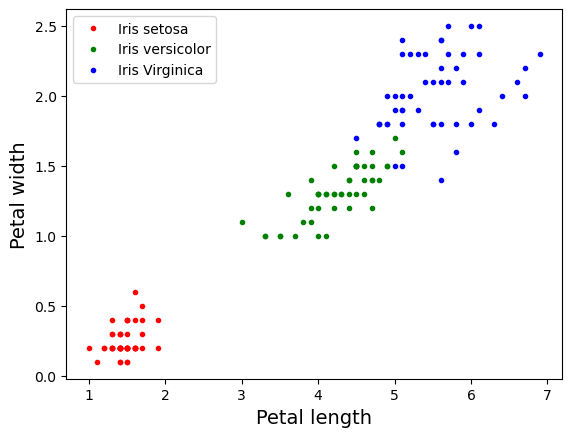

In [42]:
iris = sklearn.datasets.load_iris()

x = iris.data[:, (2 , 3)] #here we just consider two feature petal length and petal width
y = iris.target

plt.plot(x[:,0][y==0], x[:,1][y==0], 'r.', label="Iris setosa")
plt.plot(x[:,0][y==1], x[:,1][y==1], 'g.', label="Iris versicolor")
plt.plot(x[:,0][y==2], x[:,1][y==2], 'b.', label="Iris Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()
plt.show()

In [11]:
# SVM Classifier model
svm_clf = SVC(kernel="linear",C=100)
svm_clf.fit(X, y)

SVC(C=100, kernel='linear')

In [12]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

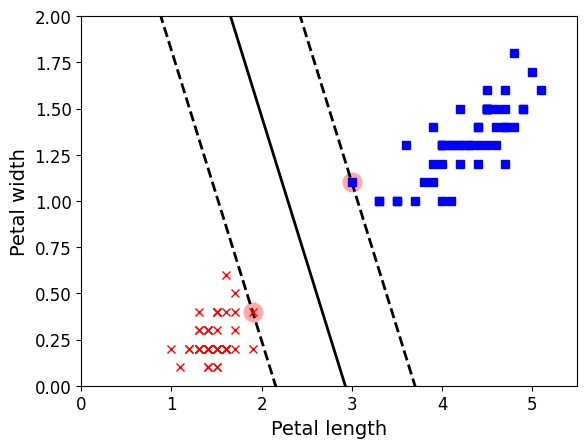

In [13]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rx")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()


2nd example: in this example we have a set of data between 0 and 1 with label -1 and 1

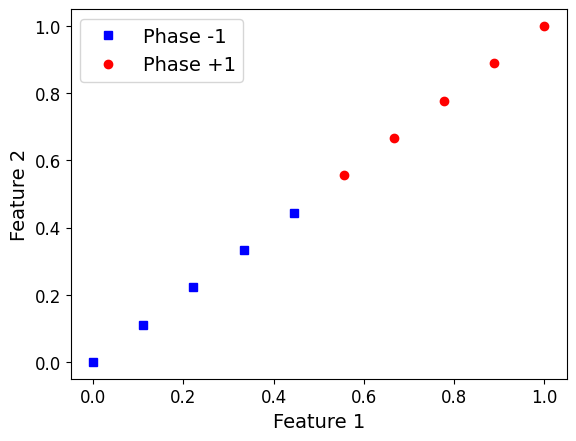

In [14]:
import quimb as qu
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 1, 10)
ket = qu.qu(X, qtype='ket')
comb_feat = np.hstack((ket, ket)) # the important point is here that we have to combine the features
Y = np.sign(X - 0.5)

plt.plot(X[Y == -1], X[Y == -1], "bs", label="Phase -1")
plt.plot(X[Y == 1], X[Y == 1], "ro", label="Phase +1")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.show()



In [15]:
clf_sign = SVC(kernel="linear",C=100) # by tune the value of the C, which control the regularization strenght we can tune margin
clf_sign.fit(comb_feat.real,Y)

SVC(C=100, kernel='linear')

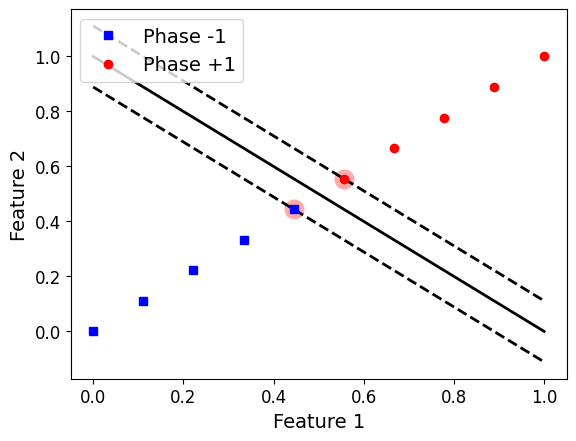

In [16]:
plot_svc_decision_boundary(clf_sign, 0, 1)
plt.plot(X[Y == -1], X[Y == -1], "bs", label="Phase -1")
plt.plot(X[Y == 1], X[Y == 1], "ro", label="Phase +1")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.show()

 3rd example: In this example we make a precomputed kernel and after that we make a SVC model with that. Following that we try to show the situation of the decision boundry and support vectors.

In [17]:
# Make Kernel
def heis_kernel(h1,h2):

    H1 = qtn.tensor_builder.MPO_ham_heis(L=10, j=(1.0,0.0,0.0),bz=h1,S=1/2)# for make the MPO in tensor network form we use this formation in quimb
    DMRG_1 = qtn.tensor_dmrg.DMRG(H1,20) # make DMRG
    DMRG_1.solve(tol=1e-6,verbosity=1)
    gs1 = DMRG_1.state # DMRG state
    H2 = qtn.tensor_builder.MPO_ham_heis(L=10, j=(1.0,0.0,0.0),bz=h2,S=1/2)
    DMRG_2 = qtn.tensor_dmrg.DMRG(H2,20) # make DMRG
    DMRG_2.solve(tol=1e-6, verbosity=1)
    gs2 = DMRG_2.state #DMRG state
    return np.abs(gs1.H @ gs2)**2

def heis_kernel_matrix(X1,X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            print(x1[0],x2[0])
            gram_matrix[i, j] = heis_kernel(x1[0], x2[0])
    return gram_matrix



In [18]:
# dataset
X = np.linspace(0, 1, 10)
ket = qu.qu(X, qtype='ket')
comb_feat = np.hstack((ket, ket)) # the important point is here that we have to combine the features
Y = np.sign(X - 0.5)

In [19]:
# Create an SVC classifier with the custom kernel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(kernel=heis_kernel_matrix))
clf_DMRG = clf.fit(comb_feat.real, Y)

-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


/usr/local/lib/python3.10/dist-packages/quimb/utils.py:167: Warning: The tensor_core.get_symbol function is deprecated in favor of contraction.get_symbol
  warnings.warn(f"The {old_name} function is deprecated in favor "
100%|#############################################| 9/9 [00:00<00:00, 29.69it/s]

Energy: -8.01391741408038 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.39it/s]

Energy: -8.013917473222504 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.30it/s]

Energy: -8.013917449986193 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.04it/s]

Energy: -8.01391747322252 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.94it/s]

Energy: -8.013917441126106 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 181.97it/s]

Energy: -8.013917473222579 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.35it/s]

Energy: -6.325474417086967 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.84it/s]

Energy: -6.325474423950055 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.89it/s]

Energy: -8.013917373169066 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.36it/s]

Energy: -8.013917473222254 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.56it/s]

Energy: -4.68058629662685 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.35it/s]

Energy: -4.680586521982216 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.76it/s]

Energy: -8.013917462531536 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 185.75it/s]

Energy: -8.013917473222323 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.75it/s]

Energy: -3.178234346102667 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.55it/s]

Energy: -3.1782349586701932 ... converged!
-1.5666989036012808 -0.17407765595569794


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.10it/s]


Energy: -8.013916992110815 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 201.99it/s]

Energy: -8.01391747322266 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.44it/s]

Energy: -2.341742086218618 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.28it/s]

Energy: -2.341747669142154 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.33it/s]

Energy: -2.3417477418691632 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.21it/s]

Energy: -8.01391733417981 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 221.22it/s]

Energy: -8.013917473222383 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 117.84it/s]

Energy: -2.3417417430543206 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 171.80it/s]

Energy: -2.341742012659896 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 174.99it/s]

Energy: -8.013917404492743 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.58it/s]

Energy: -8.01391747322244 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.87it/s]

Energy: -3.178234556387581 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.25it/s]

Energy: -3.17823495867107 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 147.82it/s]

Energy: -8.01391742299907 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 193.04it/s]


Energy: -8.013917473222435 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.18it/s]

Energy: -4.680586411952977 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.53it/s]

Energy: -4.680586521981932 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.90it/s]

Energy: -8.013917390836207 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 200.27it/s]

Energy: -8.013917473222449 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.90it/s]

Energy: -6.32547439952081 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.26it/s]

Energy: -6.325474423951402 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.20it/s]

Energy: -8.013917271613488 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.92it/s]

Energy: -8.013917473222488 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.33it/s]

Energy: -8.013917078399686 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.49it/s]

Energy: -8.013917473222255 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 156.44it/s]

Energy: -6.325474345869789 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 190.64it/s]

Energy: -6.325474423951566 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.11it/s]

Energy: -8.013917277288229 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.50it/s]

Energy: -8.013917473222511 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.44it/s]

Energy: -6.325474296100481 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.47it/s]

Energy: -6.325474423949871 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 150.81it/s]

Energy: -6.325474410702589 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.77it/s]

Energy: -6.325474423949197 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.69it/s]

Energy: -6.325474401945834 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 193.15it/s]

Energy: -6.325474423949905 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -4.680586395154352 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.66it/s]

Energy: -4.680586521981231 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.47it/s]

Energy: -6.325474283610488 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 204.62it/s]

Energy: -6.325474423949969 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.72it/s]

Energy: -3.178233938310758 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.26it/s]

Energy: -3.1782349586714562 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 211.03it/s]

Energy: -3.1782349586746768 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.31it/s]

Energy: -6.325474395790433 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 223.74it/s]

Energy: -6.325474423950637 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.80it/s]

Energy: -2.3417419890619087 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.80it/s]

Energy: -2.341741994840235 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.63it/s]

Energy: -6.325474099874308 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 135.87it/s]

Energy: -6.325474423949804 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.83it/s]


Energy: -2.3417423550628675 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 172.24it/s]

Energy: -2.3417476425193584 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.43it/s]

Energy: -2.3417477417982138 ... converged!


-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.28it/s]

Energy: -6.3254743814635095 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.04it/s]

Energy: -6.32547442394922 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.87it/s]

Energy: -3.1782327678269646 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.94it/s]

Energy: -3.178234958659596 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.26it/s]

Energy: -3.178234958674566 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.16it/s]

Energy: -6.325474251548954 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.47it/s]

Energy: -6.325474423950105 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.46it/s]

Energy: -4.680586338067133 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.59it/s]

Energy: -4.680586521980896 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.95it/s]

Energy: -6.325474376367003 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.95it/s]

Energy: -6.325474423950542 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.78it/s]

Energy: -6.325474177713479 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.82it/s]

Energy: -6.325474423949348 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.90it/s]

Energy: -6.325474242195504 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.78it/s]

Energy: -6.325474423950092 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.85it/s]

Energy: -8.013917113157627 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.70it/s]

Energy: -8.013917473222355 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.93it/s]

Energy: -4.6805864589284365 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.66it/s]

Energy: -4.680586521982163 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.23it/s]

Energy: -8.013917400037025 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.73it/s]

Energy: -8.013917473222413 ... converged!


-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.38it/s]

Energy: -4.680586167469258 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.98it/s]

Energy: -4.680586521981786 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.71it/s]

Energy: -6.325474117384867 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.49it/s]

Energy: -6.325474423949758 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.39it/s]

Energy: -4.680586516338554 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 148.90it/s]

Energy: -4.6805865219822405 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.38it/s]

Energy: -4.680586500404695 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.53it/s]

Energy: -4.680586521982045 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.24it/s]

Energy: -4.680586471838057 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 171.69it/s]


Energy: -4.6805865219822085 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.78it/s]

Energy: -3.178234936417432 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.58it/s]

Energy: -3.178234958664338 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.98it/s]


Energy: -4.680586214089895 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 188.23it/s]

Energy: -4.680586521980668 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 148.25it/s]

Energy: -2.3417419884922754 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 210.10it/s]

Energy: -2.341742000215842 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 136.77it/s]


Energy: -4.680586484286372 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 153.08it/s]

Energy: -4.680586521981733 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.96it/s]

Energy: -2.3417420762606334 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 194.94it/s]

Energy: -2.341746146079957 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.80it/s]

Energy: -2.3417477403747116 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.81it/s]

Energy: -2.3417477430111715 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 139.71it/s]

Energy: -4.6805863977281374 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.44it/s]

Energy: -4.680586521982003 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.50it/s]

Energy: -3.1782346454739154 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.17it/s]

Energy: -3.1782349586690275 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 121.95it/s]

Energy: -4.680586438997159 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 138.97it/s]

Energy: -4.680586521982362 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.31it/s]

Energy: -4.680586395967197 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.35it/s]

Energy: -4.680586521982412 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.14it/s]

Energy: -4.680586005337644 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 201.27it/s]

Energy: -4.68058652198251 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 151.17it/s]

Energy: -6.3254743741296595 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 201.61it/s]

Energy: -6.325474423950142 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.53it/s]

Energy: -4.680585822797888 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 188.52it/s]

Energy: -4.680586521982452 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.60it/s]

Energy: -8.013917278385136 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 187.25it/s]

Energy: -8.013917473222305 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.38it/s]

Energy: -3.1782345377214702 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.11it/s]

Energy: -3.1782349586734076 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 112.45it/s]

Energy: -8.013917445320176 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.57it/s]

Energy: -8.013917473222309 ... converged!


-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.74it/s]

Energy: -3.178231702185653 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.83it/s]

Energy: -3.1782349586630034 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 185.39it/s]

Energy: -3.1782349586745315 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.49it/s]

Energy: -6.325474375593946 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.56it/s]

Energy: -6.325474423949763 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.58it/s]


Energy: -3.178233866468655 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 139.82it/s]

Energy: -3.178234958672111 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.88it/s]

Energy: -3.178234958674684 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.06it/s]

Energy: -4.680585995819543 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.33it/s]

Energy: -4.680586521981856 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.52it/s]

Energy: -3.1782342438091082 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.53it/s]

Energy: -3.178234958673371 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.93it/s]

Energy: -3.1782344605416113 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 180.28it/s]

Energy: -3.1782349586721015 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.09it/s]

Energy: -3.1782348568441456 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 187.99it/s]

Energy: -3.1782349586704273 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.78it/s]

Energy: -2.3417419707180067 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.14it/s]

Energy: -2.341741994876789 ... converged!


-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.52it/s]

Energy: -3.1782347308630894 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.80it/s]

Energy: -3.178234958670915 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 138.63it/s]

Energy: -2.341741990490561 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 216.74it/s]

Energy: -2.341742000015366 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.78it/s]

Energy: -3.1782344153773665 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.83it/s]

Energy: -3.1782349586726553 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.34it/s]

Energy: -3.178234907220919 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.84it/s]

Energy: -3.1782349586728365 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.22it/s]

Energy: -3.1782322864865584 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.35it/s]

Energy: -3.1782349586704512 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 143.61it/s]


Energy: -3.178234958674687 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 127.99it/s]

Energy: -4.680586461844782 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.64it/s]

Energy: -4.680586521981984 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.61it/s]

Energy: -3.178233967987042 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.91it/s]

Energy: -3.1782349586705223 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 137.47it/s]


Energy: -6.32547437084644 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 198.59it/s]

Energy: -6.325474423949843 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.07it/s]

Energy: -3.1782348877709223 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.46it/s]

Energy: -3.178234958672673 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.33it/s]

Energy: -8.013917448449082 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 189.50it/s]

Energy: -8.013917473222364 ... converged!


-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.43it/s]

Energy: -2.3417404023436603 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.99it/s]

Energy: -2.3417420846197676 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 186.78it/s]

Energy: -2.3417466505791293 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.40it/s]

Energy: -2.3417477403543567 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.88it/s]

Energy: -2.3417477430101417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.43it/s]

Energy: -8.013917189569888 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 192.56it/s]


Energy: -8.013917473222433 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.57it/s]

Energy: -2.341741894216822 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 117.52it/s]

Energy: -2.3417427430174653 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.31it/s]

Energy: -6.325474411417095 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.44it/s]

Energy: -6.325474423950886 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.58it/s]

Energy: -2.3416728232853115 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.50it/s]

Energy: -2.3417473878940984 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 201.29it/s]

Energy: -2.3417477418263766 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.99it/s]

Energy: -4.680586112646737 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.35it/s]

Energy: -4.680586521982219 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.44it/s]

Energy: -2.341741996709659 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 211.00it/s]


Energy: -2.341742035525783 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.24it/s]

Energy: -3.1782346778877417 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.59it/s]

Energy: -3.1782349586721876 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.71it/s]

Energy: -2.3417419719392725 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.36it/s]

Energy: -2.3417419949249973 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.38it/s]

Energy: -2.3417418599728173 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.13it/s]

Energy: -2.3417419948757794 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.24it/s]

Energy: -2.3417419801158053 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 121.41it/s]

Energy: -2.3417420373599502 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.98it/s]

Energy: -2.3417421722813008 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.41it/s]

Energy: -2.3417476589276363 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.04it/s]

Energy: -2.3417477417639083 ... converged!


-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -2.3417420028018343 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.27it/s]

Energy: -2.341746741650567 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.95it/s]

Energy: -2.341747741526929 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.43it/s]

Energy: -3.1782347936664594 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -3.1782349586567897 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.20it/s]

Energy: -2.341741978164504 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.09it/s]


Energy: -2.341742049179212 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.29it/s]

Energy: -4.680586426573551 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.58it/s]

Energy: -4.680586521981629 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.87it/s]

Energy: -2.3417419960567236 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]

Energy: -2.341742067623301 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.01it/s]

Energy: -6.325474401485333 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.63it/s]

Energy: -6.325474423949948 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.90it/s]

Energy: -2.34174200548519 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.99it/s]

Energy: -2.341742047620482 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.27it/s]

Energy: -8.013917369751953 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.46it/s]

Energy: -8.013917473222484 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.73it/s]

Energy: -2.3417429776149996 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.55it/s]

Energy: -2.341747720469335 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.55it/s]

Energy: -2.3417477417969317 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.07it/s]

Energy: -8.013917395670267 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.15it/s]

Energy: -8.013917473222342 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.96it/s]

Energy: -2.3417419918463143 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.67it/s]

Energy: -2.341742068606986 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.15it/s]

Energy: -6.325474335820427 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.11it/s]

Energy: -6.325474423951115 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.51it/s]

Energy: -2.3417419925408844 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.23it/s]

Energy: -2.3417420470517247 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.52it/s]

Energy: -4.6805865075990205 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.29it/s]

Energy: -4.680586521981613 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.78it/s]


Energy: -2.341742251618933 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 141.50it/s]

Energy: -2.3417474243618375 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.86it/s]

Energy: -2.341747741753022 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.66it/s]

Energy: -3.1782338865704816 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.18it/s]

Energy: -3.17823495867111 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.88it/s]

Energy: -3.1782349586746648 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.51it/s]

Energy: -2.341674037998759 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 143.99it/s]

Energy: -2.341744478929729 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 159.02it/s]

Energy: -2.3417477414759853 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.73it/s]

Energy: -2.341747743011127 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.36it/s]

Energy: -2.3417419943651874 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.54it/s]

Energy: -2.3417420133735676 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 36.43it/s]

Energy: -2.341742586409159 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.99it/s]

Energy: -2.341747714260445 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.14it/s]

Energy: -2.341747741849195 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.17it/s]

Energy: -2.341742074919547 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 180.15it/s]

Energy: -2.3417462168856846 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.25it/s]

Energy: -2.341747740199854 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.27it/s]

Energy: -2.341747743009913 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.75it/s]

Energy: -2.341679155238029 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.13it/s]

Energy: -2.3417476901684564 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.45it/s]

Energy: -2.341747743009429 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.76it/s]

Energy: -3.1782328845561256 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.30it/s]

Energy: -3.178234958667176 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.54it/s]

Energy: -3.178234958674646 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.10it/s]

Energy: -2.341742000955935 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 156.34it/s]

Energy: -2.3417422691258527 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.11it/s]

Energy: -4.680586242814709 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.28it/s]

Energy: -4.680586521982126 ... converged!
0.17407765595569794 1.218543591689885


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 125.73it/s]

Energy: -2.3417419900562093 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.09it/s]

Energy: -2.3417419996481956 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 121.85it/s]

Energy: -6.325474140742503 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 142.26it/s]

Energy: -6.3254744239506255 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.26it/s]

Energy: -2.341742119618099 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 193.26it/s]

Energy: -2.341746634026335 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.24it/s]

Energy: -2.3417477404574187 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.75it/s]

Energy: -2.341747743011122 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.75it/s]

Energy: -8.0139174398234 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.70it/s]

Energy: -8.013917473222483 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.62it/s]

Energy: -3.1782348227713424 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.21it/s]

Energy: -3.1782349586736016 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.07it/s]


Energy: -8.013917396650955 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 163.02it/s]

Energy: -8.013917473222437 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.10it/s]

Energy: -3.178234765698277 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.54it/s]

Energy: -3.178234958651941 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.60it/s]

Energy: -6.325474393998845 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.90it/s]

Energy: -6.325474423950775 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.36it/s]

Energy: -3.178234929929461 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.88it/s]

Energy: -3.1782349586726832 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 126.46it/s]

Energy: -4.680586218802281 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.22it/s]

Energy: -4.680586521982479 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.87it/s]

Energy: -3.178234930321538 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.62it/s]

Energy: -3.1782349586730576 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.11it/s]

Energy: -3.1782343389798227 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.93it/s]

Energy: -3.1782349586727077 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.27it/s]

Energy: -3.178229011683262 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.24it/s]

Energy: -3.1782349586629417 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.50it/s]

Energy: -3.1782349586746603 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.91it/s]

Energy: -2.34174199330314 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.95it/s]

Energy: -2.34174201791171 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.06it/s]

Energy: -3.1782348664611426 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.37it/s]

Energy: -3.17823495866544 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.47it/s]

Energy: -2.3417420712111023 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.38it/s]

Energy: -2.3417434633108667 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.69it/s]

Energy: -2.3417477414297885 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.97it/s]

Energy: -2.3417477430111386 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.99it/s]


Energy: -3.1782341186832785 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 167.59it/s]

Energy: -3.178234958672899 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.72it/s]


Energy: -3.178234816642646 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 168.78it/s]

Energy: -3.1782349586670056 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.70it/s]

Energy: -3.1782349028996078 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.96it/s]

Energy: -3.1782349586699907 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.11it/s]

Energy: -4.680586387548005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.67it/s]

Energy: -4.680586521981662 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.51it/s]

Energy: -3.1782348646129224 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.74it/s]

Energy: -3.1782349586729293 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.82it/s]

Energy: -6.3254743541925 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 144.38it/s]

Energy: -6.325474423949538 ... converged!


0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.78it/s]

Energy: -3.1782348383591414 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.51it/s]

Energy: -3.178234958670882 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.56it/s]

Energy: -8.01391745004459 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.15it/s]

Energy: -8.013917473222396 ... converged!


0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.22it/s]

Energy: -4.6805863668086785 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.13it/s]

Energy: -4.680586521981969 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.70it/s]

Energy: -8.013917372474154 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.65it/s]

Energy: -8.013917473222435 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.36it/s]

Energy: -4.6805863313661735 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.39it/s]

Energy: -4.680586521982634 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.43it/s]

Energy: -6.325474276275564 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 220.44it/s]


Energy: -6.325474423951723 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 143.06it/s]

Energy: -4.680585763896115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 34.01it/s]

Energy: -4.680586521982598 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 17.26it/s]

Energy: -4.68058622122612 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.51it/s]

Energy: -4.68058652198189 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 31.46it/s]

Energy: -4.680586188186337 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.55it/s]

Energy: -4.680586521982663 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 13.62it/s]

Energy: -3.1782349220451684 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 21.33it/s]

Energy: -3.1782349586715313 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.18it/s]

Energy: -4.680586494922597 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.65it/s]

Energy: -4.680586521982419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.28it/s]

Energy: -2.3417419891294444 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 26.10it/s]

Energy: -2.341741996539787 ... converged!


0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.03it/s]

Energy: -4.680586476291514 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.59it/s]

Energy: -4.680586521981895 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.70it/s]

Energy: -2.3417419857445227 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.85it/s]

Energy: -2.341742005680183 ... converged!
0.8703882797784891 0.5222329678670935


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.40it/s]

Energy: -4.680586388856538 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.02it/s]

Energy: -4.680586521979907 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.51it/s]

Energy: -3.1782348883150857 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.28it/s]

Energy: -3.1782349586658474 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.41it/s]

Energy: -4.680585968743027 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.79it/s]


Energy: -4.680586521982482 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.07it/s]

Energy: -4.680586413782233 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.60it/s]

Energy: -4.680586521981959 ... converged!
0.8703882797784891 1.218543591689885


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.94it/s]

Energy: -4.680586215118436 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 182.79it/s]

Energy: -4.680586521982621 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.28it/s]

Energy: -6.325474195196974 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.17it/s]

Energy: -6.32547442395149 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.48it/s]

Energy: -4.680586455727596 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.13it/s]

Energy: -4.680586521982181 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.54it/s]

Energy: -8.01391737923629 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.69it/s]

Energy: -8.01391747322246 ... converged!


1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.69it/s]


Energy: -6.325474240538603 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 117.95it/s]

Energy: -6.325474423949983 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.42it/s]

Energy: -8.013917372683183 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.78it/s]


Energy: -8.013917473222483 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.38it/s]

Energy: -6.325474391164053 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.92it/s]

Energy: -6.325474423949475 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.63it/s]


Energy: -6.325474406356375 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 157.23it/s]

Energy: -6.3254744239496885 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.68it/s]

Energy: -6.325474289646269 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.16it/s]

Energy: -6.3254744239492755 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.43it/s]

Energy: -4.680586467880069 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.96it/s]

Energy: -4.680586521981951 ... converged!
1.218543591689885 -0.5222329678670937


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.31it/s]

Energy: -6.3254743549072945 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.75it/s]

Energy: -6.325474423950778 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.89it/s]

Energy: -3.17823482925935 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.93it/s]

Energy: -3.178234958661086 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.68it/s]

Energy: -6.32547441075669 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.82it/s]

Energy: -6.325474423949703 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 127.44it/s]

Energy: -2.34174198992689 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.87it/s]

Energy: -2.3417419970548083 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.28it/s]

Energy: -6.325474326954293 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.23it/s]

Energy: -6.325474423949312 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 125.54it/s]

Energy: -2.341741993785135 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.93it/s]


Energy: -2.341744023138723 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 172.71it/s]

Energy: -2.341747741692103 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.62it/s]

Energy: -2.341747743011103 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.56it/s]

Energy: -6.32547428753217 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 148.24it/s]

Energy: -6.325474423950537 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.31it/s]

Energy: -3.1782348360889228 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 130.19it/s]

Energy: -3.1782349586708047 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 113.01it/s]

Energy: -6.325474228046944 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.49it/s]

Energy: -6.325474423950772 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.02it/s]

Energy: -4.680586464239004 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.79it/s]

Energy: -4.680586521982403 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.72it/s]


Energy: -6.32547421982741 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 126.75it/s]

Energy: -6.325474423950922 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.59it/s]

Energy: -6.325474332142627 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.35it/s]

Energy: -6.325474423950656 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.61it/s]

Energy: -6.325474396889062 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.79it/s]

Energy: -6.325474423951078 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -8.013917369281257 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.27it/s]

Energy: -8.01391747322247 ... converged!


1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 135.04it/s]

Energy: -8.013917339391353 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.33it/s]


Energy: -8.013917473222596 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.24it/s]

Energy: -8.013917409717783 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 179.92it/s]

Energy: -8.013917473222655 ... converged!


1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.02it/s]


Energy: -8.013917340737073 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.03it/s]

Energy: -8.01391747322252 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.25it/s]

Energy: -6.325474380935325 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.73it/s]

Energy: -6.325474423950731 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.31it/s]

Energy: -8.013917454645744 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.23it/s]

Energy: -8.013917473222296 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.24it/s]

Energy: -4.680586490854655 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.41it/s]

Energy: -4.680586521982107 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 123.35it/s]

Energy: -8.013916992767397 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.82it/s]

Energy: -8.013917473222598 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.67it/s]

Energy: -3.1782349088076507 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.88it/s]

Energy: -3.1782349586720002 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.90it/s]

Energy: -8.013917465485115 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.06it/s]

Energy: -8.013917473222506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.14it/s]

Energy: -2.341741981195068 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.08it/s]

Energy: -2.341744563671876 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.59it/s]

Energy: -2.341747740267142 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.09it/s]

Energy: -2.3417477430111604 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.81it/s]

Energy: -8.013917439486905 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.62it/s]

Energy: -8.01391747322232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.89it/s]

Energy: -2.3417419943380113 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.63it/s]

Energy: -2.3417419974154394 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.82it/s]

Energy: -8.01391742123891 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.46it/s]

Energy: -8.013917473222355 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.87it/s]

Energy: -3.178227375510931 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.03it/s]

Energy: -3.1782349586624967 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.53it/s]

Energy: -3.1782349586745955 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.24it/s]

Energy: -8.01391745413295 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.68it/s]

Energy: -8.013917473222493 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.28it/s]

Energy: -4.680586475644891 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.60it/s]

Energy: -4.680586521980765 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.31it/s]

Energy: -8.013917398536721 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.46it/s]

Energy: -8.013917473222444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.24it/s]

Energy: -6.32547419243621 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.12it/s]

Energy: -6.325474423953917 ... converged!


1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.44it/s]

Energy: -8.013917437376035 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.72it/s]

Energy: -8.013917473222325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.59it/s]

Energy: -8.013917372825265 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.88it/s]

Energy: -8.013917473222506 ... converged!


In [20]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 10)
    x1s = np.linspace(axes[2], axes[3], 10)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


/usr/local/lib/python3.10/dist-packages/quimb/utils.py:167: Warning: The tensor_core.get_symbol function is deprecated in favor of contraction.get_symbol
  warnings.warn(f"The {old_name} function is deprecated in favor "
100%|#############################################| 9/9 [00:00<00:00, 73.56it/s]

Energy: -8.013917324561643 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.18it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.82it/s]

Energy: -8.013917422090557 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.72it/s]

Energy: -8.013917473222143 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.50it/s]

Energy: -8.013917396777819 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.73it/s]

Energy: -8.013917473222437 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.12it/s]

Energy: -6.325474413172871 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.14it/s]

Energy: -6.3254744239496405 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.23it/s]

Energy: -8.013917344011519 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.49it/s]

Energy: -8.013917473222492 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.24it/s]

Energy: -4.68058634469684 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.63it/s]

Energy: -4.680586521981733 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.30it/s]

Energy: -8.013917463420269 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.81it/s]

Energy: -8.013917473222516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.84it/s]

Energy: -3.178234928479686 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.46it/s]

Energy: -3.1782349586727143 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.93it/s]

Energy: -8.013917393124663 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.52it/s]

Energy: -8.013917473222286 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.95it/s]

Energy: -2.341741091878961 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.84it/s]

Energy: -2.341742056790841 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.28it/s]

Energy: -8.01391735995922 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.08it/s]

Energy: -8.013917473222332 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.04it/s]

Energy: -2.3417419948960996 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.87it/s]

Energy: -2.3417419971645574 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 171.29it/s]

Energy: -8.013917412347524 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 217.26it/s]

Energy: -8.013917473221921 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 123.05it/s]

Energy: -3.178234341597823 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 214.66it/s]


Energy: -3.1782349586728045 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 156.82it/s]

Energy: -8.013917359768572 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 183.11it/s]

Energy: -8.013917473222282 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 133.98it/s]

Energy: -4.680586438209094 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.87it/s]


Energy: -4.680586521981968 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 165.40it/s]

Energy: -8.013917452728638 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.66it/s]

Energy: -8.013917473222449 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.63it/s]

Energy: -6.325474419164499 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 192.09it/s]

Energy: -6.32547442394908 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 161.11it/s]

Energy: -8.01391745209409 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.22it/s]

Energy: -8.013917473222582 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 140.23it/s]

Energy: -8.013917372078366 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.41it/s]

Energy: -8.013917473222321 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.16it/s]

Energy: -6.325474271588343 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.30it/s]

Energy: -6.325474423949554 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.80it/s]

Energy: -8.013917443395968 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.26it/s]

Energy: -8.013917473222431 ... converged!


-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 157.27it/s]

Energy: -6.32547430062552 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 209.71it/s]

Energy: -6.325474423949706 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.23it/s]

Energy: -6.325474310655035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 211.42it/s]

Energy: -6.32547442395163 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.78it/s]

Energy: -6.325474393413534 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.23it/s]

Energy: -6.325474423950566 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.27it/s]

Energy: -4.680586285000125 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 183.31it/s]

Energy: -4.680586521982182 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 133.76it/s]

Energy: -6.3254742951828575 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.99it/s]


Energy: -6.325474423949954 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 130.37it/s]

Energy: -3.1782346387875933 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 200.36it/s]

Energy: -3.1782349586708527 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.43it/s]

Energy: -6.325474290673444 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.78it/s]

Energy: -6.32547442395153 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 145.54it/s]

Energy: -2.3417419865969724 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 226.03it/s]

Energy: -2.341741996663661 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.03it/s]

Energy: -6.325474197766455 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 224.15it/s]

Energy: -6.325474423951691 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.31it/s]

Energy: -2.341742506607841 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 187.62it/s]

Energy: -2.3417477018301507 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 211.26it/s]

Energy: -2.3417477418721018 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.79it/s]

Energy: -6.325474241443532 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.93it/s]

Energy: -6.325474423950437 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.27it/s]

Energy: -3.178232959343681 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 172.63it/s]

Energy: -3.178234958666221 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 188.88it/s]

Energy: -3.1782349586746546 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.40it/s]

Energy: -6.325473785066442 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.07it/s]

Energy: -6.325474423949754 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.79it/s]

Energy: -4.680586518955944 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.67it/s]

Energy: -4.680586521982008 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 158.72it/s]

Energy: -6.32547439636339 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.28it/s]

Energy: -6.325474423949285 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.96it/s]

Energy: -6.325474103361448 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.51it/s]

Energy: -6.325474423951405 ... converged!


-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 151.90it/s]

Energy: -6.32547432971783 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 215.92it/s]

Energy: -6.325474423951764 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.77it/s]

Energy: -8.013917171048826 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 203.08it/s]

Energy: -8.013917473222524 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 149.39it/s]


Energy: -4.680586240491955 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 180.96it/s]

Energy: -4.68058652198215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.43it/s]

Energy: -8.013917450869876 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 189.51it/s]

Energy: -8.013917473222469 ... converged!


-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.55it/s]


Energy: -4.680586305335252 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 191.66it/s]

Energy: -4.680586521982014 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 140.55it/s]

Energy: -6.325474326594845 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 184.49it/s]

Energy: -6.325474423950493 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.38it/s]

Energy: -4.680586494228558 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 184.32it/s]

Energy: -4.680586521982389 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.81it/s]

Energy: -4.680586440805245 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 180.09it/s]

Energy: -4.680586521982009 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 159.59it/s]

Energy: -4.680586428300998 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 196.46it/s]

Energy: -4.680586521981577 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.73it/s]

Energy: -3.1782347967524816 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 170.17it/s]

Energy: -3.1782349586739684 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 141.88it/s]

Energy: -4.680586499678061 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.26it/s]

Energy: -4.680586521982002 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.98it/s]

Energy: -2.341742041284438 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 221.83it/s]

Energy: -2.3417438438765417 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.19it/s]

Energy: -2.3417477247733647 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.11it/s]

Energy: -2.341747741786823 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.48it/s]

Energy: -4.680586336278893 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.36it/s]

Energy: -4.68058652198234 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.95it/s]

Energy: -2.3417429446773084 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.68it/s]

Energy: -2.341747715366752 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.37it/s]

Energy: -2.3417477418686334 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.51it/s]

Energy: -4.680586472010924 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.42it/s]

Energy: -4.680586521982264 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.77it/s]

Energy: -3.1782343740692323 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 135.04it/s]

Energy: -3.178234958670042 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.91it/s]

Energy: -4.68058632580265 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.08it/s]

Energy: -4.680586521982181 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 140.92it/s]

Energy: -4.6805864018913 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.07it/s]

Energy: -4.680586521981216 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.92it/s]

Energy: -4.68058637830738 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 181.97it/s]

Energy: -4.680586521982381 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 138.77it/s]

Energy: -6.3254743514660206 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.62it/s]

Energy: -6.325474423950246 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.18it/s]

Energy: -4.6805862503790605 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.58it/s]

Energy: -4.680586521976147 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 145.50it/s]

Energy: -8.013917434868537 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.38it/s]

Energy: -8.013917473222373 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 127.45it/s]

Energy: -3.178234799105226 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.29it/s]

Energy: -3.1782349586709473 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.45it/s]

Energy: -8.013917445582193 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 173.54it/s]

Energy: -8.013917473222437 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.59it/s]

Energy: -3.1782349234513716 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.64it/s]

Energy: -3.1782349586705068 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.47it/s]

Energy: -6.325474356087905 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.86it/s]

Energy: -6.325474423951613 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.99it/s]

Energy: -3.1782348747506735 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.31it/s]

Energy: -3.178234958671917 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.66it/s]

Energy: -4.680586485731656 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.90it/s]

Energy: -4.6805865219823195 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.73it/s]

Energy: -3.1782345058762926 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.88it/s]

Energy: -3.1782349586731593 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.10it/s]

Energy: -3.178234273299729 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.72it/s]

Energy: -3.1782349586701066 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.16it/s]

Energy: -3.1782342726854824 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.53it/s]

Energy: -3.1782349586712817 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.88it/s]

Energy: -2.341741822212329 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.79it/s]

Energy: -2.341742012803072 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.04it/s]

Energy: -3.1782349460464463 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.17it/s]

Energy: -3.1782349586737593 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.12it/s]

Energy: -2.341742013659534 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.43it/s]

Energy: -2.34174234411174 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.40it/s]

Energy: -3.1782317106345337 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.78it/s]

Energy: -3.17823495867171 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.88it/s]

Energy: -3.178234958674702 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.62it/s]

Energy: -3.1782345514514976 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.86it/s]

Energy: -3.178234958673477 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.39it/s]

Energy: -3.178234690240237 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.67it/s]

Energy: -3.17823495867157 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.37it/s]

Energy: -4.680586356542338 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.66it/s]

Energy: -4.680586521982011 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.71it/s]

Energy: -3.1782349300511017 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.53it/s]

Energy: -3.1782349586715477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -6.325474385836462 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.54it/s]

Energy: -6.325474423949582 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.63it/s]

Energy: -3.178234850796485 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.13it/s]

Energy: -3.178234958670791 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 118.35it/s]

Energy: -8.013917448773553 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.33it/s]

Energy: -8.013917473222513 ... converged!


-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.38it/s]

Energy: -2.3416786641783887 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.41it/s]

Energy: -2.341741994907611 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.66it/s]

Energy: -2.3417419949152602 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.98it/s]

Energy: -8.013917372699824 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.48it/s]

Energy: -8.013917473222325 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 118.65it/s]


Energy: -2.341742180891368 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 203.59it/s]

Energy: -2.341747470840751 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.60it/s]

Energy: -2.3417477416761647 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.55it/s]

Energy: -6.325474144375069 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.67it/s]

Energy: -6.32547442394975 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.79it/s]

Energy: -2.341741997418464 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 148.48it/s]

Energy: -2.3417420355174867 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.88it/s]

Energy: -4.680586135022406 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 190.00it/s]

Energy: -4.680586521981689 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.37it/s]

Energy: -2.341742036431237 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.05it/s]

Energy: -2.3417437158852334 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.89it/s]

Energy: -2.341747741347888 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.30it/s]

Energy: -2.341747743010871 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 129.20it/s]

Energy: -3.1782344300914622 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.34it/s]

Energy: -3.1782349586584946 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.93it/s]

Energy: -2.3417421133927525 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.27it/s]

Energy: -2.3417465657492365 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.48it/s]

Energy: -2.3417477404400646 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 138.07it/s]

Energy: -2.341747743011129 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.20it/s]

Energy: -2.341741995069172 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 153.25it/s]

Energy: -2.341742001083979 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.00it/s]

Energy: -2.3417420131817286 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.73it/s]

Energy: -2.341742072678771 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 34.01it/s]

Energy: -2.341742086972452 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.02it/s]

Energy: -2.341746941222581 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.29it/s]

Energy: -2.341747741803114 ... converged!


-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.58it/s]

Energy: -2.3416766537903535 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.16it/s]

Energy: -2.341742047585245 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 184.47it/s]

Energy: -2.3417463013594078 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.43it/s]

Energy: -2.3417477405559772 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.13it/s]

Energy: -2.341747743011145 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.26it/s]

Energy: -3.1782349187443972 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.24it/s]

Energy: -3.1782349586710117 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.35it/s]

Energy: -2.3417420417229584 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 159.02it/s]

Energy: -2.3417430871789016 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.91it/s]

Energy: -2.3417477411893066 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.33it/s]

Energy: -2.34174774301074 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.25it/s]

Energy: -4.6805864328413165 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.17it/s]

Energy: -4.680586521981877 ... converged!
-0.17407765595569794 1.218543591689885


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 117.60it/s]

Energy: -2.341741986557154 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.26it/s]

Energy: -2.3417420057478893 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.54it/s]

Energy: -6.32547440264157 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.69it/s]

Energy: -6.3254744239502045 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 123.83it/s]

Energy: -2.341741992448858 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.60it/s]

Energy: -2.3417420068127135 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.77it/s]

Energy: -8.013917358269923 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.38it/s]

Energy: -8.013917473222412 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 150.20it/s]

Energy: -2.3417419959671513 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.68it/s]

Energy: -2.341742005051552 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.84it/s]

Energy: -8.013917455914925 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 143.23it/s]

Energy: -8.013917473222326 ... converged!
0.17407765595569794 -1.218543591689885


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.34it/s]

Energy: -2.341741994456865 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.93it/s]

Energy: -2.341742037489304 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.13it/s]

Energy: -6.325474287431744 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 207.62it/s]

Energy: -6.325474423949578 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.33it/s]

Energy: -2.34174198277522 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.09it/s]

Energy: -2.3417419949586034 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.78it/s]

Energy: -4.680586498863767 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 161.91it/s]

Energy: -4.680586521982241 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 135.73it/s]

Energy: -2.3417419918230302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.74it/s]

Energy: -2.341741999042006 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.64it/s]

Energy: -3.1782348854946023 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.64it/s]

Energy: -3.1782349586690635 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 163.09it/s]


Energy: -2.3415245345405484 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.45it/s]

Energy: -2.3417419964354442 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.95it/s]

Energy: -2.3417420011373262 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.74it/s]

Energy: -2.341741990663961 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 196.90it/s]


Energy: -2.3417420369496766 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 118.87it/s]

Energy: -2.341741971861736 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.73it/s]

Energy: -2.341742013081204 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.67it/s]

Energy: -2.341742043835866 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.58it/s]

Energy: -2.341744004137261 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.06it/s]

Energy: -2.34174774062045 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.26it/s]


Energy: -2.341747743010568 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 149.45it/s]

Energy: -2.3417411460846895 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.49it/s]

Energy: -2.3417420598365464 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.48it/s]

Energy: -3.178234341079641 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.22it/s]

Energy: -3.178234958673344 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.10it/s]

Energy: -2.341694769303294 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.86it/s]

Energy: -2.3417420254218735 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.23it/s]

Energy: -2.3417459508367653 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.47it/s]

Energy: -2.341747741514852 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.79it/s]

Energy: -2.3417477430101115 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.09it/s]

Energy: -4.680586468205161 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.38it/s]

Energy: -4.680586521982371 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.15it/s]

Energy: -2.3417419943996753 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.81it/s]

Energy: -2.341742014786956 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 150.40it/s]

Energy: -6.325474294334124 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.69it/s]

Energy: -6.325474423951936 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.03it/s]

Energy: -2.3416806170393736 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.26it/s]

Energy: -2.341742011789177 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 184.12it/s]

Energy: -2.3417452600562667 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.58it/s]

Energy: -2.3417477404293727 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.28it/s]


Energy: -2.3417477430111484 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.95it/s]

Energy: -8.013917418220586 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.50it/s]

Energy: -8.013917473222442 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.19it/s]

Energy: -3.178233853291903 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.74it/s]

Energy: -3.178234958663206 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.16it/s]

Energy: -3.178234958674479 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.63it/s]

Energy: -8.013917307514893 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.68it/s]

Energy: -8.013917473222351 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.57it/s]

Energy: -3.178234713342109 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.34it/s]

Energy: -3.178234958666016 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.80it/s]

Energy: -6.32547402107662 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.31it/s]

Energy: -6.3254744239506975 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.97it/s]

Energy: -3.178234509306194 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.11it/s]

Energy: -3.1782349586653873 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.86it/s]

Energy: -4.680586259551641 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.68it/s]

Energy: -4.680586521982155 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.48it/s]

Energy: -3.1782349396961496 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.21it/s]

Energy: -3.178234958673235 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.52it/s]

Energy: -3.1782349225947604 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.00it/s]

Energy: -3.178234958667867 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.79it/s]

Energy: -3.1782347396835204 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.90it/s]

Energy: -3.178234958670496 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.66it/s]

Energy: -2.3417419928198657 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.50it/s]

Energy: -2.3417420009765184 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.74it/s]

Energy: -3.1782346135586215 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.29it/s]

Energy: -3.17823495867214 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.30it/s]

Energy: -2.341741992279571 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.56it/s]

Energy: -2.3417419967968476 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.15it/s]

Energy: -3.1782349050332477 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.44it/s]

Energy: -3.1782349586725713 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.12it/s]

Energy: -3.178234600315042 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.94it/s]


Energy: -3.1782349586661316 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.82it/s]

Energy: -3.178234844411876 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.34it/s]

Energy: -3.178234958673813 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.51it/s]

Energy: -4.680585759580823 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.70it/s]

Energy: -4.680586521982479 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.28it/s]

Energy: -3.17823467217226 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.48it/s]

Energy: -3.178234958632972 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.28it/s]

Energy: -6.325474257564539 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.78it/s]

Energy: -6.325474423949739 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.33it/s]

Energy: -3.1782335384705345 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.12it/s]

Energy: -3.1782349586706657 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.55it/s]


Energy: -3.178234958674673 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 142.45it/s]

Energy: -8.013917315437455 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.96it/s]

Energy: -8.013917473222534 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.57it/s]

Energy: -4.680586419701196 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 177.96it/s]

Energy: -4.680586521981589 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.64it/s]

Energy: -8.013917422469477 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.51it/s]

Energy: -8.013917473222314 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.20it/s]

Energy: -4.68058605266968 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.19it/s]

Energy: -4.680586521982266 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.33it/s]

Energy: -6.32547431702187 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.88it/s]

Energy: -6.325474423952237 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.61it/s]

Energy: -4.680586515586866 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 183.67it/s]


Energy: -4.6805865219819704 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.95it/s]

Energy: -4.6805864795378875 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 138.45it/s]

Energy: -4.680586521981643 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.05it/s]

Energy: -4.680586395757775 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.71it/s]

Energy: -4.680586521982215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.94it/s]

Energy: -3.17823486775068 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.54it/s]

Energy: -3.178234958670712 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.68it/s]

Energy: -4.680586335240286 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.08it/s]

Energy: -4.680586521982352 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -2.3417423882487114 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.04it/s]

Energy: -2.341747625557078 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 180.53it/s]

Energy: -2.3417477418143475 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.16it/s]

Energy: -4.680586423448801 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.37it/s]

Energy: -4.68058652198189 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.51it/s]

Energy: -2.3417421034899863 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 194.55it/s]

Energy: -2.341746449538944 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.17it/s]

Energy: -2.3417477403339495 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.54it/s]

Energy: -2.3417477430111857 ... converged!


0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.28it/s]

Energy: -4.680586404464112 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.77it/s]

Energy: -4.680586521982051 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.41it/s]

Energy: -3.1782342814126148 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.84it/s]

Energy: -3.178234958665502 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.56it/s]

Energy: -4.680586313083494 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.63it/s]

Energy: -4.680586521982027 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.79it/s]

Energy: -4.68058643798969 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.98it/s]

Energy: -4.680586521981586 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.65it/s]

Energy: -4.680586479688974 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.52it/s]

Energy: -4.680586521982021 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.84it/s]

Energy: -6.3254740708512855 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.29it/s]

Energy: -6.325474423951509 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.54it/s]

Energy: -4.680586230298065 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 142.37it/s]

Energy: -4.6805865219821134 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 123.99it/s]

Energy: -8.013917463966592 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.85it/s]

Energy: -8.013917473222453 ... converged!


1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.88it/s]

Energy: -6.325474382734028 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.95it/s]

Energy: -6.32547442395339 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 86.88it/s]

Energy: -8.01391737067188 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.48it/s]

Energy: -8.013917473222316 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.64it/s]

Energy: -6.325474286065969 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.15it/s]

Energy: -6.325474423950103 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.46it/s]

Energy: -6.325474212429718 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 150.52it/s]

Energy: -6.325474423951014 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.50it/s]

Energy: -6.325474396039726 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.91it/s]

Energy: -6.325474423950082 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.24it/s]

Energy: -4.680586226800791 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.70it/s]

Energy: -4.680586521981603 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.41it/s]

Energy: -6.325474373279046 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.10it/s]

Energy: -6.325474423950001 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.85it/s]

Energy: -3.1782349319724057 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.96it/s]

Energy: -3.1782349586731367 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.37it/s]

Energy: -6.325474341437845 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.17it/s]

Energy: -6.325474423950826 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.19it/s]

Energy: -2.341741993903813 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.02it/s]

Energy: -2.341742013795683 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.43it/s]

Energy: -6.325474112295079 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.01it/s]

Energy: -6.3254744239495535 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.81it/s]

Energy: -2.3417419954078205 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.25it/s]

Energy: -2.341742000940776 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.52it/s]

Energy: -6.325474246773337 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.95it/s]

Energy: -6.325474423950071 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.47it/s]

Energy: -3.1782321890528187 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 166.62it/s]

Energy: -3.1782349586672014 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.89it/s]

Energy: -3.178234958674664 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 125.99it/s]

Energy: -6.325474371624834 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 135.46it/s]

Energy: -6.325474423951857 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.02it/s]

Energy: -4.680586372179855 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.52it/s]

Energy: -4.6805865219825336 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.29it/s]

Energy: -6.325474327823554 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.50it/s]

Energy: -6.325474423950671 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 15.56it/s]

Energy: -6.3254743955836705 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.96it/s]

Energy: -6.325474423950669 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.74it/s]

Energy: -6.325473940872557 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 31.45it/s]

Energy: -6.32547442395042 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 19.91it/s]

Energy: -8.01391724766086 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 30.86it/s]

Energy: -8.01391747322238 ... converged!


1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.84it/s]

Energy: -8.013917433198358 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.38it/s]

Energy: -8.013917473222595 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.44it/s]

Energy: -8.013917467172355 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.35it/s]

Energy: -8.013917473222289 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.38it/s]


Energy: -8.013917416021059 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.77it/s]

Energy: -8.013917473222367 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.37it/s]

Energy: -6.325474406760585 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.28it/s]

Energy: -6.325474423949351 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.96it/s]

Energy: -8.013917329778424 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.31it/s]

Energy: -8.013917473222403 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.88it/s]

Energy: -4.680586365064608 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.01it/s]

Energy: -4.680586521981913 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.03it/s]

Energy: -8.013917360636363 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.47it/s]


Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.24it/s]

Energy: -3.17823492073262 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.04it/s]

Energy: -3.178234958673945 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.36it/s]

Energy: -8.013917264199224 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.26it/s]

Energy: -8.013917473222415 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.37it/s]

Energy: -2.34174194664728 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 184.91it/s]

Energy: -2.34174336402728 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.96it/s]

Energy: -2.341747741832617 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.14it/s]

Energy: -2.3417477430112097 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.83it/s]

Energy: -8.013917435209459 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.55it/s]

Energy: -8.01391747322225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 33.06it/s]

Energy: -2.341742006156664 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.98it/s]

Energy: -2.34174206280165 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.94it/s]

Energy: -8.013917466953748 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 135.29it/s]

Energy: -8.013917473222465 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.67it/s]

Energy: -3.178234952756205 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 179.27it/s]

Energy: -3.1782349586739818 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.48it/s]

Energy: -8.013917060147536 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.17it/s]

Energy: -8.013917473222483 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.78it/s]

Energy: -4.6805864199550395 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.69it/s]

Energy: -4.6805865219819625 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.34it/s]

Energy: -8.013917429689627 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.77it/s]

Energy: -8.01391747322238 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.81it/s]

Energy: -6.3254743587179805 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 207.63it/s]


Energy: -6.325474423952259 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 112.30it/s]

Energy: -8.013917465075506 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.76it/s]

Energy: -8.01391747322233 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.72it/s]

Energy: -8.013917446569442 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.01it/s]

Energy: -8.013917473222385 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.30it/s]

Energy: -8.013917378682546 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.97it/s]

Energy: -8.013917473222469 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.16it/s]

Energy: -8.013917458317051 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.72it/s]

Energy: -8.013917473222405 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.11it/s]

Energy: -8.013917359970874 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.85it/s]

Energy: -8.013917473222469 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.72it/s]


Energy: -6.325474412722637 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.49it/s]

Energy: -6.325474423949777 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.44it/s]

Energy: -8.013917322127211 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.72it/s]

Energy: -8.01391747322239 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.58it/s]

Energy: -4.6805864149073 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.31it/s]

Energy: -4.6805865219821605 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.37it/s]

Energy: -8.01391737624496 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 197.73it/s]

Energy: -8.013917473222502 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.82it/s]

Energy: -3.1782348364598114 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.37it/s]

Energy: -3.1782349586673813 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.91it/s]

Energy: -8.013917377060286 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.78it/s]

Energy: -8.013917473221747 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.69it/s]

Energy: -2.3417420240716273 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.33it/s]

Energy: -2.3417431423984625 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.77it/s]

Energy: -2.3417477402817846 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 170.88it/s]

Energy: -2.3417477430105853 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.38it/s]

Energy: -8.013917228368724 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.65it/s]

Energy: -8.013917473222435 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.94it/s]

Energy: -2.3417419511483852 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.69it/s]

Energy: -2.3417420122762183 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.96it/s]

Energy: -8.01391738587852 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.13it/s]

Energy: -8.013917473222474 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.55it/s]

Energy: -3.1782259110957134 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.93it/s]

Energy: -3.1782349586341203 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.67it/s]

Energy: -3.178234958674594 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.62it/s]

Energy: -8.013917299346286 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.11it/s]

Energy: -8.013917473222055 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.54it/s]

Energy: -4.680585985373847 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.82it/s]

Energy: -4.680586521980507 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.59it/s]

Energy: -8.013917300650457 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.55it/s]


Energy: -8.013917473222492 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.79it/s]

Energy: -6.325474329520508 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 154.21it/s]

Energy: -6.325474423949565 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.28it/s]

Energy: -8.013917366979472 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.53it/s]

Energy: -8.013917473222204 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.28it/s]

Energy: -8.013917346482364 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.28it/s]

Energy: -8.013917473222257 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.98it/s]

Energy: -6.325474378034103 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.18it/s]

Energy: -6.325474423950909 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.81it/s]

Energy: -8.013917460871285 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.54it/s]

Energy: -8.013917473222438 ... converged!


-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.79it/s]

Energy: -6.3254736976614 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.98it/s]

Energy: -6.325474423951734 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.64it/s]

Energy: -6.3254739281503625 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.60it/s]

Energy: -6.325474423951285 ... converged!


-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.69it/s]

Energy: -6.325474097323102 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.20it/s]

Energy: -6.325474423952565 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.74it/s]

Energy: -4.680585909601752 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.00it/s]

Energy: -4.680586521980764 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.47it/s]

Energy: -6.325473920084897 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.77it/s]

Energy: -6.325474423948974 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.31it/s]

Energy: -3.1782346533636554 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.33it/s]

Energy: -3.178234958672761 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.99it/s]

Energy: -6.32547425909701 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.50it/s]

Energy: -6.325474423950987 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.97it/s]

Energy: -2.341741997760115 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.58it/s]

Energy: -2.3417420137926284 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.72it/s]

Energy: -6.32547438939712 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.30it/s]

Energy: -6.325474423949735 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.36it/s]

Energy: -2.3417419866827456 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.30it/s]

Energy: -2.341742002694798 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.32it/s]

Energy: -6.325474399218303 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.46it/s]

Energy: -6.325474423950483 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.56it/s]

Energy: -3.1782338846877454 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.01it/s]

Energy: -3.1782349586729257 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.04it/s]

Energy: -3.178234958674693 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.22it/s]


Energy: -6.3254743516218035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.88it/s]

Energy: -6.325474423949124 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.90it/s]

Energy: -4.680586491658511 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.25it/s]

Energy: -4.680586521982306 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.42it/s]

Energy: -6.325474361705482 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.22it/s]

Energy: -6.325474423949363 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.39it/s]

Energy: -6.325474325118766 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.31it/s]

Energy: -6.325474423951297 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.69it/s]

Energy: -6.325474274847289 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -6.325474423949919 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.60it/s]

Energy: -8.013917450013441 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.40it/s]

Energy: -8.013917473222502 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.08it/s]

Energy: -4.680586195062351 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.61it/s]

Energy: -4.680586521981176 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.08it/s]

Energy: -8.013917444864022 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.66it/s]

Energy: -8.013917473222422 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.73it/s]


Energy: -4.680586234476354 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.40it/s]

Energy: -4.680586521981107 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.11it/s]

Energy: -6.325474338973636 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.77it/s]

Energy: -6.325474423951373 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.59it/s]

Energy: -4.680586397233124 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.94it/s]

Energy: -4.680586521982416 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.27it/s]

Energy: -4.680586478207165 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.27it/s]

Energy: -4.6805865219817395 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.74it/s]

Energy: -4.680586305709781 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.72it/s]

Energy: -4.680586521982326 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.68it/s]

Energy: -3.1782349142225415 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.34it/s]

Energy: -3.1782349586726015 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.04it/s]

Energy: -4.680586179985739 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.37it/s]

Energy: -4.680586521981963 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.46it/s]

Energy: -2.3417419785071325 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 169.11it/s]

Energy: -2.341743628676207 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.64it/s]

Energy: -2.3417477405701703 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.82it/s]

Energy: -2.3417477430111533 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.36it/s]

Energy: -4.680586417502275 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.90it/s]

Energy: -4.680586521982171 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.93it/s]

Energy: -2.341742066630593 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.78it/s]

Energy: -2.341746383357105 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.17it/s]

Energy: -2.341747740891683 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.73it/s]

Energy: -2.3417477430108193 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -4.680586358902963 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.77it/s]

Energy: -4.680586521981924 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.92it/s]

Energy: -3.178234944393097 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 145.51it/s]

Energy: -3.1782349586730803 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.76it/s]

Energy: -4.680586369759653 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.23it/s]

Energy: -4.6805865219824785 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.25it/s]

Energy: -4.680584327241755 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.97it/s]

Energy: -4.680586521982443 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -4.680586521981904 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.03it/s]

Energy: -4.6805864609856 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.55it/s]

Energy: -4.680586521982603 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.60it/s]

Energy: -6.325474406665811 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.77it/s]

Energy: -6.325474423950025 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.32it/s]

Energy: -4.6805861239552495 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 185.99it/s]

Energy: -4.680586521982129 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.76it/s]

Energy: -8.01391682131563 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.72it/s]

Energy: -8.013917473222461 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.22it/s]

Energy: -3.178234943849409 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.07it/s]

Energy: -3.1782349586741807 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.92it/s]

Energy: -8.013917434652496 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 130.63it/s]

Energy: -8.013917473222547 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -3.1782348721300973 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.05it/s]

Energy: -3.1782349586734693 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.43it/s]

Energy: -6.325474360757484 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.23it/s]

Energy: -6.3254744239507925 ... converged!


-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.75it/s]

Energy: -3.1782348749689224 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.63it/s]

Energy: -3.1782349586712413 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.40it/s]


Energy: -4.680586264738663 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 127.80it/s]

Energy: -4.680586521982235 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.09it/s]

Energy: -3.1782349148434053 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.08it/s]

Energy: -3.1782349586728706 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.66it/s]

Energy: -3.178234874264497 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.87it/s]

Energy: -3.178234958671744 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.55it/s]

Energy: -3.1782348832298846 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.12it/s]

Energy: -3.1782349586720477 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.37it/s]

Energy: -2.341742103026186 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 130.65it/s]

Energy: -2.3417463292817287 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.52it/s]

Energy: -2.341747741490226 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.48it/s]

Energy: -2.3417477430109965 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.18it/s]

Energy: -3.1782344242354723 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.26it/s]

Energy: -3.1782349586723138 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]

Energy: -2.341741988082732 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.74it/s]

Energy: -2.34174199493437 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.79it/s]

Energy: -3.1782340067865578 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.12it/s]

Energy: -3.1782349586705188 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.50it/s]

Energy: -3.178234914818614 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 148.30it/s]

Energy: -3.178234958671191 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.06it/s]

Energy: -3.178234937612246 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 131.73it/s]

Energy: -3.1782349586715073 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.30it/s]

Energy: -4.680586482567188 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.11it/s]

Energy: -4.680586521982457 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.85it/s]

Energy: -3.1782319035115707 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.09it/s]

Energy: -3.1782349586684617 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.99it/s]

Energy: -3.1782349586746723 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.66it/s]

Energy: -6.325474359766142 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.05it/s]

Energy: -6.325474423949403 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.40it/s]

Energy: -3.1782346790097695 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.71it/s]

Energy: -3.1782349586745284 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.46it/s]

Energy: -8.013917462806358 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.75it/s]

Energy: -8.013917473222403 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.28it/s]

Energy: -2.341741991110193 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.62it/s]

Energy: -2.341741996971491 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.59it/s]

Energy: -8.013917463956862 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.68it/s]

Energy: -8.013917473222284 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.26it/s]

Energy: -2.341742213763133 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.81it/s]

Energy: -2.3417476660483456 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.70it/s]

Energy: -2.341747741831893 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.65it/s]

Energy: -6.325474303577108 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.04it/s]

Energy: -6.325474423949288 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.75it/s]

Energy: -2.34174199869966 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.56it/s]

Energy: -2.341742046523764 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.04it/s]

Energy: -4.6805861246970375 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.49it/s]

Energy: -4.680586521981805 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.48it/s]

Energy: -2.341742080906328 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.46it/s]

Energy: -2.341746171607603 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.79it/s]

Energy: -2.3417477399812974 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.38it/s]

Energy: -2.341747743010039 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.62it/s]

Energy: -3.1782344055774976 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.94it/s]

Energy: -3.1782349586708114 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.97it/s]

Energy: -2.3417420798795767 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.82it/s]

Energy: -2.3417459541719814 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.25it/s]

Energy: -2.3417477405240854 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.59it/s]

Energy: -2.341747743011139 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.47it/s]

Energy: -2.3417420004541434 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.08it/s]

Energy: -2.3417420812655236 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.15it/s]

Energy: -2.341741997648655 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.56it/s]

Energy: -2.3417420292304305 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.96it/s]

Energy: -2.34174209893201 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.59it/s]

Energy: -2.341745783479123 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.52it/s]

Energy: -2.341747740484249 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.45it/s]

Energy: -2.341747743011123 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.45it/s]

Energy: -2.341741993933401 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.74it/s]

Energy: -2.341742019335418 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.64it/s]

Energy: -3.1782347807278684 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.59it/s]

Energy: -3.178234958673803 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.90it/s]

Energy: -2.341695553498298 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.98it/s]

Energy: -2.3417420208613584 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.73it/s]

Energy: -2.341744907733076 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.90it/s]

Energy: -2.341747742044585 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.52it/s]

Energy: -2.3417477430104516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.44it/s]

Energy: -4.680585943623238 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.73it/s]

Energy: -4.680586521982184 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.36it/s]

Energy: -2.341741993508549 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.26it/s]

Energy: -2.3417420160317177 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.57it/s]

Energy: -6.32547433132748 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.05it/s]

Energy: -6.325474423950678 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.81it/s]

Energy: -2.341741991119898 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.92it/s]

Energy: -2.3417419949529963 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.91it/s]

Energy: -8.013916951071527 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.22it/s]

Energy: -8.013917473222623 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.29it/s]

Energy: -2.3417419901271166 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 179.13it/s]

Energy: -2.3417419948321485 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.45it/s]

Energy: -8.013917436521835 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.47it/s]

Energy: -8.01391747322241 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.88it/s]


Energy: -2.341745050740153 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.30it/s]

Energy: -2.341747741705693 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.47it/s]

Energy: -2.341747743010814 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.25it/s]

Energy: -6.3254743214240525 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.66it/s]

Energy: -6.325474423949571 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.42it/s]

Energy: -2.341741842176136 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.55it/s]

Energy: -2.3417420291179485 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.84it/s]

Energy: -4.680586317601022 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -4.680586521982446 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.23it/s]

Energy: -2.3417419912495276 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.52it/s]

Energy: -2.3417419988361132 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.69it/s]

Energy: -3.178234817073166 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.40it/s]

Energy: -3.178234958671388 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.94it/s]


Energy: -2.3417419923130223 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.78it/s]

Energy: -2.3417419971150664 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -2.34174201521497 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.51it/s]

Energy: -2.3417422264474475 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.58it/s]

Energy: -2.3417420008183765 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.05it/s]

Energy: -2.3417420498778534 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.49it/s]

Energy: -2.341680724110134 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.76it/s]

Energy: -2.3417453552383165 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -2.341747741556434 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.91it/s]

Energy: -2.3417477430110916 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.22it/s]

Energy: -2.3417420215413496 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 157.56it/s]

Energy: -2.3417420809198086 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.57it/s]

Energy: -3.1782348904546542 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.38it/s]

Energy: -3.178234958670647 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.32it/s]

Energy: -2.3417419878182772 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.90it/s]

Energy: -2.341742014565608 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.50it/s]

Energy: -4.680586417619429 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.42it/s]

Energy: -4.68058652198068 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.89it/s]

Energy: -2.3417442361061243 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.88it/s]

Energy: -2.341747741559324 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.75it/s]


Energy: -2.341747743010341 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.76it/s]

Energy: -6.325474314590797 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.73it/s]

Energy: -6.325474423952443 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.51it/s]

Energy: -2.3417420204494985 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.18it/s]

Energy: -2.3417428102558384 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.75it/s]

Energy: -8.013917470011476 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 204.40it/s]

Energy: -8.013917473222357 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.04it/s]

Energy: -3.1782347440278387 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 169.27it/s]

Energy: -3.178234958673836 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.80it/s]

Energy: -8.013917143071739 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.24it/s]

Energy: -8.013917473222225 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.33it/s]

Energy: -3.178233684235903 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 170.89it/s]

Energy: -3.178234958629556 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.81it/s]

Energy: -3.178234958674505 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.20it/s]

Energy: -6.325474222529222 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.50it/s]

Energy: -6.325474423952279 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.52it/s]

Energy: -3.178234812928737 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.14it/s]

Energy: -3.178234958673701 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.65it/s]

Energy: -4.6805864600087865 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.41it/s]

Energy: -4.68058652198136 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.61it/s]

Energy: -3.1782347665239645 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.48it/s]

Energy: -3.1782349586690284 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.00it/s]

Energy: -3.1782349242448027 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.52it/s]

Energy: -3.178234958671914 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.90it/s]


Energy: -3.178233946096155 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.88it/s]

Energy: -3.1782349586658034 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.26it/s]

Energy: -3.1782349586746537 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.68it/s]

Energy: -2.3417419980744048 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.37it/s]

Energy: -2.341742028240875 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.42it/s]

Energy: -3.178233091953689 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.04it/s]

Energy: -3.178234958669198 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.37it/s]

Energy: -3.1782349586746768 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.95it/s]

Energy: -2.341741982277914 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.74it/s]

Energy: -2.341742024871306 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.36it/s]

Energy: -3.1782335090939724 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.31it/s]

Energy: -3.1782349586701804 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.41it/s]


Energy: -3.178234958674663 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.36it/s]

Energy: -3.1782347999111997 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.34it/s]

Energy: -3.1782349586731122 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.36it/s]

Energy: -3.17823489807799 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.51it/s]

Energy: -3.178234958672163 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.56it/s]

Energy: -4.680586435465233 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.05it/s]

Energy: -4.680586521982346 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.40it/s]

Energy: -3.1782344592623955 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.47it/s]

Energy: -3.17823495867223 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]

Energy: -6.325473909479839 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.12it/s]

Energy: -6.3254744239516745 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.62it/s]

Energy: -3.1782349048975798 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.83it/s]

Energy: -3.1782349586712857 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.01it/s]

Energy: -8.013917417918472 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.76it/s]

Energy: -8.01391747322243 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.93it/s]

Energy: -4.680586281357272 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 86.28it/s]

Energy: -4.680586521981489 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.30it/s]

Energy: -8.013917433009292 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.93it/s]

Energy: -8.013917473222326 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.69it/s]

Energy: -4.680586358048539 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.00it/s]

Energy: -4.680586521982136 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.92it/s]

Energy: -6.325474421886025 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.79it/s]

Energy: -6.325474423950719 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.40it/s]

Energy: -4.680585866795133 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.19it/s]

Energy: -4.680586521981865 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.01it/s]

Energy: -4.680586305091831 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -4.680586521982959 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.34it/s]

Energy: -4.680586426536912 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.85it/s]

Energy: -4.680586521982116 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.84it/s]

Energy: -3.178234837397448 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.25it/s]

Energy: -3.1782349586681837 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]

Energy: -4.680583414581131 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.70it/s]

Energy: -4.680586521981784 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.32it/s]

Energy: -4.680586521981925 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.64it/s]

Energy: -2.34174199524433 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.56it/s]

Energy: -2.341742014123881 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.78it/s]


Energy: -4.680586404063995 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.13it/s]

Energy: -4.680586521981817 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.47it/s]

Energy: -2.341737924463456 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.08it/s]

Energy: -2.341742000101475 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.99it/s]

Energy: -2.3417420696196545 ... converged!


0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.48it/s]

Energy: -4.680586035193681 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.25it/s]

Energy: -4.680586521982428 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.36it/s]

Energy: -3.178234856094313 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.85it/s]

Energy: -3.178234958652007 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]

Energy: -4.680586496791335 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.84it/s]

Energy: -4.680586521982376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.36it/s]

Energy: -4.680586152987111 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.23it/s]

Energy: -4.68058652197896 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.30it/s]

Energy: -4.680586430365861 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.17it/s]

Energy: -4.6805865219817715 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.19it/s]

Energy: -6.325474407205247 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.23it/s]

Energy: -6.325474423950819 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.55it/s]

Energy: -4.6805863934102865 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.36it/s]

Energy: -4.680586521981991 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.07it/s]

Energy: -8.013917466364822 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.20it/s]

Energy: -8.013917473222309 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.91it/s]

Energy: -6.325473145851694 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.30it/s]

Energy: -6.3254744239510075 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.56it/s]

Energy: -6.3254744239513325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.10it/s]

Energy: -8.013917452928222 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.26it/s]

Energy: -8.013917473222575 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.49it/s]

Energy: -6.325474413586697 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.75it/s]

Energy: -6.325474423950427 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.43it/s]

Energy: -6.32547390786174 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.14it/s]

Energy: -6.325474423950324 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.93it/s]

Energy: -6.325474399118391 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.21it/s]

Energy: -6.3254744239504 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.87it/s]

Energy: -4.680586360379592 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.67it/s]

Energy: -4.680586521982248 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.96it/s]

Energy: -6.325474305357754 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.35it/s]

Energy: -6.325474423950804 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.15it/s]

Energy: -3.1782349124865794 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.75it/s]

Energy: -3.1782349586726677 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.47it/s]

Energy: -6.32547432675162 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.65it/s]

Energy: -6.325474423949574 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.89it/s]

Energy: -2.3417420054718496 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.39it/s]

Energy: -2.3417420668130555 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.21it/s]

Energy: -6.32547431244127 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.42it/s]

Energy: -6.325474423950363 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.90it/s]

Energy: -2.341741991354852 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.95it/s]

Energy: -2.3417420062384364 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.45it/s]

Energy: -6.325474385465582 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.09it/s]

Energy: -6.325474423950585 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.58it/s]

Energy: -3.1782341754216152 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.08it/s]

Energy: -3.1782349586650644 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.12it/s]

Energy: -6.325474269307833 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.01it/s]

Energy: -6.325474423952305 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.33it/s]

Energy: -4.68058640906056 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.17it/s]

Energy: -4.680586521982375 ... converged!


1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.09it/s]

Energy: -6.325474380624773 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -6.3254744239492275 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.21it/s]

Energy: -6.325474402641596 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.96it/s]

Energy: -6.325474423951049 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.03it/s]

Energy: -6.325474221583849 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.66it/s]

Energy: -6.325474423952281 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.61it/s]

Energy: -8.013917396796579 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.56it/s]

Energy: -8.01391747322249 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.37it/s]

Energy: -8.013917460765041 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.11it/s]

Energy: -8.013917473222483 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.16it/s]

Energy: -8.013917451394764 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.66it/s]

Energy: -8.013917473222516 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.50it/s]

Energy: -8.013917424547216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.49it/s]

Energy: -8.013917473222383 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.80it/s]


Energy: -6.325474352976053 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.49it/s]

Energy: -6.325474423949837 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.16it/s]

Energy: -8.013917444535027 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.36it/s]

Energy: -8.013917473222307 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.13it/s]

Energy: -4.680586256702716 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.29it/s]

Energy: -4.680586521982231 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.52it/s]

Energy: -8.013917081452462 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.98it/s]

Energy: -8.01391747322255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.22it/s]

Energy: -3.1782349388800815 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.95it/s]

Energy: -3.1782349586696963 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.12it/s]

Energy: -8.013917330972511 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.56it/s]

Energy: -8.01391747322234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.41it/s]

Energy: -2.341102617802492 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -2.341741989195409 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.26it/s]

Energy: -2.341741994933014 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.74it/s]

Energy: -8.013917331352753 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.40it/s]

Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.23it/s]


Energy: -2.341741998823398 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.75it/s]

Energy: -2.3417420387224257 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.29it/s]

Energy: -8.013917382673839 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.64it/s]

Energy: -8.013917473222381 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.95it/s]

Energy: -3.178234331327406 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.78it/s]

Energy: -3.1782349586698357 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.14it/s]

Energy: -8.013917453252878 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.74it/s]

Energy: -8.013917473222556 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.15it/s]

Energy: -4.680586402957833 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.68it/s]

Energy: -4.680586521982309 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.23it/s]

Energy: -8.013917451979111 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.99it/s]

Energy: -8.013917473222525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.07it/s]

Energy: -6.325474256176005 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.10it/s]

Energy: -6.325474423949862 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.24it/s]

Energy: -8.013917440782615 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.05it/s]

Energy: -8.013917473222302 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.10it/s]

Energy: -8.013917453664863 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.20it/s]

Energy: -8.013917473222397 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.94it/s]

Energy: -8.013917443273067 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.61it/s]

Energy: -8.013917473222365 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.78it/s]

Energy: -8.013917230357151 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.34it/s]

Energy: -8.013917473222397 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.24it/s]

Energy: -8.013917062938157 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.48it/s]

Energy: -8.013917473222406 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.03it/s]

Energy: -6.325474378625324 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.89it/s]

Energy: -6.32547442395024 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.37it/s]

Energy: -8.013917302751333 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.27it/s]

Energy: -8.013917473222447 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.47it/s]

Energy: -4.680586439523953 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.20it/s]

Energy: -4.680586521982183 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.26it/s]

Energy: -8.013917428888002 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.83it/s]

Energy: -8.013917473222342 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.52it/s]

Energy: -3.1782347421651633 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.74it/s]

Energy: -3.178234958667076 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.20it/s]

Energy: -8.013917295981381 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.66it/s]

Energy: -8.013917473222401 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.50it/s]

Energy: -2.3417419807524356 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.12it/s]

Energy: -2.341741994861354 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.65it/s]

Energy: -8.013917287179591 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.14it/s]

Energy: -8.013917473222339 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 126.01it/s]

Energy: -2.341741985903204 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.70it/s]


Energy: -2.341742000666173 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.40it/s]

Energy: -8.013917459069173 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -8.013917473222403 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.57it/s]

Energy: -3.178234925005987 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.33it/s]

Energy: -3.1782349586698433 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.50it/s]

Energy: -8.013917458759211 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.80it/s]

Energy: -8.013917473222271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.68it/s]

Energy: -4.68058648101557 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.70it/s]

Energy: -4.680586521982056 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.68it/s]

Energy: -8.013917446283397 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.73it/s]

Energy: -8.013917473222454 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.33it/s]

Energy: -6.325474296978904 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.24it/s]

Energy: -6.325474423951785 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.37it/s]

Energy: -8.013917288563476 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.75it/s]

Energy: -8.013917473222538 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.00it/s]

Energy: -8.013917427429066 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.87it/s]

Energy: -8.013917473222302 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.55it/s]

Energy: -6.325474273277492 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.13it/s]

Energy: -6.325474423949847 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.68it/s]

Energy: -8.01391740447506 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.40it/s]

Energy: -8.013917473222373 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.20it/s]

Energy: -6.32547421982576 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.13it/s]

Energy: -6.325474423950014 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.07it/s]

Energy: -6.325474086582733 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 191.78it/s]

Energy: -6.32547442395119 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.71it/s]

Energy: -6.3254743155022 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.54it/s]

Energy: -6.325474423951864 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.39it/s]

Energy: -4.680586344169213 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.79it/s]

Energy: -4.680586521982127 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.53it/s]

Energy: -6.325474043697334 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.06it/s]

Energy: -6.325474423950651 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.92it/s]

Energy: -3.1782349357400004 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.25it/s]

Energy: -3.178234958671766 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.69it/s]

Energy: -6.32547332418628 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 180.45it/s]

Energy: -6.325474423950398 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 184.20it/s]

Energy: -6.325474423951239 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.77it/s]

Energy: -2.341741991200616 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 179.45it/s]

Energy: -2.341742234367378 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.11it/s]

Energy: -6.325474341888851 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 200.46it/s]

Energy: -6.325474423950581 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.82it/s]

Energy: -2.3417419771212953 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.74it/s]

Energy: -2.3417420125070847 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.12it/s]

Energy: -6.325474109254232 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.41it/s]

Energy: -6.325474423951256 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.79it/s]

Energy: -3.1782247813517146 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.19it/s]

Energy: -3.178234958646712 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.50it/s]

Energy: -3.178234958674541 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.20it/s]

Energy: -6.325473667771994 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.37it/s]

Energy: -6.3254744239497525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.00it/s]

Energy: -4.680586319979271 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.51it/s]

Energy: -4.680586521982453 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.95it/s]

Energy: -6.325474343767729 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.65it/s]

Energy: -6.3254744239529055 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.60it/s]

Energy: -6.325474339452283 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.71it/s]

Energy: -6.325474423949862 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.31it/s]

Energy: -6.32547399972977 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.38it/s]

Energy: -6.325474423951577 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.57it/s]

Energy: -8.013917456555234 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.02it/s]

Energy: -8.013917473222373 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.31it/s]

Energy: -4.68058625937565 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.38it/s]

Energy: -4.680586521979704 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.32it/s]

Energy: -8.013917397137634 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.95it/s]

Energy: -8.013917473222179 ... converged!


-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.16it/s]

Energy: -4.680586335635905 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.64it/s]

Energy: -4.680586521981873 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.68it/s]

Energy: -6.325474364815337 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.07it/s]

Energy: -6.3254744239513965 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.87it/s]

Energy: -4.680586485257203 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.47it/s]

Energy: -4.680586521982069 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.00it/s]

Energy: -4.680585694027892 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.40it/s]

Energy: -4.6805865219821285 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.60it/s]

Energy: -4.680586407718903 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.32it/s]

Energy: -4.680586521982169 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.17it/s]

Energy: -3.1782346815044074 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.64it/s]

Energy: -3.1782349586724807 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.47it/s]

Energy: -4.680586416381825 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.30it/s]

Energy: -4.680586521982084 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.18it/s]

Energy: -2.3417419385567735 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.53it/s]

Energy: -2.3417419947432894 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.02it/s]

Energy: -4.680586432392932 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.74it/s]

Energy: -4.680586521982021 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.53it/s]

Energy: -2.341742004358414 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.87it/s]

Energy: -2.341742073123103 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.06it/s]

Energy: -4.680586468152073 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.81it/s]

Energy: -4.680586521981654 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.46it/s]

Energy: -3.178233838832512 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.07it/s]

Energy: -3.178234958664852 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.43it/s]

Energy: -3.1782349586746266 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.37it/s]

Energy: -4.680586500233462 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.76it/s]

Energy: -4.680586521981936 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.03it/s]

Energy: -4.68058615619042 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.63it/s]

Energy: -4.680586521982942 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.22it/s]

Energy: -4.6805862537502465 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.42it/s]

Energy: -4.680586521982091 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.66it/s]

Energy: -6.325474399076274 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.12it/s]

Energy: -6.325474423949941 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.40it/s]

Energy: -4.680586287945871 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.04it/s]

Energy: -4.680586521982409 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.01it/s]

Energy: -8.013917271182844 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 130.17it/s]

Energy: -8.013917473222529 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.99it/s]

Energy: -3.1782324160625626 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.49it/s]

Energy: -3.1782349586688228 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -3.178234958674676 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.99it/s]

Energy: -8.013917404022074 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.67it/s]

Energy: -8.013917473222346 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.23it/s]

Energy: -3.1782349417693423 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -3.1782349586694756 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.72it/s]

Energy: -6.3254743143274865 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 188.18it/s]

Energy: -6.325474423950294 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.91it/s]

Energy: -3.1782276195911923 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.55it/s]

Energy: -3.178234958659881 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 135.23it/s]

Energy: -3.178234958674642 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.02it/s]

Energy: -4.6805863102350544 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.92it/s]

Energy: -4.680586521982182 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.07it/s]

Energy: -3.17823483355324 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.93it/s]

Energy: -3.178234958671336 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.93it/s]


Energy: -3.1782348813817745 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 112.28it/s]

Energy: -3.178234958668943 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.06it/s]

Energy: -3.1782342985167467 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.44it/s]


Energy: -3.178234958665158 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.64it/s]

Energy: -2.3417420006635 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.89it/s]

Energy: -2.3417420266203006 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.08it/s]

Energy: -3.1782349462341957 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.82it/s]

Energy: -3.1782349586729755 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.02it/s]

Energy: -2.341741987396309 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.50it/s]

Energy: -2.3417420162696643 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.71it/s]

Energy: -3.178234017542907 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.49it/s]

Energy: -3.17823495867342 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.43it/s]

Energy: -3.178234710444965 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.91it/s]

Energy: -3.178234958633298 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.85it/s]

Energy: -3.1782342898575444 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.74it/s]

Energy: -3.1782349586643446 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.37it/s]

Energy: -4.680586069651221 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.80it/s]

Energy: -4.680586521980147 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.16it/s]

Energy: -3.1782342433841344 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.77it/s]

Energy: -3.178234958672918 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.38it/s]

Energy: -6.325474343852253 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.37it/s]

Energy: -6.325474423949896 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.20it/s]

Energy: -3.1782348242567338 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.66it/s]

Energy: -3.1782349586712724 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.35it/s]

Energy: -8.013917424067726 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.96it/s]

Energy: -8.013917473222454 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.78it/s]

Energy: -2.341742341089111 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.18it/s]

Energy: -2.3417475152816207 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.58it/s]

Energy: -2.341747741865613 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.93it/s]

Energy: -8.013917436244494 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.65it/s]

Energy: -8.013917473222422 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.85it/s]

Energy: -2.3417419965801938 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.05it/s]

Energy: -2.341742024409324 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.87it/s]

Energy: -6.32547294256872 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.48it/s]

Energy: -6.325474423949491 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.34it/s]

Energy: -6.325474423951351 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.94it/s]

Energy: -2.341695425887422 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.88it/s]

Energy: -2.3417419949505494 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.41it/s]

Energy: -2.341741994920066 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.83it/s]

Energy: -4.680585952702798 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.92it/s]

Energy: -4.680586521982169 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.27it/s]

Energy: -2.3417419949497233 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.22it/s]

Energy: -2.341741999451407 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.10it/s]

Energy: -3.178234864299128 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.14it/s]

Energy: -3.1782349586708345 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.84it/s]

Energy: -2.3417420604851147 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.13it/s]

Energy: -2.341745364677858 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.85it/s]

Energy: -2.3417477404184526 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.28it/s]

Energy: -2.341747743011158 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.48it/s]

Energy: -2.341741997594242 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.98it/s]

Energy: -2.3417420276573355 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.81it/s]

Energy: -2.3417419945730007 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.01it/s]

Energy: -2.3417420153922177 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.02it/s]

Energy: -2.3417420094497587 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.38it/s]

Energy: -2.341742062777462 ... converged!


-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.39it/s]

Energy: -2.3417419875011904 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.97it/s]

Energy: -2.3417420008161822 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.14it/s]


Energy: -3.178234695098858 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.72it/s]

Energy: -3.1782349586635883 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.23it/s]

Energy: -2.3417419997387654 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.99it/s]

Energy: -2.3417420672572575 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.84it/s]

Energy: -4.680586403402347 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -4.680586521982102 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.30it/s]

Energy: -2.341742177650661 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.26it/s]

Energy: -2.341747475038946 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.32it/s]

Energy: -2.341747741828192 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.12it/s]

Energy: -6.325474284618179 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.57it/s]

Energy: -6.325474423951839 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.91it/s]

Energy: -2.341742000229187 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.13it/s]

Energy: -2.3417420499687944 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.83it/s]

Energy: -8.01391723633035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.17it/s]

Energy: -8.013917473222538 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.22it/s]

Energy: -2.3417421776766196 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.51it/s]

Energy: -2.341747696338597 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.24it/s]

Energy: -2.341747741872724 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.02it/s]

Energy: -8.013917412510702 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.27it/s]

Energy: -8.013917473222186 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.56it/s]

Energy: -2.3417419910136323 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.70it/s]

Energy: -2.341742012411847 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.51it/s]

Energy: -6.325474344964683 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.79it/s]

Energy: -6.325474423951583 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.06it/s]

Energy: -2.341742001012056 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.12it/s]

Energy: -2.3417420369800195 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.71it/s]

Energy: -4.680586419823289 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.49it/s]

Energy: -4.680586521982135 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.05it/s]

Energy: -2.3416652709471646 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.08it/s]

Energy: -2.3417474190036573 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.72it/s]

Energy: -2.3417477418684265 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.63it/s]

Energy: -3.1782312481361648 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.47it/s]

Energy: -3.1782349586683365 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.77it/s]

Energy: -3.1782349586746554 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.17it/s]

Energy: -2.3417420094683017 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.76it/s]

Energy: -2.3417420736509387 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.64it/s]

Energy: -2.3417420622843403 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.82it/s]

Energy: -2.3417456969946326 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.69it/s]

Energy: -2.3417477413359484 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.38it/s]

Energy: -2.341747743010842 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.49it/s]


Energy: -2.341742063704194 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.27it/s]

Energy: -2.3417454198479386 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.19it/s]

Energy: -2.3417477402710625 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.87it/s]

Energy: -2.341747743011146 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.85it/s]

Energy: -2.3417418853099834 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 200.51it/s]

Energy: -2.341742051058302 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.03it/s]

Energy: -2.3417454838117964 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.27it/s]

Energy: -2.3417477416537875 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.61it/s]

Energy: -2.3417477430111333 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.00it/s]

Energy: -3.1782348992333276 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.02it/s]

Energy: -3.178234958671666 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.73it/s]

Energy: -2.341742779415179 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.91it/s]

Energy: -2.341747718519435 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.24it/s]


Energy: -2.3417477418559236 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.47it/s]

Energy: -4.680586033920721 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.30it/s]

Energy: -4.68058652198197 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.40it/s]

Energy: -2.3417419700739894 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.14it/s]

Energy: -2.3417419985659023 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.63it/s]

Energy: -6.3254743003267855 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.88it/s]

Energy: -6.325474423950871 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.37it/s]

Energy: -2.3417419955827885 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.95it/s]

Energy: -2.3417420080537177 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.31it/s]

Energy: -8.013917433087032 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.28it/s]

Energy: -8.013917473222502 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.34it/s]


Energy: -3.178231422484167 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.34it/s]

Energy: -3.178234958669326 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.94it/s]

Energy: -3.178234958674682 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.33it/s]

Energy: -8.01391741436403 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.77it/s]

Energy: -8.013917473221696 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -3.178234818573756 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.54it/s]

Energy: -3.178234958673516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.62it/s]

Energy: -6.325474363423497 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.91it/s]

Energy: -6.325474423950616 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.15it/s]

Energy: -3.1782341586546115 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.03it/s]

Energy: -3.1782349586729697 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.07it/s]

Energy: -4.680586466345667 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.35it/s]

Energy: -4.680586521982325 ... converged!


0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.03it/s]

Energy: -3.178234630208267 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.25it/s]

Energy: -3.1782349586722183 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.37it/s]

Energy: -3.178234833308923 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.18it/s]

Energy: -3.178234958669987 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.58it/s]

Energy: -3.1782331297472917 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.01it/s]

Energy: -3.178234958670275 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.14it/s]

Energy: -3.1782349586746452 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.93it/s]

Energy: -2.3417475974865534 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.22it/s]

Energy: -2.341747742998105 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.44it/s]

Energy: -3.178234931358822 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.52it/s]

Energy: -3.1782349586683445 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.24it/s]

Energy: -2.34174182153637 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.42it/s]

Energy: -2.341742042006817 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.74it/s]

Energy: -3.178234172643783 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.44it/s]

Energy: -3.1782349586725167 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.34it/s]

Energy: -3.178234639995194 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.89it/s]

Energy: -3.1782349586718723 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.84it/s]

Energy: -3.1782320223396963 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.57it/s]

Energy: -3.178234958670622 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.23it/s]

Energy: -3.178234958674693 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.13it/s]

Energy: -4.680586475078995 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.85it/s]

Energy: -4.680586521982143 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.90it/s]

Energy: -3.1782348020917013 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.00it/s]

Energy: -3.1782349586720122 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.14it/s]

Energy: -6.325474139312456 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.88it/s]

Energy: -6.325474423952446 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.77it/s]

Energy: -3.1782348404282184 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.37it/s]

Energy: -3.1782349586633614 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.11it/s]

Energy: -8.013917432740227 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.34it/s]

Energy: -8.01391747322249 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.92it/s]

Energy: -4.680586362273576 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.61it/s]

Energy: -4.680586521981964 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.52it/s]

Energy: -8.013917422572982 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.47it/s]

Energy: -8.013917473222405 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.63it/s]

Energy: -4.680586454347825 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.07it/s]

Energy: -4.680586521981997 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.14it/s]


Energy: -6.325474406407845 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.42it/s]

Energy: -6.325474423950634 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.20it/s]

Energy: -4.680586197633512 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.65it/s]

Energy: -4.68058652198241 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.27it/s]

Energy: -4.680586169250059 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.51it/s]

Energy: -4.6805865219821134 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.11it/s]

Energy: -4.680586404397615 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.66it/s]

Energy: -4.680586521981923 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.71it/s]

Energy: -3.1782348186028284 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.20it/s]

Energy: -3.178234958661555 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.56it/s]


Energy: -4.680586421613457 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.11it/s]

Energy: -4.68058652198232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.24it/s]

Energy: -2.3417419925675165 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.04it/s]

Energy: -2.3417420013508226 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.76it/s]

Energy: -4.680586495518023 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.10it/s]

Energy: -4.680586521981984 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.70it/s]

Energy: -2.341742011450478 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.45it/s]

Energy: -2.3417420827082958 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.50it/s]

Energy: -4.680586394247304 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.71it/s]

Energy: -4.68058652198242 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.55it/s]

Energy: -3.17823481561202 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.29it/s]

Energy: -3.178234958671313 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.17it/s]

Energy: -4.680586345655651 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.07it/s]

Energy: -4.680586521982074 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.92it/s]

Energy: -4.680586301817409 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.12it/s]

Energy: -4.6805865219814216 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.08it/s]

Energy: -4.680585983780213 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.39it/s]

Energy: -4.680586521982063 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.56it/s]

Energy: -6.325474161210654 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.25it/s]

Energy: -6.3254744239508325 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.23it/s]


Energy: -4.680586313451743 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.84it/s]

Energy: -4.680586521982439 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.81it/s]

Energy: -8.013917009201036 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.21it/s]

Energy: -8.013917473222447 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.70it/s]

Energy: -6.325473944290976 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.72it/s]

Energy: -6.325474423949525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.07it/s]

Energy: -8.013917413583437 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.29it/s]

Energy: -8.013917473222481 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.64it/s]


Energy: -6.32547389875279 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.79it/s]

Energy: -6.325474423950701 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.41it/s]

Energy: -6.32547438734435 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.64it/s]

Energy: -6.325474423949675 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.98it/s]

Energy: -6.325474110584659 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.84it/s]

Energy: -6.325474423950173 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.02it/s]

Energy: -4.680586444484077 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.18it/s]

Energy: -4.6805865219822715 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.92it/s]

Energy: -6.325473956832309 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.84it/s]

Energy: -6.325474423950069 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.69it/s]

Energy: -3.178234943865408 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.69it/s]

Energy: -3.1782349586714056 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.86it/s]

Energy: -6.32547437884063 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.94it/s]

Energy: -6.325474423950925 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.77it/s]

Energy: -2.341742009194034 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.52it/s]

Energy: -2.3417443210805517 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.63it/s]

Energy: -2.341747737247299 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.27it/s]

Energy: -2.3417477417562904 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.86it/s]

Energy: -6.325474383812954 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.89it/s]

Energy: -6.3254744239491965 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.42it/s]

Energy: -2.3416405954537436 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.08it/s]

Energy: -2.3417430361809637 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.62it/s]

Energy: -2.341747740085543 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.38it/s]

Energy: -2.3417477430111564 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.57it/s]

Energy: -6.325474311448737 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.67it/s]

Energy: -6.325474423951444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.99it/s]


Energy: -3.1782323485470956 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.87it/s]

Energy: -3.178234958667278 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.49it/s]

Energy: -3.1782349586746586 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.10it/s]

Energy: -6.325474421743316 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.43it/s]

Energy: -6.325474423951499 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.67it/s]

Energy: -4.680586369603236 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.91it/s]

Energy: -4.680586521981759 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.28it/s]

Energy: -6.325474394088614 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.87it/s]

Energy: -6.325474423950592 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.09it/s]

Energy: -6.325474389012219 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.99it/s]

Energy: -6.325474423950921 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.76it/s]

Energy: -6.325473470194504 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.18it/s]

Energy: -6.325474423952341 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.47it/s]

Energy: -8.013917404176697 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.10it/s]

Energy: -8.01391747322245 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.01it/s]

Energy: -8.01391711618212 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.47it/s]

Energy: -8.013917473221532 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.30it/s]

Energy: -8.013917395817995 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.26it/s]

Energy: -8.013917473222445 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.74it/s]

Energy: -8.013916924424432 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.50it/s]

Energy: -8.013917473222662 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.53it/s]

Energy: -6.3254743804192035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.75it/s]

Energy: -6.325474423950031 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.26it/s]

Energy: -8.013917471865055 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.20it/s]

Energy: -8.01391747322249 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.65it/s]


Energy: -4.680586455070979 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.18it/s]

Energy: -4.680586521981885 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.83it/s]

Energy: -8.013917365619413 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.35it/s]

Energy: -8.013917473222314 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.17it/s]

Energy: -3.178234914242367 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.18it/s]

Energy: -3.1782349586729537 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.58it/s]

Energy: -8.01391733020067 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 202.33it/s]

Energy: -8.01391747322228 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 129.38it/s]

Energy: -2.3417419981836223 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.78it/s]

Energy: -2.3417420146215218 ... converged!
1.5666989036012808 0.17407765595569794


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.96it/s]

Energy: -8.013917320856587 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 183.85it/s]

Energy: -8.01391747322191 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.44it/s]

Energy: -2.341742036538253 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.53it/s]

Energy: -2.341747626763954 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.93it/s]

Energy: -2.3417477418502033 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.69it/s]

Energy: -8.013917331435195 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.12it/s]

Energy: -8.013917473222326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.99it/s]

Energy: -3.178234859783847 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.37it/s]

Energy: -3.1782349586681056 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.48it/s]

Energy: -8.013917393458309 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.013917473222289 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.68it/s]

Energy: -4.68058643395662 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.54it/s]

Energy: -4.680586521982353 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.98it/s]

Energy: -8.01391737649964 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.36it/s]

Energy: -8.013917473222575 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.98it/s]

Energy: -6.325473983847231 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.12it/s]

Energy: -6.325474423951863 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.52it/s]

Energy: -8.013917425646143 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.82it/s]

Energy: -8.01391747322235 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.87it/s]

Energy: -8.013917219486919 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.92it/s]

Energy: -8.01391747322257 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.68it/s]

Energy: -8.013917458889853 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.02it/s]

Energy: -8.013917473222323 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.15it/s]

Energy: -8.013916581793826 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.05it/s]

Energy: -8.013917473222453 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.75it/s]

Energy: -8.013917413247915 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.01it/s]

Energy: -8.013917473222605 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.90it/s]

Energy: -6.325474357821066 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.77it/s]

Energy: -6.325474423951822 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.68it/s]

Energy: -8.013917453290599 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.54it/s]

Energy: -8.013917473222556 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.33it/s]

Energy: -4.680586411190649 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.15it/s]

Energy: -4.680586521981887 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.65it/s]

Energy: -8.0139173797518 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.73it/s]

Energy: -8.013917473222293 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.76it/s]

Energy: -3.178234804212242 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.68it/s]

Energy: -3.178234958671561 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.86it/s]

Energy: -8.01391744246231 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -8.013917473222257 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.68it/s]

Energy: -2.341742029245083 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.44it/s]

Energy: -2.341745620516411 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.56it/s]

Energy: -2.341747740292835 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.85it/s]

Energy: -2.341747743011122 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.07it/s]

Energy: -8.013917406310622 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.36it/s]

Energy: -8.013917473222492 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.84it/s]

Energy: -2.341741990891604 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.70it/s]

Energy: -2.341741994897444 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.87it/s]

Energy: -8.013917422516634 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.23it/s]

Energy: -8.013917473222511 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.49it/s]

Energy: -3.178230493388614 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.17it/s]

Energy: -3.1782349585837903 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.61it/s]

Energy: -3.178234958673694 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.08it/s]

Energy: -8.01391738061062 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.39it/s]

Energy: -8.013917473222525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.30it/s]

Energy: -4.680586345054328 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.87it/s]

Energy: -4.680586521981963 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.16it/s]

Energy: -8.013917461780549 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.99it/s]

Energy: -8.01391747322231 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.62it/s]

Energy: -6.325473962377105 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.99it/s]

Energy: -6.3254744239506975 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.73it/s]

Energy: -8.01391736815422 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.36it/s]

Energy: -8.013917473222516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.23it/s]

Energy: -8.013917405462362 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.97it/s]

Energy: -8.013917473222353 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.51it/s]

Energy: -6.3254744007476775 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.07it/s]

Energy: -6.325474423950658 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.61it/s]

Energy: -8.013917144209126 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.68it/s]

Energy: -8.013917473222644 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.21it/s]

Energy: -6.3254742464682225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.75it/s]

Energy: -6.325474423950962 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -6.325474276673829 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.16it/s]

Energy: -6.325474423950678 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.08it/s]

Energy: -6.325474284406223 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.00it/s]

Energy: -6.325474423951184 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.51it/s]

Energy: -4.680586183727927 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.55it/s]

Energy: -4.680586521982158 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.34it/s]

Energy: -6.325474271741911 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.04it/s]

Energy: -6.325474423951276 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.65it/s]

Energy: -3.1782346978419977 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.63it/s]

Energy: -3.1782349586717875 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.24it/s]


Energy: -6.325474360418524 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.51it/s]

Energy: -6.325474423951375 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.96it/s]

Energy: -2.341741995040346 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.47it/s]

Energy: -2.3417420163912386 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.65it/s]

Energy: -6.325474326103982 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.79it/s]

Energy: -6.325474423950262 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.34it/s]


Energy: -2.3417420814664327 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.45it/s]

Energy: -2.3417462913205616 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.77it/s]

Energy: -2.341747740290688 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.68it/s]

Energy: -2.3417477430111635 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]

Energy: -6.325474379649228 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.28it/s]

Energy: -6.325474423950148 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.08it/s]

Energy: -3.1782343101384347 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.52it/s]

Energy: -3.1782349586669554 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.90it/s]

Energy: -6.3254742962333115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.28it/s]

Energy: -6.3254744239495295 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.32it/s]

Energy: -4.680586478123242 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.11it/s]

Energy: -4.680586521981904 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]

Energy: -6.3254743714279655 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.15it/s]

Energy: -6.3254744239495855 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.77it/s]

Energy: -6.325473861164232 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.67it/s]

Energy: -6.325474423951833 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.09it/s]

Energy: -6.325474363602448 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -6.325474423951654 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.23it/s]

Energy: -8.013917103680816 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.72it/s]

Energy: -8.013917473222513 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.92it/s]

Energy: -4.680586462704662 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.24it/s]

Energy: -4.680586521982137 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]

Energy: -8.013917451798564 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.32it/s]

Energy: -8.013917473222381 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.13it/s]

Energy: -4.680586475863021 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.75it/s]

Energy: -4.680586521982139 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.07it/s]

Energy: -6.3254743178813015 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.61it/s]

Energy: -6.325474423951325 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.87it/s]

Energy: -4.680585567410358 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.09it/s]

Energy: -4.680586521982798 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.26it/s]

Energy: -4.680586371371819 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.59it/s]

Energy: -4.680586521981867 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.70it/s]

Energy: -4.680585969100522 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.67it/s]

Energy: -4.680586521982516 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.94it/s]

Energy: -3.178234715330377 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.53it/s]

Energy: -3.1782349586728356 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.80it/s]

Energy: -4.680586333182239 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.40it/s]

Energy: -4.680586521979923 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.34it/s]

Energy: -2.341742071367205 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.00it/s]

Energy: -2.3417458595828498 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.11it/s]

Energy: -2.3417477406789713 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -2.341747743010209 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.17it/s]

Energy: -4.680586435420506 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -4.680586521981711 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.43it/s]

Energy: -2.3417419558006305 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.02it/s]

Energy: -2.3417420332021077 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.39it/s]

Energy: -4.68058645499752 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.82it/s]

Energy: -4.680586521982068 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.00it/s]

Energy: -3.1782347621029645 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.05it/s]

Energy: -3.1782349586362098 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.43it/s]

Energy: -4.680586459210285 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.90it/s]

Energy: -4.680586521981711 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.49it/s]

Energy: -4.680586438764902 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.12it/s]

Energy: -4.680586521981 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.56it/s]

Energy: -4.68058646923946 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.66it/s]

Energy: -4.680586521981129 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.63it/s]

Energy: -6.325474155158508 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.22it/s]

Energy: -6.3254744239519045 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.94it/s]

Energy: -4.680586396555772 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.70it/s]

Energy: -4.680586521982063 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.06it/s]

Energy: -8.013916820023345 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.46it/s]

Energy: -8.01391747322117 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.53it/s]

Energy: -3.178234836795002 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.47it/s]

Energy: -3.17823495867389 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.51it/s]

Energy: -8.013917147350176 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.61it/s]

Energy: -8.013917473222511 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.79it/s]

Energy: -3.178234497307796 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.50it/s]

Energy: -3.1782349586709224 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.62it/s]

Energy: -6.325474133829473 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.63it/s]

Energy: -6.325474423950206 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.61it/s]


Energy: -3.178231185605327 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.76it/s]

Energy: -3.178234958669093 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.63it/s]

Energy: -3.1782349586746417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.99it/s]

Energy: -4.680586421619368 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.13it/s]

Energy: -4.680586521981137 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.40it/s]

Energy: -3.1782348434309173 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.78it/s]

Energy: -3.1782349586484053 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.60it/s]

Energy: -3.178234918938833 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.48it/s]

Energy: -3.1782349586707537 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.01it/s]

Energy: -3.1782347174665393 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.43it/s]

Energy: -3.1782349586730416 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.65it/s]

Energy: -2.341742020741374 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.98it/s]

Energy: -2.3417424829176126 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.02it/s]

Energy: -3.1782347936248945 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.41it/s]

Energy: -3.1782349586656786 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.70it/s]

Energy: -2.3417439885534153 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.72it/s]

Energy: -2.341747739318884 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.24it/s]

Energy: -2.3417477430109637 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.53it/s]

Energy: -3.1782331759290594 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.23it/s]

Energy: -3.178234958672027 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.50it/s]

Energy: -3.1782349586746905 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.53it/s]

Energy: -3.1782345812836033 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.14it/s]

Energy: -3.1782349586729 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.40it/s]

Energy: -3.1782348788876944 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.64it/s]

Energy: -3.178234958670908 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.19it/s]

Energy: -4.680586419007017 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.18it/s]

Energy: -4.680586521981996 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.32it/s]

Energy: -3.1782345575761815 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.50it/s]

Energy: -3.1782349586675966 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.49it/s]

Energy: -6.32547428838174 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.43it/s]

Energy: -6.325474423950112 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.16it/s]

Energy: -3.1782333117813906 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.08it/s]

Energy: -3.1782349586699006 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.85it/s]

Energy: -3.178234958674624 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.98it/s]


Energy: -8.013917464937158 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.19it/s]

Energy: -8.01391747322236 ... converged!


-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.27it/s]

Energy: -2.3417419639420523 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.22it/s]

Energy: -2.3417420413935335 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.44it/s]

Energy: -8.013917325070173 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.21it/s]

Energy: -8.013917473222664 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.77it/s]

Energy: -2.341742029125167 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.00it/s]

Energy: -2.3417433268427565 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.74it/s]

Energy: -2.341747719818992 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.35it/s]

Energy: -2.3417477418520654 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.01it/s]


Energy: -6.325474274616955 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.74it/s]

Energy: -6.325474423950208 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.35it/s]

Energy: -2.3417417490746137 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.32it/s]

Energy: -2.3417450477121378 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.72it/s]

Energy: -2.3417477401831897 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.27it/s]

Energy: -2.3417477430111573 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.31it/s]

Energy: -4.68058641826817 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.16it/s]

Energy: -4.680586521981945 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.66it/s]

Energy: -2.3417420566125804 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.62it/s]

Energy: -2.3417453423355625 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.03it/s]

Energy: -2.3417477399681035 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.82it/s]

Energy: -2.3417477430110765 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.08it/s]

Energy: -3.178234635771322 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.18it/s]

Energy: -3.178234958669275 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.16it/s]

Energy: -2.341741992508684 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.13it/s]

Energy: -2.3417420101183177 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.29it/s]

Energy: -2.3417420325489364 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.67it/s]

Energy: -2.341743969799689 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.54it/s]

Energy: -2.3417477398666096 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.34it/s]

Energy: -2.341747743011082 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.81it/s]

Energy: -2.341741981539026 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.72it/s]

Energy: -2.3417419950179097 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.99it/s]

Energy: -2.341741260368154 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.12it/s]

Energy: -2.3417419968622735 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.65it/s]

Energy: -2.341741437374069 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.72it/s]

Energy: -2.3417419967932807 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.88it/s]

Energy: -3.1782348618786793 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.39it/s]

Energy: -3.17823495866787 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.75it/s]

Energy: -2.3417419934293355 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.41it/s]

Energy: -2.341741994836372 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.82it/s]


Energy: -4.680586440853108 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.25it/s]

Energy: -4.680586521982346 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.47it/s]

Energy: -2.341741992639106 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.35it/s]

Energy: -2.3417419972207694 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.60it/s]


Energy: -6.325474389513076 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.88it/s]

Energy: -6.325474423949457 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.78it/s]

Energy: -2.341742000579914 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.19it/s]

Energy: -2.3417420691007376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.89it/s]

Energy: -8.013917122556057 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.49it/s]

Energy: -8.01391747322234 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.44it/s]

Energy: -2.341742035205779 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.17it/s]

Energy: -2.341744091670935 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.93it/s]

Energy: -2.3417477405898306 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.34it/s]

Energy: -2.3417477430106297 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.21it/s]

Energy: -8.013917368098936 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.87it/s]

Energy: -8.013917473222444 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.16it/s]

Energy: -2.341741993786867 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.72it/s]

Energy: -2.341741994660718 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.36it/s]

Energy: -6.325474273652609 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.71it/s]

Energy: -6.325474423948888 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.01it/s]


Energy: -2.3416240348812707 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.37it/s]

Energy: -2.341742010789401 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.13it/s]

Energy: -2.341744361603431 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.88it/s]

Energy: -2.3417477414103725 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.48it/s]

Energy: -2.3417477430110214 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 25.97it/s]

Energy: -4.680586377173014 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.06it/s]

Energy: -4.680586521982266 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.81it/s]

Energy: -2.3417419927175236 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.33it/s]

Energy: -2.341741994881793 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.86it/s]

Energy: -3.1782345784322676 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.89it/s]

Energy: -3.178234958669851 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]

Energy: -2.3417421133911387 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.93it/s]

Energy: -2.341746935783939 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.95it/s]

Energy: -2.3417477414992014 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.89it/s]

Energy: -2.3417419948493103 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.68it/s]

Energy: -2.3417419948979177 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.36it/s]

Energy: -2.3417431575071177 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.16it/s]

Energy: -2.3417477290158417 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -2.3417477418292685 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.34it/s]

Energy: -2.341741794184626 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.11it/s]

Energy: -2.3417420186849363 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.58it/s]

Energy: -2.341741287380819 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.93it/s]

Energy: -2.341743079008346 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.79it/s]

Energy: -2.34174771737527 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.38it/s]

Energy: -2.3417477417682915 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.42it/s]

Energy: -3.1782348775356146 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.63it/s]

Energy: -3.178234958663866 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.02it/s]

Energy: -2.341741980857016 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.62it/s]

Energy: -2.341741996620657 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.89it/s]

Energy: -4.680586464236473 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.92it/s]

Energy: -4.680586521982468 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.19it/s]


Energy: -2.341741982658201 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.32it/s]

Energy: -2.34174199470032 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.34it/s]

Energy: -6.325474321441318 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.27it/s]

Energy: -6.325474423952391 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.99it/s]

Energy: -2.341741994340219 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.83it/s]

Energy: -2.3417419995756212 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.92it/s]

Energy: -8.013917444894197 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.81it/s]

Energy: -8.013917473222616 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.07it/s]

Energy: -3.1782345268881955 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.31it/s]

Energy: -3.178234958672747 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.05it/s]

Energy: -8.013917412038937 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.30it/s]

Energy: -8.013917473222289 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.34it/s]

Energy: -3.178234919259572 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.30it/s]

Energy: -3.1782349586715326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.16it/s]

Energy: -6.325474038717057 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.03it/s]

Energy: -6.3254744239505465 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.08it/s]

Energy: -3.178234903997673 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.67it/s]

Energy: -3.178234958669667 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.57it/s]

Energy: -4.680585330928487 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.85it/s]

Energy: -4.680586521982121 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.30it/s]

Energy: -4.680586521981918 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.43it/s]

Energy: -3.1782348510225007 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.69it/s]

Energy: -3.1782349586658936 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.25it/s]

Energy: -3.178234505927546 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -3.178234958671291 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.40it/s]

Energy: -3.178234916669801 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.36it/s]

Energy: -3.1782349586731087 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.12it/s]

Energy: -2.3417419903220327 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.76it/s]

Energy: -2.341742030713051 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.25it/s]

Energy: -3.1782349415434923 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.29it/s]

Energy: -3.1782349586705054 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.79it/s]

Energy: -2.3417420014027965 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.04it/s]

Energy: -2.3417431115547243 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.66it/s]

Energy: -2.3417477418693116 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.32it/s]

Energy: -2.3417477430112354 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.44it/s]

Energy: -3.1782349180363876 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.12it/s]

Energy: -3.178234958673921 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.43it/s]

Energy: -3.178234195558765 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.43it/s]

Energy: -3.178234958657311 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.83it/s]

Energy: -3.1782345547755475 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.90it/s]

Energy: -3.1782349586722183 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.93it/s]

Energy: -4.68058648547762 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.31it/s]

Energy: -4.680586521982114 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.64it/s]

Energy: -3.178234773061067 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -3.1782349586715966 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.10it/s]

Energy: -6.3254744185953555 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.09it/s]

Energy: -6.32547442394923 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.01it/s]

Energy: -3.1782348831561373 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.13it/s]

Energy: -3.1782349586626717 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.51it/s]

Energy: -8.01391724968627 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.94it/s]

Energy: -8.013917473222019 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.66it/s]

Energy: -4.680586033520921 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.27it/s]

Energy: -4.680586521982682 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.34it/s]

Energy: -8.013917451588068 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.79it/s]

Energy: -8.01391747322248 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.95it/s]

Energy: -4.680586180626107 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.78it/s]

Energy: -4.680586521982585 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.14it/s]

Energy: -6.325474377535897 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.60it/s]

Energy: -6.325474423949431 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.31it/s]

Energy: -4.68058631733208 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.25it/s]

Energy: -4.680586521981885 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.41it/s]

Energy: -4.680586475727276 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.48it/s]

Energy: -4.680586521981874 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.49it/s]

Energy: -4.680586378059224 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.40it/s]

Energy: -4.680586521982031 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.50it/s]

Energy: -3.17823492895586 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.11it/s]

Energy: -3.1782349586678986 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.53it/s]

Energy: -4.680586437365446 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.26it/s]

Energy: -4.6805865219820895 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.02it/s]

Energy: -2.3417419913993096 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.36it/s]

Energy: -2.341741994934368 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.21it/s]

Energy: -4.680586317511034 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.14it/s]

Energy: -4.680586521981912 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.92it/s]

Energy: -2.341742130149814 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.45it/s]

Energy: -2.341746994394439 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.79it/s]


Energy: -2.341747741547962 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.89it/s]

Energy: -4.680586372545562 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.36it/s]

Energy: -4.6805865219818825 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.25it/s]

Energy: -3.178232085002702 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.36it/s]

Energy: -3.178234958668578 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.15it/s]

Energy: -3.178234958674672 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.71it/s]

Energy: -4.68058592653845 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.08it/s]

Energy: -4.680586521982429 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.22it/s]

Energy: -4.68058632499068 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.69it/s]

Energy: -4.680586521982139 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.73it/s]

Energy: -4.68058643238694 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.13it/s]

Energy: -4.680586521981888 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.79it/s]

Energy: -6.325474132525462 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.52it/s]

Energy: -6.325474423949849 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.75it/s]

Energy: -4.680585959830042 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.72it/s]

Energy: -4.680586521981799 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.43it/s]

Energy: -8.013917311480967 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.99it/s]

Energy: -8.013917473222138 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.12it/s]

Energy: -6.325473647643641 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.13it/s]

Energy: -6.325474423950391 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.54it/s]

Energy: -8.013917379171804 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.47it/s]

Energy: -8.013917473222513 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.72it/s]

Energy: -6.325474229774302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.76it/s]

Energy: -6.325474423950857 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.47it/s]

Energy: -6.325472604700233 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.80it/s]

Energy: -6.32547442394689 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.39it/s]


Energy: -6.3254744239513085 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.45it/s]

Energy: -6.325474314638462 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.33it/s]

Energy: -6.3254744239502525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.45it/s]

Energy: -4.680586349043443 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.16it/s]

Energy: -4.6805865219819704 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.48it/s]

Energy: -6.325473402804675 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -6.325474423952557 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.99it/s]

Energy: -6.325474423951341 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.34it/s]

Energy: -3.178234824618925 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.20it/s]

Energy: -3.178234958670103 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.11it/s]

Energy: -6.325474393084532 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.42it/s]

Energy: -6.325474423949868 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.95it/s]

Energy: -2.3417419884947877 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.98it/s]

Energy: -2.3417420082606744 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.33it/s]

Energy: -6.325474414936231 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.14it/s]

Energy: -6.325474423949609 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.21it/s]

Energy: -2.3417420327512968 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.49it/s]

Energy: -2.3417475621416255 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.43it/s]

Energy: -2.3417477429476743 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.94it/s]

Energy: -6.325474138309183 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.07it/s]

Energy: -6.325474423951142 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.53it/s]

Energy: -3.178231623037034 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.11it/s]

Energy: -3.1782349586639707 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.33it/s]

Energy: -3.1782349586746537 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.09it/s]

Energy: -6.325474231351881 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.88it/s]

Energy: -6.3254744239497995 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.43it/s]

Energy: -4.680585811075899 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.43it/s]

Energy: -4.6805865219797615 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.60it/s]

Energy: -6.325474392417084 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.15it/s]

Energy: -6.3254744239504745 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.72it/s]

Energy: -6.325474026553513 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.08it/s]

Energy: -6.325474423951734 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.49it/s]

Energy: -6.325474157865659 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.32it/s]

Energy: -6.325474423950498 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.78it/s]

Energy: -8.013917392667404 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.06it/s]

Energy: -8.013917473222547 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.55it/s]

Energy: -8.013917256502307 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.45it/s]

Energy: -8.013917473222358 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.99it/s]

Energy: -8.013916907978063 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.44it/s]

Energy: -8.013917473222516 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.15it/s]

Energy: -8.013917462147957 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.18it/s]

Energy: -8.013917473222351 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.59it/s]

Energy: -6.325474369244879 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.58it/s]

Energy: -6.325474423950618 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.00it/s]

Energy: -8.013917458533257 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.05it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.98it/s]

Energy: -4.680586455524132 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.93it/s]

Energy: -4.680586521981969 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.07it/s]

Energy: -8.013917370874449 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.12it/s]

Energy: -8.013917473222238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.39it/s]

Energy: -3.178234812598633 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.72it/s]

Energy: -3.178234958669859 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.40it/s]

Energy: -8.013917338586971 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.68it/s]

Energy: -8.013917473222413 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.90it/s]

Energy: -2.341741977900891 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.28it/s]

Energy: -2.341742031915869 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.04it/s]

Energy: -8.013917425624959 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.91it/s]

Energy: -8.013917473222392 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.83it/s]

Energy: -2.3417419930274646 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.39it/s]

Energy: -2.341741996638442 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.65it/s]

Energy: -8.013917339467932 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.32it/s]

Energy: -8.013917473222456 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.54it/s]

Energy: -3.1782326610992944 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.89it/s]

Energy: -3.1782349586709113 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.62it/s]

Energy: -3.178234958674679 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.26it/s]

Energy: -8.013917332536886 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.47it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.57it/s]

Energy: -4.680586315919181 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.27it/s]

Energy: -4.680586521982583 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.96it/s]

Energy: -8.01391740738062 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.62it/s]

Energy: -8.013917473222307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.63it/s]

Energy: -6.325474350348839 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.63it/s]

Energy: -6.325474423949904 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.69it/s]

Energy: -8.013917451171418 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.07it/s]

Energy: -8.013917473222394 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.12it/s]

Energy: -8.01391744041027 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.86it/s]

Energy: -8.01391747322229 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.46it/s]


Energy: -8.013917360009076 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.19it/s]

Energy: -8.013917473222499 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.86it/s]

Energy: -8.013917314607964 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.51it/s]

Energy: -8.013917473222564 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.43it/s]

Energy: -8.013917094039485 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.56it/s]

Energy: -8.013917473222593 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.83it/s]

Energy: -6.325474333482126 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 185.38it/s]

Energy: -6.325474423951374 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.32it/s]

Energy: -8.013917327572177 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.44it/s]

Energy: -8.013917473222325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.08it/s]

Energy: -4.680586483984293 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.27it/s]

Energy: -4.680586521981491 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.59it/s]


Energy: -8.013916941767585 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.46it/s]

Energy: -8.013917473222538 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.67it/s]

Energy: -3.1782348877488587 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.87it/s]

Energy: -3.178234958674233 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.40it/s]

Energy: -8.013917407141989 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.23it/s]

Energy: -8.013917473222255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.83it/s]

Energy: -2.3417421639698777 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.09it/s]

Energy: -2.341747583051553 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.35it/s]

Energy: -2.3417477418635912 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.65it/s]

Energy: -8.013917205090923 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.28it/s]

Energy: -8.013917473222294 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.13it/s]

Energy: -2.341741990753433 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.52it/s]

Energy: -2.3417420222688534 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.99it/s]

Energy: -8.013917438940824 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.50it/s]

Energy: -8.01391747322243 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.11it/s]

Energy: -3.1782343430191227 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.76it/s]

Energy: -3.17823495867003 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.76it/s]

Energy: -8.013917359075585 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.66it/s]

Energy: -8.013917473222463 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.00it/s]

Energy: -4.680586196358458 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.16it/s]

Energy: -4.680586521981258 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.94it/s]

Energy: -8.013917208162628 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.46it/s]

Energy: -8.013917473222431 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.61it/s]

Energy: -6.325474415789158 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.38it/s]

Energy: -6.325474423949274 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.16it/s]

Energy: -8.013917415888976 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.02it/s]

Energy: -8.013917473222255 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.74it/s]

Energy: -8.013917461443544 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 187.92it/s]

Energy: -8.013917473222465 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.74it/s]

Energy: -6.325474377656834 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.54it/s]

Energy: -6.3254744239492515 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.86it/s]

Energy: -8.013917405690728 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -8.01391747322244 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.00it/s]

Energy: -6.325474046228467 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.95it/s]

Energy: -6.325474423949463 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.28it/s]

Energy: -6.3254743877752375 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.97it/s]

Energy: -6.3254744239497835 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.90it/s]

Energy: -6.3254743118690895 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.65it/s]

Energy: -6.325474423949547 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.15it/s]

Energy: -4.6805864087068185 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.78it/s]

Energy: -4.680586521982859 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.84it/s]

Energy: -6.32547441577628 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.10it/s]

Energy: -6.325474423950837 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.70it/s]


Energy: -3.1782348731169945 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.68it/s]

Energy: -3.1782349586723795 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.06it/s]

Energy: -6.325474258400138 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.63it/s]

Energy: -6.325474423950773 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.97it/s]

Energy: -2.3417419912938002 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.37it/s]

Energy: -2.341741999358757 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.32it/s]

Energy: -6.325474309921361 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.43it/s]

Energy: -6.325474423951519 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.90it/s]

Energy: -2.3417419666286245 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.06it/s]

Energy: -2.3417419949256533 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.13it/s]

Energy: -6.3254730246814725 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.93it/s]

Energy: -6.325474423952852 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.06it/s]

Energy: -6.3254744239513325 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.65it/s]

Energy: -3.178234671983125 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.85it/s]

Energy: -3.1782349586479186 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.70it/s]

Energy: -6.325474387154966 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.48it/s]

Energy: -6.325474423950177 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.38it/s]

Energy: -4.680586291123738 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.82it/s]

Energy: -4.680586521982439 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.70it/s]

Energy: -6.325474027146295 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.66it/s]

Energy: -6.325474423952991 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.17it/s]

Energy: -6.325474348551339 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.23it/s]

Energy: -6.3254744239506495 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.53it/s]

Energy: -6.325474360017825 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.60it/s]

Energy: -6.325474423949264 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.34it/s]

Energy: -8.013917431086131 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.14it/s]

Energy: -8.013917473222525 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.46it/s]

Energy: -4.680586193187028 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.32it/s]

Energy: -4.68058652198213 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.86it/s]

Energy: -8.013917277309357 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.23it/s]

Energy: -8.01391747322261 ... converged!


-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.90it/s]

Energy: -4.6805863102524965 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.99it/s]

Energy: -4.680586521981993 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.66it/s]

Energy: -6.3254740028329675 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.71it/s]

Energy: -6.32547442395001 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.89it/s]

Energy: -4.680586445934689 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.37it/s]

Energy: -4.680586521982304 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -4.680586363570824 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.87it/s]

Energy: -4.680586521981937 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.40it/s]

Energy: -4.680585927397105 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.18it/s]

Energy: -4.680586521982683 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.53it/s]

Energy: -3.178234137875811 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.33it/s]

Energy: -3.178234958670228 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.81it/s]

Energy: -4.68058634752225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.96it/s]

Energy: -4.680586521982788 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.48it/s]

Energy: -2.341742376980346 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.98it/s]

Energy: -2.3417476664736903 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.06it/s]

Energy: -2.3417477418717967 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.55it/s]

Energy: -4.680586046419342 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.90it/s]

Energy: -4.680586521982437 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.88it/s]

Energy: -2.3417419906460952 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.74it/s]

Energy: -2.3417419967340725 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.42it/s]

Energy: -4.680584897027735 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.50it/s]

Energy: -4.680586521982057 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.90it/s]

Energy: -4.6805865219818985 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.75it/s]


Energy: -3.178234535078002 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.85it/s]

Energy: -3.1782349586712195 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.48it/s]

Energy: -4.680586491973178 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.97it/s]

Energy: -4.680586521982127 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.56it/s]

Energy: -4.680586475369277 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.15it/s]

Energy: -4.680586521981255 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.02it/s]

Energy: -4.680586465352643 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.71it/s]

Energy: -4.680586521981476 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.14it/s]

Energy: -6.325474301452575 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.58it/s]

Energy: -6.325474423949708 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.75it/s]

Energy: -4.68058627226146 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.47it/s]

Energy: -4.680586521981946 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.15it/s]

Energy: -8.013917425669216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.58it/s]

Energy: -8.0139174732225 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.34it/s]

Energy: -3.1782349296523256 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.21it/s]

Energy: -3.178234958672747 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.16it/s]

Energy: -8.013917131757996 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.90it/s]

Energy: -8.013917473222453 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.25it/s]

Energy: -3.1782349094092512 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.54it/s]

Energy: -3.1782349586733147 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.28it/s]

Energy: -6.325474391304968 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.85it/s]

Energy: -6.325474423949465 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.91it/s]

Energy: -3.178234916746045 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.00it/s]

Energy: -3.1782349586733427 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.47it/s]

Energy: -4.680586405063402 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.55it/s]

Energy: -4.680586521982143 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.16it/s]

Energy: -3.178234916370915 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.55it/s]

Energy: -3.178234958672427 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.86it/s]

Energy: -3.178234458027965 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.07it/s]

Energy: -3.178234958667481 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.50it/s]

Energy: -3.17823415656159 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.79it/s]

Energy: -3.178234958672013 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.40it/s]

Energy: -2.3417419934825063 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.39it/s]

Energy: -2.3417420001392393 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.88it/s]

Energy: -3.1782349294570102 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.02it/s]

Energy: -3.178234958672129 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.74it/s]

Energy: -2.341742001475981 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.05it/s]

Energy: -2.3417420533888325 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.38it/s]

Energy: -3.1782346405461865 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -3.1782349586216667 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.46it/s]

Energy: -3.17823491468909 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.22it/s]

Energy: -3.1782349586636096 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.32it/s]


Energy: -3.178224651712626 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 131.48it/s]

Energy: -3.17823495866612 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.86it/s]

Energy: -3.178234958674659 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.99it/s]

Energy: -4.680586473969457 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.19it/s]

Energy: -4.680586521981828 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.40it/s]

Energy: -3.178234107126023 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.39it/s]

Energy: -3.1782349586699357 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.38it/s]

Energy: -6.325474330002208 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.14it/s]

Energy: -6.325474423949989 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.68it/s]

Energy: -3.1782346571268985 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.52it/s]

Energy: -3.178234958673627 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.50it/s]

Energy: -8.013917453770041 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.90it/s]

Energy: -8.01391747322249 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.86it/s]

Energy: -2.3417419908143695 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.07it/s]

Energy: -2.3417419944950875 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.81it/s]

Energy: -8.013917214005346 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.86it/s]

Energy: -8.013917473222376 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.28it/s]

Energy: -2.34174199465385 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.86it/s]

Energy: -2.341742077854119 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.51it/s]

Energy: -6.325474389361071 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.98it/s]

Energy: -6.325474423949745 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.27it/s]

Energy: -2.341741994764321 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.60it/s]

Energy: -2.341741994456237 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.88it/s]

Energy: -4.680586232859006 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -4.680586521982299 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.08it/s]

Energy: -2.3417437833822166 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.22it/s]

Energy: -2.3417477387106325 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.54it/s]

Energy: -2.341747743010918 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.47it/s]

Energy: -3.1782348424917553 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.15it/s]

Energy: -3.178234958672416 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.55it/s]

Energy: -2.341741991025479 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.55it/s]

Energy: -2.3417419967760496 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.37it/s]

Energy: -2.3417419952393073 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.26it/s]

Energy: -2.3417420004432974 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.48it/s]

Energy: -2.341741988406812 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.15it/s]

Energy: -2.3417419947136087 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -2.341743434538108 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.93it/s]

Energy: -2.341747737082117 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.63it/s]


Energy: -2.3417477430107767 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.81it/s]

Energy: -2.341741994286372 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.86it/s]

Energy: -2.3417420204502846 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.66it/s]

Energy: -3.1782349365389124 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.58it/s]

Energy: -3.1782349586727983 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.90it/s]

Energy: -2.3417420422031103 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.66it/s]

Energy: -2.341743608568877 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.95it/s]

Energy: -2.341747740972187 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.32it/s]

Energy: -2.3417477430104565 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -4.680586404712247 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.61it/s]

Energy: -4.680586521982092 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.46it/s]

Energy: -2.341742008296626 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.47it/s]

Energy: -2.3417420644071494 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.19it/s]

Energy: -6.325474389018864 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.37it/s]

Energy: -6.325474423950945 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.64it/s]

Energy: -2.3417418772025367 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.45it/s]

Energy: -2.3417420009840297 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.41it/s]

Energy: -8.01391746984197 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.88it/s]

Energy: -8.01391747322228 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.56it/s]

Energy: -2.339534064888811 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.66it/s]

Energy: -2.3417419948548917 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.27it/s]

Energy: -2.3417419949124434 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.58it/s]

Energy: -8.013917470597288 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.47it/s]

Energy: -8.013917473222298 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.79it/s]

Energy: -2.341741958993405 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.84it/s]

Energy: -2.3417423650169877 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.53it/s]

Energy: -6.325474134369426 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.13it/s]

Energy: -6.3254744239512775 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.20it/s]

Energy: -2.3417424865899736 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.26it/s]

Energy: -2.3417477011750147 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.62it/s]

Energy: -2.3417477418189545 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.93it/s]

Energy: -4.68058643743203 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -4.680586521982477 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.73it/s]

Energy: -2.3417422371589707 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.73it/s]

Energy: -2.3417475451337317 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.18it/s]

Energy: -2.34174774184349 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.22it/s]

Energy: -3.1782346059012 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.14it/s]

Energy: -3.178234958670094 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.69it/s]

Energy: -2.3417419317883326 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.65it/s]

Energy: -2.3417419947542757 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.77it/s]

Energy: -2.3417410158281813 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.47it/s]

Energy: -2.341742061822608 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.13it/s]

Energy: -2.341746596348041 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.92it/s]

Energy: -2.3417477407360643 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.96it/s]

Energy: -2.3417477430107114 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.38it/s]

Energy: -2.3417419987220147 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.96it/s]

Energy: -2.341742022597094 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.21it/s]

Energy: -2.341742013487988 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.58it/s]

Energy: -2.341742076054726 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.79it/s]

Energy: -2.3417420490503758 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.73it/s]

Energy: -2.341746627917652 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.56it/s]

Energy: -2.341747740533395 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.87it/s]

Energy: -2.341747743011128 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.20it/s]

Energy: -3.178234881081202 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.44it/s]

Energy: -3.1782349586735914 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.00it/s]

Energy: -2.3417419900513 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.62it/s]

Energy: -2.3417419967183855 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.11it/s]

Energy: -4.680586453914337 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.83it/s]

Energy: -4.680586521981898 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.46it/s]

Energy: -2.3417420039262127 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.94it/s]

Energy: -2.341742061103388 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.42it/s]


Energy: -6.325474353725885 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.76it/s]

Energy: -6.325474423949476 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.25it/s]

Energy: -2.3417419928792205 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.88it/s]

Energy: -2.3417419970651014 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.55it/s]

Energy: -8.013917457007839 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.50it/s]

Energy: -8.013917473222204 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.67it/s]

Energy: -3.178234904423528 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.50it/s]

Energy: -3.1782349586735603 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.37it/s]

Energy: -8.013917420868529 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.04it/s]

Energy: -8.013917473222255 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.44it/s]

Energy: -3.178234827611529 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.65it/s]

Energy: -3.1782349586722347 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.62it/s]

Energy: -6.325474112823964 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.89it/s]

Energy: -6.325474423952697 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.16it/s]

Energy: -3.178231824478475 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -3.1782349586612173 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.63it/s]

Energy: -3.1782349586746426 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.96it/s]

Energy: -4.680586454485305 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.77it/s]

Energy: -4.680586521982777 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.57it/s]


Energy: -3.1782328348465927 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.22it/s]

Energy: -3.178234958664855 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.14it/s]

Energy: -3.1782349586746017 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.48it/s]

Energy: -3.1782348977218264 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.36it/s]

Energy: -3.178234958672394 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.01it/s]

Energy: -3.1782339780121975 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.13it/s]

Energy: -3.178234958670476 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.49it/s]

Energy: -2.34174198942226 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -2.3417419978302605 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -3.1782348457610046 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.99it/s]

Energy: -3.1782349586724767 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.36it/s]

Energy: -2.3417432560393463 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.33it/s]

Energy: -2.341747732832835 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.31it/s]

Energy: -2.3417477418279313 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.69it/s]

Energy: -3.1782348824121733 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.27it/s]

Energy: -3.178234958647673 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.15it/s]

Energy: -3.178234602585416 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.55it/s]

Energy: -3.1782349586738867 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.39it/s]

Energy: -3.178234696822957 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.92it/s]

Energy: -3.1782349586728245 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.70it/s]

Energy: -4.680586366563428 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.73it/s]

Energy: -4.680586521982265 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.23it/s]

Energy: -3.178234916168743 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.88it/s]

Energy: -3.178234958669893 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.47it/s]

Energy: -6.325474325993068 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.05it/s]

Energy: -6.325474423949264 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.90it/s]

Energy: -3.178234936547005 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.51it/s]

Energy: -3.1782349586736296 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.48it/s]

Energy: -8.013917368618516 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 131.58it/s]

Energy: -8.013917473222584 ... converged!


0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.51it/s]

Energy: -4.680586507409405 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 145.10it/s]

Energy: -4.680586521981679 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.43it/s]

Energy: -8.01391734922717 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.91it/s]


Energy: -8.01391747322255 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.49it/s]

Energy: -4.68058637927984 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.58it/s]

Energy: -4.680586521981234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.40it/s]

Energy: -6.325474313331477 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.87it/s]

Energy: -6.325474423951678 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.67it/s]

Energy: -4.6805864824086685 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.94it/s]

Energy: -4.68058652198228 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.52it/s]

Energy: -4.680586368164725 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.01it/s]

Energy: -4.680586521981859 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -4.680586329371474 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.58it/s]

Energy: -4.680586521981787 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.22it/s]

Energy: -3.1782347467343626 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.43it/s]

Energy: -3.178234958670549 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.30it/s]

Energy: -4.680586443839113 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.02it/s]

Energy: -4.680586521982094 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.39it/s]

Energy: -2.3417419979400456 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -2.3417420802315716 ... converged!


0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.56it/s]

Energy: -4.680585926230702 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.09it/s]

Energy: -4.68058652198222 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.08it/s]

Energy: -2.341741961329156 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.72it/s]

Energy: -2.341742044623693 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.99it/s]

Energy: -4.68058644072523 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.11it/s]

Energy: -4.680586521982517 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.32it/s]

Energy: -3.1782348807690712 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.04it/s]

Energy: -3.1782349586691665 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.60it/s]

Energy: -4.680586402016567 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.20it/s]

Energy: -4.680586521982035 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.40it/s]

Energy: -4.680586159137934 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.25it/s]

Energy: -4.680586521981275 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.44it/s]

Energy: -4.680586494854135 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.11it/s]

Energy: -4.680586521982027 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.25it/s]

Energy: -6.325474334778092 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.79it/s]

Energy: -6.325474423951036 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.29it/s]

Energy: -4.68058648541217 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.18it/s]

Energy: -4.680586521982024 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.79it/s]

Energy: -8.013917360799619 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.04it/s]

Energy: -8.013917473222328 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.65it/s]


Energy: -6.325473692035112 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 147.46it/s]

Energy: -6.325474423950767 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.74it/s]

Energy: -8.013917312799816 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.08it/s]

Energy: -8.013917473221845 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.60it/s]


Energy: -6.32547404006772 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.73it/s]

Energy: -6.325474423950546 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -6.325474348195266 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.24it/s]

Energy: -6.3254744239504115 ... converged!


1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.06it/s]

Energy: -6.325474409416541 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.47it/s]

Energy: -6.325474423950168 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.24it/s]

Energy: -4.680586443809841 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.19it/s]

Energy: -4.6805865219817315 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.55it/s]

Energy: -6.325474024482768 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 196.26it/s]

Energy: -6.325474423949422 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.98it/s]

Energy: -3.1782345689724933 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 217.00it/s]

Energy: -3.1782349586730914 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.61it/s]

Energy: -6.325474329650815 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 190.60it/s]

Energy: -6.325474423951051 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.82it/s]

Energy: -2.341741913481086 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.24it/s]

Energy: -2.3417441997741895 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.09it/s]

Energy: -2.341747740443227 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.39it/s]

Energy: -2.3417477430111826 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.55it/s]

Energy: -6.325474361429033 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.98it/s]

Energy: -6.325474423949119 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.58it/s]

Energy: -2.341742187784409 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.13it/s]

Energy: -2.341747525218481 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.34it/s]

Energy: -2.341747741841114 ... converged!


1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.57it/s]

Energy: -6.325474160386272 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.39it/s]

Energy: -6.3254744239525245 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.63it/s]

Energy: -3.1782287543882703 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.56it/s]

Energy: -3.178234958653325 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.14it/s]

Energy: -3.1782349586746017 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.60it/s]

Energy: -6.325474295840803 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.69it/s]

Energy: -6.325474423950894 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.44it/s]

Energy: -4.680586383154727 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.24it/s]

Energy: -4.68058652198146 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.53it/s]

Energy: -6.325474112471999 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.70it/s]

Energy: -6.325474423951369 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.99it/s]

Energy: -6.325474387970195 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.06it/s]

Energy: -6.3254744239527865 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.34it/s]

Energy: -6.325474362367025 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.00it/s]

Energy: -6.3254744239490455 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.39it/s]

Energy: -8.013917468330675 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.03it/s]

Energy: -8.013917473222351 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.10it/s]

Energy: -8.013917447132563 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -8.01391747322247 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.76it/s]

Energy: -8.013917206056643 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.07it/s]

Energy: -8.0139174732227 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.80it/s]

Energy: -8.013917243324785 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.77it/s]

Energy: -8.013917473222458 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.00it/s]

Energy: -6.32547436484545 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.65it/s]

Energy: -6.325474423951684 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.01it/s]

Energy: -8.01391745693415 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.34it/s]

Energy: -8.013917473222405 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.28it/s]


Energy: -4.680586382938327 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.20it/s]

Energy: -4.680586521981732 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.64it/s]

Energy: -8.013917317014679 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.33it/s]

Energy: -8.013917473222357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.37it/s]

Energy: -3.178234926390876 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.74it/s]

Energy: -3.1782349586683623 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.66it/s]

Energy: -8.01391746940507 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.75it/s]

Energy: -8.013917473222477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.41it/s]

Energy: -2.3417420046993014 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.33it/s]

Energy: -2.341742034899841 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.09it/s]

Energy: -8.013917460888498 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.55it/s]

Energy: -8.013917473222323 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.68it/s]

Energy: -2.341741858518785 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.74it/s]

Energy: -2.3417419947228097 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.41it/s]

Energy: -8.013917440389235 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.57it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.22it/s]

Energy: -3.1782348242206004 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.01it/s]

Energy: -3.1782349586670806 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.82it/s]

Energy: -8.01391745487684 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.53it/s]

Energy: -8.013917473222268 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.12it/s]

Energy: -4.680586255074036 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.77it/s]

Energy: -4.680586521982285 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.86it/s]

Energy: -8.01391745524956 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.71it/s]

Energy: -8.013917473222337 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.93it/s]

Energy: -6.325474410593934 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.36it/s]

Energy: -6.325474423950708 ... converged!


1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.53it/s]

Energy: -8.013917055390044 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.18it/s]

Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.78it/s]

Energy: -8.013917470276294 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.76it/s]

Energy: -8.01391747322244 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.61it/s]

Energy: -8.013917319839365 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.04it/s]

Energy: -8.013917473222458 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.13it/s]

Energy: -8.013917464008568 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.94it/s]

Energy: -8.013917473222392 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.29it/s]

Energy: -8.013917427410668 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.44it/s]

Energy: -8.013917473222415 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.23it/s]

Energy: -6.325473479511394 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.51it/s]

Energy: -6.3254744239494425 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.12it/s]

Energy: -8.013917430837596 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.79it/s]

Energy: -8.013917473222227 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.49it/s]

Energy: -4.680585915462565 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.07it/s]

Energy: -4.680586521982323 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.95it/s]

Energy: -8.013917391279284 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -8.013917473222516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.68it/s]

Energy: -3.1782348488742542 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.16it/s]

Energy: -3.178234958672938 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.35it/s]

Energy: -8.013917413059223 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.73it/s]

Energy: -8.013917473222369 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.69it/s]

Energy: -2.3417420779917424 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.16it/s]

Energy: -2.3417466497140618 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.06it/s]

Energy: -2.3417477414741583 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.04it/s]

Energy: -2.3417477430110387 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.33it/s]

Energy: -8.013917403073934 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.70it/s]

Energy: -8.013917473222316 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.49it/s]

Energy: -2.34174199367918 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.41it/s]

Energy: -2.341742016042884 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.79it/s]

Energy: -8.013917465266632 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.82it/s]

Energy: -8.013917473222477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.02it/s]

Energy: -3.1782348717078057 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.33it/s]

Energy: -3.178234958667901 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.37it/s]

Energy: -8.013917453650727 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.17it/s]

Energy: -8.013917473222305 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.41it/s]

Energy: -4.680586348847671 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.69it/s]

Energy: -4.680586521982183 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.67it/s]

Energy: -8.01391724540226 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.29it/s]

Energy: -8.013917473222417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.42it/s]

Energy: -6.325474358069587 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.28it/s]

Energy: -6.325474423949471 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.06it/s]

Energy: -8.01391735029901 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.50it/s]

Energy: -8.013917473222266 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.25it/s]

Energy: -8.01391745457177 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.47it/s]

Energy: -8.013917473222545 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.56it/s]

Energy: -6.325474328059724 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.85it/s]

Energy: -6.3254744239503635 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.51it/s]

Energy: -8.013917464747232 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.55it/s]

Energy: -8.013917473222348 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.10it/s]

Energy: -6.325474248244663 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.16it/s]

Energy: -6.325474423953287 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.90it/s]

Energy: -6.325474352901449 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.32it/s]

Energy: -6.3254744239507925 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.98it/s]


Energy: -6.32547440116108 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -6.325474423949005 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.72it/s]


Energy: -4.680586374331805 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.26it/s]

Energy: -4.680586521982065 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.50it/s]

Energy: -6.325474313297624 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.17it/s]

Energy: -6.325474423949535 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.05it/s]

Energy: -3.178232689462299 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.55it/s]

Energy: -3.1782349586673586 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.48it/s]

Energy: -3.1782349586746443 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.21it/s]

Energy: -6.325474246975288 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.81it/s]

Energy: -6.325474423951894 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.59it/s]

Energy: -2.341678057818648 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.85it/s]

Energy: -2.341743193465558 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.63it/s]

Energy: -2.3417477262809103 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.58it/s]

Energy: -2.3417477417813957 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.11it/s]

Energy: -6.325474394741657 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.02it/s]

Energy: -6.3254744239512055 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.51it/s]

Energy: -2.3417419117244087 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.41it/s]

Energy: -2.3417419967098443 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.40it/s]

Energy: -6.325474357905938 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.97it/s]

Energy: -6.325474423950252 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.58it/s]

Energy: -3.1782346407294297 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.65it/s]

Energy: -3.178234958671423 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.51it/s]

Energy: -6.325474374474432 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.26it/s]

Energy: -6.325474423950137 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.37it/s]

Energy: -4.68058640266515 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.94it/s]

Energy: -4.680586521981721 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.50it/s]


Energy: -6.325474309842895 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.17it/s]

Energy: -6.3254744239509 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.70it/s]

Energy: -6.325474192567227 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.88it/s]

Energy: -6.325474423949203 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.97it/s]

Energy: -6.325474411616298 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.96it/s]

Energy: -6.325474423949174 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.90it/s]

Energy: -8.013917189571456 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.01it/s]

Energy: -8.013917473222419 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.39it/s]

Energy: -4.680586308063598 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.42it/s]

Energy: -4.680586521982304 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.34it/s]

Energy: -8.01391715720373 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.48it/s]

Energy: -8.013917473222543 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.33it/s]

Energy: -4.680586463329968 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.64it/s]

Energy: -4.680586521982271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.03it/s]

Energy: -6.325474330224492 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.61it/s]

Energy: -6.32547442395033 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.14it/s]

Energy: -4.680586396414726 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.09it/s]

Energy: -4.680586521982166 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.64it/s]

Energy: -4.680586473252434 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.23it/s]

Energy: -4.680586521982743 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.18it/s]

Energy: -4.680586338993656 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.27it/s]

Energy: -4.680586521982061 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.51it/s]

Energy: -3.1782339271582147 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.93it/s]

Energy: -3.1782349586716765 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.20it/s]

Energy: -3.1782349586746985 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.54it/s]

Energy: -4.680586288220744 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.39it/s]

Energy: -4.68058652198196 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.28it/s]

Energy: -2.341741968954387 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.12it/s]

Energy: -2.3417419937508064 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.47it/s]

Energy: -4.680586378952302 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.17it/s]

Energy: -4.680586521982504 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.86it/s]

Energy: -2.3417422675836526 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.21it/s]

Energy: -2.341747443964162 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.38it/s]

Energy: -2.341747741737809 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]

Energy: -4.6805861320163755 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.80it/s]

Energy: -4.680586521982027 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.63it/s]

Energy: -3.178234930856224 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.70it/s]

Energy: -3.1782349586718914 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.65it/s]

Energy: -4.680586320944631 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.95it/s]

Energy: -4.6805865219820655 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.92it/s]

Energy: -4.680586354405229 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.12it/s]

Energy: -4.680586521980878 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.52it/s]

Energy: -4.680586004647355 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.58it/s]

Energy: -4.680586521981779 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.47it/s]


Energy: -6.325474314047259 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.83it/s]

Energy: -6.325474423951399 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.81it/s]

Energy: -4.680586365214278 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.10it/s]

Energy: -4.680586521982594 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.13it/s]

Energy: -8.013917457156985 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.91it/s]

Energy: -8.013917473222424 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.59it/s]

Energy: -3.1782316597029974 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.53it/s]

Energy: -3.17823495866744 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.95it/s]

Energy: -3.178234958674636 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.47it/s]

Energy: -8.013917439468393 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.39it/s]

Energy: -8.013917473222374 ... converged!


-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.20it/s]

Energy: -3.1782275279237084 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.92it/s]

Energy: -3.17823495866831 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.08it/s]

Energy: -3.1782349586746577 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.42it/s]

Energy: -6.32547424936976 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.20it/s]

Energy: -6.325474423950377 ... converged!


-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.23it/s]

Energy: -3.178234937601987 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.48it/s]

Energy: -3.1782349586708327 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.83it/s]

Energy: -4.680586414863156 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.94it/s]

Energy: -4.680586521981775 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.09it/s]

Energy: -3.1782338926589495 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.27it/s]

Energy: -3.1782349586652012 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.49it/s]

Energy: -3.1782349586746026 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.16it/s]

Energy: -3.1782349008830875 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.16it/s]

Energy: -3.1782349586604437 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.31it/s]


Energy: -3.178234846717539 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.20it/s]

Energy: -3.1782349586731 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.16it/s]

Energy: -2.3417417567476266 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 171.75it/s]

Energy: -2.341741994790498 ... converged!
-0.5222329678670937

 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.88it/s]


Energy: -3.1782349076478216 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 132.87it/s]

Energy: -3.178234958671537 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.47it/s]

Energy: -2.34174200426692 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.26it/s]

Energy: -2.341742056879611 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.10it/s]

Energy: -3.1782348704822625 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.00it/s]

Energy: -3.1782349586562506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.69it/s]

Energy: -3.178234914901747 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.03it/s]

Energy: -3.1782349586692544 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.50it/s]

Energy: -3.1782346043460534 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 151.77it/s]

Energy: -3.178234958671406 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.80it/s]

Energy: -4.680586037369282 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.31it/s]

Energy: -4.680586521981688 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.76it/s]

Energy: -3.178228098017197 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.15it/s]

Energy: -3.1782349586655236 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.86it/s]

Energy: -3.1782349586746528 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.71it/s]

Energy: -6.3254740477654 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.26it/s]

Energy: -6.325474423951283 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.34it/s]

Energy: -3.17823478142418 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.86it/s]

Energy: -3.178234958670082 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.30it/s]

Energy: -8.013917426636288 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.31it/s]

Energy: -8.013917473222257 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.33it/s]

Energy: -2.341741992263304 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.85it/s]

Energy: -2.3417419976863374 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.79it/s]

Energy: -8.01391730956532 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.13it/s]

Energy: -8.013917473222394 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.40it/s]

Energy: -2.341741994828979 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.94it/s]

Energy: -2.3417420098399875 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.70it/s]

Energy: -6.325474389406649 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.99it/s]

Energy: -6.3254744239500145 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.13it/s]

Energy: -2.3417419989908983 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.74it/s]

Energy: -2.341742020197114 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.92it/s]

Energy: -4.680585343766769 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.13it/s]

Energy: -4.6805865219817875 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.16it/s]

Energy: -4.680586521981928 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.86it/s]

Energy: -2.3417422258296616 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.73it/s]

Energy: -2.3417475634756286 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.05it/s]

Energy: -2.3417477417572274 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.02it/s]

Energy: -3.178234884326112 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.81it/s]

Energy: -3.178234958656573 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.70it/s]

Energy: -2.34167803845394 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.24it/s]

Energy: -2.34174699063631 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.42it/s]

Energy: -2.3417477404669933 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.86it/s]

Energy: -2.3417419782857563 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.79it/s]

Energy: -2.341741994907786 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.04it/s]

Energy: -2.341742011115869 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.21it/s]

Energy: -2.341742118276353 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.91it/s]

Energy: -2.34174199887993 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.65it/s]

Energy: -2.341742028494759 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.37it/s]

Energy: -2.3417419941309694 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.79it/s]

Energy: -2.341741997574211 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.83it/s]

Energy: -3.1782349342080907 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.91it/s]

Energy: -3.1782349586684053 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.05it/s]

Energy: -2.341742029657317 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.46it/s]

Energy: -2.341744499171305 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.77it/s]

Energy: -2.3417477413926835 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.87it/s]

Energy: -2.3417477430109384 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.63it/s]


Energy: -4.680586497524315 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.00it/s]

Energy: -4.680586521982449 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.99it/s]

Energy: -2.3417419910417925 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.24it/s]

Energy: -2.341742012110825 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.51it/s]

Energy: -6.325474328550594 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.67it/s]

Energy: -6.325474423950682 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.20it/s]

Energy: -2.3417420023787305 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.41it/s]

Energy: -2.3417456591925987 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.05it/s]

Energy: -2.341747740445997 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.28it/s]

Energy: -2.3417477430111613 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.46it/s]

Energy: -8.013917407714908 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.69it/s]

Energy: -8.01391747322215 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.36it/s]

Energy: -2.3417420396608106 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.21it/s]

Energy: -2.34174676483971 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.66it/s]

Energy: -2.3417477411226635 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.91it/s]

Energy: -8.0139173280212 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.65it/s]

Energy: -8.013917473222525 ... converged!


0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.65it/s]

Energy: -2.341742172591529 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.86it/s]

Energy: -2.3417476351802797 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.80it/s]

Energy: -2.34174774180143 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.42it/s]

Energy: -6.3254742879765 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.85it/s]

Energy: -6.325474423948846 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.51it/s]

Energy: -2.341741870374713 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.43it/s]

Energy: -2.3417419974137577 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.62it/s]

Energy: -4.680586204508694 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.77it/s]

Energy: -4.680586521981809 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.27it/s]


Energy: -2.3417419883355075 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.87it/s]

Energy: -2.3417437174923443 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.17it/s]

Energy: -2.3417477406277847 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.96it/s]

Energy: -2.3417477430103792 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.72it/s]

Energy: -3.1782349100896607 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.23it/s]

Energy: -3.1782349586707337 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]


Energy: -2.3417419978060225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.48it/s]

Energy: -2.3417420136424467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.53it/s]

Energy: -2.341742026016692 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.14it/s]

Energy: -2.341747576424343 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.03it/s]

Energy: -2.3417477417191024 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.10it/s]

Energy: -2.3417422116114097 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.73it/s]

Energy: -2.341747482459559 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.55it/s]

Energy: -2.341747741619818 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.72it/s]

Energy: -2.34174197088333 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.95it/s]

Energy: -2.341742007710302 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.10it/s]

Energy: -2.3417420301364764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.27it/s]

Energy: -2.341747607327036 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.14it/s]

Energy: -2.3417477418239123 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.45it/s]

Energy: -3.178234882620641 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.90it/s]

Energy: -3.1782349586736887 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.32it/s]

Energy: -2.3417420790578767 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.12it/s]

Energy: -2.341746561079501 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]


Energy: -2.341747740391729 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.38it/s]

Energy: -2.3417477430111084 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.10it/s]

Energy: -4.680586498153439 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.54it/s]

Energy: -4.680586521982004 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.37it/s]

Energy: -2.341741984958068 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.61it/s]

Energy: -2.341741994019489 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.63it/s]

Energy: -6.325474364048212 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.87it/s]

Energy: -6.325474423950337 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.97it/s]


Energy: -2.3417419337356273 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.96it/s]

Energy: -2.341741994841637 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.45it/s]

Energy: -8.0139166792644 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.43it/s]

Energy: -8.013917473222126 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.77it/s]

Energy: -3.17823329054126 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.20it/s]

Energy: -3.1782349586641345 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.56it/s]

Energy: -3.1782349586746457 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.00it/s]

Energy: -8.013917347410946 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.76it/s]

Energy: -8.013917473222548 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.54it/s]

Energy: -3.1782348898821278 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.85it/s]

Energy: -3.1782349586655694 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.25it/s]

Energy: -6.325474208186772 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.13it/s]

Energy: -6.325474423950356 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.52it/s]

Energy: -3.1782339052772457 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.92it/s]

Energy: -3.1782349586548855 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.42it/s]

Energy: -3.178234958674469 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.91it/s]

Energy: -4.680586239679642 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.42it/s]

Energy: -4.680586521982841 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.03it/s]

Energy: -3.178234876683746 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.65it/s]

Energy: -3.1782349586720353 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.26it/s]

Energy: -3.178234696084012 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.48it/s]

Energy: -3.1782349586731247 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.39it/s]

Energy: -3.1782348989454476 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.33it/s]

Energy: -3.1782349586691843 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.13it/s]

Energy: -2.341741990381366 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.19it/s]

Energy: -2.341742002218018 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.03it/s]

Energy: -3.1782349148108255 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -3.178234958673525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.21it/s]

Energy: -2.3417419980355487 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.50it/s]

Energy: -2.3417420181437074 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.49it/s]

Energy: -3.178234487572719 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.36it/s]

Energy: -3.178234958671772 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.10it/s]

Energy: -3.1782348973370422 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.22it/s]

Energy: -3.1782349586718457 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.86it/s]

Energy: -3.1782344894493355 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.11it/s]

Energy: -3.178234958664552 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]


Energy: -4.680585848642984 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.95it/s]

Energy: -4.680586521982329 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.84it/s]

Energy: -3.1782343089280847 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.68it/s]

Energy: -3.1782349586711316 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.65it/s]

Energy: -6.325474348343737 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.94it/s]

Energy: -6.325474423951023 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.75it/s]

Energy: -3.1782239755184896 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.88it/s]

Energy: -3.1782349586681775 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.06it/s]

Energy: -3.1782349586746745 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.89it/s]

Energy: -8.013917165971666 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.19it/s]

Energy: -8.01391747322233 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.45it/s]

Energy: -4.680586410911795 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.07it/s]

Energy: -4.680586521982134 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.84it/s]

Energy: -8.01391742213471 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.29it/s]

Energy: -8.013917473222328 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.79it/s]

Energy: -4.680586309497927 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.61it/s]

Energy: -4.680586521982304 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.58it/s]

Energy: -6.325474229047603 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.78it/s]

Energy: -6.325474423950687 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.51it/s]

Energy: -4.680586453630172 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.24it/s]

Energy: -4.680586521982081 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.15it/s]

Energy: -4.680586398030415 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.98it/s]

Energy: -4.680586521982285 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.20it/s]

Energy: -4.680586312014438 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.67it/s]

Energy: -4.680586521982226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.98it/s]

Energy: -3.1782320034106597 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.60it/s]

Energy: -3.178234958668829 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.72it/s]

Energy: -3.17823495867465 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.51it/s]

Energy: -4.680586139364701 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.37it/s]

Energy: -4.680586521982169 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.74it/s]

Energy: -2.341741980835079 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.23it/s]

Energy: -2.3417420132091085 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.58it/s]

Energy: -4.680586349270253 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.21it/s]

Energy: -4.680586521981909 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.57it/s]

Energy: -2.34174203948311 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.24it/s]

Energy: -2.3417475436920263 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.92it/s]

Energy: -2.3417477418279913 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.11it/s]

Energy: -4.6805862756485395 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.89it/s]

Energy: -4.680586521982078 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.70it/s]


Energy: -3.1782349369248335 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.70it/s]

Energy: -3.1782349586693863 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.66it/s]

Energy: -4.680586344042641 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.45it/s]

Energy: -4.680586521981325 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.59it/s]

Energy: -4.680586439001567 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.33it/s]

Energy: -4.680586521981303 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.25it/s]

Energy: -4.680586492047169 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.07it/s]

Energy: -4.6805865219820655 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.87it/s]

Energy: -6.325474371543093 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.72it/s]

Energy: -6.3254744239511504 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.93it/s]

Energy: -4.680586484707866 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.36it/s]

Energy: -4.680586521981948 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.87it/s]

Energy: -8.01391740097013 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.32it/s]

Energy: -8.013917473222426 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.46it/s]

Energy: -6.325473208987323 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.69it/s]

Energy: -6.325474423950581 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.85it/s]

Energy: -6.325474423951225 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.52it/s]

Energy: -8.013917218771214 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.32it/s]

Energy: -8.013917473222463 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.88it/s]

Energy: -6.325474372263531 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.40it/s]

Energy: -6.325474423951158 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.70it/s]

Energy: -6.325474402923225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.90it/s]

Energy: -6.325474423948829 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.93it/s]

Energy: -6.325474011960865 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.83it/s]

Energy: -6.325474423950966 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.80it/s]

Energy: -4.6805864737751035 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.38it/s]

Energy: -4.680586521981456 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.69it/s]

Energy: -6.325474288920487 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.65it/s]

Energy: -6.325474423949545 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.93it/s]

Energy: -3.178234906753442 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.48it/s]

Energy: -3.178234958671577 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.15it/s]

Energy: -6.325474332802919 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.22it/s]

Energy: -6.325474423949699 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.44it/s]

Energy: -2.341741983115949 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 143.90it/s]

Energy: -2.341742017180718 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.64it/s]

Energy: -6.325474396851585 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.81it/s]

Energy: -6.325474423949426 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.86it/s]

Energy: -2.3417420182588393 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.36it/s]

Energy: -2.341743548454161 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.41it/s]

Energy: -2.3417477405625107 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.08it/s]

Energy: -2.3417477430093383 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.17it/s]

Energy: -6.325474325649 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.96it/s]

Energy: -6.325474423949285 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.63it/s]

Energy: -3.1782349003267405 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.98it/s]

Energy: -3.1782349586650467 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.33it/s]


Energy: -6.325474367815558 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.96it/s]

Energy: -6.325474423950027 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.45it/s]

Energy: -4.680586462042827 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.68it/s]

Energy: -4.6805865219819935 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.57it/s]

Energy: -6.325474282534379 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.81it/s]

Energy: -6.325474423952156 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.06it/s]

Energy: -6.325474305044911 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.96it/s]

Energy: -6.3254744239507525 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.22it/s]

Energy: -6.325474329672085 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.63it/s]

Energy: -6.325474423949564 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.19it/s]

Energy: -8.013917223792417 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.37it/s]

Energy: -8.013917473222456 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]

Energy: -8.01391743814518 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.07it/s]

Energy: -8.013917473222346 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.65it/s]

Energy: -8.013917343769165 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.91it/s]

Energy: -8.013917473222376 ... converged!


1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.54it/s]

Energy: -8.01391732518968 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.76it/s]

Energy: -8.013917473222094 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.90it/s]

Energy: -6.325474173002835 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.50it/s]

Energy: -6.325474423950553 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.30it/s]

Energy: -8.013917454348274 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.99it/s]

Energy: -8.013917473222353 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.71it/s]

Energy: -4.680586484720784 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.66it/s]

Energy: -4.6805865219819704 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.89it/s]


Energy: -8.013917434807428 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.08it/s]

Energy: -8.013917473222493 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.95it/s]

Energy: -3.1782349402472265 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.77it/s]

Energy: -3.1782349586733156 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.31it/s]

Energy: -8.013917469081575 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.51it/s]

Energy: -8.0139174732226 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.86it/s]

Energy: -2.341741996954861 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.19it/s]

Energy: -2.3417420177424733 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.59it/s]

Energy: -8.01391742661481 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.79it/s]

Energy: -8.013917473222518 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]

Energy: -2.3417419815540823 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.39it/s]

Energy: -2.3417419949582117 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.82it/s]

Energy: -8.01391743835368 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.55it/s]

Energy: -8.013917473222408 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.71it/s]

Energy: -3.1782343546963623 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.34it/s]

Energy: -3.1782349586701324 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.16it/s]

Energy: -8.013917447356384 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.68it/s]

Energy: -8.013917473222241 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.95it/s]

Energy: -4.680586403693377 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.35it/s]

Energy: -4.680586521981703 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.50it/s]

Energy: -8.013917387653054 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.05it/s]

Energy: -8.013917473222586 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.91it/s]

Energy: -6.325474255977921 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.79it/s]

Energy: -6.325474423949659 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.15it/s]

Energy: -8.01391743308137 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.22it/s]

Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.14it/s]

Energy: -8.013917384645216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.87it/s]

Energy: -8.01391747322236 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.20it/s]

Energy: -8.013917448894254 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.05it/s]

Energy: -8.013917473222481 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.86it/s]

Energy: -8.01391719672665 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.03it/s]

Energy: -8.013917473222397 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.60it/s]

Energy: -8.013917436018975 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.97it/s]

Energy: -8.013917473222445 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.81it/s]


Energy: -6.325474361104819 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.14it/s]

Energy: -6.325474423950466 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.45it/s]


Energy: -8.013917333535227 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.57it/s]

Energy: -8.013917473222376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.39it/s]

Energy: -4.68058635087815 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.08it/s]

Energy: -4.680586521982211 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.75it/s]

Energy: -8.013917195008048 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.75it/s]

Energy: -8.013917473222326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.37it/s]

Energy: -3.178234791319336 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.73it/s]

Energy: -3.1782349586706182 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.08it/s]

Energy: -8.013917412033354 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.89it/s]

Energy: -8.01391747322234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.30it/s]

Energy: -2.341741892292826 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.13it/s]

Energy: -2.3417420495595107 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.48it/s]

Energy: -8.013916943434882 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.76it/s]

Energy: -2.3417422991456034 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.49it/s]

Energy: -2.34174764800781 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.25it/s]


Energy: -2.3417477418737795 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.09it/s]

Energy: -8.013917289525653 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.24it/s]

Energy: -8.013917473222454 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.02it/s]

Energy: -3.1782336022850584 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.64it/s]

Energy: -3.1782349586632344 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.37it/s]

Energy: -3.1782349586745657 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.77it/s]

Energy: -8.013917445411943 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.05it/s]

Energy: -8.013917473222524 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.34it/s]

Energy: -4.680586105414594 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.84it/s]

Energy: -4.680586521979177 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.13it/s]

Energy: -8.013917255483525 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.76it/s]

Energy: -8.013917473222437 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.79it/s]

Energy: -6.325473935147908 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.94it/s]

Energy: -6.325474423951132 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.47it/s]


Energy: -8.01391746655424 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -8.013917473222255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.63it/s]

Energy: -8.01391744838567 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.47it/s]

Energy: -8.013917473222323 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.10it/s]

Energy: -6.325474392133202 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -6.325474423953205 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.37it/s]

Energy: -8.013917296152304 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.02it/s]

Energy: -8.013917473222515 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.68it/s]

Energy: -6.3254744053530425 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.60it/s]

Energy: -6.325474423949414 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.69it/s]

Energy: -6.325474403095777 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.46it/s]

Energy: -6.325474423951495 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.35it/s]

Energy: -6.325474264006763 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.71it/s]

Energy: -6.325474423952044 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.28it/s]

Energy: -4.680586482681143 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.83it/s]

Energy: -4.68058652198208 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.09it/s]

Energy: -6.3254744031172105 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.03it/s]

Energy: -6.325474423949636 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.57it/s]

Energy: -3.1782327844635962 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.28it/s]

Energy: -3.1782349586727148 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.83it/s]

Energy: -3.1782349586746625 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.84it/s]

Energy: -6.325473958010955 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.84it/s]

Energy: -6.325474423950065 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.36it/s]

Energy: -2.341741993511813 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.11it/s]

Energy: -2.3417420679023855 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.45it/s]

Energy: -6.3254741804928285 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.71it/s]

Energy: -6.32547442395137 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.81it/s]

Energy: -2.341742001389495 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.95it/s]

Energy: -2.3417420528092867 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.46it/s]

Energy: -6.325473851104491 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.57it/s]

Energy: -6.325474423952334 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.33it/s]

Energy: -3.178234810336327 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.68it/s]

Energy: -3.1782349586498237 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.67it/s]

Energy: -6.325474287654588 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.77it/s]

Energy: -6.325474423950634 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.73it/s]

Energy: -4.680586434433493 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.29it/s]

Energy: -4.680586521981727 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.84it/s]

Energy: -6.325474366539124 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.26it/s]

Energy: -6.325474423950653 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.18it/s]

Energy: -6.325474051400521 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.67it/s]

Energy: -6.325474423952219 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.19it/s]

Energy: -6.325474194934583 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.66it/s]

Energy: -6.3254744239518015 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.92it/s]

Energy: -8.013917456406785 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.92it/s]

Energy: -8.013917473222355 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.80it/s]

Energy: -4.680586328185111 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.89it/s]

Energy: -4.680586521982004 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.01it/s]

Energy: -8.013917445617343 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.65it/s]

Energy: -8.013917473222426 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.13it/s]

Energy: -4.680586446754599 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.01it/s]

Energy: -4.680586521982078 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.09it/s]


Energy: -6.325474338723222 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.51it/s]

Energy: -6.325474423949662 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.33it/s]

Energy: -4.6805864513582955 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.02it/s]

Energy: -4.680586521982462 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.03it/s]

Energy: -4.680586215152662 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.31it/s]

Energy: -4.68058652198227 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.39it/s]

Energy: -4.680586280342944 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.25it/s]

Energy: -4.680586521981939 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.77it/s]

Energy: -3.178231010835665 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.70it/s]

Energy: -3.178234958669018 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.45it/s]

Energy: -3.1782349586746697 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.64it/s]

Energy: -4.680586244368279 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.22it/s]

Energy: -4.6805865219818745 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.86it/s]

Energy: -2.34169560665457 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.25it/s]

Energy: -2.341742023411002 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.28it/s]

Energy: -2.3417461600843477 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -2.3417477409499807 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.62it/s]

Energy: -2.341747743010674 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.35it/s]

Energy: -4.680586424076158 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.11it/s]

Energy: -4.680586521982342 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.79it/s]

Energy: -2.3417420551919887 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.72it/s]

Energy: -2.3417462814071928 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.01it/s]

Energy: -2.341747741404663 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 86.98it/s]

Energy: -2.3417477430110063 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.21it/s]

Energy: -4.680586490293542 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.46it/s]

Energy: -4.680586521982528 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.38it/s]

Energy: -3.1782344461388474 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.31it/s]

Energy: -3.178234958671033 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.56it/s]


Energy: -4.680586404748768 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.62it/s]

Energy: -4.680586521982053 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.16it/s]

Energy: -4.680586242679257 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.57it/s]

Energy: -4.680586521982318 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.41it/s]

Energy: -4.680586289880733 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.27it/s]

Energy: -4.6805865219823355 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.62it/s]

Energy: -6.325474193528042 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.96it/s]

Energy: -6.3254744239511655 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.53it/s]

Energy: -4.680586441937641 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.64it/s]

Energy: -4.680586521982336 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.67it/s]

Energy: -8.01391745815431 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.46it/s]

Energy: -8.013917473222278 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.32it/s]

Energy: -3.178234200473972 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -3.178234958671843 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.89it/s]

Energy: -8.013916891404477 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.00it/s]

Energy: -8.013917473222328 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.52it/s]

Energy: -3.178234762401267 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.91it/s]

Energy: -3.178234958672951 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.33it/s]

Energy: -6.325474396747278 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.18it/s]

Energy: -6.325474423949963 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.36it/s]

Energy: -3.1782348657743222 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.85it/s]

Energy: -3.1782349586685967 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.79it/s]


Energy: -4.680586291814669 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.50it/s]

Energy: -4.6805865219819225 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.93it/s]

Energy: -3.1782348089768178 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.75it/s]

Energy: -3.178234958673473 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.46it/s]

Energy: -3.1782349317862963 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.55it/s]

Energy: -3.178234958661108 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.88it/s]

Energy: -3.1782347291414963 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.99it/s]

Energy: -3.1782349586683862 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.39it/s]

Energy: -2.341741992560459 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.53it/s]

Energy: -2.3417419966974915 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.35it/s]

Energy: -3.178234844233145 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.23it/s]

Energy: -3.17823495867173 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.80it/s]

Energy: -2.3417419982316297 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.97it/s]

Energy: -2.3417420307283763 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.18it/s]

Energy: -3.178232917185232 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.17it/s]

Energy: -3.1782349586658976 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.83it/s]

Energy: -3.1782349586746714 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.25it/s]

Energy: -3.178234827799578 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.80it/s]

Energy: -3.1782349586682703 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.65it/s]

Energy: -3.178234802391985 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.14it/s]

Energy: -3.1782349586362684 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.08it/s]

Energy: -4.680586368132715 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.61it/s]

Energy: -4.680586521982012 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.56it/s]

Energy: -3.178234838715987 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.74it/s]

Energy: -3.1782349586695124 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.55it/s]

Energy: -6.3254742884359985 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.83it/s]


Energy: -6.325474423949779 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.35it/s]

Energy: -3.1782342047888323 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.70it/s]

Energy: -3.17823495858665 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.05it/s]

Energy: -8.013917155118795 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.42it/s]

Energy: -8.013917473222378 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.90it/s]

Energy: -2.3417428573802646 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.40it/s]

Energy: -2.341747721727267 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.08it/s]

Energy: -2.341747741812997 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -8.01391721386248 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.72it/s]

Energy: -8.013917473222241 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.60it/s]

Energy: -2.341741998745183 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -2.3417420389425616 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.70it/s]

Energy: -6.325474153990999 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.93it/s]

Energy: -6.3254744239509595 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.43it/s]

Energy: -2.3417419926488194 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.97it/s]

Energy: -2.341741994833617 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.61it/s]

Energy: -4.6805862945648675 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.85it/s]

Energy: -4.680586521982624 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.00it/s]

Energy: -2.3417419939563686 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.77it/s]

Energy: -2.341742013403828 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.48it/s]

Energy: -3.1782349187491037 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.38it/s]

Energy: -3.1782349586704552 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.69it/s]

Energy: -2.3417422982580733 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.86it/s]

Energy: -2.3417474589993232 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.42it/s]

Energy: -2.341747741524417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.02it/s]

Energy: -2.3417423681853333 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.70it/s]

Energy: -2.341747701792119 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.59it/s]

Energy: -2.3417477418180233 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.28it/s]

Energy: -2.3417421007538755 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.99it/s]

Energy: -2.341746664287882 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.78it/s]

Energy: -2.3417477404171954 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.57it/s]

Energy: -2.3417477430111426 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.22it/s]

Energy: -2.3417419577001555 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.74it/s]

Energy: -2.341742000687542 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.85it/s]


Energy: -2.3408402996960422 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.08it/s]

Energy: -2.341741999391239 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.62it/s]

Energy: -2.3417420187199656 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.12it/s]

Energy: -3.1782347637443613 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.81it/s]

Energy: -3.1782349586687664 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.68it/s]

Energy: -2.341742083868192 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.82it/s]

Energy: -2.341744867035391 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.61it/s]

Energy: -2.341747740486348 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.78it/s]


Energy: -2.341747743011149 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.21it/s]

Energy: -4.680586367248081 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.57it/s]

Energy: -4.680586521979862 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.19it/s]

Energy: -2.3417420442204526 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.42it/s]

Energy: -2.341746724882178 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.07it/s]

Energy: -2.3417477414300043 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.61it/s]

Energy: -2.341747743010942 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.93it/s]

Energy: -6.325474411859678 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.18it/s]

Energy: -6.325474423950843 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.00it/s]

Energy: -2.3417419898101444 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.86it/s]

Energy: -2.3417419947651887 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.49it/s]

Energy: -8.013917388065547 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -8.013917473222202 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.83it/s]


Energy: -2.3417420080119324 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.48it/s]

Energy: -2.341744213886456 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.17it/s]

Energy: -2.3417477404242475 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.75it/s]

Energy: -2.3417477430111933 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.76it/s]


Energy: -8.013917430236221 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.81it/s]

Energy: -8.013917473222413 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.59it/s]

Energy: -2.3417419878213885 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.25it/s]

Energy: -2.3417420361685144 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.85it/s]

Energy: -6.325474183407934 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.69it/s]

Energy: -6.32547442395033 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.52it/s]

Energy: -2.341741993246311 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.23it/s]

Energy: -2.3417420155859205 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.23it/s]

Energy: -4.680586235578285 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.08it/s]

Energy: -4.680586521981896 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.85it/s]

Energy: -2.341741945681436 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.37it/s]

Energy: -2.3417419949971103 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.82it/s]

Energy: -3.1782300586181207 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.64it/s]

Energy: -3.178234958654001 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.91it/s]

Energy: -3.1782349586745027 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.10it/s]

Energy: -2.341744145429794 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.28it/s]

Energy: -2.3417477399398536 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.23it/s]

Energy: -2.3417477430110596 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 27.68it/s]

Energy: -2.3417419941229265 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.77it/s]

Energy: -2.341741999949989 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.43it/s]

Energy: -2.341676432249899 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.05it/s]

Energy: -2.3417421181173066 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.79it/s]

Energy: -2.3417469796912176 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.23it/s]

Energy: -2.3417477416491153 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.30it/s]

Energy: -2.3417419868304448 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.62it/s]

Energy: -2.3417419948850657 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.98it/s]

Energy: -2.3416602547502237 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.71it/s]

Energy: -2.341741994447227 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.84it/s]

Energy: -2.341741994885674 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.98it/s]

Energy: -3.178234585658142 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.38it/s]

Energy: -3.1782349586691616 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.85it/s]

Energy: -2.341741981211886 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.14it/s]

Energy: -2.3417420593410103 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.12it/s]

Energy: -4.68058640674856 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.31it/s]

Energy: -4.680586521982124 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.37it/s]

Energy: -2.3417409882269755 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.18it/s]

Energy: -2.34174593008084 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.31it/s]

Energy: -2.341747740438467 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.64it/s]

Energy: -2.341747743011176 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.81it/s]

Energy: -6.32547434640658 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.47it/s]

Energy: -6.325474423949428 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.46it/s]

Energy: -2.3417419540553404 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.25it/s]

Energy: -2.3417420769983934 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.99it/s]

Energy: -8.013917421036952 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.65it/s]

Energy: -8.013917473222325 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.09it/s]

Energy: -3.178234938699384 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.41it/s]

Energy: -3.178234958673252 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.65it/s]

Energy: -8.013917406475178 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.06it/s]

Energy: -8.013917473222437 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.24it/s]

Energy: -3.1782342444345906 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.83it/s]

Energy: -3.1782349586673933 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.86it/s]

Energy: -6.3254741976744135 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]

Energy: -6.325474423950231 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.86it/s]

Energy: -3.1782348935639044 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.94it/s]

Energy: -3.1782349586697594 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.40it/s]

Energy: -4.680586462093772 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.79it/s]

Energy: -4.68058652198197 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.26it/s]

Energy: -3.1782344788094177 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.63it/s]

Energy: -3.1782349586677543 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.74it/s]


Energy: -3.178231968291706 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.85it/s]

Energy: -3.1782349586519127 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -3.178234958674529 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.78it/s]

Energy: -3.1782348902174156 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.68it/s]

Energy: -3.17823495867317 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.44it/s]

Energy: -2.3417420185674795 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.76it/s]

Energy: -2.3417428976755232 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -3.1782348210627562 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.31it/s]

Energy: -3.1782349586724776 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.65it/s]

Energy: -2.341742075684874 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.54it/s]

Energy: -2.341746822634228 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -2.341747741653647 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.22it/s]

Energy: -3.1782348456698357 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.48it/s]

Energy: -3.178234958674088 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.21it/s]

Energy: -3.178234819685741 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.42it/s]

Energy: -3.178234958671993 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.54it/s]

Energy: -3.1782347554848953 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -3.1782349586692242 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.40it/s]

Energy: -4.680586140451193 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.25it/s]

Energy: -4.680586521982277 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.82it/s]

Energy: -3.178224923876205 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.29it/s]

Energy: -3.1782349586704637 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.78it/s]

Energy: -3.178234958674672 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.31it/s]

Energy: -6.325474015154395 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.65it/s]

Energy: -6.325474423952007 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.75it/s]

Energy: -3.1782348120118433 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.92it/s]

Energy: -3.1782349586707723 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.13it/s]

Energy: -8.013917437488077 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.86it/s]

Energy: -8.013917473222406 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.55it/s]

Energy: -4.68058627127761 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.23it/s]

Energy: -4.680586521981276 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.35it/s]

Energy: -8.013917374341588 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -8.013917473222476 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.54it/s]

Energy: -4.680585557650706 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.84it/s]

Energy: -4.680586521982128 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.95it/s]

Energy: -6.325474103450843 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.22it/s]

Energy: -6.3254744239500456 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.38it/s]

Energy: -4.680586072735823 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.07it/s]

Energy: -4.68058652198248 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.42it/s]

Energy: -4.6805863994450805 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.56it/s]


Energy: -4.68058652198177 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.73it/s]

Energy: -4.680586329753196 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.86it/s]

Energy: -4.6805865219821055 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.08it/s]

Energy: -3.17823454250326 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.73it/s]

Energy: -3.1782349586696936 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.01it/s]

Energy: -4.680586469693536 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.81it/s]

Energy: -4.680586521982612 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.37it/s]

Energy: -2.3417419941400035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.05it/s]

Energy: -2.341742003081937 ... converged!


0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.17it/s]

Energy: -4.680586402240483 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.47it/s]

Energy: -4.680586521981903 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.82it/s]

Energy: -2.3417419955341576 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.45it/s]

Energy: -2.341742023264945 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.58it/s]

Energy: -4.6805862885637515 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.01it/s]

Energy: -4.680586521981133 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.91it/s]

Energy: -3.1782348022983946 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.71it/s]

Energy: -3.1782349586730367 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.06it/s]

Energy: -4.680586460036255 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.89it/s]

Energy: -4.680586521982143 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.99it/s]

Energy: -4.680586440020329 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.59it/s]

Energy: -4.680586521982058 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.12it/s]

Energy: -4.680586343150629 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.17it/s]

Energy: -4.680586521982005 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.52it/s]

Energy: -6.325474406463313 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.37it/s]

Energy: -6.325474423951056 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.05it/s]


Energy: -4.680586464180628 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.88it/s]

Energy: -4.680586521981924 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.59it/s]

Energy: -8.013917421410865 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.28it/s]

Energy: -8.013917473222357 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.23it/s]

Energy: -6.325474340357373 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.04it/s]

Energy: -6.325474423952097 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.63it/s]

Energy: -8.01391741701514 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.31it/s]

Energy: -8.013917473222365 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.09it/s]

Energy: -6.325474355603468 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.31it/s]

Energy: -6.325474423950825 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.69it/s]

Energy: -6.3254733154067875 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.25it/s]

Energy: -6.325474423951483 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.24it/s]


Energy: -6.3254744239512615 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.76it/s]


Energy: -6.325474226724586 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -6.325474423950693 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.43it/s]

Energy: -4.680586485676023 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.47it/s]

Energy: -4.680586521982509 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.49it/s]

Energy: -6.325473836606884 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -6.325474423949756 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.22it/s]

Energy: -3.178234930878834 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.89it/s]

Energy: -3.178234958671758 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.57it/s]


Energy: -6.325474207899663 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.07it/s]

Energy: -6.325474423949479 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.47it/s]

Energy: -2.341741990250692 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.11it/s]

Energy: -2.341742017612203 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.10it/s]

Energy: -6.325474225662306 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.10it/s]

Energy: -6.325474423950302 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.10it/s]

Energy: -2.34174199034774 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.66it/s]

Energy: -2.3417419966603896 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.10it/s]

Energy: -6.32547416139993 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.69it/s]

Energy: -6.325474423950759 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.06it/s]

Energy: -3.17823418887275 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.21it/s]

Energy: -3.178234958672799 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.30it/s]

Energy: -6.325474378172615 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.75it/s]

Energy: -6.325474423951861 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.89it/s]

Energy: -4.680586391016744 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -4.680586521981878 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.04it/s]

Energy: -6.3254743354180984 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.77it/s]

Energy: -6.325474423952319 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.13it/s]


Energy: -6.325474337091527 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.84it/s]

Energy: -6.325474423951415 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.92it/s]

Energy: -6.325474416215378 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.42it/s]

Energy: -6.325474423950977 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.91it/s]

Energy: -8.013916911904332 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.70it/s]

Energy: -8.013917473222275 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.56it/s]

Energy: -8.01391744557104 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.62it/s]

Energy: -8.013917473222367 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.13it/s]

Energy: -8.0139174084315 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.47it/s]

Energy: -8.013917473222316 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.49it/s]


Energy: -8.013917404621706 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.15it/s]

Energy: -8.013917473222376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.35it/s]

Energy: -6.325474161716087 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.90it/s]

Energy: -6.325474423950748 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.14it/s]

Energy: -8.01391720829355 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.73it/s]

Energy: -8.013917473222541 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.53it/s]

Energy: -4.680586493064171 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.56it/s]

Energy: -4.680586521981847 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.04it/s]

Energy: -8.013916877380865 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.49it/s]

Energy: -8.01391747322256 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.62it/s]

Energy: -3.178234886310379 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.72it/s]

Energy: -3.178234958670695 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.04it/s]

Energy: -8.013917439435124 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.79it/s]

Energy: -8.013917473222273 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -2.341741255203513 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.51it/s]

Energy: -2.3417420007262386 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.20it/s]

Energy: -8.013917455236909 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.72it/s]

Energy: -8.013917473222596 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.41it/s]

Energy: -2.3417420756759793 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.12it/s]

Energy: -2.3417463971455836 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.02it/s]

Energy: -2.3417477414487884 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.41it/s]

Energy: -2.34174774301103 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.34it/s]

Energy: -8.013916961959334 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.15it/s]

Energy: -8.013917473222346 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.70it/s]

Energy: -3.1782342606804033 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.28it/s]

Energy: -3.178234958672548 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.78it/s]

Energy: -8.013917401699874 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.32it/s]

Energy: -8.013917473222405 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.62it/s]

Energy: -4.680586250264357 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.96it/s]

Energy: -4.680586521979916 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.40it/s]

Energy: -8.01391712053855 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.74it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.61it/s]

Energy: -6.325474280182251 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.11it/s]

Energy: -6.3254744239504515 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.38it/s]

Energy: -8.013917417659377 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.82it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.10it/s]

Energy: -8.013917456350582 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.22it/s]

Energy: -8.013917473222522 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.47it/s]

Energy: -8.013917446200246 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.38it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.20it/s]

Energy: -8.013917470810732 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.56it/s]

Energy: -8.013917473222445 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.06it/s]

Energy: -8.013917455127839 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.59it/s]

Energy: -8.013917473222396 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.77it/s]

Energy: -6.325474388807135 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.73it/s]

Energy: -6.325474423949887 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.26it/s]


Energy: -8.01391743504331 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.50it/s]

Energy: -8.013917473222389 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.95it/s]

Energy: -4.68058645058722 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.07it/s]

Energy: -4.680586521982662 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.56it/s]


Energy: -8.0139174519358 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.70it/s]

Energy: -8.013917473222396 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.78it/s]

Energy: -3.178234918754387 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.09it/s]

Energy: -3.178234958671752 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.18it/s]

Energy: -8.013917388106087 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.71it/s]

Energy: -8.013917473222286 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.23it/s]

Energy: -2.341741990676595 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.88it/s]

Energy: -2.341741997086519 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.01it/s]


Energy: -8.013917417347285 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.84it/s]

Energy: -8.01391747322241 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.20it/s]

Energy: -2.341741998763647 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.30it/s]

Energy: -2.341742035615963 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.88it/s]

Energy: -8.01391746155401 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.64it/s]

Energy: -8.013917473222575 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.83it/s]

Energy: -3.1782349400532364 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.53it/s]

Energy: -3.178234958671249 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.71it/s]

Energy: -8.013917442393547 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.62it/s]

Energy: -8.013917473222428 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.12it/s]

Energy: -4.680586289611393 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.11it/s]

Energy: -4.680586521981312 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.01it/s]

Energy: -8.013917464080157 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.43it/s]

Energy: -8.013917473222396 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.77it/s]

Energy: -6.325473730348294 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -6.325474423951232 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.78it/s]

Energy: -8.013917440889793 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.97it/s]

Energy: -8.01391747322232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.74it/s]

Energy: -8.013917362752965 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.06it/s]

Energy: -8.013917473222339 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.92it/s]

Energy: -6.325474168873137 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.92it/s]

Energy: -6.325474423950124 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.54it/s]

Energy: -8.013917345697891 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.75it/s]

Energy: -8.013917473222346 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.74it/s]

Energy: -6.325474389884087 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.37it/s]

Energy: -6.325474423948958 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.77it/s]

Energy: -6.325474198061122 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.33it/s]

Energy: -6.325474423950626 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.15it/s]

Energy: -6.325474400361728 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.60it/s]

Energy: -6.325474423949936 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.58it/s]

Energy: -4.6805860338488525 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.93it/s]

Energy: -4.680586521981688 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.22it/s]

Energy: -6.325474187486221 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.94it/s]

Energy: -6.32547442394969 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.60it/s]

Energy: -3.1782349173234286 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.66it/s]

Energy: -3.178234958672421 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.79it/s]

Energy: -6.325474213890023 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.29it/s]

Energy: -6.325474423950745 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.58it/s]

Energy: -2.3417419952464313 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.50it/s]

Energy: -2.3417420055986247 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.70it/s]

Energy: -6.3254743210368956 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.68it/s]

Energy: -6.325474423949845 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.41it/s]

Energy: -2.341305035887333 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.31it/s]

Energy: -2.341743281852218 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.94it/s]

Energy: -2.341747741835195 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.60it/s]

Energy: -2.3417477430112523 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.35it/s]

Energy: -6.3254744161059495 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.02it/s]

Energy: -6.32547442395127 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 37.48it/s]

Energy: -3.1782348933531646 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.90it/s]

Energy: -3.1782349586697705 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.74it/s]

Energy: -6.325474059356042 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -6.325474423951254 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.48it/s]

Energy: -4.680586437346229 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.22it/s]

Energy: -4.68058652198252 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.59it/s]

Energy: -6.325474342529152 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.95it/s]

Energy: -6.3254744239509275 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.14it/s]

Energy: -6.3254743815553764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.56it/s]

Energy: -6.3254744239498235 ... converged!


-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.61it/s]

Energy: -6.325474055422675 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.04it/s]

Energy: -6.325474423949809 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.18it/s]

Energy: -8.013917290682764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.44it/s]

Energy: -8.013917473222408 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.10it/s]

Energy: -4.680586490232561 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.88it/s]

Energy: -4.6805865219822635 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.92it/s]

Energy: -8.013917304295049 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -8.013917473222207 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.66it/s]

Energy: -4.680586339114685 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -4.680586521982148 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.80it/s]

Energy: -6.325474393815485 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -6.32547442394978 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.95it/s]

Energy: -4.680586481031281 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.71it/s]

Energy: -4.680586521982526 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.46it/s]

Energy: -4.680586354927946 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.05it/s]

Energy: -4.68058652198246 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.65it/s]

Energy: -4.680586266315378 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.88it/s]

Energy: -4.680586521982621 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.65it/s]

Energy: -3.1782348019334146 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.64it/s]

Energy: -3.178234958670576 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.27it/s]

Energy: -4.680586413681119 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.82it/s]

Energy: -4.680586521982363 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.35it/s]

Energy: -2.341742010649178 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -2.3417420836957348 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.90it/s]

Energy: -4.680586291266939 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.26it/s]

Energy: -4.680586521981913 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.07it/s]

Energy: -2.3417419861858595 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.71it/s]

Energy: -2.341742055478087 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.17it/s]

Energy: -4.680586424413915 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.39it/s]

Energy: -4.680586521981677 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.71it/s]

Energy: -3.178234844727362 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.91it/s]


Energy: -3.1782349586722307 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.62it/s]

Energy: -4.680586351260749 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.89it/s]

Energy: -4.68058652198246 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.26it/s]

Energy: -4.680586378308596 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.02it/s]

Energy: -4.680586521982147 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.57it/s]

Energy: -4.680586372416004 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.68it/s]

Energy: -4.680586521981063 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.66it/s]

Energy: -6.325474390133021 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.53it/s]

Energy: -6.325474423949243 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.21it/s]

Energy: -4.680586410470204 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.68it/s]

Energy: -4.680586521982207 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.58it/s]

Energy: -8.01391739602382 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.20it/s]

Energy: -8.013917473222216 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.09it/s]

Energy: -3.1782347371231694 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.00it/s]

Energy: -3.1782349586629026 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.42it/s]

Energy: -8.013917448062383 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.27it/s]

Energy: -8.013917473222481 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.56it/s]

Energy: -3.1782325479777116 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.35it/s]

Energy: -3.1782349586707217 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.79it/s]

Energy: -3.1782349586746452 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.17it/s]

Energy: -6.325474391958071 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.97it/s]

Energy: -6.325474423950535 ... converged!


-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.14it/s]

Energy: -3.178234909802742 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -3.1782349586732495 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.67it/s]

Energy: -4.680586463016991 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.42it/s]

Energy: -4.680586521982102 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.65it/s]

Energy: -3.178234936803821 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.10it/s]

Energy: -3.1782349586689502 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.99it/s]

Energy: -3.1782344650572814 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.36it/s]

Energy: -3.1782349586703886 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.87it/s]

Energy: -3.178234785707275 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.60it/s]

Energy: -3.178234958667604 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.06it/s]


Energy: -2.341744574224076 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.57it/s]

Energy: -2.34174774013935 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.21it/s]

Energy: -2.3417477430110782 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.90it/s]

Energy: -3.1782344614024938 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.02it/s]

Energy: -3.1782349586370553 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.06it/s]

Energy: -2.341742274184742 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.70it/s]

Energy: -2.3417476126535273 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.99it/s]

Energy: -2.341747741762622 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.68it/s]

Energy: -3.1782349453626284 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.90it/s]

Energy: -3.1782349586718146 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.64it/s]

Energy: -3.1782349387525417 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.96it/s]

Energy: -3.178234958670683 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.73it/s]

Energy: -3.1782335748212738 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.07it/s]

Energy: -3.1782349586663963 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.70it/s]

Energy: -3.1782349586746266 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.92it/s]

Energy: -4.68058590442996 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.52it/s]

Energy: -4.680586521981288 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.85it/s]

Energy: -3.1782342633629646 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.32it/s]

Energy: -3.1782349586735714 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.15it/s]

Energy: -6.325474351970143 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.27it/s]

Energy: -6.325474423950862 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.32it/s]

Energy: -3.178234452468391 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.63it/s]

Energy: -3.1782349586725593 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.28it/s]

Energy: -8.013917416963036 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.08it/s]

Energy: -8.01391747322261 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.93it/s]

Energy: -2.341742052357168 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.51it/s]

Energy: -2.3417437831160504 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.71it/s]

Energy: -2.3417477404301175 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.37it/s]

Energy: -2.341747743011149 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.25it/s]

Energy: -8.01391743341416 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.47it/s]

Energy: -8.013917473222516 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.07it/s]

Energy: -2.3417421668319824 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.29it/s]

Energy: -2.3417446420738344 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.22it/s]

Energy: -2.341747740505744 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.12it/s]

Energy: -2.3417477430111497 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.81it/s]

Energy: -6.325474210243096 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.76it/s]

Energy: -6.325474423949981 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.89it/s]

Energy: -2.3417419869538616 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.40it/s]

Energy: -2.341741994898396 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.94it/s]

Energy: -4.680586469512587 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.74it/s]

Energy: -4.68058652198235 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.36it/s]

Energy: -2.3417419880348236 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.49it/s]

Energy: -2.341742007789801 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.41it/s]

Energy: -3.1782316130067914 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.23it/s]

Energy: -3.1782349586590635 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.44it/s]

Energy: -3.178234958674578 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.27it/s]

Energy: -2.3417420818661285 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.54it/s]

Energy: -2.341747642436334 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.62it/s]

Energy: -2.3417477418733275 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.87it/s]

Energy: -2.3417419901847123 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.55it/s]

Energy: -2.3417420204351447 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.13it/s]

Energy: -2.3417391236210285 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.54it/s]

Energy: -2.3417420351202884 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.79it/s]

Energy: -2.341746593369863 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.59it/s]

Energy: -2.3417477407421754 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.01it/s]

Energy: -2.3417477430107527 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.60it/s]

Energy: -2.341741991018184 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.48it/s]

Energy: -2.3417419945082574 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.20it/s]

Energy: -2.3417419216308413 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.99it/s]

Energy: -2.3417420406360088 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 36.73it/s]

Energy: -3.178234936830073 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.62it/s]

Energy: -3.1782349586737437 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.59it/s]

Energy: -2.3417419874409493 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.41it/s]

Energy: -2.3417419971391356 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.86it/s]

Energy: -4.680586201435377 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.20it/s]

Energy: -4.68058652198099 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.18it/s]

Energy: -2.3417424746525475 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.33it/s]

Energy: -2.3417477055386775 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.08it/s]

Energy: -2.341747741783891 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.81it/s]

Energy: -6.325474182282075 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.25it/s]

Energy: -6.325474423951825 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.20it/s]

Energy: -2.3417420119052803 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.97it/s]

Energy: -2.3417423144810683 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.23it/s]

Energy: -8.013917401173655 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.79it/s]

Energy: -8.013917473222374 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.43it/s]

Energy: -2.341741979112649 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.37it/s]

Energy: -2.341742030472138 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.10it/s]

Energy: -8.013917338353693 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 211.36it/s]

Energy: -8.01391747322249 ... converged!


0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.40it/s]

Energy: -2.3417419950855387 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 120.90it/s]

Energy: -2.3417420213629745 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.03it/s]

Energy: -6.325474244058083 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -6.325474423950972 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.99it/s]


Energy: -2.3417419903378827 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.46it/s]

Energy: -2.3417419949582357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.99it/s]

Energy: -4.680586380954517 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.89it/s]

Energy: -4.6805865219823355 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.25it/s]

Energy: -2.341741986682961 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.71it/s]

Energy: -2.3417420006447576 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.15it/s]

Energy: -3.1782340274687635 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.86it/s]

Energy: -3.17823495867206 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.73it/s]

Energy: -2.341741921911232 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.10it/s]

Energy: -2.341741994881122 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.21it/s]

Energy: -2.3417419858817325 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.76it/s]

Energy: -2.3417419945897087 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.02it/s]

Energy: -2.341741993228908 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.64it/s]

Energy: -2.34174199488841 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.91it/s]

Energy: -2.341742138356 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.64it/s]

Energy: -2.3417462479872513 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.58it/s]

Energy: -2.3417477403725053 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.90it/s]

Energy: -2.341747743011136 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.00it/s]

Energy: -2.3417420194064102 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.82it/s]

Energy: -2.3417428409278855 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.34it/s]

Energy: -3.178233225797481 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.19it/s]

Energy: -3.178234958669297 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.99it/s]

Energy: -3.1782349586746483 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.37it/s]

Energy: -2.3417419498012024 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.81it/s]

Energy: -2.341742000038215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -4.680586338693157 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.01it/s]

Energy: -4.680586521981645 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.60it/s]

Energy: -2.341741842584029 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.90it/s]

Energy: -2.341743382955708 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.89it/s]

Energy: -2.341747738957096 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.08it/s]

Energy: -2.341747743011005 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.17it/s]

Energy: -6.325474327602753 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.59it/s]

Energy: -6.325474423951177 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.86it/s]

Energy: -2.3417420320139617 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.37it/s]

Energy: -2.3417435981879944 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.82it/s]

Energy: -2.3417477296272597 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.02it/s]

Energy: -2.3417477418038395 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.85it/s]

Energy: -8.013917409348124 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.95it/s]

Energy: -8.013917473222286 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.64it/s]

Energy: -3.178224359581015 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.17it/s]

Energy: -3.1782349586640346 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.80it/s]

Energy: -3.17823495867466 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.86it/s]

Energy: -8.013917400645635 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.10it/s]

Energy: -8.013917473222364 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.76it/s]

Energy: -3.178234829799975 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.88it/s]

Energy: -3.1782349586727188 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.27it/s]

Energy: -6.325474327140277 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.82it/s]

Energy: -6.325474423949791 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.30it/s]

Energy: -3.178233574562097 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.35it/s]

Energy: -3.178234958670968 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.11it/s]

Energy: -3.1782349586746883 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]

Energy: -4.680586397409715 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.73it/s]

Energy: -4.680586521981431 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.96it/s]

Energy: -3.1782349289098244 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.53it/s]

Energy: -3.1782349586724346 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.73it/s]

Energy: -3.1782348925425397 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.84it/s]

Energy: -3.178234958673501 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.89it/s]

Energy: -3.178234904546176 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.52it/s]

Energy: -3.178234958669146 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.15it/s]

Energy: -2.3417419959902266 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.36it/s]

Energy: -2.341742000646851 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.11it/s]

Energy: -3.178234032915352 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.63it/s]

Energy: -3.178234958672619 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.09it/s]

Energy: -2.3417418772597705 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.32it/s]

Energy: -2.3417419948948615 ... converged!


0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.93it/s]

Energy: -3.1782320662020074 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.03it/s]

Energy: -3.178234958668752 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.62it/s]

Energy: -3.1782349586746874 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.22it/s]

Energy: -3.1782336205656634 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.32it/s]

Energy: -3.1782349586686163 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.01it/s]

Energy: -3.178234958674679 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.63it/s]

Energy: -3.1782334990213035 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.29it/s]

Energy: -3.1782349586721534 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.79it/s]

Energy: -3.1782349586746843 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.27it/s]

Energy: -4.680586425488134 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.82it/s]


Energy: -4.68058652198217 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -3.1782347847392396 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.95it/s]

Energy: -3.1782349586705454 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.19it/s]

Energy: -6.3254743998151595 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.28it/s]

Energy: -6.3254744239506255 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.59it/s]

Energy: -3.1782349380393224 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.24it/s]

Energy: -3.178234958671442 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.54it/s]

Energy: -8.013916998910068 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.17it/s]

Energy: -8.013917473222302 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.95it/s]

Energy: -4.680586370467054 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.05it/s]

Energy: -4.680586521981548 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.21it/s]

Energy: -8.013917357278103 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.10it/s]

Energy: -8.013917473222444 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.33it/s]

Energy: -4.680586509731336 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.13it/s]

Energy: -4.680586521981945 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.00it/s]

Energy: -6.325473668407335 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.17it/s]

Energy: -6.325474423950336 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.21it/s]

Energy: -4.680586005031684 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.34it/s]

Energy: -4.680586521982758 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.43it/s]

Energy: -4.680586196113087 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.67it/s]

Energy: -4.680586521982085 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.62it/s]

Energy: -4.680586482261718 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.01it/s]

Energy: -4.680586521982279 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.97it/s]

Energy: -3.1782344867137757 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.46it/s]

Energy: -3.1782349586713785 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.16it/s]

Energy: -4.680586349120828 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 177.10it/s]

Energy: -4.680586521980681 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.78it/s]

Energy: -2.341652502799055 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.61it/s]

Energy: -2.3417440467634707 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.35it/s]

Energy: -2.341747740403545 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.33it/s]

Energy: -2.341747743011182 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.47it/s]


Energy: -4.680586142265974 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.70it/s]

Energy: -4.680586521981995 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.70it/s]

Energy: -2.3417419949275757 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.02it/s]

Energy: -2.341742081834131 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.62it/s]

Energy: -4.680586408023857 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.43it/s]

Energy: -4.680586521982473 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.68it/s]

Energy: -3.1782348083567973 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.25it/s]

Energy: -3.1782349586736514 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.35it/s]

Energy: -4.680586429801568 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.34it/s]

Energy: -4.680586521982662 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.49it/s]

Energy: -4.680586459303831 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -4.680586521981999 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.35it/s]

Energy: -4.680586256127597 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.21it/s]

Energy: -4.68058652198235 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.98it/s]

Energy: -6.325474411828813 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.50it/s]

Energy: -6.325474423949177 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.85it/s]

Energy: -4.680586453640444 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.47it/s]

Energy: -4.680586521978563 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.54it/s]

Energy: -8.013917463586964 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.61it/s]

Energy: -8.013917473222419 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.27it/s]

Energy: -6.325474402740915 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.82it/s]

Energy: -6.325474423951642 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.61it/s]

Energy: -8.013917417363448 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.52it/s]

Energy: -8.013917473222529 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.21it/s]


Energy: -6.325474384743512 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.27it/s]

Energy: -6.3254744239500535 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.60it/s]

Energy: -6.3254741446272424 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.76it/s]

Energy: -6.325474423951963 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.40it/s]

Energy: -6.325474276326654 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.24it/s]

Energy: -6.325474423951042 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.51it/s]

Energy: -4.680586469962924 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.49it/s]

Energy: -4.680586521981959 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.12it/s]

Energy: -6.325474359101267 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.11it/s]

Energy: -6.325474423950358 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.91it/s]

Energy: -3.1782343803902124 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.57it/s]

Energy: -3.1782349586723417 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.19it/s]

Energy: -6.325474299017743 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.51it/s]

Energy: -6.325474423950014 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.88it/s]

Energy: -2.3417419908070007 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.87it/s]

Energy: -2.341742037163735 ... converged!


1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.30it/s]

Energy: -6.325474256451857 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.33it/s]

Energy: -6.325474423950811 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -2.341743568508374 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.59it/s]

Energy: -2.3417477328906133 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.64it/s]

Energy: -2.341747741794174 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.16it/s]

Energy: -6.325474033677228 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.11it/s]

Energy: -6.325474423951606 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.76it/s]

Energy: -3.1782346549676217 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.45it/s]

Energy: -3.1782349586723644 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.04it/s]

Energy: -6.325474341318788 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.28it/s]

Energy: -6.325474423949133 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.42it/s]

Energy: -4.680586461927322 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.72it/s]

Energy: -4.680586521982397 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.14it/s]

Energy: -6.325474321047997 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.48it/s]

Energy: -6.325474423951618 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.18it/s]

Energy: -6.3254742256819005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.87it/s]

Energy: -6.325474423949976 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.03it/s]

Energy: -6.325474359699131 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.00it/s]

Energy: -6.325474423950546 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.43it/s]

Energy: -8.013917456122117 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.47it/s]

Energy: -8.013917473222314 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.03it/s]

Energy: -8.013917205481341 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.51it/s]

Energy: -8.013917473222472 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.29it/s]

Energy: -8.013917452828759 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.47it/s]

Energy: -8.0139174732223 ... converged!


1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.80it/s]

Energy: -8.013917328156355 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.91it/s]

Energy: -8.013917473222447 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.01it/s]

Energy: -6.325474409320603 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.04it/s]

Energy: -6.325474423948755 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.15it/s]

Energy: -8.013917466389879 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.24it/s]

Energy: -8.0139174732225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.99it/s]

Energy: -4.680586393777257 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -4.680586521982242 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.21it/s]

Energy: -8.013917171979081 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.72it/s]

Energy: -8.013917473222648 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.29it/s]

Energy: -3.1782339059928786 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.17it/s]

Energy: -3.178234958671552 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.89it/s]

Energy: -3.178234958674654 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.15it/s]

Energy: -8.01391742847881 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.63it/s]

Energy: -8.013917473222353 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.35it/s]

Energy: -2.3417419983111456 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.47it/s]

Energy: -2.341742024150119 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.28it/s]

Energy: -8.013917466024012 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.31it/s]

Energy: -8.013917473222325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.58it/s]

Energy: -2.3416691187281735 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.31it/s]

Energy: -2.341742141013968 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.28it/s]

Energy: -2.3417476461706745 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.53it/s]

Energy: -2.341747741837382 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.44it/s]

Energy: -8.013917426719022 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.40it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.99it/s]

Energy: -3.178234860053905 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.10it/s]

Energy: -3.178234958673465 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.69it/s]

Energy: -8.01391742543578 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.97it/s]

Energy: -8.013917473222351 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.21it/s]

Energy: -4.6805864194860005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.37it/s]

Energy: -4.680586521981052 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.69it/s]

Energy: -8.013917355890163 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.58it/s]

Energy: -8.013917473222504 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.87it/s]

Energy: -6.325474416838371 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.64it/s]

Energy: -6.325474423950632 ... converged!


1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.35it/s]

Energy: -8.013917278752457 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.02it/s]

Energy: -8.013917473222477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.37it/s]

Energy: -8.013917457913097 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.61it/s]

Energy: -8.013917473222394 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.19it/s]

Energy: -8.013917237628718 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.44it/s]

Energy: -8.013917473222316 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.88it/s]

Energy: -8.013917271781386 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.30it/s]

Energy: -8.01391747322228 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.90it/s]

Energy: -8.013917410757127 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.43it/s]

Energy: -8.01391747322244 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.54it/s]

Energy: -6.325474387051233 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.00it/s]

Energy: -6.325474423950995 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.33it/s]

Energy: -8.013917465621764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.02it/s]

Energy: -8.013917473222415 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.18it/s]

Energy: -4.680586503418437 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.14it/s]

Energy: -4.6805865219817715 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.46it/s]

Energy: -8.013917308394415 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.55it/s]

Energy: -8.013917473222413 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.44it/s]

Energy: -3.1782230419295545 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.89it/s]

Energy: -3.178234958659786 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.36it/s]

Energy: -3.178234958674645 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.24it/s]

Energy: -8.013917324525089 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.36it/s]

Energy: -8.013917473222502 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.26it/s]

Energy: -2.341741996899453 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.91it/s]

Energy: -2.3417420119554224 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.59it/s]

Energy: -8.013917434209626 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.49it/s]

Energy: -8.013917473222403 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.08it/s]

Energy: -2.3416799451104144 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.66it/s]

Energy: -2.341741995090988 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.41it/s]

Energy: -2.3417419947541283 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.95it/s]

Energy: -8.013917441260658 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.40it/s]

Energy: -8.013917473222346 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.16it/s]

Energy: -3.1782349013204825 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.95it/s]

Energy: -3.1782349586544454 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.63it/s]

Energy: -8.013917369045968 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.33it/s]

Energy: -8.013917473222552 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.20it/s]

Energy: -4.68058651583306 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.34it/s]

Energy: -4.680586521981871 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.39it/s]

Energy: -8.013917462072074 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.08it/s]

Energy: -8.013917473222364 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.76it/s]

Energy: -6.3254742830873045 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.50it/s]

Energy: -6.325474423950903 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.19it/s]

Energy: -8.013917407465508 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.24it/s]

Energy: -8.013917473222277 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.01it/s]

Energy: -8.013917349954575 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.30it/s]

Energy: -8.013917473222275 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.21it/s]

Energy: -6.3254741781378625 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.99it/s]

Energy: -6.325474423951874 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.39it/s]

Energy: -8.013917417440966 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.68it/s]

Energy: -8.013917473222282 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.23it/s]

Energy: -6.3254742856571555 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.68it/s]

Energy: -6.3254744239498715 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.99it/s]

Energy: -6.325474398313166 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.72it/s]

Energy: -6.325474423951412 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.88it/s]


Energy: -6.3254743293098405 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.48it/s]

Energy: -6.325474423951385 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.13it/s]

Energy: -4.680586266391995 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.67it/s]

Energy: -4.680586521981898 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.70it/s]

Energy: -6.325474254893309 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -6.325474423950345 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.77it/s]

Energy: -3.178234819909153 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.23it/s]

Energy: -3.1782349586730283 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.52it/s]

Energy: -6.3254743834353215 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.26it/s]

Energy: -6.325474423949192 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.03it/s]

Energy: -2.341742533378114 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.02it/s]

Energy: -2.3417476915551503 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.33it/s]

Energy: -2.3417477418009027 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.70it/s]


Energy: -6.325474401310776 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.31it/s]

Energy: -6.325474423950922 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.89it/s]

Energy: -2.3417420134439824 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.79it/s]

Energy: -2.3417423703055826 ... converged!


-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.77it/s]

Energy: -6.325474050944076 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.55it/s]

Energy: -6.325474423950949 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.78it/s]

Energy: -3.178234932597813 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.91it/s]

Energy: -3.1782349586720966 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.11it/s]

Energy: -6.3254743601243115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.78it/s]

Energy: -6.325474423949628 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.84it/s]

Energy: -4.680586340590805 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.60it/s]

Energy: -4.680586521982412 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.66it/s]

Energy: -6.325474413723563 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.42it/s]

Energy: -6.325474423950127 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.87it/s]

Energy: -6.325474287438509 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.59it/s]

Energy: -6.325474423950116 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.62it/s]


Energy: -6.325472734165962 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.71it/s]

Energy: -6.325474423951418 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -6.325474423951226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -8.013917306718648 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.35it/s]

Energy: -8.013917473222422 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.47it/s]

Energy: -4.680586480385401 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.57it/s]

Energy: -4.680586521982514 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.63it/s]

Energy: -8.013917356178725 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.35it/s]

Energy: -8.013917473222564 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.32it/s]

Energy: -4.680586179226 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.02it/s]

Energy: -4.680586521982261 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.28it/s]

Energy: -6.3254744159813905 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.05it/s]

Energy: -6.325474423950775 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.03it/s]

Energy: -4.680586504895431 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.06it/s]

Energy: -4.680586521981798 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.23it/s]

Energy: -4.680586503908846 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.57it/s]

Energy: -4.680586521982127 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.09it/s]

Energy: -4.680586276964329 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.89it/s]

Energy: -4.680586521980869 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.68it/s]

Energy: -3.178231980100966 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.83it/s]

Energy: -3.178234958658678 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.44it/s]

Energy: -3.178234958674583 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.22it/s]

Energy: -4.680586408304532 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.69it/s]

Energy: -4.680586521982294 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.63it/s]

Energy: -2.3417422857139267 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.31it/s]

Energy: -2.3417474332345463 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.10it/s]

Energy: -2.341747742971158 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.57it/s]

Energy: -4.680585894858856 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.17it/s]

Energy: -4.680586521982411 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.05it/s]


Energy: -2.341741939485508 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.87it/s]

Energy: -2.341741999887457 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.26it/s]

Energy: -4.680586399232174 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.21it/s]

Energy: -4.680586521981855 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.71it/s]

Energy: -3.17823492056326 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.53it/s]

Energy: -3.178234958672882 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.10it/s]

Energy: -4.680586319870856 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.45it/s]

Energy: -4.680586521982605 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.87it/s]


Energy: -4.680586446335286 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.43it/s]

Energy: -4.680586521982013 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]


Energy: -4.680586431211263 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.84it/s]

Energy: -4.680586521982224 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.80it/s]

Energy: -6.3254741169274125 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.94it/s]

Energy: -6.3254744239504825 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.44it/s]

Energy: -4.680586404273599 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.76it/s]

Energy: -4.680586521981931 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.16it/s]

Energy: -8.013917196952587 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.35it/s]

Energy: -8.013917473222463 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.48it/s]

Energy: -3.1782348895035204 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.44it/s]

Energy: -3.1782349586727023 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.63it/s]

Energy: -8.013917462970843 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.97it/s]

Energy: -8.01391747322236 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.62it/s]

Energy: -3.1782347923342606 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.73it/s]

Energy: -3.178234958672941 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.05it/s]

Energy: -6.325474348996226 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.03it/s]

Energy: -6.32547442395235 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.11it/s]

Energy: -3.1782349117624484 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -3.1782349586590133 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.79it/s]

Energy: -4.6805864763305 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.70it/s]

Energy: -4.680586521982272 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.75it/s]

Energy: -3.1782338685356613 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.51it/s]

Energy: -3.1782349586625447 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.75it/s]

Energy: -3.178234958674621 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.32it/s]


Energy: -3.1782339708787997 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 85.66it/s]

Energy: -3.1782349586688645 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.60it/s]

Energy: -3.1782342659258935 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.96it/s]

Energy: -3.1782349586727343 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.51it/s]

Energy: -2.341741999980381 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.07it/s]

Energy: -2.3417420765974724 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.82it/s]

Energy: -3.178234412733695 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.21it/s]

Energy: -3.1782349586709815 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.24it/s]

Energy: -2.3417419981446645 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.71it/s]

Energy: -2.341742063604585 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.77it/s]

Energy: -3.178234918741948 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.49it/s]

Energy: -3.1782349586711254 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.67it/s]

Energy: -3.178234780183327 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.13it/s]

Energy: -3.1782349586704934 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.76it/s]

Energy: -3.178234303030817 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.66it/s]

Energy: -3.1782349586732224 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.42it/s]

Energy: -4.6805864475894285 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.18it/s]

Energy: -4.680586521982095 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.37it/s]

Energy: -3.1782349471213753 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.29it/s]

Energy: -3.178234958673794 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.39it/s]

Energy: -6.3254743617416125 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.09it/s]

Energy: -6.325474423949904 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.85it/s]

Energy: -3.178234924282128 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.58it/s]

Energy: -3.1782349586729763 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.76it/s]

Energy: -8.013917240585812 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.56it/s]

Energy: -8.013917473222518 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.97it/s]

Energy: -2.341741991248869 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.09it/s]

Energy: -2.341741994957505 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.45it/s]

Energy: -8.013917277577887 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.38it/s]

Energy: -8.013917473222406 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.36it/s]

Energy: -2.3417419948355613 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.16it/s]

Energy: -2.341742006128919 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.33it/s]

Energy: -6.325474396364096 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.76it/s]

Energy: -6.32547442395099 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.91it/s]

Energy: -2.3417419932990056 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.25it/s]

Energy: -2.3417420138501064 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.70it/s]

Energy: -4.680586344334743 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.75it/s]

Energy: -4.680586521982 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.08it/s]

Energy: -2.3417420441577588 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.21it/s]

Energy: -2.3417435045746045 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.69it/s]

Energy: -2.341747740949047 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.94it/s]

Energy: -2.3417477430104614 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.49it/s]

Energy: -3.17823337974159 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.30it/s]

Energy: -3.178234958670683 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.54it/s]

Energy: -3.178234958674681 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.91it/s]

Energy: -2.3417424542050598 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 170.79it/s]

Energy: -2.3417477028987213 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.06it/s]

Energy: -2.341747741768715 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.19it/s]

Energy: -2.3417419929276466 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -2.3417420074865616 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.73it/s]

Energy: -2.3417420790989687 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.45it/s]

Energy: -2.3417463835163828 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.32it/s]

Energy: -2.3417477430045137 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.23it/s]

Energy: -2.341747743011251 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.13it/s]

Energy: -2.3417419915138447 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.02it/s]

Energy: -2.3417419948748424 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.83it/s]

Energy: -2.3417419002479263 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.41it/s]

Energy: -2.341741990982072 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.83it/s]

Energy: -3.1782314137540806 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.30it/s]

Energy: -3.1782349586681757 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.74it/s]

Energy: -3.178234958674664 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.33it/s]

Energy: -2.3417419908565837 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.37it/s]

Energy: -2.3417420236604065 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.64it/s]

Energy: -4.6805864805301365 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.38it/s]

Energy: -4.680586521981418 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.85it/s]

Energy: -2.3417420365496833 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.90it/s]

Energy: -2.34174423349977 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.01it/s]

Energy: -2.341747740919073 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.45it/s]

Energy: -2.341747743010645 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.74it/s]

Energy: -6.325474027015927 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.96it/s]

Energy: -6.325474423951796 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.15it/s]

Energy: -2.3417420055666707 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.96it/s]

Energy: -2.3417420572132275 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.16it/s]

Energy: -8.013917392594005 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 143.61it/s]

Energy: -8.013917473222312 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 123.63it/s]


Energy: -2.34174198843778 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 152.40it/s]

Energy: -2.341741999640085 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.75it/s]

Energy: -8.013917424155407 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.99it/s]

Energy: -8.013917473222378 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.37it/s]


Energy: -2.3417419959923507 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.05it/s]

Energy: -2.341742012351283 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.67it/s]

Energy: -6.32547426064142 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.97it/s]

Energy: -6.325474423951336 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.26it/s]

Energy: -2.3417419935725725 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.69it/s]

Energy: -2.3417420300319964 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.19it/s]

Energy: -4.680586259427434 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.34it/s]

Energy: -4.6805865219822085 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.90it/s]

Energy: -2.3417419914922215 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.04it/s]

Energy: -2.3417420401775897 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.48it/s]

Energy: -3.1782347477261066 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.56it/s]

Energy: -3.1782349586737895 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.54it/s]

Energy: -2.341741955656048 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.93it/s]

Energy: -2.341742361591795 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.11it/s]

Energy: -2.341741955864204 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.06it/s]

Energy: -2.3417419997517377 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.88it/s]

Energy: -2.3417414748305005 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.93it/s]

Energy: -2.341743663344283 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.91it/s]

Energy: -2.341747741552383 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.64it/s]

Energy: -2.3417477430110676 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.86it/s]

Energy: -2.341741990030697 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.33it/s]

Energy: -2.3417419949221117 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.68it/s]

Energy: -2.3417417603114004 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.03it/s]

Energy: -2.3417420014432477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.52it/s]

Energy: -3.1782348672990532 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.03it/s]

Energy: -3.1782349586628524 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -2.341741995630869 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.78it/s]

Energy: -2.3417420135692133 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.01it/s]

Energy: -4.680586483730359 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.56it/s]

Energy: -4.6805865219819545 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.29it/s]

Energy: -2.341741991362669 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.20it/s]

Energy: -2.3417420289150828 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.27it/s]

Energy: -6.325474262614939 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.38it/s]

Energy: -6.325474423949748 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.95it/s]

Energy: -2.341742088615188 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.17it/s]

Energy: -2.3417474962808287 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.33it/s]

Energy: -2.3417477417449284 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -8.013917465335552 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.91it/s]

Energy: -8.013917473222522 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.98it/s]

Energy: -3.178231852314801 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.50it/s]

Energy: -3.1782349586725 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.05it/s]

Energy: -3.1782349586746754 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.16it/s]

Energy: -8.01391744963932 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.07it/s]

Energy: -8.01391747322244 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.44it/s]

Energy: -3.178234792366626 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.72it/s]

Energy: -3.178234958673306 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.28it/s]

Energy: -6.325474133154146 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.83it/s]

Energy: -6.325474423951909 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.77it/s]

Energy: -3.17823177159098 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.00it/s]

Energy: -3.1782349586691114 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.28it/s]

Energy: -3.1782349586746577 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.05it/s]

Energy: -4.680586465735897 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.43it/s]

Energy: -4.6805865219820095 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.87it/s]

Energy: -3.1782346371617423 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.57it/s]

Energy: -3.1782349586659135 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.51it/s]

Energy: -3.1782348384588364 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.83it/s]

Energy: -3.178234958669292 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.95it/s]

Energy: -3.1782348646690233 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.66it/s]

Energy: -3.1782349586730176 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.90it/s]

Energy: -2.3417419871619995 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.44it/s]

Energy: -2.3417420629785317 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.59it/s]

Energy: -3.178234335102806 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.51it/s]

Energy: -3.178234958673031 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.72it/s]

Energy: -2.3417419943015574 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.91it/s]

Energy: -2.341742069223469 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.64it/s]

Energy: -3.178234819988246 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.41it/s]

Energy: -3.1782349586694765 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.57it/s]

Energy: -3.178231612312443 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.77it/s]

Energy: -3.1782349586665224 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.73it/s]

Energy: -3.1782349586746608 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.27it/s]

Energy: -3.178234946372688 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.70it/s]

Energy: -3.178234958673692 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.34it/s]

Energy: -4.680586148685847 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.26it/s]

Energy: -4.680586521981995 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.68it/s]

Energy: -3.1782289855061414 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.02it/s]

Energy: -3.1782349586676424 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.51it/s]

Energy: -3.1782349586746643 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.05it/s]

Energy: -6.325474410999185 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.61it/s]

Energy: -6.32547442395075 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.17it/s]

Energy: -3.178234878698041 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.53it/s]

Energy: -3.1782349586645693 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.17it/s]

Energy: -8.013917180889447 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.51it/s]

Energy: -8.013917473222286 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.44it/s]


Energy: -4.6805864013706495 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.86it/s]

Energy: -4.6805865219824465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.77it/s]

Energy: -8.013917445106143 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.19it/s]

Energy: -8.013917473222428 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.11it/s]


Energy: -4.680586458393455 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.02it/s]

Energy: -4.6805865219826055 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.33it/s]

Energy: -6.3254741274548385 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.85it/s]

Energy: -6.325474423949036 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.96it/s]

Energy: -4.680586431209267 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.50it/s]

Energy: -4.680586521981776 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.16it/s]

Energy: -4.68058634971538 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.37it/s]

Energy: -4.68058652198192 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.12it/s]

Energy: -4.680586439789371 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 165.73it/s]

Energy: -4.680586521982333 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.51it/s]

Energy: -3.1782347957181742 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.89it/s]

Energy: -3.178234958672266 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.53it/s]

Energy: -4.680586372711689 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.53it/s]

Energy: -4.680586521981789 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.49it/s]

Energy: -2.3416853915646927 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.78it/s]

Energy: -2.3417475075749294 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.13it/s]

Energy: -2.341747741816422 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.49it/s]

Energy: -4.680586502903172 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.83it/s]

Energy: -4.68058652198234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.00it/s]

Energy: -2.3417419896530767 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -2.3417420401625417 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.72it/s]

Energy: -4.680585973178808 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.26it/s]

Energy: -4.68058652198193 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.99it/s]

Energy: -3.1782346525772263 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.82it/s]

Energy: -3.1782349586317387 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.85it/s]

Energy: -4.680586427181019 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.34it/s]

Energy: -4.680586521980612 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.38it/s]

Energy: -4.680586458767878 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.70it/s]

Energy: -4.680586521981824 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.12it/s]

Energy: -4.680586343690726 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.39it/s]

Energy: -4.680586521982341 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.33it/s]

Energy: -6.325474379361181 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.20it/s]

Energy: -6.325474423949915 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.88it/s]

Energy: -4.680586457640266 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.11it/s]

Energy: -4.680586521982458 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.11it/s]


Energy: -8.013916900020687 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.28it/s]

Energy: -8.013917473222465 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.93it/s]

Energy: -6.325474383214399 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.85it/s]

Energy: -6.325474423949343 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.85it/s]

Energy: -8.013917458777415 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.23it/s]

Energy: -8.013917473222389 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.96it/s]

Energy: -6.32547427716951 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.15it/s]

Energy: -6.325474423951457 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.07it/s]

Energy: -6.325474408221089 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.16it/s]

Energy: -6.325474423951198 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.05it/s]

Energy: -6.325474318634287 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.92it/s]

Energy: -6.325474423950417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.69it/s]

Energy: -4.680586236848719 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.74it/s]

Energy: -4.680586521982463 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.09it/s]


Energy: -6.325474394075297 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.68it/s]

Energy: -6.32547442395046 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.57it/s]

Energy: -3.178234046986134 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.69it/s]

Energy: -3.178234958670448 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.68it/s]

Energy: -6.32547439841408 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.36it/s]


Energy: -6.3254744239532075 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.96it/s]

Energy: -2.341741444474438 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.90it/s]

Energy: -2.3417420853575424 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.63it/s]

Energy: -6.3254743863622105 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.62it/s]

Energy: -6.325474423949468 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.53it/s]

Energy: -2.341742000212427 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.13it/s]

Energy: -2.3417420404661233 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.87it/s]

Energy: -6.325474230404177 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.84it/s]

Energy: -6.325474423949479 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.93it/s]

Energy: -3.1782348812948613 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -3.178234958673312 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.78it/s]

Energy: -6.325474298005406 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.63it/s]

Energy: -6.325474423950588 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.58it/s]

Energy: -4.68058645775065 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.75it/s]

Energy: -4.680586521982204 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.84it/s]

Energy: -6.325474373133605 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.41it/s]

Energy: -6.325474423949815 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]

Energy: -6.32547424108731 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.45it/s]

Energy: -6.325474423951673 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.99it/s]

Energy: -6.325474328766826 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.41it/s]

Energy: -6.3254744239503315 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.93it/s]

Energy: -8.013917367864279 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.12it/s]

Energy: -8.013917473222318 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.26it/s]

Energy: -8.013917455240396 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.37it/s]

Energy: -8.013917473222287 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.67it/s]

Energy: -8.013917298227971 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -8.013917473222321 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.47it/s]

Energy: -8.013917319184898 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.83it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.37it/s]

Energy: -6.3254742784950615 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.51it/s]

Energy: -6.325474423950034 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.51it/s]

Energy: -8.013917409328887 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.06it/s]

Energy: -8.01391747322246 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.85it/s]

Energy: -4.680586423862609 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.73it/s]

Energy: -4.680586521981838 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.75it/s]

Energy: -8.013917307970068 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.89it/s]

Energy: -8.013917473222488 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.82it/s]

Energy: -3.1782349102236496 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.41it/s]

Energy: -3.1782349586694463 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]

Energy: -8.013917383058825 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -8.013917473222266 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.08it/s]


Energy: -2.341741976886439 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.33it/s]

Energy: -2.341742000676896 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.38it/s]

Energy: -8.013917461449722 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.69it/s]

Energy: -8.013917473222403 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.12it/s]

Energy: -2.3417419929474286 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.22it/s]

Energy: -2.341742059416622 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.31it/s]

Energy: -8.013917353757504 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.88it/s]

Energy: -8.013917473222346 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.33it/s]

Energy: -3.1782347472423 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.14it/s]

Energy: -3.1782349586711547 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.32it/s]

Energy: -8.013917351795671 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.59it/s]

Energy: -8.013917473222428 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.95it/s]

Energy: -4.680586305725592 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.08it/s]

Energy: -4.680586521982096 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.99it/s]

Energy: -8.013917343716882 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -8.01391747322232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.70it/s]

Energy: -6.325473988478279 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.71it/s]

Energy: -6.325474423949565 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.93it/s]

Energy: -8.013917169900349 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.63it/s]

Energy: -8.01391747322255 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.20it/s]

Energy: -8.013917360977153 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.08it/s]

Energy: -8.013917473222433 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.77it/s]

Energy: -8.013917201990614 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.93it/s]

Energy: -8.01391747322249 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.58it/s]

Energy: -8.01391744383137 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.19it/s]

Energy: -8.013917473222326 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.83it/s]

Energy: -8.013917436579307 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.51it/s]

Energy: -8.013917473222348 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.55it/s]

Energy: -6.325474348485777 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.12it/s]

Energy: -6.325474423949511 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.06it/s]

Energy: -8.01391738360606 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.20it/s]

Energy: -8.013917473222271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.01it/s]

Energy: -4.680586297795124 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.43it/s]

Energy: -4.680586521981127 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.87it/s]

Energy: -8.013917456305506 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.06it/s]

Energy: -8.013917473222477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.54it/s]

Energy: -3.178234886832339 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.48it/s]

Energy: -3.178234958673056 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.49it/s]

Energy: -8.01391735553231 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.02it/s]

Energy: -8.01391747322241 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.82it/s]

Energy: -2.3417419699726416 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.05it/s]

Energy: -2.341742069630746 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.97it/s]

Energy: -8.013917182801643 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.38it/s]

Energy: -8.01391747322229 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.13it/s]

Energy: -2.3417419805084916 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.25it/s]

Energy: -2.3417435969716602 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.13it/s]

Energy: -2.3417477380963123 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.43it/s]

Energy: -2.3417477430109415 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.42it/s]

Energy: -8.013917456786713 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.54it/s]

Energy: -8.013917473222214 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.65it/s]

Energy: -3.178234608685184 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.27it/s]

Energy: -3.1782349586663905 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.54it/s]

Energy: -8.013917286679456 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.013917473222406 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.15it/s]

Energy: -4.680586407771534 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.89it/s]

Energy: -4.68058652198126 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.93it/s]


Energy: -8.013917455687162 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.78it/s]

Energy: -8.013917473222307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.15it/s]

Energy: -6.325474030711962 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.70it/s]

Energy: -6.325474423951551 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.85it/s]

Energy: -8.013917390672194 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.40it/s]

Energy: -8.013917473222516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.55it/s]

Energy: -8.013917195098013 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.27it/s]

Energy: -8.01391747322237 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.50it/s]

Energy: -6.3254743266950175 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.32it/s]

Energy: -6.325474423951963 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.48it/s]

Energy: -8.013917381359922 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.73it/s]

Energy: -8.013917473222364 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.06it/s]

Energy: -6.325473296806659 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.83it/s]

Energy: -6.325474423950894 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.66it/s]

Energy: -6.325474423951321 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.05it/s]

Energy: -6.325474332233981 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.17it/s]

Energy: -6.325474423949607 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.47it/s]

Energy: -6.325472842364869 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.62it/s]

Energy: -6.325474423950995 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.06it/s]

Energy: -6.325474423951371 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.96it/s]

Energy: -4.6805863954201214 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.21it/s]

Energy: -4.680586521981563 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.73it/s]

Energy: -6.32547432913018 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.44it/s]

Energy: -6.32547442395134 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.11it/s]

Energy: -3.1782348288033906 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.97it/s]

Energy: -3.17823495866349 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.84it/s]

Energy: -6.325474074918526 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.72it/s]

Energy: -6.325474423950906 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.18it/s]

Energy: -2.3417420512104505 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.77it/s]

Energy: -2.3417435988952526 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.94it/s]

Energy: -2.3417477404090015 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.38it/s]

Energy: -2.341747743011188 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.80it/s]

Energy: -6.3254743229270165 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.73it/s]

Energy: -6.325474423950643 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.85it/s]

Energy: -2.341741993618915 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.85it/s]

Energy: -2.341741996494221 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.87it/s]


Energy: -6.325473185306975 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.41it/s]

Energy: -6.32547442395199 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.18it/s]

Energy: -6.325474423951319 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.44it/s]

Energy: -3.1782346425562786 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.21it/s]

Energy: -3.178234958671821 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.95it/s]

Energy: -6.32547419688143 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.73it/s]

Energy: -6.325474423953187 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.49it/s]

Energy: -4.680586469573557 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.86it/s]

Energy: -4.680586521982468 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.17it/s]


Energy: -6.325474377724248 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.52it/s]

Energy: -6.3254744239498155 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.87it/s]

Energy: -6.325474379605956 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.67it/s]

Energy: -6.325474423950123 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.41it/s]

Energy: -6.3254743643962 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -6.325474423949996 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.47it/s]

Energy: -8.013917372933507 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.88it/s]

Energy: -8.013917473222504 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.62it/s]


Energy: -4.680586447243983 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.81it/s]

Energy: -4.68058652198199 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.79it/s]

Energy: -8.013917377964374 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.03it/s]

Energy: -8.013917473222254 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.31it/s]

Energy: -4.6805862432543766 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.65it/s]

Energy: -4.680586521982234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.71it/s]

Energy: -6.325474338441714 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.54it/s]

Energy: -6.325474423951466 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.96it/s]

Energy: -4.68058606988629 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.09it/s]

Energy: -4.680586521982355 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.92it/s]

Energy: -4.680586478881044 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.39it/s]

Energy: -4.680586521982647 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.29it/s]

Energy: -4.680586363115638 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.48it/s]


Energy: -4.68058652198144 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.34it/s]

Energy: -3.1782348960283904 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.61it/s]

Energy: -3.1782349586734737 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.22it/s]

Energy: -4.680586445721645 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.15it/s]

Energy: -4.680586521981797 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.55it/s]

Energy: -2.341741985265494 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.05it/s]

Energy: -2.3417420366963735 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.49it/s]

Energy: -4.680586389734215 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.56it/s]

Energy: -4.6805865219809775 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.40it/s]


Energy: -2.3417420012890737 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 113.64it/s]

Energy: -2.341742039541902 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.89it/s]

Energy: -4.680586150823685 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.94it/s]

Energy: -4.680586521982215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.61it/s]

Energy: -3.178234935170709 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.00it/s]

Energy: -3.178234958673129 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.96it/s]

Energy: -4.680586188545153 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.84it/s]

Energy: -4.680586521983033 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.79it/s]

Energy: -4.680586208653807 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.19it/s]

Energy: -4.680586521981937 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.49it/s]

Energy: -4.6805864858183295 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.97it/s]


Energy: -4.680586521981623 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.03it/s]

Energy: -6.325474366179206 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.38it/s]

Energy: -6.3254744239513325 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.33it/s]

Energy: -4.680586134023956 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.32it/s]

Energy: -4.680586521982067 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.18it/s]

Energy: -8.013917370429361 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.36it/s]

Energy: -8.013917473222447 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.52it/s]

Energy: -3.178234185272366 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.56it/s]

Energy: -3.178234958672411 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.06it/s]

Energy: -8.013917243772205 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.26it/s]

Energy: -8.013917473222543 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.97it/s]

Energy: -3.178234565837439 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.13it/s]

Energy: -3.17823495867229 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.44it/s]

Energy: -6.32547411587952 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.72it/s]

Energy: -6.325474423950375 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.19it/s]

Energy: -3.1782349045301497 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.70it/s]

Energy: -3.1782349586732668 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.20it/s]

Energy: -4.68058631767168 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.18it/s]

Energy: -4.680586521982197 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.25it/s]

Energy: -3.1782343397557846 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.30it/s]

Energy: -3.178234958673202 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.57it/s]

Energy: -3.178234783826878 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.63it/s]

Energy: -3.1782349586519096 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.90it/s]

Energy: -3.1782346833798365 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.66it/s]

Energy: -3.1782349586683485 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.97it/s]

Energy: -2.341742546641929 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.71it/s]

Energy: -2.341747693061292 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.02it/s]

Energy: -2.34174774180872 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.79it/s]

Energy: -3.1782347060076837 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.43it/s]

Energy: -3.1782349586730354 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.07it/s]

Energy: -2.3417419945531086 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.92it/s]

Energy: -2.341742006585553 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.10it/s]

Energy: -3.1782348100007467 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.14it/s]

Energy: -3.1782349586731433 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.15it/s]

Energy: -3.178234763412216 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.86it/s]

Energy: -3.1782349586704144 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.73it/s]

Energy: -3.1782296072432863 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.33it/s]

Energy: -3.1782349586634973 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.17it/s]

Energy: -3.178234958674645 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.30it/s]

Energy: -4.680586488930318 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.52it/s]

Energy: -4.680586521981783 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.01it/s]

Energy: -3.178234760181501 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.77it/s]

Energy: -3.1782349586714327 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.37it/s]

Energy: -6.32547433682992 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.51it/s]

Energy: -6.325474423952855 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.02it/s]


Energy: -3.1782349259288685 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.62it/s]

Energy: -3.17823495867229 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.12it/s]

Energy: -8.013917323357688 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.33it/s]

Energy: -8.013917473222529 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.60it/s]

Energy: -2.34174198739627 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.13it/s]

Energy: -2.341742009379398 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.22it/s]

Energy: -8.013917457933225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.97it/s]

Energy: -8.013917473222396 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.97it/s]

Energy: -2.3417419953944023 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -2.3417420131725666 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.88it/s]

Energy: -6.325474393115025 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.62it/s]

Energy: -6.325474423950828 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.05it/s]

Energy: -2.341741961039939 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.09it/s]

Energy: -2.341742050674057 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.64it/s]

Energy: -4.680586381146512 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.06it/s]

Energy: -4.6805865219820495 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.99it/s]

Energy: -2.3417420332909757 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.90it/s]

Energy: -2.341742279059052 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.98it/s]

Energy: -3.178234947950553 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.48it/s]

Energy: -3.1782349586740186 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.25it/s]

Energy: -2.341741989493003 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -2.341742008991992 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.35it/s]

Energy: -2.3417419859789477 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.45it/s]

Energy: -2.341742011367394 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.74it/s]

Energy: -2.341741983571673 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.65it/s]

Energy: -2.341741994863592 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.09it/s]

Energy: -2.3417419936164956 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.71it/s]


Energy: -2.341742061579637 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]

Energy: -2.3417420232086164 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.38it/s]

Energy: -2.341742695878304 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.27it/s]

Energy: -3.17823474844386 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]

Energy: -3.1782349586690386 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.46it/s]

Energy: -2.341741996267443 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.38it/s]

Energy: -2.341742022301465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.79it/s]

Energy: -4.680586208814719 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.14it/s]

Energy: -4.680586521982376 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.97it/s]

Energy: -2.34174198653419 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.78it/s]

Energy: -2.3417419994452824 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.57it/s]

Energy: -6.3254743365138095 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.40it/s]

Energy: -6.325474423950002 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.69it/s]

Energy: -2.341741986844154 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.80it/s]

Energy: -2.3417458725447102 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.40it/s]

Energy: -2.3417477403000317 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.56it/s]

Energy: -2.3417477430103673 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.77it/s]

Energy: -8.01391741988152 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.63it/s]

Energy: -8.013917473222204 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.25it/s]

Energy: -2.341742056443439 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.98it/s]

Energy: -2.341744311247318 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.49it/s]

Energy: -2.3417477403145224 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.65it/s]

Energy: -2.3417477430111053 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.24it/s]

Energy: -8.013917444835926 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.92it/s]

Energy: -8.013917473222333 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.38it/s]

Energy: -2.341680832317787 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.83it/s]

Energy: -2.341741994865 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.03it/s]


Energy: -2.341741994924134 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.09it/s]

Energy: -6.325474286583697 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -6.325474423952694 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.46it/s]

Energy: -2.341741233138341 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.62it/s]

Energy: -2.341741996699303 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.16it/s]


Energy: -4.680586487334035 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.58it/s]

Energy: -4.680586521982123 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]

Energy: -2.341742058411822 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.69it/s]

Energy: -2.3417474909945373 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.47it/s]

Energy: -2.341747741842232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.66it/s]

Energy: -3.1782347707003127 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.29it/s]

Energy: -3.1782349586725975 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.45it/s]


Energy: -2.3417419955996817 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.72it/s]

Energy: -2.341742010059458 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]

Energy: -2.3417420432326113 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.71it/s]

Energy: -2.341743820876752 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.27it/s]

Energy: -2.341747735870762 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.87it/s]

Energy: -2.341747741763233 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.21it/s]

Energy: -2.3417420483808806 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.26it/s]

Energy: -2.3417467249112707 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.21it/s]

Energy: -2.341747742454312 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.03it/s]

Energy: -2.34174774301083 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.38it/s]

Energy: -2.341741991023279 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.24it/s]

Energy: -2.3417419965902 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.67it/s]

Energy: -2.3417419921944833 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.79it/s]

Energy: -2.3417419971631865 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.43it/s]

Energy: -3.1782335410546123 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.85it/s]

Energy: -3.1782349586607737 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.79it/s]

Energy: -3.1782349586746403 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.39it/s]

Energy: -2.3417433478169105 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.87it/s]

Energy: -2.3417477366459423 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.94it/s]

Energy: -2.3417477430107416 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.75it/s]

Energy: -4.680586494362405 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.48it/s]

Energy: -4.680586521981831 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.12it/s]

Energy: -2.3417443798957676 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.23it/s]

Energy: -2.3417477400180027 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.01it/s]

Energy: -2.341747743011047 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.54it/s]

Energy: -6.325474294597621 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.82it/s]

Energy: -6.325474423950623 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.82it/s]

Energy: -2.3417419797098407 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.06it/s]

Energy: -2.341741994918222 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.81it/s]

Energy: -8.013917382975011 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.13it/s]

Energy: -8.013917473222495 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.72it/s]

Energy: -3.178234224304352 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.01it/s]

Energy: -3.1782349586686154 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.17it/s]

Energy: -8.013917428094706 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.65it/s]

Energy: -8.013917473222508 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.43it/s]

Energy: -3.1782306266103997 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.41it/s]

Energy: -3.178234958671203 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.31it/s]

Energy: -3.178234958674658 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.28it/s]

Energy: -6.325473976655681 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.54it/s]

Energy: -6.32547442394969 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.75it/s]

Energy: -3.178234503875062 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.23it/s]

Energy: -3.1782349586681766 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.66it/s]


Energy: -4.6805860937573245 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.06it/s]

Energy: -4.68058652198183 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.86it/s]

Energy: -3.1782332275833953 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.16it/s]

Energy: -3.1782349586697674 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.23it/s]

Energy: -3.1782349586746714 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.14it/s]

Energy: -3.17823490836035 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.42it/s]

Energy: -3.178234958672162 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.26it/s]

Energy: -3.1782348311312933 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.26it/s]

Energy: -3.178234958661352 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.53it/s]

Energy: -2.3417419925347183 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.33it/s]

Energy: -2.341741994840198 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.65it/s]

Energy: -3.1782344180459914 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.28it/s]

Energy: -3.178234958667657 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.02it/s]

Energy: -2.341742159621341 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.28it/s]

Energy: -2.3417469778958444 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.35it/s]

Energy: -2.341747741087592 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -3.1782349078495495 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.05it/s]

Energy: -3.1782349586735323 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.51it/s]

Energy: -3.1782346741756378 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.61it/s]

Energy: -3.178234958670724 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.12it/s]

Energy: -3.178234947100751 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -3.178234958674346 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.01it/s]

Energy: -4.680586262047777 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.45it/s]

Energy: -4.680586521982149 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.39it/s]

Energy: -3.1782347103038853 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.67it/s]

Energy: -3.1782349586328915 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.21it/s]

Energy: -6.325474410304979 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.46it/s]

Energy: -6.32547442395039 ... converged!


0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.26it/s]

Energy: -3.1782276932866975 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.08it/s]

Energy: -3.1782349586590466 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.72it/s]

Energy: -3.178234958674592 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.24it/s]

Energy: -8.013917286501874 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.89it/s]

Energy: -8.013917473222241 ... converged!


0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.35it/s]


Energy: -4.680586391026077 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.03it/s]

Energy: -4.6805865219814216 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.66it/s]

Energy: -8.013917326964492 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.84it/s]

Energy: -8.013917473222516 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.26it/s]

Energy: -4.680586495978227 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.07it/s]

Energy: -4.680586521982432 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.91it/s]

Energy: -6.325474284748932 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.06it/s]

Energy: -6.325474423950361 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.88it/s]

Energy: -4.680586227146576 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.55it/s]

Energy: -4.680586521982303 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.80it/s]

Energy: -4.6805864691703345 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.97it/s]

Energy: -4.680586521982269 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.65it/s]

Energy: -4.680586502656267 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.17it/s]

Energy: -4.68058652198224 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.42it/s]

Energy: -3.1782349419704676 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.38it/s]

Energy: -3.178234958673753 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.85it/s]

Energy: -4.6805864687407075 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.50it/s]

Energy: -4.680586521982037 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.95it/s]

Energy: -2.341741997507734 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.74it/s]

Energy: -2.3417420505960465 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.05it/s]

Energy: -4.680586436608507 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.69it/s]

Energy: -4.680586521981889 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.19it/s]

Energy: -2.3417419924618557 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.61it/s]

Energy: -2.341741996540088 ... converged!


0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.73it/s]

Energy: -4.680586443627051 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.26it/s]

Energy: -4.6805865219817155 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.56it/s]

Energy: -3.1782349031970667 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.31it/s]

Energy: -3.178234958666847 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.81it/s]

Energy: -4.680586200223462 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.34it/s]

Energy: -4.680586521983101 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.35it/s]

Energy: -4.680586405000571 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.07it/s]

Energy: -4.680586521981439 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.11it/s]

Energy: -4.680586371514129 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.24it/s]

Energy: -4.680586521981948 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.17it/s]


Energy: -6.325474090029922 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.72it/s]

Energy: -6.325474423952009 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.84it/s]

Energy: -4.680586399390412 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.32it/s]

Energy: -4.680586521981781 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.64it/s]

Energy: -8.013917423877004 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.86it/s]

Energy: -8.013917473222303 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.16it/s]

Energy: -6.32547434888183 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.42it/s]

Energy: -6.325474423949266 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.81it/s]

Energy: -8.013917464040455 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.47it/s]

Energy: -8.013917473222365 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.75it/s]

Energy: -6.325474276690438 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.06it/s]

Energy: -6.3254744239507295 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.16it/s]

Energy: -6.325474363457688 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.90it/s]

Energy: -6.3254744239491485 ... converged!


1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.53it/s]

Energy: -6.3254738174092795 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.96it/s]

Energy: -6.325474423950956 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.30it/s]

Energy: -4.680586334873552 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.87it/s]

Energy: -4.680586521982372 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.66it/s]

Energy: -6.3254743192416845 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.80it/s]

Energy: -6.325474423950317 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.21it/s]

Energy: -3.1782339856798867 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.99it/s]

Energy: -3.1782349586494547 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.77it/s]

Energy: -6.325474120959927 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.42it/s]

Energy: -6.3254744239497045 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.14it/s]

Energy: -2.3416755795494804 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.88it/s]

Energy: -2.341747405218435 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.28it/s]

Energy: -2.341747741630907 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.94it/s]

Energy: -6.3254740589961 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.68it/s]

Energy: -6.325474423951282 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.59it/s]

Energy: -2.3417419920576927 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.55it/s]

Energy: -2.34174200095501 ... converged!


1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -6.325474245796403 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.21it/s]

Energy: -6.325474423949757 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.94it/s]

Energy: -3.178234858544707 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.19it/s]

Energy: -3.178234958670782 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.61it/s]

Energy: -6.325474204176864 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.11it/s]

Energy: -6.3254744239506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.63it/s]

Energy: -4.680586363893689 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.01it/s]

Energy: -4.68058652198077 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.37it/s]

Energy: -6.325474395275205 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.97it/s]

Energy: -6.3254744239513405 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]

Energy: -6.325474151131753 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.85it/s]

Energy: -6.325474423952199 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.21it/s]

Energy: -6.325474404198423 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.28it/s]

Energy: -6.325474423950077 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.81it/s]


Energy: -8.01391737292763 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.10it/s]

Energy: -8.013917473222278 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.69it/s]

Energy: -8.01391739825496 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.81it/s]

Energy: -8.013917473222307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.28it/s]

Energy: -8.013917442980286 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 21.42it/s]

Energy: -8.013917473222445 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.81it/s]

Energy: -8.01391724071829 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.58it/s]

Energy: -8.013917473222538 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.84it/s]

Energy: -6.325474340753076 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.38it/s]

Energy: -6.325474423950818 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.95it/s]

Energy: -8.013917348319001 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.49it/s]

Energy: -8.013917473222335 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.02it/s]

Energy: -4.680586203056245 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.46it/s]

Energy: -4.680586521981283 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.93it/s]

Energy: -8.013917311337384 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.76it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.81it/s]

Energy: -3.1782346014968414 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.08it/s]

Energy: -3.178234958670642 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.57it/s]

Energy: -8.013917420326248 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.59it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.00it/s]

Energy: -2.3417420084371807 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.43it/s]

Energy: -2.3417449016187684 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -2.341747737965906 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.61it/s]

Energy: -2.341747743009561 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.82it/s]

Energy: -8.013917459989349 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.60it/s]

Energy: -8.013917473222222 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.82it/s]

Energy: -2.3417423569199096 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.56it/s]

Energy: -2.3417476704520235 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.52it/s]

Energy: -2.3417477417922035 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.58it/s]


Energy: -8.013917223883965 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.89it/s]

Energy: -8.013917473222234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.82it/s]

Energy: -3.178234911435964 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.81it/s]

Energy: -3.1782349586678023 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.84it/s]

Energy: -8.013917435465583 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.17it/s]

Energy: -8.013917473222383 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.28it/s]

Energy: -4.680586305568185 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.83it/s]

Energy: -4.680586521981706 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.94it/s]

Energy: -8.013917366504927 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.23it/s]

Energy: -8.01391747322209 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.09it/s]

Energy: -6.3254742639432555 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.89it/s]

Energy: -6.325474423950462 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.63it/s]

Energy: -8.013917383425571 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.00it/s]

Energy: -8.013917473222351 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.72it/s]

Energy: -8.013917467354757 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.013917473222184 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



/usr/local/lib/python3.10/dist-packages/quimb/utils.py:167: Warning: The tensor_core.get_symbol function is deprecated in favor of contraction.get_symbol
  warnings.warn(f"The {old_name} function is deprecated in favor "
100%|#############################################| 9/9 [00:00<00:00, 69.49it/s]

Energy: -8.013917467150048 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.91it/s]

Energy: -8.013917473222477 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.54it/s]

Energy: -8.01391745397327 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.38it/s]

Energy: -8.013917473222337 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.78it/s]

Energy: -8.013917453676656 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.29it/s]

Energy: -8.013917473222127 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.02it/s]

Energy: -6.325474268982648 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.17it/s]

Energy: -6.3254744239513405 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.87it/s]


Energy: -8.01391743584398 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.97it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.50it/s]

Energy: -4.6805863644224734 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.40it/s]

Energy: -4.680586521982472 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.04it/s]


Energy: -8.01391742089625 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.63it/s]

Energy: -8.01391747322247 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.25it/s]


Energy: -3.1782331122365934 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.07it/s]

Energy: -3.1782349586665717 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.64it/s]

Energy: -3.178234958674629 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.06it/s]

Energy: -8.013916647013511 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.14it/s]

Energy: -8.013917473222271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.96it/s]

Energy: -2.341741986751722 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.33it/s]

Energy: -2.3417419951711875 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.78it/s]

Energy: -8.013917447792577 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.51it/s]

Energy: -8.01391747322228 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.70it/s]

Energy: -2.34174195029574 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.72it/s]

Energy: -2.341742022449515 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.02it/s]

Energy: -8.013917437562652 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.50it/s]

Energy: -8.013917473222419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.91it/s]

Energy: -3.178234828355788 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.92it/s]

Energy: -3.178234958658302 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.24it/s]

Energy: -8.01391745257642 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.16it/s]

Energy: -8.013917473222094 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.43it/s]

Energy: -4.680586266298399 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.01it/s]

Energy: -4.680586521982189 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.28it/s]

Energy: -8.01391740763246 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.43it/s]

Energy: -8.013917473222518 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -6.325474385318495 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.29it/s]

Energy: -6.325474423950403 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.16it/s]

Energy: -8.013917380679239 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.35it/s]

Energy: -8.013917473222325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.20it/s]

Energy: -8.013917439079789 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.90it/s]

Energy: -8.013917473222211 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.56it/s]

Energy: -6.325474314850539 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.27it/s]

Energy: -6.325474423949242 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.26it/s]

Energy: -8.013917412109528 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.70it/s]

Energy: -8.013917473222504 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.35it/s]

Energy: -6.325474351698403 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.09it/s]

Energy: -6.3254744239520955 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.31it/s]

Energy: -6.325474415324558 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.45it/s]

Energy: -6.325474423949397 ... converged!


-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.44it/s]

Energy: -6.325474121640823 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.09it/s]

Energy: -6.325474423952214 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.41it/s]

Energy: -4.680586392129575 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.02it/s]

Energy: -4.680586521982184 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.25it/s]

Energy: -6.325474410826498 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.40it/s]

Energy: -6.325474423949756 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.56it/s]

Energy: -3.178234908809518 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.90it/s]

Energy: -3.1782349586737824 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.87it/s]

Energy: -6.325474242697127 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.91it/s]

Energy: -6.325474423949618 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.19it/s]

Energy: -2.3417420965828044 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -2.3417439507914444 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.90it/s]

Energy: -2.341747740437297 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.58it/s]

Energy: -2.3417477430111875 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.37it/s]

Energy: -6.325474403559593 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.59it/s]

Energy: -6.32547442394931 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.17it/s]

Energy: -2.341741999765072 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.32it/s]

Energy: -2.34174453182247 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.19it/s]

Energy: -2.3417477417485864 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.17it/s]

Energy: -2.341747743011174 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.53it/s]

Energy: -6.325473865303954 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.30it/s]

Energy: -6.325474423949749 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.57it/s]

Energy: -3.178234902454964 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.22it/s]

Energy: -3.178234958671233 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.99it/s]

Energy: -6.325474227404983 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.69it/s]

Energy: -6.325474423950752 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.79it/s]

Energy: -4.680586388072477 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.39it/s]

Energy: -4.680586521981151 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.80it/s]

Energy: -6.325474413028042 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.62it/s]

Energy: -6.32547442395028 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.34it/s]

Energy: -6.325474284351143 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.26it/s]

Energy: -6.325474423951953 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.74it/s]

Energy: -6.32547432656102 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.57it/s]

Energy: -6.325474423949644 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.47it/s]

Energy: -8.013917360959606 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.14it/s]

Energy: -8.013917473222456 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.67it/s]


Energy: -4.680586503302417 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.06it/s]

Energy: -4.680586521982194 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.88it/s]


Energy: -8.013917453384034 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.41it/s]

Energy: -8.013917473222353 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.23it/s]

Energy: -4.68058587381647 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.06it/s]

Energy: -4.680586521981127 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.47it/s]

Energy: -6.325474309332301 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.25it/s]

Energy: -6.325474423949972 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.02it/s]

Energy: -4.680585607403171 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.91it/s]

Energy: -4.680586521982467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.53it/s]


Energy: -4.680586497155677 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.39it/s]

Energy: -4.680586521981529 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.59it/s]

Energy: -4.680586307294193 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.28it/s]

Energy: -4.6805865219822 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.35it/s]

Energy: -3.1782349275412756 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.17it/s]

Energy: -3.178234958672858 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.56it/s]

Energy: -4.680585683638005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.34it/s]

Energy: -4.68058652198189 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.29it/s]

Energy: -2.3417419945000613 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.46it/s]

Energy: -2.341741998613625 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.48it/s]

Energy: -4.680586208637968 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 85.00it/s]

Energy: -4.680586521981621 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.08it/s]

Energy: -2.3417420575619112 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.80it/s]

Energy: -2.341745637124148 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.54it/s]

Energy: -2.3417477402430973 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.47it/s]

Energy: -2.3417477430111115 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.20it/s]

Energy: -4.680586444733743 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.18it/s]

Energy: -4.680586521981532 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.47it/s]

Energy: -3.1782281666256176 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.88it/s]

Energy: -3.178234958656052 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.46it/s]

Energy: -3.1782349586746115 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.63it/s]

Energy: -4.68058629832154 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.86it/s]

Energy: -4.680586521981966 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.79it/s]

Energy: -4.6805859218137975 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.92it/s]

Energy: -4.680586521982112 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.85it/s]

Energy: -4.680586084398673 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.03it/s]

Energy: -4.6805865219822005 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.91it/s]

Energy: -6.325473917760718 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.96it/s]

Energy: -6.325474423951388 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.47it/s]

Energy: -4.680586450422021 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.78it/s]

Energy: -4.680586521981849 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.17it/s]

Energy: -8.013917456826675 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.08it/s]

Energy: -8.01391747322236 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.25it/s]

Energy: -3.1782348737269412 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.05it/s]

Energy: -3.178234958672925 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.65it/s]

Energy: -8.0139174557086 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.56it/s]

Energy: -8.013917473222335 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.83it/s]

Energy: -3.178234632985582 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.99it/s]

Energy: -3.178234958669371 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.34it/s]

Energy: -6.325474255834557 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.78it/s]

Energy: -6.325474423949859 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.61it/s]

Energy: -3.178234931508301 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.99it/s]

Energy: -3.1782349586717467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.41it/s]

Energy: -4.680585798214936 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.98it/s]

Energy: -4.6805865219828195 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.23it/s]

Energy: -3.178234889721649 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.12it/s]

Energy: -3.1782349586747762 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.45it/s]

Energy: -3.178234940985388 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.81it/s]

Energy: -3.1782349586738925 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.16it/s]

Energy: -3.178234919228095 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.73it/s]

Energy: -3.178234958672407 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.27it/s]

Energy: -2.3417419226286182 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.37it/s]

Energy: -2.3417420346056845 ... converged!


-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.20it/s]

Energy: -3.178234840018652 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.99it/s]

Energy: -3.1782349586712706 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.26it/s]

Energy: -2.341741972139917 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.97it/s]

Energy: -2.3417420118292545 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.94it/s]

Energy: -3.1782348099296738 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.74it/s]

Energy: -3.178234958671905 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.02it/s]

Energy: -3.178233574316905 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.40it/s]

Energy: -3.178234958671839 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.01it/s]

Energy: -3.1782349586746608 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.92it/s]

Energy: -3.178234662726516 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.94it/s]

Energy: -3.1782349586597314 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.47it/s]


Energy: -4.680586489878032 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.33it/s]

Energy: -4.680586521982497 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.73it/s]

Energy: -3.1782333627891717 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 169.90it/s]

Energy: -3.178234958666477 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.76it/s]

Energy: -3.1782349586746657 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 22.45it/s]

Energy: -6.325474288784153 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 204.34it/s]

Energy: -6.325474423949613 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.43it/s]

Energy: -3.1782347959148365 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.01it/s]

Energy: -3.1782349586720007 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.39it/s]

Energy: -8.013917458250486 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.02it/s]

Energy: -8.013917473222357 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.20it/s]

Energy: -2.341742347433884 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.11it/s]

Energy: -2.341747510661028 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.98it/s]

Energy: -2.3417477418296846 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.67it/s]

Energy: -8.013917041885888 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.97it/s]

Energy: -8.013917473222383 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.09it/s]

Energy: -2.341742196710363 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.64it/s]

Energy: -2.341747574059565 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.92it/s]

Energy: -2.3417477418470374 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.95it/s]

Energy: -6.325474153455517 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.27it/s]

Energy: -6.325474423950342 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.18it/s]

Energy: -2.3417419927725884 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.04it/s]

Energy: -2.3417420008878795 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.87it/s]

Energy: -4.680586518843003 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.56it/s]

Energy: -4.680586521980711 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.45it/s]


Energy: -2.341743043971071 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.24it/s]

Energy: -2.3417477232493966 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.41it/s]

Energy: -2.341747741856636 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.69it/s]

Energy: -3.178234758616939 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.72it/s]

Energy: -3.178234958598921 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.67it/s]


Energy: -2.3417420174878694 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 186.37it/s]

Energy: -2.3417421487085557 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.52it/s]

Energy: -2.341741987963162 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.24it/s]

Energy: -2.341741994951933 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.53it/s]

Energy: -2.3417419943337747 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.72it/s]

Energy: -2.3417419998246167 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.60it/s]


Energy: -2.341741999589959 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.74it/s]

Energy: -2.3417420427005378 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.37it/s]

Energy: -2.341741984323996 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.65it/s]

Energy: -2.3417419949169394 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.80it/s]

Energy: -3.178234727725444 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.89it/s]

Energy: -3.1782349586732344 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.26it/s]

Energy: -2.3417419969972793 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.83it/s]

Energy: -2.3417436936143585 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.05it/s]

Energy: -2.3417477399597213 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.35it/s]

Energy: -2.3417477430111258 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.69it/s]

Energy: -4.680586252536346 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.65it/s]

Energy: -4.680586521981168 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.47it/s]

Energy: -2.3417419930119205 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.91it/s]

Energy: -2.3417419971010873 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.74it/s]

Energy: -6.325474390943669 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.67it/s]

Energy: -6.32547442395034 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.63it/s]

Energy: -2.341741984913828 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.87it/s]

Energy: -2.3417419948703584 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.33it/s]

Energy: -8.013917153115704 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.99it/s]

Energy: -8.013917473222289 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.88it/s]

Energy: -2.34174203882778 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.98it/s]

Energy: -2.3417468016317575 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.15it/s]

Energy: -2.341747742128901 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.73it/s]

Energy: -8.013917437011564 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.65it/s]

Energy: -8.013917473222554 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.19it/s]

Energy: -2.341741998280323 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.01it/s]

Energy: -2.3417420294380342 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.94it/s]

Energy: -6.325473832191792 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.35it/s]

Energy: -6.325474423952023 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.95it/s]

Energy: -2.341741990735763 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.61it/s]

Energy: -2.3417419949537166 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.91it/s]

Energy: -4.6805863124342535 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.18it/s]

Energy: -4.680586521982322 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.27it/s]

Energy: -2.341742734841903 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.40it/s]

Energy: -2.3417477196420586 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.19it/s]

Energy: -2.3417477418632977 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.18it/s]

Energy: -3.1782119582123345 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.43it/s]

Energy: -3.178234958646449 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.93it/s]

Energy: -3.1782349586746497 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.90it/s]

Energy: -2.341741993081297 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.58it/s]

Energy: -2.3417420479001425 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.33it/s]

Energy: -2.341741997274243 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.28it/s]

Energy: -2.3417420345528432 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -2.341738751804555 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.79it/s]

Energy: -2.3417440822688604 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.54it/s]

Energy: -2.3417477404027878 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.68it/s]

Energy: -2.3417477430111724 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.20it/s]

Energy: -2.3417419938430855 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.29it/s]

Energy: -2.341742025522581 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.74it/s]

Energy: -2.3417420680547276 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.04it/s]

Energy: -2.3417463228632283 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.27it/s]

Energy: -2.3417477417186285 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.22it/s]

Energy: -2.3417477430111973 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.90it/s]

Energy: -3.178234734113296 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.14it/s]

Energy: -3.178234958667594 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -2.3417420056534715 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.76it/s]

Energy: -2.341742161894017 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -4.680586480532334 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.49it/s]

Energy: -4.6805865219817475 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.93it/s]

Energy: -2.3417419642802315 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.37it/s]

Energy: -2.3417419948014255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.57it/s]

Energy: -6.325474309798801 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.66it/s]

Energy: -6.325474423949913 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.44it/s]

Energy: -2.3417419872908565 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.72it/s]

Energy: -2.341742007480107 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.19it/s]

Energy: -8.013917401488301 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.21it/s]

Energy: -8.01391747322249 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.99it/s]

Energy: -3.1782349240430388 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.91it/s]

Energy: -3.178234958666362 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.51it/s]


Energy: -8.013917409144764 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.99it/s]

Energy: -8.013917473222293 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.79it/s]

Energy: -3.1782348648206695 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.48it/s]

Energy: -3.1782349586722765 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.23it/s]

Energy: -6.325474296460886 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.16it/s]

Energy: -6.325474423952424 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.67it/s]

Energy: -3.1782348857136897 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.13it/s]

Energy: -3.17823495867166 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.28it/s]

Energy: -4.680586064599413 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.11it/s]

Energy: -4.680586521982684 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.59it/s]

Energy: -3.1782331987817436 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.51it/s]

Energy: -3.178234958664044 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.78it/s]

Energy: -3.178234958674632 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.10it/s]

Energy: -3.1782333509124743 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.25it/s]

Energy: -3.1782349586678253 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.61it/s]

Energy: -3.1782349586746435 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.21it/s]

Energy: -3.1782335288186587 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.96it/s]

Energy: -3.178234958672201 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.83it/s]

Energy: -3.1782349586746723 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.15it/s]

Energy: -2.341742112324137 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 173.05it/s]

Energy: -2.341747161723855 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -2.3417477405372686 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.23it/s]

Energy: -3.1782348811938697 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.46it/s]

Energy: -3.178234958674758 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.36it/s]

Energy: -2.341742004075864 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.70it/s]

Energy: -2.341742073677874 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.56it/s]

Energy: -3.178234883985007 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.70it/s]

Energy: -3.1782349586715535 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.71it/s]

Energy: -3.1782295821285635 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.73it/s]

Energy: -3.1782349586585386 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.10it/s]

Energy: -3.1782349586746466 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.08it/s]

Energy: -3.1782346600355518 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.97it/s]

Energy: -3.1782349586713337 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.29it/s]

Energy: -4.680586460984925 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.27it/s]

Energy: -4.680586521982607 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.02it/s]

Energy: -3.1782299235630056 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.61it/s]

Energy: -3.178234958673195 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.56it/s]

Energy: -3.1782349586746763 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.32it/s]

Energy: -6.325474238716888 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.93it/s]

Energy: -6.325474423950836 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.23it/s]

Energy: -3.1782337574313306 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.79it/s]

Energy: -3.178234958663081 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.26it/s]

Energy: -3.178234958674591 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.58it/s]

Energy: -8.013917451612897 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.85it/s]

Energy: -8.013917473222467 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.76it/s]

Energy: -4.680586258074544 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.25it/s]

Energy: -4.680586521982336 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.91it/s]

Energy: -8.013917463687699 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.22it/s]

Energy: -8.013917473222387 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.21it/s]

Energy: -4.680586460323048 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.05it/s]

Energy: -4.680586521981599 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.54it/s]

Energy: -6.325474376480367 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -6.325474423950383 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.84it/s]

Energy: -4.680586030196633 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.03it/s]

Energy: -4.680586521982073 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.40it/s]

Energy: -4.68058637385882 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.01it/s]

Energy: -4.680586521981478 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.29it/s]

Energy: -4.680586418375849 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.98it/s]

Energy: -4.680586521982167 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.93it/s]

Energy: -3.178234946560108 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.68it/s]

Energy: -3.17823495867342 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.18it/s]

Energy: -4.680586041407021 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.07it/s]

Energy: -4.68058652198264 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.50it/s]


Energy: -2.3417412938131354 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.49it/s]

Energy: -2.341741998917659 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.17it/s]

Energy: -4.680586494587647 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.19it/s]

Energy: -4.680586521982177 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.99it/s]

Energy: -2.3417414260145857 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.71it/s]

Energy: -2.341742121780825 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.50it/s]

Energy: -4.680586372963413 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.19it/s]

Energy: -4.6805865219816 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.07it/s]

Energy: -3.1782349286281217 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.75it/s]

Energy: -3.178234958673105 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.67it/s]

Energy: -4.680586348009461 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.93it/s]

Energy: -4.680586521982124 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.12it/s]

Energy: -4.68058646454376 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -4.68058652198176 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -4.680586361103172 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.18it/s]

Energy: -4.680586521982176 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.35it/s]

Energy: -6.325473655824003 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 163.92it/s]

Energy: -6.3254744239512615 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.89it/s]

Energy: -4.6805855273249115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.25it/s]

Energy: -4.680586521980664 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.40it/s]

Energy: -8.013917373584324 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.61it/s]

Energy: -8.013917473222218 ... converged!


1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.12it/s]

Energy: -6.3254743782707745 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.13it/s]

Energy: -6.325474423951565 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.87it/s]

Energy: -8.013917436747123 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.20it/s]

Energy: -8.01391747322239 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.84it/s]

Energy: -6.325474264780669 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.95it/s]

Energy: -6.32547442395178 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.63it/s]

Energy: -6.325474376710277 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.55it/s]

Energy: -6.3254744239510625 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.57it/s]

Energy: -6.325474216843797 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.56it/s]

Energy: -6.3254744239514045 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.43it/s]

Energy: -4.680586310463704 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.89it/s]

Energy: -4.680586521982706 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.48it/s]

Energy: -6.3254740953253235 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.02it/s]

Energy: -6.325474423949439 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.63it/s]

Energy: -3.1782345197536945 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.34it/s]

Energy: -3.1782349586712555 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.35it/s]

Energy: -6.325474370917754 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.72it/s]

Energy: -6.325474423949571 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.61it/s]

Energy: -2.3417420174168293 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.10it/s]

Energy: -2.341742052940648 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.98it/s]

Energy: -6.325473944049627 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.43it/s]

Energy: -6.3254744239517935 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.01it/s]

Energy: -2.3417419966634148 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.72it/s]

Energy: -2.341742020091638 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.54it/s]

Energy: -6.325473803874416 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.97it/s]

Energy: -6.325474423951454 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.49it/s]

Energy: -3.1782347471764436 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.37it/s]

Energy: -3.1782349586713283 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.66it/s]

Energy: -6.325474170342388 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.33it/s]

Energy: -6.325474423951187 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.16it/s]

Energy: -4.6805863187081185 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.53it/s]

Energy: -4.680586521982053 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.09it/s]

Energy: -6.325474363335577 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.49it/s]

Energy: -6.32547442395019 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.96it/s]

Energy: -6.325474313693451 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.21it/s]

Energy: -6.325474423950435 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.11it/s]

Energy: -6.325474415801737 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.82it/s]

Energy: -6.325474423949344 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.55it/s]


Energy: -8.01391746746656 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 136.91it/s]

Energy: -8.013917473222373 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.05it/s]

Energy: -8.013917259468442 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 172.72it/s]

Energy: -8.01391747322235 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.22it/s]

Energy: -8.013917449240225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.50it/s]

Energy: -8.01391747322231 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.71it/s]

Energy: -8.013917385073528 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.39it/s]

Energy: -8.013917473222532 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.25it/s]

Energy: -6.325474418848975 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 185.77it/s]


Energy: -6.325474423951377 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 147.30it/s]


Energy: -8.013917444580821 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 122.05it/s]

Energy: -8.013917473222255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.62it/s]

Energy: -4.6805864761329 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.05it/s]

Energy: -4.680586521982274 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -8.013917412304187 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.46it/s]

Energy: -8.013917473222223 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.97it/s]

Energy: -3.1782347935682154 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.23it/s]

Energy: -3.178234958672185 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.88it/s]

Energy: -8.01391745964545 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.49it/s]

Energy: -8.01391747322231 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.47it/s]

Energy: -2.341690439483678 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.05it/s]

Energy: -2.341747713234875 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.50it/s]

Energy: -2.3417477429889813 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.95it/s]

Energy: -8.013917457810875 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.76it/s]

Energy: -8.013917473222469 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.98it/s]


Energy: -2.341742007337952 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.11it/s]

Energy: -2.341742065574136 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.99it/s]

Energy: -8.013917425422608 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.84it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.13it/s]

Energy: -3.1782349336820004 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.77it/s]

Energy: -3.1782349586725465 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.76it/s]

Energy: -8.01391729800057 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.39it/s]

Energy: -8.013917473222461 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.30it/s]

Energy: -4.680586449178944 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.80it/s]

Energy: -4.680586521981826 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.86it/s]

Energy: -8.013917416394003 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.42it/s]

Energy: -8.013917473222403 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.35it/s]

Energy: -6.325474397912974 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.48it/s]

Energy: -6.325474423949316 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.41it/s]

Energy: -8.013917148303229 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.36it/s]

Energy: -8.013917473222278 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.02it/s]

Energy: -8.013916940398401 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.58it/s]

Energy: -8.013917473222408 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]

Energy: -8.013917398237094 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.60it/s]

Energy: -8.013917473222426 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.01it/s]

Energy: -8.01391731499345 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.33it/s]

Energy: -8.013917473222465 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.13it/s]

Energy: -8.01391741171564 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.84it/s]

Energy: -8.013917473222463 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.14it/s]

Energy: -6.325474167451668 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.86it/s]

Energy: -6.3254744239517695 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.94it/s]

Energy: -8.013917170341399 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.68it/s]

Energy: -8.013917473222412 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.35it/s]

Energy: -4.680586163598414 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.79it/s]

Energy: -4.680586521981984 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.98it/s]

Energy: -8.013917397875787 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.40it/s]

Energy: -8.01391747322241 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.47it/s]

Energy: -3.1782349162926407 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -3.178234958671631 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.40it/s]

Energy: -8.01391739554245 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.08it/s]

Energy: -8.013917473222365 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.53it/s]

Energy: -2.341741981480308 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.38it/s]

Energy: -2.341742031493769 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.53it/s]

Energy: -8.013917318114455 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.96it/s]

Energy: -8.013917473222556 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.32it/s]

Energy: -2.3417417652816312 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.46it/s]

Energy: -2.3417419952997522 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.08it/s]

Energy: -8.01391735233545 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.32it/s]

Energy: -8.013917473222456 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.22it/s]

Energy: -3.178234869116233 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.94it/s]

Energy: -3.17823495867173 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.50it/s]


Energy: -8.01391723400476 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -8.013917473222431 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.41it/s]

Energy: -4.68058639277043 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.38it/s]

Energy: -4.680586521981871 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.64it/s]

Energy: -8.01391744956125 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.93it/s]

Energy: -8.013917473222344 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.08it/s]


Energy: -6.325474337474163 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.12it/s]

Energy: -6.325474423949625 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.20it/s]

Energy: -8.013917438763604 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.96it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.49it/s]

Energy: -8.013917378067603 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.04it/s]

Energy: -8.013917473222442 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.03it/s]

Energy: -6.325474376594958 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.44it/s]

Energy: -6.325474423950974 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.59it/s]

Energy: -8.013917390582568 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.87it/s]

Energy: -8.013917473222348 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.92it/s]

Energy: -6.325474247759826 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.57it/s]

Energy: -6.325474423951631 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]

Energy: -6.325474396098913 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.69it/s]

Energy: -6.325474423948814 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.63it/s]

Energy: -6.325474100089178 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.57it/s]

Energy: -6.3254744239494824 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.74it/s]

Energy: -4.680586449814318 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.73it/s]

Energy: -4.680586521981735 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.06it/s]

Energy: -6.325474399071405 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.83it/s]

Energy: -6.325474423951468 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.85it/s]

Energy: -3.1782349062634916 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.65it/s]

Energy: -3.1782349586603096 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.20it/s]

Energy: -6.3254739931388775 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.87it/s]

Energy: -6.325474423951029 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.52it/s]

Energy: -2.341742016599521 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.06it/s]

Energy: -2.341742191465585 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.38it/s]

Energy: -6.325474219262756 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.75it/s]

Energy: -6.325474423950939 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 39.61it/s]

Energy: -2.341741825451205 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.39it/s]

Energy: -2.3417419948219504 ... converged!


-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.00it/s]

Energy: -6.325474139901957 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.38it/s]

Energy: -6.325474423951673 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.20it/s]

Energy: -3.1782344432767995 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.23it/s]

Energy: -3.178234958672281 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.65it/s]

Energy: -6.325474279721977 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.35it/s]

Energy: -6.3254744239509675 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.26it/s]

Energy: -4.6805864910393185 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.09it/s]

Energy: -4.680586521982035 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.88it/s]

Energy: -6.325474233695087 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.28it/s]

Energy: -6.325474423951491 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.90it/s]


Energy: -6.32547441140307 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.12it/s]

Energy: -6.325474423950322 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.87it/s]

Energy: -6.3254728458348355 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.00it/s]

Energy: -6.325474423949707 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.08it/s]

Energy: -6.325474423951306 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.20it/s]

Energy: -8.013917458605698 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.41it/s]

Energy: -8.013917473222476 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.63it/s]

Energy: -4.6805864281164515 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.90it/s]

Energy: -4.6805865219821845 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.28it/s]

Energy: -8.013917395555355 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.85it/s]

Energy: -8.013917473222408 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.15it/s]

Energy: -4.680586358203608 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.43it/s]

Energy: -4.680586521981996 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.83it/s]

Energy: -6.32547425880854 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.03it/s]

Energy: -6.325474423952072 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.73it/s]

Energy: -4.680586338448327 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -4.680586521982176 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.59it/s]

Energy: -4.6805863150890055 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.05it/s]

Energy: -4.680586521982343 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.60it/s]

Energy: -4.680586367901029 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.31it/s]

Energy: -4.68058652198182 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.26it/s]

Energy: -3.178234919281019 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.77it/s]

Energy: -3.1782349586699703 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.39it/s]

Energy: -4.680586487197376 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.38it/s]

Energy: -4.680586521981903 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.55it/s]

Energy: -2.341640855265335 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.18it/s]

Energy: -2.341742067966795 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.83it/s]

Energy: -2.3417465709687253 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.08it/s]

Energy: -2.3417477418304102 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.47it/s]

Energy: -2.341747743010293 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.36it/s]


Energy: -4.680585947134549 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.15it/s]

Energy: -4.680586521981727 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.79it/s]

Energy: -2.341741999689811 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.63it/s]

Energy: -2.3417420326878684 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.10it/s]

Energy: -4.680586172808674 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.35it/s]

Energy: -4.680586521981882 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.25it/s]

Energy: -3.1782349103735754 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.59it/s]

Energy: -3.178234958672743 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.30it/s]

Energy: -4.680586488338611 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.42it/s]

Energy: -4.6805865219821605 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.11it/s]

Energy: -4.680586487002092 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.07it/s]

Energy: -4.680586521981792 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.68it/s]

Energy: -4.680586330424867 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.02it/s]

Energy: -4.6805865219822484 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.20it/s]

Energy: -6.325474270887674 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.66it/s]

Energy: -6.325474423950695 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.65it/s]

Energy: -4.680586305363457 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.94it/s]

Energy: -4.680586521983254 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.70it/s]


Energy: -8.01391747045958 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.96it/s]

Energy: -8.013917473222381 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.48it/s]

Energy: -3.178233856801283 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.03it/s]

Energy: -3.1782349586717844 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.48it/s]

Energy: -3.178234958674665 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.20it/s]

Energy: -8.013917380535224 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.14it/s]

Energy: -8.013917473222389 ... converged!


-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 35.71it/s]

Energy: -3.178234940898071 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.30it/s]

Energy: -3.1782349586741288 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.43it/s]

Energy: -6.325473246832829 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.35it/s]

Energy: -6.325474423951198 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.86it/s]

Energy: -6.325474423951227 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.18it/s]

Energy: -3.178234897836924 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.55it/s]

Energy: -3.1782349586673218 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.97it/s]

Energy: -4.6805863172127 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.31it/s]

Energy: -4.680586521982075 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.79it/s]

Energy: -3.1782345325889727 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -3.178234958652147 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.62it/s]

Energy: -3.17823436444574 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.83it/s]

Energy: -3.1782349586710876 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.51it/s]

Energy: -3.1782349035354653 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.39it/s]

Energy: -3.178234958657226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.39it/s]

Energy: -2.341743242342187 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.09it/s]

Energy: -2.3417477290808617 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.86it/s]

Energy: -2.341747741839205 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.53it/s]

Energy: -3.178228704493371 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.13it/s]

Energy: -3.1782349586652088 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.58it/s]

Energy: -3.178234958674659 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.41it/s]


Energy: -2.3417420626061487 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.04it/s]

Energy: -2.3417476444159537 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.15it/s]

Energy: -2.341747741833328 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.68it/s]

Energy: -3.178234778695854 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.84it/s]

Energy: -3.1782349586724266 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.88it/s]

Energy: -3.1782348887582166 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.16it/s]

Energy: -3.178234958672152 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.57it/s]

Energy: -3.178234951878272 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.17it/s]

Energy: -3.178234958673747 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.89it/s]

Energy: -4.680586057891253 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.71it/s]

Energy: -4.680586521981627 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.71it/s]

Energy: -3.1782348184334657 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.62it/s]

Energy: -3.178234958666223 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.57it/s]

Energy: -6.325474399269227 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.47it/s]

Energy: -6.325474423951507 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.75it/s]

Energy: -3.1782347908365765 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.59it/s]

Energy: -3.1782349586699965 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.34it/s]

Energy: -8.013917432050686 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.20it/s]

Energy: -8.013917473222302 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.67it/s]

Energy: -2.3417419982184224 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.54it/s]

Energy: -2.3417423658964998 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.93it/s]

Energy: -8.013917067714237 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -8.013917473222474 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -2.341742049383093 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.54it/s]

Energy: -2.3417443156668027 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.47it/s]

Energy: -2.3417477403743305 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.45it/s]

Energy: -2.341747743011114 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.16it/s]

Energy: -6.325474391056963 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.53it/s]

Energy: -6.325474423950265 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.37it/s]


Energy: -2.341741993878948 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.18it/s]

Energy: -2.341742015071798 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.37it/s]

Energy: -4.680586514420376 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.46it/s]

Energy: -4.680586521981925 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.30it/s]

Energy: -2.3417420259185047 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.61it/s]

Energy: -2.3417435861454727 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.46it/s]

Energy: -2.3417477414571004 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.79it/s]

Energy: -2.3417477430109805 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.48it/s]

Energy: -3.178234780440288 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.97it/s]

Energy: -3.1782349586532987 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.32it/s]

Energy: -2.3417419446514525 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.68it/s]

Energy: -2.3417420748062376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.12it/s]

Energy: -2.3417419792117133 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.98it/s]

Energy: -2.3417419951727547 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.63it/s]

Energy: -2.341742077314845 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.91it/s]

Energy: -2.3417463223841612 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.96it/s]

Energy: -2.34174774090848 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.30it/s]

Energy: -2.341747743010607 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.63it/s]

Energy: -2.341741996463379 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.44it/s]

Energy: -2.341742056047217 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.70it/s]

Energy: -2.341742039473325 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.50it/s]

Energy: -2.3417473679203145 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.45it/s]

Energy: -2.3417477414859027 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.05it/s]

Energy: -3.178234916327739 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.81it/s]

Energy: -3.1782349586729204 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.39it/s]


Energy: -2.3417420018934543 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.67it/s]

Energy: -2.3417420444010273 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.99it/s]

Energy: -4.680586493914953 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.42it/s]

Energy: -4.6805865219817875 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.85it/s]

Energy: -2.3417419932325347 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.58it/s]

Energy: -2.34174199496294 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.62it/s]

Energy: -6.325474157028486 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.96it/s]

Energy: -6.325474423953003 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.90it/s]

Energy: -2.3417419945280273 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.65it/s]

Energy: -2.3417420150222394 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.26it/s]

Energy: -8.013917419943635 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.40it/s]

Energy: -8.013917473222397 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.99it/s]

Energy: -2.341741983112384 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 200.83it/s]

Energy: -2.3417420019119675 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -8.013917339564692 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.43it/s]

Energy: -8.013917473222413 ... converged!


0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.61it/s]


Energy: -2.3417419959668058 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 186.09it/s]

Energy: -2.341742014321247 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.14it/s]

Energy: -6.325474356224127 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.70it/s]

Energy: -6.325474423949434 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.62it/s]


Energy: -2.3417420021077517 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.20it/s]

Energy: -2.341742050367818 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.28it/s]

Energy: -4.6805859426581895 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.19it/s]

Energy: -4.680586521979985 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.84it/s]

Energy: -2.3417419872503906 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.11it/s]

Energy: -2.3417420750606883 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.02it/s]

Energy: -3.178234920068576 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.56it/s]

Energy: -3.1782349586726912 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.48it/s]


Energy: -2.341741980580018 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.95it/s]

Energy: -2.3417420466701535 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.58it/s]

Energy: -2.341741997587466 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.88it/s]

Energy: -2.3417420386295884 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.66it/s]

Energy: -2.3417419795705956 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.84it/s]

Energy: -2.3417419983651646 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.96it/s]

Energy: -2.3417419825536303 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]

Energy: -2.341741994817291 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.01it/s]

Energy: -2.341741992885238 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.86it/s]

Energy: -2.341741996746467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.92it/s]

Energy: -3.178232514227363 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.89it/s]

Energy: -3.1782349586632606 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.52it/s]

Energy: -3.1782349586746315 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.27it/s]


Energy: -2.341742005382124 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.01it/s]

Energy: -2.3417420678830387 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.61it/s]

Energy: -4.680586411338953 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.19it/s]

Energy: -4.680586521981921 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]

Energy: -2.3417422144851225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.10it/s]

Energy: -2.341747473640518 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.75it/s]

Energy: -2.341747741792495 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.23it/s]

Energy: -6.325474086732151 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.66it/s]

Energy: -6.325474423949776 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.11it/s]

Energy: -2.3417420138235863 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.30it/s]

Energy: -2.3417421618361733 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.83it/s]


Energy: -8.01391738419413 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.71it/s]

Energy: -8.013917473222188 ... converged!


0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.17it/s]

Energy: -3.178230907227617 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]

Energy: -3.178234958663473 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.45it/s]

Energy: -3.1782349586746292 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.95it/s]

Energy: -8.013917426973574 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.65it/s]

Energy: -8.013917473222289 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.16it/s]

Energy: -3.178232888730204 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.20it/s]

Energy: -3.17823495866981 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.59it/s]

Energy: -3.178234958674664 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.97it/s]

Energy: -6.325474375717385 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.70it/s]

Energy: -6.325474423949362 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.57it/s]

Energy: -3.1782269465151605 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.04it/s]

Energy: -3.178234958561718 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.61it/s]

Energy: -3.1782349586742216 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.40it/s]


Energy: -4.680586489441908 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.70it/s]

Energy: -4.680586521982189 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.14it/s]

Energy: -3.1782348971078536 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.76it/s]

Energy: -3.178234958664104 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.75it/s]

Energy: -3.178234840998259 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.14it/s]

Energy: -3.1782349586717715 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.38it/s]

Energy: -3.178233893095227 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.91it/s]

Energy: -3.1782349586513146 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.55it/s]

Energy: -3.178234958674557 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.69it/s]

Energy: -2.3417419924667318 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.20it/s]

Energy: -2.341741994877918 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.81it/s]

Energy: -3.1782349046906098 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.61it/s]

Energy: -3.1782349586735905 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.61it/s]

Energy: -2.341742005987572 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -2.3417468317133654 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.05it/s]

Energy: -2.3417477417599155 ... converged!


0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.45it/s]

Energy: -3.1782348669592073 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.07it/s]

Energy: -3.1782349586724945 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.75it/s]

Energy: -3.1782349433894446 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.28it/s]

Energy: -3.178234958672614 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.58it/s]

Energy: -3.1782346089932565 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.23it/s]

Energy: -3.178234958671742 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.44it/s]

Energy: -4.680586316991265 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.19it/s]

Energy: -4.680586521982359 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.69it/s]

Energy: -3.1782348921440535 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.27it/s]

Energy: -3.178234958659771 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.61it/s]


Energy: -6.32547407268095 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.05it/s]

Energy: -6.325474423951016 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.76it/s]

Energy: -3.178234829685521 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.16it/s]

Energy: -3.178234958671086 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.16it/s]

Energy: -8.013917401337347 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.74it/s]

Energy: -8.013917473222367 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.40it/s]

Energy: -4.680586121912041 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.98it/s]

Energy: -4.680586521981848 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.72it/s]

Energy: -8.01391745346941 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.75it/s]

Energy: -8.013917473222358 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.79it/s]

Energy: -4.680586365890855 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.73it/s]

Energy: -4.68058652198299 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.16it/s]

Energy: -6.325474413068096 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.13it/s]

Energy: -6.3254744239484015 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.85it/s]

Energy: -4.680586219483444 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.13it/s]

Energy: -4.680586521982548 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.96it/s]

Energy: -4.680586272461619 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.56it/s]

Energy: -4.680586521979199 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.52it/s]

Energy: -4.680586405546573 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.73it/s]

Energy: -4.680586521981674 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.43it/s]

Energy: -3.1782349171486057 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.42it/s]

Energy: -3.1782349586722733 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.44it/s]

Energy: -4.68058634199863 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.23it/s]

Energy: -4.680586521981866 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.10it/s]

Energy: -2.3417418809496855 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.34it/s]

Energy: -2.3417420054105405 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.73it/s]

Energy: -4.68058650511885 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.98it/s]

Energy: -4.680586521982274 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.02it/s]


Energy: -2.3417419958332535 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.43it/s]

Energy: -2.341742082641114 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.56it/s]

Energy: -4.680585901114498 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.98it/s]

Energy: -4.680586521982099 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.77it/s]

Energy: -3.178234936585367 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.47it/s]

Energy: -3.1782349586734497 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.78it/s]

Energy: -4.680586437232888 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -4.680586521982207 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.91it/s]

Energy: -4.680586497799316 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.09it/s]

Energy: -4.680586521982457 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.41it/s]

Energy: -4.680586134145745 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 82.87it/s]

Energy: -4.6805865219829075 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.95it/s]


Energy: -6.325474219408856 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.84it/s]

Energy: -6.325474423950067 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.75it/s]

Energy: -4.680586424108906 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.60it/s]

Energy: -4.680586521982048 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.76it/s]


Energy: -8.013917366164804 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.78it/s]

Energy: -8.01391747322232 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.93it/s]

Energy: -6.325474332244524 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.28it/s]

Energy: -6.325474423950936 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.05it/s]

Energy: -8.013917456097907 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.21it/s]

Energy: -8.013917473222387 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.30it/s]

Energy: -6.325474384756391 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.02it/s]

Energy: -6.325474423950889 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -6.325474393325466 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.09it/s]

Energy: -6.32547442394922 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.43it/s]

Energy: -6.325474412483284 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.32it/s]

Energy: -6.325474423951737 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.47it/s]


Energy: -4.6805863683765185 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.49it/s]

Energy: -4.6805865219821134 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.08it/s]


Energy: -6.325474127298908 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.51it/s]

Energy: -6.32547442394834 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.70it/s]

Energy: -3.1782346836914015 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.95it/s]

Energy: -3.1782349586727827 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.69it/s]

Energy: -6.325474360339377 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.75it/s]

Energy: -6.325474423951307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.95it/s]

Energy: -2.3417419714662224 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.74it/s]

Energy: -2.341741994447355 ... converged!


1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.86it/s]

Energy: -6.325474352364184 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.72it/s]

Energy: -6.325474423949494 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.96it/s]

Energy: -2.341741994878463 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.51it/s]

Energy: -2.341742012378626 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.68it/s]

Energy: -6.32547402886777 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.84it/s]

Energy: -6.325474423950436 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.02it/s]

Energy: -3.178234908067136 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.75it/s]

Energy: -3.178234958666418 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.25it/s]

Energy: -6.325474224839087 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.41it/s]

Energy: -6.325474423951693 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.82it/s]

Energy: -4.68058597243867 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.39it/s]

Energy: -4.680586521981328 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.70it/s]

Energy: -6.325473971507385 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.73it/s]

Energy: -6.325474423952722 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.26it/s]

Energy: -6.325474015993065 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.11it/s]

Energy: -6.32547442394873 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.31it/s]

Energy: -6.325474054103293 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.84it/s]

Energy: -6.325474423950105 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.38it/s]

Energy: -8.013917443618292 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.75it/s]

Energy: -8.013917473222216 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.10it/s]

Energy: -8.013917324098 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.65it/s]

Energy: -8.01391747322228 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.76it/s]

Energy: -8.013917424844134 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.47it/s]

Energy: -8.013917473222431 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.40it/s]

Energy: -8.013917199281357 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.80it/s]

Energy: -8.013917473222357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.38it/s]

Energy: -6.325474354723148 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.24it/s]

Energy: -6.325474423950317 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.77it/s]

Energy: -8.013917416642393 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.39it/s]

Energy: -8.013917473222586 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.79it/s]

Energy: -4.680586314883358 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.08it/s]

Energy: -4.680586521982209 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.02it/s]

Energy: -8.013917244973124 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.67it/s]

Energy: -8.013917473222417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.77it/s]

Energy: -3.1782348699524756 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.21it/s]

Energy: -3.1782349586722765 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.10it/s]

Energy: -8.013917221130813 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.87it/s]

Energy: -8.01391747322265 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.17it/s]

Energy: -2.3417420105951954 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -2.341742679724673 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.76it/s]

Energy: -8.0139174481947 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.78it/s]

Energy: -8.013917473222378 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.22it/s]

Energy: -2.3417419903146954 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 206.28it/s]

Energy: -2.3417419967724977 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.10it/s]

Energy: -8.013917232449613 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.92it/s]

Energy: -8.013917473222422 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.95it/s]

Energy: -3.178234925242452 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.68it/s]

Energy: -3.178234958668427 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.71it/s]

Energy: -8.013917399452705 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.89it/s]

Energy: -8.013917473222484 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.61it/s]

Energy: -4.68058629138254 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.22it/s]

Energy: -4.680586521982832 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.36it/s]

Energy: -8.01391745295706 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.77it/s]

Energy: -8.013917473222262 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.39it/s]

Energy: -6.325474159591161 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.62it/s]

Energy: -6.325474423950557 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.24it/s]

Energy: -8.013917314818002 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.88it/s]

Energy: -8.013917473222401 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.01it/s]

Energy: -8.013917446203184 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.41it/s]

Energy: -8.013917473222383 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.05it/s]

Energy: -8.013917457167107 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.73it/s]

Energy: -8.013917473222392 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.75it/s]

Energy: -8.013917173962303 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.50it/s]

Energy: -8.013917473222495 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.79it/s]

Energy: -8.01391740236773 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.78it/s]

Energy: -8.013917473222392 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.34it/s]

Energy: -6.325474399590667 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.13it/s]

Energy: -6.325474423950569 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.15it/s]

Energy: -8.013917246317641 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.04it/s]

Energy: -8.013917473222442 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.71it/s]

Energy: -4.680586446095164 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.15it/s]

Energy: -4.680586521981424 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.84it/s]


Energy: -8.013917445912872 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.35it/s]

Energy: -8.0139174732225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.82it/s]

Energy: -3.178234883870446 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.23it/s]

Energy: -3.178234958672464 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.90it/s]

Energy: -8.01391735727532 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 118.16it/s]

Energy: -8.013917473222275 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.92it/s]

Energy: -2.3417422066805464 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.11it/s]

Energy: -2.3417474855736544 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.51it/s]

Energy: -2.34174774170283 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.20it/s]

Energy: -8.013917466454402 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 150.83it/s]

Energy: -8.013917473222355 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.11it/s]

Energy: -2.341742034043562 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.51it/s]


Energy: -2.3417456689469605 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.26it/s]

Energy: -2.3417477403534073 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.25it/s]

Energy: -2.341747743011123 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.54it/s]

Energy: -8.013917347470018 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.09it/s]

Energy: -8.01391747322243 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.32it/s]

Energy: -3.178234741094048 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.30it/s]

Energy: -3.178234958673634 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.04it/s]

Energy: -8.013917301544899 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.00it/s]

Energy: -8.013917473222513 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.42it/s]

Energy: -4.680586412450121 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.46it/s]

Energy: -4.680586521982085 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.33it/s]

Energy: -8.013917320620074 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.43it/s]

Energy: -8.013917473222456 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.90it/s]


Energy: -6.325474285743582 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 193.22it/s]

Energy: -6.325474423950337 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.35it/s]

Energy: -8.01391744536252 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.98it/s]

Energy: -8.0139174732226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.52it/s]

Energy: -8.01391738246195 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.09it/s]

Energy: -8.013917473222477 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.55it/s]

Energy: -6.325474101826331 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.22it/s]

Energy: -6.325474423952327 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.47it/s]

Energy: -8.013917150192816 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.06it/s]

Energy: -8.013917473222552 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.05it/s]

Energy: -6.325472931276817 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.76it/s]

Energy: -6.32547442395111 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.81it/s]

Energy: -6.325474423951345 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.48it/s]

Energy: -6.325474281194497 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.90it/s]

Energy: -6.325474423949722 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.66it/s]


Energy: -6.325474365691921 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 180.54it/s]

Energy: -6.325474423950802 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.15it/s]

Energy: -4.68058643961483 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 162.16it/s]

Energy: -4.680586521981376 ... converged!
-1.218543591689885

 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.21it/s]


Energy: -6.3254744023768446 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 160.98it/s]

Energy: -6.325474423951711 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.18it/s]

Energy: -3.1782348896822445 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.03it/s]

Energy: -3.178234958671703 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.57it/s]

Energy: -6.325474391242302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 169.52it/s]

Energy: -6.325474423949341 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 136.78it/s]

Energy: -2.3417419355685336 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.33it/s]

Energy: -2.3417423177784467 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.65it/s]

Energy: -6.325474316571277 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.88it/s]

Energy: -6.325474423949809 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.83it/s]

Energy: -2.3417420588235394 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.04it/s]

Energy: -2.3417448347880496 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.34it/s]

Energy: -2.3417477396671464 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.94it/s]

Energy: -2.3417477430110702 ... converged!


-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 127.78it/s]

Energy: -6.325474334208689 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.10it/s]

Energy: -6.325474423952171 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.59it/s]

Energy: -3.1782346696192674 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 151.01it/s]

Energy: -3.178234958643264 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.84it/s]

Energy: -6.3254742262818455 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.22it/s]

Energy: -6.325474423952075 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.49it/s]

Energy: -4.680586326937271 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.74it/s]

Energy: -4.680586521982422 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.29it/s]

Energy: -6.325474335469429 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.55it/s]

Energy: -6.32547442395131 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.90it/s]

Energy: -6.325474390635925 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -6.325474423951129 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.82it/s]

Energy: -6.325473281005395 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.61it/s]

Energy: -6.325474423950509 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.71it/s]

Energy: -6.32547442395132 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.67it/s]

Energy: -8.013917338928323 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.40it/s]

Energy: -8.013917473222556 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.54it/s]

Energy: -4.680586290571818 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.18it/s]

Energy: -4.680586521981542 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.30it/s]

Energy: -8.013917283935733 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.94it/s]

Energy: -8.013917473222145 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.98it/s]

Energy: -4.680586487765914 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.41it/s]

Energy: -4.680586521982149 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.57it/s]

Energy: -6.325474292504342 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.46it/s]

Energy: -6.325474423949953 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.83it/s]

Energy: -4.680586435705162 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.82it/s]

Energy: -4.680586521982128 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.18it/s]

Energy: -4.680586290607673 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.67it/s]

Energy: -4.6805865219823986 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.89it/s]

Energy: -4.680586483721707 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.75it/s]

Energy: -4.680586521981085 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.13it/s]

Energy: -3.178234581641123 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.09it/s]

Energy: -3.178234958671948 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.26it/s]

Energy: -4.680586268772164 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.53it/s]

Energy: -4.680586521980265 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.63it/s]

Energy: -2.3417421147760558 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.94it/s]

Energy: -2.34174325735329 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.62it/s]

Energy: -2.341747741495515 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.09it/s]

Energy: -2.3417477430111804 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.75it/s]

Energy: -4.680586449922272 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.57it/s]

Energy: -4.680586521982183 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.29it/s]

Energy: -2.3417419819752747 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.92it/s]

Energy: -2.3417420708943086 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.28it/s]

Energy: -4.680586379560078 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.19it/s]

Energy: -4.680586521982071 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.61it/s]

Energy: -3.1782349475356617 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.59it/s]

Energy: -3.178234958672292 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.92it/s]

Energy: -4.680586217694916 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.00it/s]

Energy: -4.680586521982177 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.03it/s]

Energy: -4.680586446128198 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.06it/s]

Energy: -4.680586521981829 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.12it/s]

Energy: -4.680586234741786 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.07it/s]

Energy: -4.680586521982376 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.06it/s]


Energy: -6.325474210875798 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.26it/s]

Energy: -6.325474423950227 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.71it/s]

Energy: -4.680586513061821 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.54it/s]

Energy: -4.6805865219815805 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.38it/s]

Energy: -8.01391698872511 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.83it/s]

Energy: -8.013917473222513 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.08it/s]

Energy: -3.1782349056443624 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.67it/s]

Energy: -3.1782349586655303 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.61it/s]

Energy: -8.013917456979195 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.30it/s]

Energy: -8.01391747322243 ... converged!


-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.50it/s]

Energy: -3.1782344328660925 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.63it/s]

Energy: -3.178234958661068 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.27it/s]

Energy: -6.325474332542343 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.44it/s]

Energy: -6.325474423949894 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.98it/s]

Energy: -3.1782346070949803 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.78it/s]

Energy: -3.178234958664493 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.97it/s]

Energy: -4.6805864075991 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -4.680586521982198 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.57it/s]

Energy: -3.1782337043050988 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.00it/s]

Energy: -3.1782349586711667 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.34it/s]

Energy: -3.1782349586746705 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.30it/s]

Energy: -3.178233251211477 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.92it/s]

Energy: -3.1782349586632326 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.07it/s]

Energy: -3.1782349586745537 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.45it/s]


Energy: -3.178234913347915 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 22.20it/s]

Energy: -3.1782349586694374 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.94it/s]

Energy: -2.3417419989030694 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.48it/s]

Energy: -2.341742061588726 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.44it/s]

Energy: -3.1782346472280114 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.60it/s]

Energy: -3.178234958671075 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.69it/s]

Energy: -2.3417419813540006 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -2.34174199493737 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.71it/s]

Energy: -3.1782349353762136 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.80it/s]

Energy: -3.178234958672908 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.06it/s]

Energy: -3.178234577063564 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.14it/s]

Energy: -3.1782349586527747 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.14it/s]

Energy: -3.17823463780657 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.28it/s]

Energy: -3.1782349586729315 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.21it/s]


Energy: -4.680586399814452 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.32it/s]

Energy: -4.680586521981867 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.03it/s]

Energy: -3.178234943200964 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.83it/s]

Energy: -3.178234958671388 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.68it/s]

Energy: -6.325474198192881 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.03it/s]

Energy: -6.325474423951485 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.45it/s]

Energy: -3.178233036401587 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.31it/s]

Energy: -3.1782349586692953 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.53it/s]

Energy: -3.1782349586746466 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.64it/s]

Energy: -8.01391743247668 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.91it/s]

Energy: -8.013917473222255 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.75it/s]

Energy: -2.341742074472186 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.55it/s]

Energy: -2.3417464154662313 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.73it/s]

Energy: -2.3417477403924023 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.21it/s]

Energy: -2.3417477430111755 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.34it/s]

Energy: -8.01391739165713 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.75it/s]

Energy: -8.01391747322222 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.85it/s]

Energy: -2.341741999089145 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.93it/s]

Energy: -2.3417420669588918 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.45it/s]

Energy: -6.325474302664698 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.38it/s]

Energy: -6.325474423949278 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.92it/s]

Energy: -2.341742003507104 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -2.341742033675478 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.03it/s]


Energy: -4.680586514566548 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.50it/s]

Energy: -4.680586521982037 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.03it/s]


Energy: -2.341741658066218 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.98it/s]

Energy: -2.341743319282094 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.63it/s]

Energy: -2.3417477411418677 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.89it/s]

Energy: -2.3417477430108615 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.32it/s]


Energy: -3.1782346932147822 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.96it/s]

Energy: -3.1782349586467387 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.65it/s]

Energy: -2.341742317513732 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.41it/s]

Energy: -2.341747644820204 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.80it/s]

Energy: -2.3417477418295523 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.69it/s]

Energy: -2.3417419957890706 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.71it/s]

Energy: -2.341742020160674 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.83it/s]

Energy: -2.3417420189221088 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.17it/s]

Energy: -2.3417423531956723 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.20it/s]

Energy: -2.3417419939552917 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.55it/s]

Energy: -2.3417420186953577 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.47it/s]

Energy: -2.3417419878176577 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.99it/s]

Energy: -2.3417420089187893 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.37it/s]

Energy: -3.1782348148009323 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.93it/s]

Energy: -3.1782349586740755 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.47it/s]

Energy: -2.3417419973239384 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.52it/s]

Energy: -2.3417420209423057 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.82it/s]

Energy: -4.680586419852478 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.24it/s]

Energy: -4.680586521982019 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.28it/s]

Energy: -2.3417418155777954 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 150.32it/s]

Energy: -2.341742001866708 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.41it/s]

Energy: -6.325473850900963 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.92it/s]

Energy: -6.325474423951649 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.75it/s]

Energy: -2.341742074589813 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.34it/s]

Energy: -2.341746180814758 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.24it/s]

Energy: -2.341747740836617 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.31it/s]

Energy: -2.341747743010791 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.36it/s]

Energy: -8.013917430222985 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.30it/s]

Energy: -8.013917473222257 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.28it/s]

Energy: -2.341741994824485 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.55it/s]

Energy: -2.3417419948842686 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.65it/s]

Energy: -8.013917404095531 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.92it/s]

Energy: -8.013917473222596 ... converged!


0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.42it/s]

Energy: -2.3417419998228937 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.78it/s]

Energy: -2.341742067732373 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.97it/s]


Energy: -6.325474271946619 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.91it/s]

Energy: -6.325474423950702 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.00it/s]

Energy: -2.341741995471831 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.43it/s]

Energy: -2.34174207306419 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.81it/s]


Energy: -4.680586215393135 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.73it/s]

Energy: -4.680586521981048 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.33it/s]

Energy: -2.3417420109790807 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -2.3417420742553605 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.61it/s]

Energy: -3.178234243008745 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.60it/s]

Energy: -3.178234958672256 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.50it/s]

Energy: -2.3417419981940912 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.72it/s]

Energy: -2.3417420624388656 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.17it/s]

Energy: -2.341741986973713 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.19it/s]

Energy: -2.341741994921837 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.93it/s]

Energy: -2.3417417954029465 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.04it/s]

Energy: -2.34174204245425 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -2.341741998281082 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.22it/s]

Energy: -2.3417422278118822 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.76it/s]


Energy: -2.341741833034341 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.93it/s]

Energy: -2.34174205669996 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.01it/s]

Energy: -3.178234262441655 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.78it/s]

Energy: -3.1782349586646834 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.89it/s]

Energy: -2.341742006067821 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.36it/s]

Energy: -2.3417433364401887 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.85it/s]

Energy: -2.3417477404776736 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.91it/s]

Energy: -2.3417477430111466 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.19it/s]

Energy: -4.680586483899705 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.28it/s]

Energy: -4.680586521982116 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.23it/s]

Energy: -2.3417418278733972 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.16it/s]

Energy: -2.3417420461199434 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.22it/s]

Energy: -6.325474187331032 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.09it/s]

Energy: -6.3254744239522305 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.50it/s]

Energy: -2.341742026514603 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.04it/s]

Energy: -2.341747272071049 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.06it/s]

Energy: -2.3417477423004183 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.54it/s]

Energy: -8.013917128746378 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.90it/s]

Energy: -8.01391747322233 ... converged!


0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.29it/s]

Energy: -3.178234849656922 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.68it/s]

Energy: -3.178234958669225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.38it/s]

Energy: -8.013917414230821 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.43it/s]

Energy: -8.013917473222149 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.01it/s]

Energy: -3.178227632039173 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.20it/s]

Energy: -3.178234958592227 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.96it/s]

Energy: -3.1782349586741154 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.69it/s]

Energy: -6.32547441161546 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -6.325474423949962 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.57it/s]

Energy: -3.1782345663311777 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.95it/s]

Energy: -3.178234958670066 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.67it/s]

Energy: -4.6805861681223355 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.53it/s]

Energy: -4.680586521982317 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.52it/s]

Energy: -3.178234848659221 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -3.178234958669295 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.42it/s]

Energy: -3.178234828297137 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.70it/s]

Energy: -3.1782349586702527 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.63it/s]

Energy: -3.178234141050567 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.50it/s]

Energy: -3.1782349586725633 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.76it/s]


Energy: -2.3417419175024796 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 113.57it/s]

Energy: -2.341742022377548 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.75it/s]

Energy: -3.1782316558056136 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.72it/s]

Energy: -3.1782349586698273 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.66it/s]

Energy: -3.1782349586746665 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.29it/s]

Energy: -2.3417428487446053 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.68it/s]

Energy: -2.341747718609467 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.91it/s]

Energy: -2.341747741848582 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.67it/s]

Energy: -3.178234927476026 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.33it/s]

Energy: -3.178234958672272 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.57it/s]

Energy: -3.178234937411353 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.17it/s]

Energy: -3.178234958670271 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.08it/s]

Energy: -3.178234805437232 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.29it/s]

Energy: -3.178234958653761 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.04it/s]

Energy: -4.680586482873709 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -4.680586521982411 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.59it/s]

Energy: -3.178234821681037 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.14it/s]

Energy: -3.178234958668917 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.87it/s]

Energy: -6.325474208469598 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.39it/s]

Energy: -6.325474423950573 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.74it/s]

Energy: -3.1782339781058235 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.17it/s]

Energy: -3.1782349586570566 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.38it/s]

Energy: -8.01391741835684 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.34it/s]

Energy: -8.013917473222422 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.42it/s]

Energy: -4.680586331899976 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.37it/s]

Energy: -4.6805865219820735 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.06it/s]

Energy: -8.01391735957632 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.28it/s]

Energy: -8.01391747322242 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.89it/s]

Energy: -4.680586440882688 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.53it/s]

Energy: -4.680586521982409 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.02it/s]


Energy: -6.325474039905877 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.18it/s]

Energy: -6.325474423950764 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.30it/s]

Energy: -4.680586344739654 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.94it/s]

Energy: -4.680586521982213 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.64it/s]

Energy: -4.680586264239308 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.71it/s]

Energy: -4.680586521982065 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.67it/s]

Energy: -4.680586455567234 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.46it/s]

Energy: -4.680586521981809 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.04it/s]

Energy: -3.1782348197348615 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.16it/s]

Energy: -3.178234958629491 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.37it/s]

Energy: -4.680586451607257 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.54it/s]

Energy: -4.680586521982217 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.28it/s]

Energy: -2.3417419948351803 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 174.48it/s]

Energy: -2.3417420201840047 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.74it/s]

Energy: -4.6805864822187235 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.16it/s]

Energy: -4.680586521981954 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.62it/s]

Energy: -2.3417419936974313 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.22it/s]

Energy: -2.3417420011805516 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.36it/s]

Energy: -4.680586367015231 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.48it/s]

Energy: -4.680586521982737 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.47it/s]

Energy: -3.1782335523499676 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.41it/s]

Energy: -3.1782349586728236 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.51it/s]

Energy: -3.178234958674674 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.38it/s]

Energy: -4.6805865011585945 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.28it/s]

Energy: -4.6805865219819305 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.69it/s]

Energy: -4.6805862747672595 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.56it/s]

Energy: -4.68058652198208 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.68it/s]

Energy: -4.680586287360479 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.35it/s]

Energy: -4.6805865219819935 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.70it/s]

Energy: -6.325474358958789 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.18it/s]

Energy: -6.325474423949763 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.99it/s]

Energy: -4.680586453664614 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.81it/s]

Energy: -4.680586521980328 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.48it/s]

Energy: -8.013917418097028 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.32it/s]

Energy: -8.01391747322236 ... converged!


1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.26it/s]

Energy: -6.325474382748873 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 86.76it/s]

Energy: -6.325474423950271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.65it/s]

Energy: -8.013917449489485 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.37it/s]

Energy: -8.013917473222469 ... converged!


1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.24it/s]

Energy: -6.32547393970194 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.03it/s]

Energy: -6.3254744239510945 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.37it/s]

Energy: -6.3254723904581605 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.23it/s]

Energy: -6.325474423952131 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.76it/s]

Energy: -6.325474423951296 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.78it/s]

Energy: -6.325473812993068 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.28it/s]

Energy: -6.3254744239511265 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.93it/s]

Energy: -4.680586453207583 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.79it/s]

Energy: -4.680586521982402 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.19it/s]

Energy: -6.325474366458551 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.05it/s]

Energy: -6.325474423950668 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.32it/s]

Energy: -3.1782348427327585 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.94it/s]

Energy: -3.1782349586728067 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.68it/s]

Energy: -6.325473909343788 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.24it/s]

Energy: -6.325474423952887 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.27it/s]

Energy: -2.341741986097087 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.54it/s]

Energy: -2.3417419946476485 ... converged!


1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.50it/s]

Energy: -6.325474408208495 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.43it/s]

Energy: -6.32547442395012 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.08it/s]

Energy: -2.341741953103946 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.26it/s]

Energy: -2.3417420013653545 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.58it/s]

Energy: -6.325473856152866 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.70it/s]

Energy: -6.325474423951459 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.61it/s]

Energy: -3.178234737990569 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.70it/s]

Energy: -3.1782349586671694 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.50it/s]

Energy: -6.325474184676643 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.25it/s]

Energy: -6.325474423951119 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.11it/s]

Energy: -4.680586435586111 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.17it/s]

Energy: -4.680586521981698 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.01it/s]

Energy: -6.325474149660123 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.46it/s]

Energy: -6.325474423950839 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.65it/s]

Energy: -6.325474338947716 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.59it/s]

Energy: -6.325474423950132 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.66it/s]

Energy: -6.3254738921629174 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.81it/s]

Energy: -6.3254744239480525 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.90it/s]

Energy: -8.013917385309014 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.74it/s]

Energy: -8.013917473222339 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.83it/s]

Energy: -8.013917380364111 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.91it/s]

Energy: -8.013917473222287 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.33it/s]

Energy: -8.01391744284971 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.22it/s]

Energy: -8.013917473222518 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.36it/s]

Energy: -8.013917367770421 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.07it/s]

Energy: -8.01391747322246 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.99it/s]

Energy: -6.325474373822713 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -6.32547442395019 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.55it/s]

Energy: -8.013916923266372 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.32it/s]

Energy: -8.013917473222588 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.22it/s]

Energy: -4.6805864760515234 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.67it/s]

Energy: -4.6805865219812395 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.89it/s]

Energy: -8.013917387337866 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.14it/s]

Energy: -8.013917473222605 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.89it/s]

Energy: -3.178233811605307 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.84it/s]

Energy: -3.178234958671719 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.87it/s]

Energy: -3.1782349586746803 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.06it/s]

Energy: -8.01391737188074 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.21it/s]

Energy: -8.013917473222333 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.23it/s]

Energy: -2.3417420021800677 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.66it/s]

Energy: -2.3417420351501477 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.33it/s]

Energy: -8.013917400356815 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.71it/s]

Energy: -8.013917473222357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.55it/s]

Energy: -2.3417419531077766 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.40it/s]

Energy: -2.3417430793537255 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.91it/s]

Energy: -2.3417477262924846 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.62it/s]

Energy: -2.34174774300873 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.19it/s]

Energy: -8.013917397609031 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.55it/s]

Energy: -8.013917473222245 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.79it/s]

Energy: -3.1782345225722177 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.76it/s]

Energy: -3.1782349586721494 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.59it/s]

Energy: -8.01391724954541 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.07it/s]

Energy: -8.013917473222357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.16it/s]

Energy: -4.680586418710266 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.89it/s]

Energy: -4.68058652198016 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.59it/s]

Energy: -8.01391734841692 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 207.12it/s]

Energy: -8.013917473222413 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.38it/s]

Energy: -6.325474305416949 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.19it/s]

Energy: -6.325474423949848 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.26it/s]

Energy: -8.013917470699795 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.80it/s]

Energy: -8.013917473222401 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.39it/s]

Energy: -8.013917226605761 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 170.16it/s]

Energy: -8.013917473222072 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 124.00it/s]

Energy: -8.013917331463947 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.37it/s]

Energy: -8.013917473222476 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.57it/s]

Energy: -8.013917098375702 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.88it/s]

Energy: -8.013917473222401 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.30it/s]

Energy: -8.013917455189068 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.01it/s]

Energy: -8.013917473222355 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.68it/s]

Energy: -6.32547399512448 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.50it/s]

Energy: -6.325474423950532 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.10it/s]


Energy: -8.013917444177617 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 135.88it/s]

Energy: -8.013917473222355 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.04it/s]

Energy: -4.680586431270783 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 129.57it/s]

Energy: -4.680586521981963 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.59it/s]

Energy: -8.013917241700296 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.98it/s]

Energy: -8.013917473222389 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.05it/s]

Energy: -3.178234908088716 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.69it/s]

Energy: -3.1782349586674155 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.16it/s]

Energy: -8.013917437210887 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.99it/s]

Energy: -8.013917473222456 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.26it/s]

Energy: -2.3417419933411283 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.49it/s]

Energy: -2.3417420304599537 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.16it/s]

Energy: -8.013916904631767 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.94it/s]

Energy: -8.013917473222584 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.48it/s]

Energy: -2.341742007656028 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.28it/s]

Energy: -2.3417420530604702 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.06it/s]

Energy: -8.013917409741417 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.66it/s]

Energy: -8.01391747322246 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.31it/s]

Energy: -3.178234907256072 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.44it/s]

Energy: -3.178234958672219 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.32it/s]

Energy: -8.013917461741745 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.08it/s]

Energy: -8.013917473222444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.43it/s]

Energy: -4.680586458801674 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.00it/s]

Energy: -4.680586521982058 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.79it/s]

Energy: -8.013917438257131 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.47it/s]

Energy: -8.013917473222506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.29it/s]

Energy: -6.325474290404906 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.83it/s]

Energy: -6.325474423950249 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.17it/s]

Energy: -8.01391717188632 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.47it/s]

Energy: -8.013917473222381 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.72it/s]


Energy: -8.013917392320451 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.41it/s]

Energy: -8.013917473222444 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.92it/s]

Energy: -6.325474404892958 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.09it/s]

Energy: -6.325474423949834 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.71it/s]

Energy: -8.013917448703866 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.86it/s]


Energy: -8.01391747322242 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.47it/s]

Energy: -6.325474377914959 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.46it/s]

Energy: -6.325474423949569 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.88it/s]

Energy: -6.325474187069648 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.81it/s]

Energy: -6.325474423950764 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.49it/s]

Energy: -6.325473414134242 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.52it/s]

Energy: -6.3254744239508405 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.46it/s]

Energy: -6.325474423951341 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.36it/s]

Energy: -4.6805861941636895 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.71it/s]

Energy: -4.680586521982121 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.66it/s]

Energy: -6.325474003282247 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.28it/s]

Energy: -6.3254744239517375 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.78it/s]

Energy: -3.178234940502598 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.27it/s]

Energy: -3.1782349586719993 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.74it/s]

Energy: -6.325473671026653 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.48it/s]

Energy: -6.325474423949765 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.19it/s]


Energy: -2.3417415511880595 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.45it/s]

Energy: -2.3417419966535804 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.76it/s]

Energy: -6.325474116410019 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.36it/s]

Energy: -6.325474423950349 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.43it/s]

Energy: -2.3417426211097983 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.15it/s]

Energy: -2.3417476998345084 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.20it/s]

Energy: -2.341747741873625 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.78it/s]

Energy: -6.325474396583572 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.95it/s]

Energy: -6.325474423950026 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.10it/s]

Energy: -3.1782349042519193 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.73it/s]

Energy: -3.178234958672968 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.16it/s]

Energy: -6.325474385496249 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.33it/s]

Energy: -6.3254744239502845 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.52it/s]

Energy: -4.680586442569207 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.08it/s]

Energy: -4.68058652198234 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.17it/s]

Energy: -6.325474223843085 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.46it/s]

Energy: -6.3254744239510705 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.25it/s]

Energy: -6.325474180126321 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.94it/s]

Energy: -6.325474423951551 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.94it/s]

Energy: -6.3254743937657905 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.91it/s]

Energy: -6.325474423950256 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.48it/s]

Energy: -8.013917405978123 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.70it/s]

Energy: -8.013917473222236 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.56it/s]

Energy: -4.680586097459666 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.58it/s]

Energy: -4.680586521982418 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.07it/s]

Energy: -8.013917405648968 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.07it/s]

Energy: -8.013917473222499 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.19it/s]

Energy: -4.680586456711049 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.50it/s]

Energy: -4.68058652198185 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.39it/s]

Energy: -6.32547430216077 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.87it/s]

Energy: -6.325474423948883 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.15it/s]


Energy: -4.680586261629243 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 164.20it/s]

Energy: -4.680586521981753 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.70it/s]


Energy: -4.680586351555878 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 174.27it/s]

Energy: -4.680586521982346 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.39it/s]

Energy: -4.680586385928713 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.90it/s]

Energy: -4.6805865219822715 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.73it/s]

Energy: -3.178234889811185 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.09it/s]

Energy: -3.1782349586560383 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.46it/s]

Energy: -4.680586234311639 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.48it/s]

Energy: -4.680586521981392 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.84it/s]

Energy: -2.3417413350883627 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.24it/s]

Energy: -2.3417420125393917 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.90it/s]

Energy: -4.680586392095532 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.57it/s]

Energy: -4.680586521982262 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.02it/s]

Energy: -2.341741963087092 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.73it/s]

Energy: -2.3417446452328092 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.16it/s]

Energy: -2.341747741470281 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.56it/s]

Energy: -2.341747743011039 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.03it/s]

Energy: -4.6805863518369195 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.94it/s]

Energy: -4.680586521981987 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 28.88it/s]

Energy: -3.178234865470955 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.26it/s]


Energy: -3.178234958666464 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 31.19it/s]

Energy: -4.680586467379437 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.66it/s]

Energy: -4.680586521982224 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.43it/s]

Energy: -4.680586303540418 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.88it/s]

Energy: -4.680586521980407 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 35.79it/s]

Energy: -4.680586180438046 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.16it/s]


Energy: -4.680586521982869 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 34.60it/s]

Energy: -6.325474063483672 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.33it/s]

Energy: -6.325474423951732 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 29.81it/s]

Energy: -4.6805864318358275 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.38it/s]


Energy: -4.680586521981768 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 24.70it/s]

Energy: -8.013917378434478 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.22it/s]

Energy: -8.01391747322248 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 16.16it/s]

Energy: -3.178234906908405 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.91it/s]

Energy: -3.178234958671294 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 17.46it/s]

Energy: -8.01391746748132 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 31.60it/s]

Energy: -8.013917473222296 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 25.26it/s]

Energy: -3.178234944110149 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.28it/s]

Energy: -3.178234958672858 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 29.25it/s]

Energy: -6.325474396443927 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 34.17it/s]

Energy: -6.325474423950922 ... converged!


-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 19.28it/s]

Energy: -3.178234700257813 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.97it/s]

Energy: -3.1782349586715735 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 25.23it/s]

Energy: -4.6805861435091485 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.34it/s]


Energy: -4.680586521981728 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 32.11it/s]

Energy: -3.1782344630403805 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.76it/s]

Energy: -3.178234958668616 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 21.94it/s]

Energy: -3.1782330578942206 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.59it/s]

Energy: -3.1782349586682046 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.13it/s]

Energy: -3.178234958674648 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 28.94it/s]

Energy: -3.1782343126916643 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 34.65it/s]

Energy: -3.1782349586720366 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 33.37it/s]

Energy: -2.3417438254879785 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.73it/s]

Energy: -2.3417477384694565 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.19it/s]

Energy: -2.3417477430109015 ... converged!


-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 19.77it/s]

Energy: -3.17822027480979 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 30.43it/s]

Energy: -3.1782349586685097 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.36it/s]

Energy: -3.1782349586746164 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.13it/s]

Energy: -2.341741990088665 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.03it/s]

Energy: -2.341741997057851 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 19.97it/s]

Energy: -3.1782329759362065 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 26.44it/s]

Energy: -3.178234958669518 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 19.65it/s]

Energy: -3.1782349586746608 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 11.36it/s]

Energy: -3.178234833108161 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.33it/s]

Energy: -3.178234958671824 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.42it/s]

Energy: -3.178234401976153 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.55it/s]

Energy: -3.1782349586224488 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.03it/s]

Energy: -4.680586110016268 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.30it/s]

Energy: -4.680586521982078 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.72it/s]

Energy: -3.178234639178111 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.93it/s]

Energy: -3.1782349586725225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.29it/s]

Energy: -6.325474207767951 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.94it/s]

Energy: -6.3254744239509435 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.64it/s]

Energy: -3.1782348428493994 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.79it/s]

Energy: -3.1782349586692904 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.15it/s]

Energy: -8.013917213056077 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.30it/s]

Energy: -8.013917473222374 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.75it/s]

Energy: -2.3416854341781446 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -2.3417435972289504 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.71it/s]

Energy: -2.341747740948059 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.79it/s]

Energy: -2.3417477430105116 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.34it/s]

Energy: -8.013917453270723 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.96it/s]

Energy: -8.013917473222438 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.37it/s]


Energy: -2.3417420269745195 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.33it/s]

Energy: -2.3417431117049134 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.87it/s]

Energy: -2.341747740908576 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -2.3417477430109193 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.35it/s]

Energy: -6.325474162233542 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.20it/s]

Energy: -6.3254744239515945 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.04it/s]

Energy: -2.341654934627302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.98it/s]

Energy: -2.3417420605377233 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.96it/s]

Energy: -2.3417467200644264 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.53it/s]

Energy: -2.34174774120266 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.94it/s]

Energy: -2.341747743010921 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.79it/s]

Energy: -4.680586412750606 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.86it/s]

Energy: -4.68058652198194 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.24it/s]

Energy: -2.341741973231574 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.63it/s]

Energy: -2.341741996507725 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.14it/s]

Energy: -3.1782349110434125 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.85it/s]

Energy: -3.178234958665997 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.55it/s]

Energy: -2.3417420972945 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.52it/s]

Energy: -2.3417467972362855 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -2.3417477406485148 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.27it/s]

Energy: -2.3417420231277775 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.09it/s]

Energy: -2.3417426313050194 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.18it/s]

Energy: -2.3417421348629324 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.41it/s]

Energy: -2.3417477393507506 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.42it/s]

Energy: -2.3417477430036224 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.27it/s]

Energy: -2.3417419925507232 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.84it/s]

Energy: -2.3417428273543135 ... converged!


-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.24it/s]

Energy: -2.341741997135609 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.77it/s]

Energy: -2.341742021293447 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.15it/s]

Energy: -3.1782347444113133 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.37it/s]

Energy: -3.1782349586722334 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.97it/s]

Energy: -2.3417424575478036 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.45it/s]

Energy: -2.341747679693472 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.30it/s]

Energy: -2.341747741764865 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.28it/s]


Energy: -4.68058646133561 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.55it/s]

Energy: -4.680586521980769 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.26it/s]

Energy: -2.341741995210486 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.87it/s]

Energy: -2.3417419969860593 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.11it/s]

Energy: -6.325474004853237 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.92it/s]

Energy: -6.32547442395088 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.90it/s]

Energy: -2.3417422517870965 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.15it/s]

Energy: -2.341747191847321 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.13it/s]

Energy: -2.34174774101863 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.74it/s]


Energy: -8.01391736893953 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.25it/s]

Energy: -8.013917473222351 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.81it/s]

Energy: -2.341742162950172 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.50it/s]

Energy: -2.3417466885125715 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.84it/s]

Energy: -2.3417477404817 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.20it/s]

Energy: -2.3417477430111378 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.11it/s]

Energy: -8.01391697547631 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.22it/s]

Energy: -8.013917473222467 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.06it/s]

Energy: -2.341742008872102 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -2.3417420607022312 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.68it/s]

Energy: -6.3254744032705865 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.21it/s]

Energy: -6.325474423948924 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.77it/s]

Energy: -2.341626497641438 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -2.3417428978553407 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.58it/s]

Energy: -2.341747741730532 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.08it/s]

Energy: -2.3417477430112155 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.70it/s]


Energy: -4.680586348155622 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.19it/s]

Energy: -4.680586521982131 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.23it/s]

Energy: -2.3417419586875696 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.76it/s]

Energy: -2.341741998656499 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.43it/s]

Energy: -3.178234936335229 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.33it/s]

Energy: -3.1782349586723404 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.11it/s]

Energy: -2.3417419943741846 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.37it/s]

Energy: -2.3417420026327465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.52it/s]

Energy: -2.3417419948604112 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.23it/s]

Energy: -2.341741999207636 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.01it/s]

Energy: -2.3417414238591654 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.34it/s]

Energy: -2.3417420132839917 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.14it/s]


Energy: -2.341741996897918 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.94it/s]

Energy: -2.3417420105975446 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.41it/s]

Energy: -2.341741994725889 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.43it/s]

Energy: -2.3417420155555795 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.08it/s]

Energy: -3.1782325622835352 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.24it/s]

Energy: -3.1782349586657936 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.43it/s]

Energy: -3.1782349586746577 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.78it/s]

Energy: -2.341741996740347 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.89it/s]

Energy: -2.3417420544190675 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.85it/s]

Energy: -4.680586371226605 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.29it/s]

Energy: -4.680586521982096 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.86it/s]

Energy: -2.341741976990138 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.50it/s]

Energy: -2.3417419969942364 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.46it/s]


Energy: -6.325474404693228 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.32it/s]

Energy: -6.325474423951147 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.76it/s]

Energy: -2.341741921060317 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.28it/s]

Energy: -2.341741994944944 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.88it/s]

Energy: -8.0139171262508 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.40it/s]

Energy: -8.013917473222266 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.32it/s]

Energy: -3.1782346731378435 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.32it/s]

Energy: -3.1782349586658674 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.71it/s]

Energy: -8.013917337417489 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.98it/s]

Energy: -8.01391747322243 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.29it/s]

Energy: -3.1782349091419158 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.70it/s]

Energy: -3.178234958666867 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.32it/s]

Energy: -6.32547439280572 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.43it/s]

Energy: -6.32547442395107 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.74it/s]

Energy: -3.1782347677540237 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.05it/s]

Energy: -3.1782349586430487 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.83it/s]

Energy: -4.680586497227554 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.68it/s]

Energy: -4.680586521981966 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.67it/s]

Energy: -3.1782346389534784 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.24it/s]

Energy: -3.1782349586691305 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.63it/s]

Energy: -3.1782348572131687 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.17it/s]

Energy: -3.1782349586732126 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.39it/s]

Energy: -3.1782345544055794 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.69it/s]

Energy: -3.178234958671945 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.08it/s]

Energy: -2.3417420464447156 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.08it/s]

Energy: -2.341743291153982 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.65it/s]

Energy: -2.3417477412095145 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.88it/s]

Energy: -2.341747743010894 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.69it/s]

Energy: -3.1782347603197967 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.93it/s]

Energy: -3.1782349586691 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.32it/s]

Energy: -2.341741985989438 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.83it/s]

Energy: -2.3417428803382454 ... converged!


0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.25it/s]

Energy: -3.1782302825162807 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.96it/s]

Energy: -3.1782349586652243 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.50it/s]

Energy: -3.17823495867465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.41it/s]

Energy: -3.178234670442219 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.01it/s]

Energy: -3.178234958669 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.18it/s]

Energy: -3.178234945829978 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.33it/s]

Energy: -3.178234958672937 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.32it/s]

Energy: -4.68058619011253 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.47it/s]

Energy: -4.680586521982554 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.78it/s]

Energy: -3.1782348877486353 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.87it/s]


Energy: -3.178234958671157 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.99it/s]

Energy: -6.325474338296997 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.34it/s]

Energy: -6.325474423950626 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.53it/s]

Energy: -3.1782349378776003 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.92it/s]

Energy: -3.1782349586728373 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.42it/s]

Energy: -8.01391740422229 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.23it/s]

Energy: -8.013917473222474 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.59it/s]

Energy: -4.680586379697224 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.85it/s]

Energy: -4.680586521982698 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.41it/s]


Energy: -8.01391743414034 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.49it/s]

Energy: -8.013917473222492 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.20it/s]

Energy: -4.680586370495319 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 168.75it/s]

Energy: -4.680586521982559 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.79it/s]

Energy: -6.325474193694935 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.21it/s]

Energy: -6.325474423951407 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.51it/s]

Energy: -4.68058646491935 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.23it/s]

Energy: -4.680586521982204 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.84it/s]

Energy: -4.68058642170741 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.84it/s]

Energy: -4.680586521982193 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.71it/s]

Energy: -4.680586344849516 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.41it/s]

Energy: -4.6805865219819225 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.60it/s]

Energy: -3.1782347209709503 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.79it/s]

Energy: -3.1782349586734138 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.22it/s]

Energy: -4.680586481184951 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.68it/s]

Energy: -4.680586521982475 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.63it/s]


Energy: -2.3417419832402757 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.10it/s]

Energy: -2.341741996917814 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.49it/s]

Energy: -4.680586466369361 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.30it/s]

Energy: -4.680586521982164 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -2.341742036740005 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.56it/s]

Energy: -2.3417465775279114 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.23it/s]

Energy: -2.341747741816723 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.17it/s]

Energy: -2.341747743010241 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.06it/s]

Energy: -4.680586306872379 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.10it/s]

Energy: -4.680586521982307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.25it/s]

Energy: -3.178234909606888 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.21it/s]

Energy: -3.178234958668976 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.05it/s]

Energy: -4.680586480821329 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.28it/s]

Energy: -4.680586521982235 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.86it/s]

Energy: -4.680586447032935 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.42it/s]

Energy: -4.680586521982211 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.83it/s]

Energy: -4.680586498142791 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.52it/s]

Energy: -4.680586521982071 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.37it/s]

Energy: -6.325474407850909 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.97it/s]

Energy: -6.3254744239499034 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.71it/s]

Energy: -4.68058440157995 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -4.680586521981766 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.25it/s]

Energy: -4.680586521981917 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.88it/s]

Energy: -8.01391738039917 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.63it/s]

Energy: -8.013917473222602 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.27it/s]

Energy: -6.325474291663507 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.71it/s]

Energy: -6.325474423950536 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.40it/s]

Energy: -8.013917388589382 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.25it/s]

Energy: -8.013917473222548 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.46it/s]

Energy: -6.32547393018846 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.71it/s]

Energy: -6.32547442395112 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.72it/s]

Energy: -6.325474367293825 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.63it/s]

Energy: -6.325474423951539 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.48it/s]

Energy: -6.325473973935337 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.02it/s]

Energy: -6.325474423951262 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.76it/s]

Energy: -4.680586439833404 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.22it/s]

Energy: -4.6805865219820095 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.20it/s]

Energy: -6.325474185713884 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.81it/s]

Energy: -6.325474423950727 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.98it/s]

Energy: -3.1782343030671054 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.03it/s]

Energy: -3.178234958669205 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]

Energy: -6.3254744023166225 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.81it/s]

Energy: -6.325474423949489 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.82it/s]

Energy: -2.341742106416796 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.62it/s]

Energy: -2.3417470099273334 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.40it/s]

Energy: -2.3417477411587875 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.15it/s]

Energy: -6.325473694806251 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.15it/s]

Energy: -6.325474423952487 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.17it/s]

Energy: -2.341741987365386 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.51it/s]

Energy: -2.341742000804593 ... converged!


1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.91it/s]

Energy: -6.325474219148452 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.27it/s]

Energy: -6.325474423950439 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.33it/s]

Energy: -3.178234917355255 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.00it/s]

Energy: -3.1782349586688876 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.87it/s]

Energy: -6.325474183148898 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.67it/s]

Energy: -6.325474423950565 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -4.680586147381435 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.61it/s]

Energy: -4.680586521980863 ... converged!


1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.05it/s]

Energy: -6.325474347693738 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.74it/s]

Energy: -6.325474423952892 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.05it/s]

Energy: -6.325474415904406 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.08it/s]

Energy: -6.325474423949488 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.50it/s]

Energy: -6.32547406350428 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.62it/s]

Energy: -6.325474423950766 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.88it/s]

Energy: -8.013917397030063 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.80it/s]

Energy: -8.013917473222229 ... converged!


1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.83it/s]

Energy: -8.013917395004519 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.01it/s]

Energy: -8.013917473222001 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.46it/s]


Energy: -8.013917454346196 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.14it/s]

Energy: -8.013917473222271 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.33it/s]

Energy: -8.01391744276004 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.11it/s]

Energy: -8.013917473222353 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.08it/s]

Energy: -6.325473983214641 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.56it/s]

Energy: -6.325474423950601 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.57it/s]

Energy: -8.013917328704117 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 149.84it/s]

Energy: -8.013917473222001 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.19it/s]

Energy: -4.680586073341071 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.40it/s]

Energy: -4.680586521982227 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.28it/s]

Energy: -8.013917265264885 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.70it/s]

Energy: -8.013917473222447 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.61it/s]

Energy: -3.1782349158217658 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.98it/s]

Energy: -3.178234958672938 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.79it/s]

Energy: -8.013917466336668 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.55it/s]

Energy: -8.013917473222335 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.86it/s]

Energy: -2.341741997184927 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.14it/s]

Energy: -2.3417420267791567 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.70it/s]

Energy: -8.01391741311358 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.98it/s]

Energy: -8.013917473222325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.00it/s]

Energy: -2.3417420497226846 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.65it/s]

Energy: -2.3417440294717067 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.28it/s]

Energy: -2.341747740516823 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.00it/s]

Energy: -2.3417477430111564 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.27it/s]

Energy: -8.013917464931563 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.30it/s]

Energy: -8.013917473222568 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -3.1782332651750242 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.54it/s]

Energy: -3.178234958669243 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.05it/s]

Energy: -3.178234958674651 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.85it/s]

Energy: -8.013917434382652 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.013917473222321 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.36it/s]

Energy: -4.680586479317489 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.79it/s]

Energy: -4.680586521981926 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.70it/s]

Energy: -8.013917370771079 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.31it/s]

Energy: -8.01391747322237 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.80it/s]

Energy: -6.325473779944713 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.59it/s]

Energy: -6.3254744239482354 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.60it/s]

Energy: -8.013917433992887 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.73it/s]

Energy: -8.01391747322226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.72it/s]

Energy: -8.013917456010555 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.46it/s]

Energy: -8.01391747322233 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -8.013917405558152 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.05it/s]

Energy: -8.013917473222444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.50it/s]

Energy: -8.013917406678008 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.88it/s]

Energy: -8.013917473222307 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.22it/s]

Energy: -8.013917371356152 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.18it/s]

Energy: -8.01391747322227 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.13it/s]

Energy: -6.325474194223327 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.00it/s]

Energy: -6.325474423950362 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.48it/s]


Energy: -8.013917433944655 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.16it/s]

Energy: -8.013917473222511 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.93it/s]

Energy: -4.680586330160981 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.13it/s]

Energy: -4.68058652198217 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.41it/s]

Energy: -8.013916963676664 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.38it/s]

Energy: -8.013917473222469 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.07it/s]

Energy: -3.178234915840621 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.58it/s]

Energy: -3.1782349586715566 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.81it/s]

Energy: -8.013917386085783 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.29it/s]

Energy: -8.013917473222126 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.53it/s]

Energy: -2.341741926318302 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -2.341742022045023 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.91it/s]

Energy: -8.013917245113687 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 164.29it/s]

Energy: -8.013917473222374 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.28it/s]

Energy: -2.341741991409339 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 190.69it/s]

Energy: -2.3417419979785548 ... converged!
-1.5666989036012808 0.5222329678670935


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 133.42it/s]

Energy: -8.013917445708907 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 127.29it/s]

Energy: -8.013917473222378 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.88it/s]

Energy: -3.1782349378782175 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.63it/s]

Energy: -3.178234958674217 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.35it/s]

Energy: -8.013917465156474 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.63it/s]

Energy: -8.013917473222321 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.44it/s]

Energy: -4.680586322800826 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.28it/s]

Energy: -4.680586521982269 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.90it/s]

Energy: -8.013917306664997 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.20it/s]

Energy: -8.013917473222271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.83it/s]

Energy: -6.325474391675673 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.73it/s]

Energy: -6.325474423950389 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.26it/s]


Energy: -8.013917444398901 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.93it/s]

Energy: -8.01391747322245 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.90it/s]

Energy: -8.013917426026563 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.26it/s]

Energy: -8.013917473222476 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.61it/s]

Energy: -6.325473773725097 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 112.42it/s]

Energy: -6.325474423951817 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.57it/s]

Energy: -8.013917169296212 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.52it/s]

Energy: -8.013917473222365 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.33it/s]

Energy: -6.325474117753506 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.45it/s]

Energy: -6.325474423952539 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.49it/s]

Energy: -6.325473921065822 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.29it/s]

Energy: -6.325474423951716 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.94it/s]

Energy: -6.325474196435474 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.57it/s]

Energy: -6.325474423950785 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.86it/s]

Energy: -4.680586380672564 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.05it/s]

Energy: -4.680586521982252 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.09it/s]

Energy: -6.325474128076633 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -6.32547442394985 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.53it/s]

Energy: -3.1782335871363316 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.95it/s]

Energy: -3.1782349586692105 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.99it/s]

Energy: -3.1782349586746528 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.44it/s]

Energy: -6.3254741105837216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.14it/s]

Energy: -6.325474423953256 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.19it/s]

Energy: -2.3417419039265397 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.58it/s]

Energy: -2.341741994911712 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.99it/s]

Energy: -6.325474362045375 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.59it/s]

Energy: -6.3254744239496254 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.16it/s]

Energy: -2.3417421913488954 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.30it/s]

Energy: -2.3417476137797113 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.10it/s]

Energy: -2.3417477418541064 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.43it/s]

Energy: -6.325474125684227 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.06it/s]

Energy: -6.325474423948975 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.54it/s]

Energy: -3.1782348048251396 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.87it/s]


Energy: -3.178234958671415 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.37it/s]


Energy: -6.325473860000848 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.60it/s]

Energy: -6.325474423949701 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.97it/s]

Energy: -4.680586308670117 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.67it/s]

Energy: -4.6805865219825264 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.22it/s]

Energy: -6.325474388261999 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.52it/s]

Energy: -6.325474423951314 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.69it/s]

Energy: -6.325474296019033 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.31it/s]

Energy: -6.3254744239503555 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.99it/s]

Energy: -6.325474372469711 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.98it/s]

Energy: -6.325474423950169 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.99it/s]

Energy: -8.013917463401668 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.72it/s]

Energy: -8.013917473222358 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.17it/s]

Energy: -4.680586447245253 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.32it/s]

Energy: -4.680586521981999 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.42it/s]

Energy: -8.013917402202587 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.12it/s]

Energy: -8.01391747322247 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.90it/s]

Energy: -4.680586457483258 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 107.83it/s]

Energy: -4.680586521982194 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.40it/s]

Energy: -6.325474288264049 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 175.29it/s]

Energy: -6.325474423949493 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.82it/s]

Energy: -4.680586384060369 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.70it/s]

Energy: -4.680586521981767 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.99it/s]

Energy: -4.68058642992109 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.24it/s]

Energy: -4.680586521982323 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.38it/s]

Energy: -4.680586474600134 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.77it/s]

Energy: -4.680586521982341 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.86it/s]

Energy: -3.1782316531259496 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 162.64it/s]

Energy: -3.1782349586706413 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.93it/s]

Energy: -3.1782349586746497 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.07it/s]

Energy: -4.68058617265236 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 172.20it/s]

Energy: -4.680586521982543 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.88it/s]

Energy: -2.3417419901293197 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.20it/s]

Energy: -2.341741996631496 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.14it/s]

Energy: -4.6805861173398915 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.12it/s]

Energy: -4.680586521982399 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.39it/s]

Energy: -2.341741985373182 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.19it/s]

Energy: -2.3417420738276467 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.44it/s]

Energy: -4.680586396746053 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.60it/s]

Energy: -4.680586521982037 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.98it/s]

Energy: -3.1782343770054045 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.64it/s]

Energy: -3.1782349586706813 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.90it/s]

Energy: -4.680586444863297 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.59it/s]

Energy: -4.68058652198162 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.73it/s]

Energy: -4.68058649468132 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.01it/s]

Energy: -4.680586521981915 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.69it/s]

Energy: -4.680586460108205 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.24it/s]

Energy: -4.6805865219819855 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.01it/s]

Energy: -6.325473964031902 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.43it/s]

Energy: -6.325474423950801 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.01it/s]

Energy: -4.680586473605857 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.45it/s]

Energy: -4.6805865219820815 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.30it/s]

Energy: -8.01391738209028 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.28it/s]

Energy: -8.013917473222572 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.52it/s]

Energy: -3.1782340987747064 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.45it/s]

Energy: -3.178234958672522 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.94it/s]

Energy: -8.013917401955542 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.27it/s]

Energy: -8.013917473222481 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.92it/s]

Energy: -3.178234872588589 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.30it/s]

Energy: -3.1782349586722343 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.71it/s]

Energy: -6.325474301062186 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -6.325474423949768 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.96it/s]

Energy: -3.1782336046235953 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.43it/s]

Energy: -3.1782349586721526 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.43it/s]

Energy: -3.1782349586746754 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.09it/s]

Energy: -4.680586457476476 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 137.41it/s]

Energy: -4.680586521982107 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.34it/s]

Energy: -3.178234494936847 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.04it/s]

Energy: -3.1782349586676717 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.90it/s]

Energy: -3.178234584488291 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.40it/s]

Energy: -3.178234958667575 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.19it/s]

Energy: -3.1782349310933804 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.63it/s]

Energy: -3.1782349586675194 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.11it/s]

Energy: -2.3417419932632426 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.23it/s]

Energy: -2.3417420002597362 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.03it/s]

Energy: -3.178234841863588 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.96it/s]

Energy: -3.1782349586686833 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.95it/s]

Energy: -2.3417419936657344 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.21it/s]

Energy: -2.3417419966616015 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.33it/s]

Energy: -3.1782347431086353 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.12it/s]

Energy: -3.178234958596673 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.43it/s]

Energy: -3.1782348923332466 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.62it/s]

Energy: -3.178234958672856 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.24it/s]

Energy: -3.178234715157542 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.55it/s]

Energy: -3.178234958664524 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.60it/s]

Energy: -4.680586461558642 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.46it/s]

Energy: -4.680586521981794 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.90it/s]

Energy: -3.178234890460653 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.94it/s]

Energy: -3.1782349586718674 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.25it/s]

Energy: -6.325474348605806 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.01it/s]

Energy: -6.325474423950451 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.22it/s]

Energy: -3.1782349228966438 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.02it/s]

Energy: -3.178234958672555 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.86it/s]

Energy: -8.013917398440881 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.94it/s]

Energy: -8.01391747322247 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.15it/s]

Energy: -2.3417415526984047 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.82it/s]

Energy: -2.341742011839536 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 21.63it/s]

Energy: -8.013917467197667 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.43it/s]

Energy: -8.013917473222431 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.74it/s]

Energy: -2.3416532539685417 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.80it/s]

Energy: -2.3417451025362466 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.47it/s]

Energy: -2.3417477403879547 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.15it/s]

Energy: -2.3417477430111684 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.22it/s]

Energy: -6.3254742222599685 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.09it/s]

Energy: -6.325474423949507 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.69it/s]

Energy: -2.341742010419778 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.07it/s]

Energy: -2.341745502504272 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.56it/s]

Energy: -2.3417477404823375 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.55it/s]

Energy: -2.3417477430105436 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.69it/s]

Energy: -4.680586388836241 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.45it/s]


Energy: -4.680586521981965 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.55it/s]

Energy: -2.341741873459113 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.33it/s]

Energy: -2.3417420216151585 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.79it/s]

Energy: -3.1782331290926567 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.25it/s]

Energy: -3.178234958669679 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.92it/s]

Energy: -3.178234958674684 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.54it/s]

Energy: -2.3417419034220783 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.67it/s]

Energy: -2.3417426790023113 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.22it/s]

Energy: -2.341742403498272 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 195.53it/s]

Energy: -2.3417476733725104 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.80it/s]

Energy: -2.341747741878166 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.04it/s]

Energy: -2.341741626741853 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.85it/s]

Energy: -2.3417419948184093 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.65it/s]

Energy: -2.3417419981366647 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 158.87it/s]

Energy: -2.341742043772844 ... converged!


-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 129.98it/s]

Energy: -2.3417419918748035 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.64it/s]

Energy: -2.341741996593475 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.92it/s]

Energy: -3.178234632439716 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.61it/s]

Energy: -3.1782349586660104 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.25it/s]

Energy: -2.3417419919794864 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.16it/s]

Energy: -2.341741994834828 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.05it/s]

Energy: -4.6805864113368365 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.56it/s]

Energy: -4.680586521982238 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.86it/s]

Energy: -2.3417419892027813 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.89it/s]

Energy: -2.3417419972756925 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.86it/s]

Energy: -6.325474093579877 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.93it/s]

Energy: -6.325474423950167 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.73it/s]

Energy: -2.3417420222969794 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.24it/s]

Energy: -2.341743010738941 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.27it/s]


Energy: -8.013917384405147 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.42it/s]

Energy: -8.013917473222488 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.18it/s]

Energy: -2.341741984046401 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.87it/s]

Energy: -2.341742016608567 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.76it/s]

Energy: -8.013917373949454 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -8.01391747322236 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.92it/s]

Energy: -2.3417419883367976 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.87it/s]

Energy: -2.341741997336899 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.18it/s]

Energy: -6.325474361245879 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.42it/s]

Energy: -6.325474423949818 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.69it/s]

Energy: -2.3417420060569465 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.16it/s]

Energy: -2.3417437309122366 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.16it/s]

Energy: -2.3417477413134353 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.01it/s]

Energy: -2.341747743010811 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.68it/s]

Energy: -4.680586145172665 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.55it/s]

Energy: -4.680586521982159 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.68it/s]

Energy: -2.3417420568619134 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.67it/s]

Energy: -2.341744622332051 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.30it/s]

Energy: -2.3417477403822193 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.05it/s]

Energy: -2.341747743011181 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.18it/s]

Energy: -3.1782349063964914 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 123.91it/s]

Energy: -3.1782349586682956 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.35it/s]

Energy: -2.341742069866472 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.78it/s]

Energy: -2.3417456355954087 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.02it/s]

Energy: -2.3417477411711243 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.15it/s]

Energy: -2.341747743010897 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.27it/s]

Energy: -2.3417420003484617 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -2.341742051611628 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.20it/s]


Energy: -2.3417420005697664 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -2.3417420319612696 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.61it/s]

Energy: -2.341742005663814 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.96it/s]

Energy: -2.341742060950793 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.05it/s]

Energy: -2.341742002011569 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.12it/s]

Energy: -2.341742048364619 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.40it/s]

Energy: -3.1782349242354737 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.13it/s]

Energy: -3.178234958674137 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.02it/s]

Energy: -2.3417419963000548 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 139.86it/s]

Energy: -2.3417420130339988 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.01it/s]

Energy: -4.680586424344119 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.57it/s]

Energy: -4.680586521981662 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.09it/s]

Energy: -2.3417419947319034 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.12it/s]

Energy: -2.341741997340963 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.89it/s]


Energy: -6.325474317925461 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.61it/s]

Energy: -6.325474423950308 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.73it/s]

Energy: -2.341741993628623 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.63it/s]

Energy: -2.341742050607765 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.30it/s]

Energy: -8.013916902176538 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.51it/s]

Energy: -8.013917473222337 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.25it/s]

Energy: -3.1782349386290534 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.15it/s]

Energy: -3.178234958670707 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.84it/s]

Energy: -8.013917416124595 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.40it/s]

Energy: -8.013917473222447 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.72it/s]

Energy: -3.17823491899895 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.34it/s]

Energy: -3.178234958671133 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.38it/s]

Energy: -6.325474405296269 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.12it/s]

Energy: -6.32547442395045 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.09it/s]

Energy: -3.1782336158326476 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.51it/s]

Energy: -3.1782349586668612 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.36it/s]

Energy: -3.1782349586746492 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.49it/s]

Energy: -4.680586484060716 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.63it/s]

Energy: -4.680586521982604 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.00it/s]

Energy: -3.1782345312013427 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.71it/s]

Energy: -3.1782349586647136 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.58it/s]

Energy: -3.1782349231997213 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -3.178234958673593 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.17it/s]

Energy: -3.178234864155332 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -3.1782349586731553 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.49it/s]

Energy: -2.3417423508919946 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.75it/s]

Energy: -2.3417476896529794 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.27it/s]

Energy: -2.3417477418619908 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.59it/s]

Energy: -3.178231628765185 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.11it/s]

Energy: -3.1782349586610024 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.38it/s]

Energy: -3.178234958674645 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.47it/s]

Energy: -2.3417419935122465 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -2.341741996629699 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.14it/s]

Energy: -3.178232472991994 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.87it/s]

Energy: -3.1782349586702883 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.23it/s]

Energy: -3.1782349586746594 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.72it/s]

Energy: -3.1782318295366228 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.85it/s]

Energy: -3.178234958659669 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.66it/s]

Energy: -3.1782349586746483 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.36it/s]

Energy: -3.1782345802277194 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.89it/s]

Energy: -3.17823495866898 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.89it/s]

Energy: -4.680585979884106 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.66it/s]

Energy: -4.68058652198305 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.54it/s]

Energy: -3.178233709363972 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.15it/s]

Energy: -3.1782349586723724 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.90it/s]

Energy: -3.1782349586746683 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.37it/s]

Energy: -6.325474367370095 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.05it/s]

Energy: -6.32547442395112 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.57it/s]

Energy: -3.1782349381716477 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.22it/s]

Energy: -3.1782349586730243 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.49it/s]

Energy: -8.013917416686754 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.14it/s]

Energy: -8.013917473222506 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.42it/s]


Energy: -4.680586495968474 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.24it/s]

Energy: -4.680586521981576 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.22it/s]

Energy: -8.013917428463815 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.65it/s]

Energy: -8.013917473222502 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.96it/s]


Energy: -4.680586378616358 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.58it/s]

Energy: -4.6805865219824225 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.18it/s]

Energy: -6.325474384501137 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.43it/s]

Energy: -6.32547442394916 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.51it/s]

Energy: -4.680586463874275 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.93it/s]

Energy: -4.680586521982266 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.46it/s]

Energy: -4.680586379401489 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.44it/s]

Energy: -4.680586521982153 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.22it/s]


Energy: -4.680586296268663 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 85.03it/s]

Energy: -4.680586521982187 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.60it/s]

Energy: -3.178234933844205 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.54it/s]

Energy: -3.178234958670756 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.89it/s]

Energy: -4.680586439843053 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.57it/s]

Energy: -4.680586521982281 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.61it/s]

Energy: -2.3417421362086954 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.69it/s]

Energy: -2.3417470598153334 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.59it/s]

Energy: -2.34174774096014 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.07it/s]

Energy: -4.6805863714648215 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.64it/s]

Energy: -4.680586521982164 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.77it/s]

Energy: -2.3400174196224626 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.77it/s]

Energy: -2.3417420102727844 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.71it/s]

Energy: -2.3417455623763446 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.33it/s]


Energy: -2.3417477404565163 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.04it/s]

Energy: -2.34174774301118 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.93it/s]


Energy: -4.680586342783692 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.39it/s]

Energy: -4.680586521982435 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.69it/s]

Energy: -3.178234935580245 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.98it/s]

Energy: -3.1782349586725673 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.20it/s]


Energy: -4.680586362656085 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.84it/s]

Energy: -4.68058652198207 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.94it/s]

Energy: -4.680585908511403 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.61it/s]

Energy: -4.680586521980356 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.29it/s]

Energy: -4.68058649037761 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.43it/s]

Energy: -4.68058652198215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.28it/s]

Energy: -6.325474209273641 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.79it/s]

Energy: -6.325474423950808 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.83it/s]


Energy: -4.6805864884372 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.84it/s]

Energy: -4.680586521982098 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.50it/s]

Energy: -8.013917468915128 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.53it/s]

Energy: -8.01391747322246 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.49it/s]

Energy: -6.325473579348421 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.08it/s]

Energy: -6.3254744239501095 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.78it/s]

Energy: -8.01391738679689 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.30it/s]

Energy: -8.01391747322244 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.74it/s]

Energy: -6.325474395205803 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.89it/s]

Energy: -6.325474423948793 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.30it/s]

Energy: -6.32547424050191 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.14it/s]

Energy: -6.325474423950511 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.43it/s]

Energy: -6.325474311986312 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.42it/s]

Energy: -6.325474423949642 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.59it/s]

Energy: -4.680586405588008 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.29it/s]

Energy: -4.680586521981624 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.05it/s]

Energy: -6.325474242134879 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.88it/s]

Energy: -6.325474423951576 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.82it/s]

Energy: -3.178234888940458 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.41it/s]

Energy: -3.178234958671868 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.79it/s]

Energy: -6.3254741927693106 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.40it/s]

Energy: -6.3254744239494896 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.65it/s]

Energy: -2.341742094833499 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.95it/s]

Energy: -2.3417471360888897 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.31it/s]

Energy: -2.341747741609813 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.53it/s]

Energy: -6.325474250388371 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.16it/s]

Energy: -6.325474423949915 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.49it/s]

Energy: -2.3416808607537667 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.80it/s]

Energy: -2.34174209160274 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.77it/s]

Energy: -2.3417470077416507 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.22it/s]

Energy: -2.3417477429887743 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.50it/s]

Energy: -6.32547402267394 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -6.325474423949155 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.40it/s]

Energy: -3.1782349365382565 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.01it/s]


Energy: -3.178234958673471 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.92it/s]

Energy: -6.325473982477257 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.90it/s]

Energy: -6.3254744239535965 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.31it/s]

Energy: -4.680586415013019 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.41it/s]

Energy: -4.680586521981959 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.10it/s]

Energy: -6.32547410328089 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.97it/s]

Energy: -6.325474423952831 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.08it/s]

Energy: -6.3254744007510455 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.72it/s]

Energy: -6.325474423949882 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.28it/s]

Energy: -6.325473947147544 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.74it/s]

Energy: -6.325474423951128 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.17it/s]

Energy: -8.013917387959646 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.91it/s]

Energy: -8.01391747322222 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.84it/s]

Energy: -8.013917148325037 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.60it/s]

Energy: -8.013917473222403 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.10it/s]

Energy: -8.013917453591485 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.41it/s]

Energy: -8.013917473222179 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.97it/s]

Energy: -8.01391738263168 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.37it/s]

Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.98it/s]


Energy: -6.325474396845238 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 79.00it/s]

Energy: -6.325474423950882 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.18it/s]

Energy: -8.013917380131582 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.43it/s]

Energy: -8.013917473222337 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.40it/s]

Energy: -4.680586095570044 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.47it/s]

Energy: -4.680586521981793 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.25it/s]

Energy: -8.013917431221307 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.68it/s]

Energy: -8.01391747322231 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.09it/s]

Energy: -3.1782316026618496 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]

Energy: -3.1782349586631713 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.34it/s]

Energy: -3.1782349586746625 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.63it/s]

Energy: -8.013917461398231 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.13it/s]

Energy: -8.013917473222424 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.14it/s]

Energy: -2.3417420045766506 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.69it/s]

Energy: -2.341743823538865 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.37it/s]

Energy: -2.341747741020216 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.25it/s]

Energy: -2.341747743010698 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.33it/s]

Energy: -8.013917447887444 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 113.47it/s]

Energy: -8.013917473222607 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.02it/s]

Energy: -2.341741984712409 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.67it/s]

Energy: -2.341742064921839 ... converged!


1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.92it/s]

Energy: -8.013917101086792 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.31it/s]

Energy: -8.01391747322229 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.27it/s]

Energy: -3.1782349062521513 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.77it/s]

Energy: -3.178234958671554 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.48it/s]

Energy: -8.013917258556422 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.04it/s]

Energy: -8.013917473222232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.73it/s]

Energy: -4.680586477946114 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.26it/s]

Energy: -4.680586521982074 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.80it/s]

Energy: -8.013917409503012 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.92it/s]

Energy: -8.013917473222467 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.28it/s]

Energy: -6.3254743456781775 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 25.21it/s]

Energy: -6.325474423950384 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.65it/s]

Energy: -8.013917422169794 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.61it/s]

Energy: -8.013917473222321 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.28it/s]

Energy: -8.013917466152405 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.31it/s]

Energy: -8.01391747322245 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.31it/s]

Energy: -8.013917351847232 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.013917473222476 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.55it/s]


Energy: -8.013917228099736 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.73it/s]

Energy: -8.013917473222326 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.06it/s]

Energy: -8.013917417752829 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.55it/s]

Energy: -8.013917473222364 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.12it/s]


Energy: -6.325474395023422 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.76it/s]

Energy: -6.325474423950156 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.56it/s]

Energy: -8.01391727207092 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.52it/s]

Energy: -8.013917473222305 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.56it/s]


Energy: -4.680586193607906 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -4.6805865219822245 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.89it/s]

Energy: -8.013917371250123 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.62it/s]

Energy: -8.013917473222449 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.11it/s]

Energy: -3.1782348912483545 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.03it/s]

Energy: -3.1782349586691465 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.81it/s]

Energy: -8.013917389525444 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.76it/s]

Energy: -8.013917473222465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.04it/s]


Energy: -2.3417419955568817 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.22it/s]

Energy: -2.341742853961425 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.52it/s]

Energy: -8.013917449789764 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.75it/s]

Energy: -8.013917473222458 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.28it/s]

Energy: -2.341741997949488 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.31it/s]

Energy: -2.341742018291694 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.46it/s]

Energy: -8.013917360822427 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.25it/s]

Energy: -8.013917473222591 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.94it/s]

Energy: -3.1782348185348686 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.60it/s]

Energy: -3.178234958669872 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.09it/s]

Energy: -8.013917390539582 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.42it/s]

Energy: -8.013917473222444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.67it/s]

Energy: -4.6805861387996375 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.51it/s]

Energy: -4.680586521982553 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.57it/s]

Energy: -8.013917290048942 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.82it/s]

Energy: -8.013917473222419 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.79it/s]

Energy: -6.3254742068513945 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.01it/s]

Energy: -6.325474423949079 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.82it/s]

Energy: -8.013917414611045 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.20it/s]

Energy: -8.013917473222262 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.58it/s]

Energy: -8.013917432812471 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.48it/s]


Energy: -8.013917473222191 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.82it/s]

Energy: -6.325474192947736 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.38it/s]

Energy: -6.325474423950824 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.31it/s]

Energy: -8.013917390630544 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.17it/s]


Energy: -8.013917473222431 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.29it/s]

Energy: -6.325474411828309 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.81it/s]

Energy: -6.325474423949259 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.78it/s]

Energy: -6.325474340266074 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.85it/s]

Energy: -6.325474423951888 ... converged!


-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.75it/s]

Energy: -6.325474403551973 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.34it/s]

Energy: -6.325474423949327 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.21it/s]

Energy: -4.680586517453237 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.51it/s]

Energy: -4.680586521981933 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.65it/s]

Energy: -6.3254742924527 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.91it/s]

Energy: -6.325474423951625 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 38.31it/s]

Energy: -3.178234936775744 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.33it/s]

Energy: -3.178234958672157 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.82it/s]

Energy: -6.325474320145019 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.44it/s]

Energy: -6.325474423949121 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.45it/s]

Energy: -2.341742038461277 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.54it/s]

Energy: -2.3417447931963338 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.45it/s]

Energy: -2.341747740048991 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.08it/s]

Energy: -2.341747743010636 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.25it/s]

Energy: -6.325474411490725 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.72it/s]

Energy: -6.325474423949539 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.31it/s]

Energy: -2.341741991983695 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.84it/s]

Energy: -2.341741996639582 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.76it/s]


Energy: -6.325474238062529 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.97it/s]

Energy: -6.325474423950676 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.44it/s]

Energy: -3.178228684531778 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.07it/s]

Energy: -3.17823495862543 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.72it/s]

Energy: -3.1782349586743273 ... converged!
-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.80it/s]

Energy: -6.325474324317616 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 182.78it/s]

Energy: -6.325474423950685 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.30it/s]

Energy: -4.680586365131075 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.99it/s]

Energy: -4.680586521980864 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.06it/s]

Energy: -6.32547423944302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.66it/s]

Energy: -6.325474423951947 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.98it/s]

Energy: -6.325474386600626 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.05it/s]

Energy: -6.325474423950413 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.74it/s]

Energy: -6.325474375651736 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.49it/s]

Energy: -6.32547442394954 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.76it/s]

Energy: -8.013917131529508 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.61it/s]

Energy: -8.013917473222476 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.57it/s]

Energy: -4.680586478640655 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.24it/s]

Energy: -4.680586521982169 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.50it/s]

Energy: -8.013917448662347 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.82it/s]

Energy: -8.01391747322251 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.14it/s]

Energy: -4.680586482359755 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.51it/s]

Energy: -4.680586521982532 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.86it/s]

Energy: -6.3254743877130455 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.16it/s]

Energy: -6.32547442395195 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.16it/s]

Energy: -4.68058620621597 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.30it/s]

Energy: -4.6805865219823675 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.02it/s]

Energy: -4.680586457318533 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.37it/s]

Energy: -4.680586521981593 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.06it/s]

Energy: -4.680586258187333 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -4.680586521982215 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.39it/s]

Energy: -3.1782347934798802 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -3.1782349586731784 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.16it/s]

Energy: -4.6805862087276555 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.19it/s]

Energy: -4.680586521981686 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.96it/s]

Energy: -2.341741994146254 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.47it/s]

Energy: -2.3417419996933813 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.09it/s]


Energy: -4.680586437858257 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.94it/s]

Energy: -4.680586521982506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.55it/s]

Energy: -2.3417404631416048 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.62it/s]

Energy: -2.341746890015767 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.95it/s]

Energy: -2.341747741436163 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.50it/s]

Energy: -4.680585908524493 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.68it/s]

Energy: -4.680586521981536 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.16it/s]

Energy: -3.1782346008871736 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.87it/s]

Energy: -3.178234958669387 ... converged!
-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.93it/s]

Energy: -4.680586454584849 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.30it/s]

Energy: -4.680586521981865 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.88it/s]

Energy: -4.680586506724391 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.11it/s]

Energy: -4.680586521981972 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.19it/s]


Energy: -4.680586475271501 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.16it/s]

Energy: -4.68058652198194 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.81it/s]

Energy: -6.3254741610719645 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.68it/s]

Energy: -6.325474423950655 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.35it/s]

Energy: -4.680586386114289 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.63it/s]

Energy: -4.680586521981822 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.53it/s]

Energy: -8.013917416495888 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.74it/s]

Energy: -8.013917473222563 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.56it/s]

Energy: -3.178234932729136 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.03it/s]

Energy: -3.1782349586712098 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.68it/s]

Energy: -8.013917456991381 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.47it/s]

Energy: -8.013917473222302 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.14it/s]

Energy: -3.1782349307104245 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.60it/s]

Energy: -3.1782349586701857 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -6.325474266042371 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.56it/s]

Energy: -6.325474423949423 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.43it/s]

Energy: -3.178234832821598 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.31it/s]

Energy: -3.178234958673019 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.87it/s]

Energy: -4.680586443331152 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.65it/s]

Energy: -4.68058652198141 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.87it/s]

Energy: -3.1782349211988588 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.62it/s]

Energy: -3.17823495866991 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.89it/s]

Energy: -3.1782331063223594 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.14it/s]

Energy: -3.178234958671519 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.38it/s]

Energy: -3.1782349586746896 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.60it/s]

Energy: -3.1782348087302084 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.15it/s]

Energy: -3.1782349586715086 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.98it/s]

Energy: -2.3417420414384664 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.72it/s]

Energy: -2.3417441993185912 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.31it/s]

Energy: -2.341747741838518 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.13it/s]

Energy: -2.3417477430112354 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.91it/s]


Energy: -3.1782348870466883 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.10it/s]

Energy: -3.178234958671512 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.68it/s]

Energy: -2.3417419935453068 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.62it/s]

Energy: -2.341742013585017 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 31.53it/s]

Energy: -3.17823493647825 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.50it/s]

Energy: -3.17823495867242 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.67it/s]

Energy: -3.1782348686288913 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.28it/s]

Energy: -3.1782349586730687 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.90it/s]

Energy: -3.1782346788648232 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.88it/s]

Energy: -3.1782349586723084 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.21it/s]

Energy: -4.680586410598228 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.77it/s]

Energy: -4.680586521982297 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.85it/s]

Energy: -3.178234666713703 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.75it/s]

Energy: -3.1782349586675935 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.31it/s]


Energy: -6.325474251466738 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.44it/s]

Energy: -6.325474423950849 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.17it/s]

Energy: -3.1782343849721584 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.59it/s]

Energy: -3.1782349586732543 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.86it/s]

Energy: -8.013917405250774 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.74it/s]

Energy: -8.01391747322247 ... converged!


-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.46it/s]

Energy: -2.341741999213919 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.08it/s]

Energy: -2.3417449470509277 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.45it/s]

Energy: -2.3417477409407996 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.25it/s]

Energy: -2.341747743010688 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.84it/s]

Energy: -8.013917462677622 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.54it/s]

Energy: -8.013917473222524 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]

Energy: -2.341741993607817 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -2.341741996757577 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.59it/s]

Energy: -6.325474345857784 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.26it/s]

Energy: -6.325474423949279 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.46it/s]


Energy: -2.341741992371625 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.64it/s]

Energy: -2.3417419964761876 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.03it/s]

Energy: -4.6805862376190435 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.41it/s]

Energy: -4.680586521981069 ... converged!
-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.57it/s]


Energy: -2.3416955277051277 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.83it/s]

Energy: -2.3417420079658315 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.72it/s]

Energy: -2.3417420705421716 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.02it/s]


Energy: -3.1782347515185556 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.87it/s]

Energy: -3.1782349586669256 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.93it/s]

Energy: -2.3417420090225334 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.12it/s]

Energy: -2.3417430997303317 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.95it/s]

Energy: -2.3417477356222505 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.58it/s]

Energy: -2.3417477417472465 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.66it/s]

Energy: -2.3417419625615703 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.08it/s]

Energy: -2.341742009379274 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.51it/s]

Energy: -2.3417419921964386 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.95it/s]

Energy: -2.3417419949435523 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.43it/s]

Energy: -2.34174200181936 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.12it/s]

Energy: -2.3417452336267863 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.15it/s]

Energy: -2.341747739881229 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.74it/s]

Energy: -2.341747743010679 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.74it/s]

Energy: -2.341742041332131 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.83it/s]

Energy: -2.341743953457629 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.47it/s]

Energy: -2.341747741197549 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.04it/s]

Energy: -2.3417477430107905 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.02it/s]

Energy: -3.178234898428124 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.53it/s]

Energy: -3.178234958674311 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.29it/s]

Energy: -2.3417420420244945 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.54it/s]

Energy: -2.341743355378336 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.24it/s]

Energy: -2.3417477199382835 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.09it/s]

Energy: -2.3417477418406287 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.56it/s]

Energy: -4.680586238913783 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.01it/s]

Energy: -4.6805865219823195 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.30it/s]

Energy: -2.3417420531498228 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.61it/s]

Energy: -2.3417448961395935 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.43it/s]

Energy: -2.341747739849232 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.43it/s]

Energy: -2.3417477430110276 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.88it/s]

Energy: -6.325474358926506 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.55it/s]

Energy: -6.325474423950807 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.29it/s]

Energy: -2.3417414172240796 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.76it/s]

Energy: -2.341742083844678 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.94it/s]

Energy: -8.01391734158721 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.65it/s]

Energy: -8.013917473222355 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.73it/s]

Energy: -2.341742118933275 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.43it/s]

Energy: -2.341747620194449 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.06it/s]

Energy: -2.3417477417793986 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.31it/s]

Energy: -8.013917436908706 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.10it/s]

Energy: -8.013917473222584 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.78it/s]

Energy: -2.3417419967075546 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.34it/s]

Energy: -2.3417420431658447 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.50it/s]

Energy: -6.325474080148575 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.22it/s]

Energy: -6.325474423950287 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.64it/s]


Energy: -2.34174199012265 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.44it/s]

Energy: -2.3417420102771267 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.40it/s]

Energy: -4.68058625957508 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.56it/s]

Energy: -4.6805865219819465 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.11it/s]

Energy: -2.3417419993960826 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.02it/s]

Energy: -2.341742072277453 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.92it/s]

Energy: -3.178233666329292 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.52it/s]

Energy: -3.1782349586683103 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.99it/s]

Energy: -3.178234958674657 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.60it/s]

Energy: -2.341742004784279 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.61it/s]

Energy: -2.3417420406246086 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]


Energy: -2.341741993791757 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 114.20it/s]

Energy: -2.3417419949165525 ... converged!
0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.22it/s]

Energy: -2.341741994132433 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.89it/s]

Energy: -2.3417419948246003 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.18it/s]

Energy: -2.3417419919040574 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.49it/s]

Energy: -2.341743438451125 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.85it/s]

Energy: -2.3417477404892324 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.36it/s]

Energy: -2.341747743011141 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.24it/s]


Energy: -2.3417420131467823 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.98it/s]

Energy: -2.3417423283087833 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.28it/s]

Energy: -3.1782331274371294 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.53it/s]

Energy: -3.1782349586716183 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.14it/s]

Energy: -3.178234958674683 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.97it/s]

Energy: -2.341741979980955 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.46it/s]

Energy: -2.3417436074140454 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.86it/s]

Energy: -2.3417477417041397 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.17it/s]

Energy: -2.3417477430103015 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.09it/s]

Energy: -4.6805864457163935 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.90it/s]

Energy: -4.6805865219820335 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.26it/s]

Energy: -2.341741996325548 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.91it/s]

Energy: -2.341742066656236 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.73it/s]

Energy: -6.325474391019346 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 100.94it/s]

Energy: -6.325474423949461 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.46it/s]

Energy: -2.341742008119784 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.61it/s]

Energy: -2.341744550803561 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.76it/s]

Energy: -2.34174774038297 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.79it/s]

Energy: -2.3417477430111897 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.57it/s]

Energy: -8.013916973170002 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.22it/s]

Energy: -8.01391747322234 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.97it/s]

Energy: -3.178234900394818 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.10it/s]

Energy: -3.1782349586727507 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.36it/s]


Energy: -8.013917364512027 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.67it/s]

Energy: -8.013917473222264 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.23it/s]

Energy: -3.178233437540567 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.29it/s]

Energy: -3.1782349586699117 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -3.178234958674655 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.77it/s]

Energy: -6.325474397623354 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.01it/s]

Energy: -6.325474423950227 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.28it/s]

Energy: -3.1782320241778543 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.98it/s]

Energy: -3.1782349586675482 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.36it/s]

Energy: -3.1782349586746634 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.94it/s]

Energy: -4.680586508016741 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.37it/s]

Energy: -4.680586521981742 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.53it/s]

Energy: -3.178234614744792 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 180.33it/s]

Energy: -3.1782349586726313 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.80it/s]

Energy: -3.1782348686164434 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.76it/s]

Energy: -3.178234958669375 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.36it/s]

Energy: -3.178231710539079 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.31it/s]

Energy: -3.178234958672173 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.09it/s]

Energy: -3.1782349586746834 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.81it/s]

Energy: -2.3417419880632826 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.09it/s]

Energy: -2.341742006955702 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.14it/s]

Energy: -3.1782347931122334 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.56it/s]

Energy: -3.178234958666677 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.26it/s]

Energy: -2.34174199446388 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.09it/s]

Energy: -2.341741994815101 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.27it/s]

Energy: -3.1782348595732475 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.33it/s]

Energy: -3.178234958672052 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.47it/s]

Energy: -3.1782344935839077 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.49it/s]

Energy: -3.1782349586690066 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.70it/s]

Energy: -3.178234837450537 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.18it/s]

Energy: -3.1782349586681327 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.53it/s]

Energy: -4.680585728920981 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.65it/s]

Energy: -4.680586521980905 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.58it/s]

Energy: -3.1782348799030697 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.44it/s]

Energy: -3.178234958673963 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.24it/s]

Energy: -6.325474192321635 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.69it/s]

Energy: -6.325474423950561 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.68it/s]

Energy: -3.178228520042042 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.12it/s]

Energy: -3.1782349586505196 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.27it/s]

Energy: -3.178234958674542 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.17it/s]

Energy: -8.013917419314996 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -8.01391747322236 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.21it/s]

Energy: -4.680586173548464 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.68it/s]

Energy: -4.680586521982209 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.44it/s]

Energy: -8.013917313227276 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.29it/s]

Energy: -8.013917473222437 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.71it/s]

Energy: -4.680586387746679 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 124.71it/s]

Energy: -4.6805865219824705 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.25it/s]


Energy: -6.3254743885216085 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.05it/s]

Energy: -6.325474423950239 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.20it/s]

Energy: -4.680586307185365 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -4.680586521981376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.09it/s]

Energy: -4.680585977669495 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.02it/s]

Energy: -4.680586521982609 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.06it/s]

Energy: -4.680586398606481 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.36it/s]

Energy: -4.680586521982147 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.79it/s]

Energy: -3.178234913226273 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.30it/s]

Energy: -3.178234958671235 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.56it/s]

Energy: -4.6805864963479715 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.96it/s]

Energy: -4.68058652198198 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.14it/s]

Energy: -2.3416674326418936 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.02it/s]

Energy: -2.341742015562567 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.50it/s]

Energy: -2.3417452477215788 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.99it/s]

Energy: -2.3417477406454115 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.41it/s]

Energy: -2.341747743010447 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.49it/s]

Energy: -4.680586498046965 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.89it/s]

Energy: -4.680586521982594 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.55it/s]

Energy: -2.341742045250303 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.91it/s]

Energy: -2.3417452903434985 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.78it/s]

Energy: -2.34174774000448 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.60it/s]

Energy: -2.341747743009834 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.46it/s]

Energy: -4.68058615444845 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.53it/s]

Energy: -4.680586521981943 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.37it/s]

Energy: -3.178234705366886 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.61it/s]

Energy: -3.1782349586714114 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.29it/s]

Energy: -4.680586441994711 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.83it/s]

Energy: -4.68058652198191 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.57it/s]

Energy: -4.680586400024299 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.33it/s]

Energy: -4.680586521981675 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.19it/s]

Energy: -4.680586250993769 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.73it/s]

Energy: -4.680586521982209 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.82it/s]

Energy: -6.325474250653657 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.37it/s]

Energy: -6.325474423950529 ... converged!


0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.19it/s]

Energy: -4.680586510567956 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.24it/s]

Energy: -4.680586521982002 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.28it/s]

Energy: -8.013917470990378 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.58it/s]

Energy: -8.013917473222309 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.62it/s]

Energy: -6.3254744126629605 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.65it/s]

Energy: -6.325474423951533 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.49it/s]

Energy: -8.013917290515446 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.76it/s]

Energy: -8.01391747322244 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.21it/s]

Energy: -6.325474283651338 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.54it/s]

Energy: -6.325474423951557 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.51it/s]

Energy: -6.325474182840251 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.17it/s]

Energy: -6.325474423950644 ... converged!


1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.06it/s]

Energy: -6.325474340090458 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.25it/s]

Energy: -6.325474423950872 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.72it/s]

Energy: -4.680586425071031 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.71it/s]

Energy: -4.680586521982153 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.14it/s]

Energy: -6.325474355654332 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.59it/s]

Energy: -6.325474423949743 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.26it/s]


Energy: -3.178234929021396 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.93it/s]

Energy: -3.178234958668453 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.80it/s]

Energy: -6.325474368116568 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.54it/s]

Energy: -6.325474423949269 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.76it/s]

Energy: -2.341741713215361 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.80it/s]

Energy: -2.3417419949583294 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.27it/s]

Energy: -6.325474146334423 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.68it/s]

Energy: -6.325474423949956 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.48it/s]

Energy: -2.341741998724552 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.48it/s]

Energy: -2.341742043951931 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.12it/s]

Energy: -6.325474409149388 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.78it/s]

Energy: -6.3254744239510785 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.86it/s]

Energy: -3.1782349153476384 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.35it/s]

Energy: -3.1782349586741883 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.79it/s]

Energy: -6.325474059209814 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.15it/s]

Energy: -6.3254744239500695 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.16it/s]


Energy: -4.680586493161072 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.14it/s]

Energy: -4.6805865219819465 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.81it/s]

Energy: -6.325474295456838 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.02it/s]

Energy: -6.325474423950162 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.87it/s]

Energy: -6.3254743221395975 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.13it/s]

Energy: -6.325474423951056 ... converged!


1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.99it/s]

Energy: -6.325474172508646 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.00it/s]

Energy: -6.325474423950107 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.81it/s]

Energy: -8.01391732127431 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.60it/s]

Energy: -8.013917473222412 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.68it/s]

Energy: -8.013917438794156 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.46it/s]

Energy: -8.013917473222284 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.13it/s]

Energy: -8.013917202927722 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.65it/s]

Energy: -8.01391747322235 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.11it/s]

Energy: -8.01391736315014 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.23it/s]

Energy: -8.013917473222483 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.41it/s]

Energy: -6.325474401990909 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.36it/s]

Energy: -6.325474423950522 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.63it/s]

Energy: -8.013917437182318 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.30it/s]

Energy: -8.01391747322234 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.37it/s]

Energy: -4.680586457006748 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.34it/s]

Energy: -4.680586521982383 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.86it/s]

Energy: -8.01391742911527 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.12it/s]

Energy: -8.013917473222238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.47it/s]

Energy: -3.1782349150323523 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -3.178234958671917 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.58it/s]

Energy: -8.013917356247765 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.09it/s]

Energy: -8.01391747322256 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.35it/s]

Energy: -2.341741992496063 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.55it/s]

Energy: -2.341742002995739 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.61it/s]

Energy: -8.013917411368814 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.73it/s]

Energy: -8.013917473222389 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.35it/s]

Energy: -2.341665418749662 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.26it/s]

Energy: -2.341746858097994 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.14it/s]

Energy: -2.341747740584864 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.29it/s]

Energy: -8.013917450855988 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.64it/s]

Energy: -8.013917473222408 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.38it/s]

Energy: -3.178231205414227 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.84it/s]

Energy: -3.1782349586663936 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.27it/s]

Energy: -3.178234958674639 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.89it/s]

Energy: -8.013917447667817 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.82it/s]

Energy: -8.013917473222293 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.47it/s]

Energy: -4.680586463768871 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.46it/s]

Energy: -4.680586521981778 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.19it/s]


Energy: -8.01391745391282 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.77it/s]

Energy: -8.01391747322236 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.66it/s]

Energy: -6.325474348643947 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.39it/s]

Energy: -6.325474423949912 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.32it/s]

Energy: -8.013917452904018 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.68it/s]

Energy: -8.013917473222326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.26it/s]

Energy: -8.013917394857915 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.00it/s]

Energy: -8.013917473222545 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.46it/s]

Energy: -8.013917425283896 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.71it/s]

Energy: -8.013917473222461 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.73it/s]

Energy: -8.01391734002989 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.06it/s]

Energy: -8.01391747322228 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.59it/s]

Energy: -8.013917449460854 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.50it/s]

Energy: -8.013917473222303 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.55it/s]

Energy: -6.325474170790593 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.18it/s]

Energy: -6.325474423952469 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.12it/s]

Energy: -8.013917450164424 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.22it/s]

Energy: -8.013917473222502 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.19it/s]

Energy: -4.680586446438064 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.75it/s]

Energy: -4.68058652198212 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.57it/s]

Energy: -8.01391742288909 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.24it/s]

Energy: -8.013917473222714 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.06it/s]

Energy: -3.1782345816405906 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.32it/s]

Energy: -3.1782349586632033 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.04it/s]

Energy: -8.013917423037118 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.13it/s]

Energy: -8.013917473222367 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.10it/s]

Energy: -2.341742013289313 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.32it/s]

Energy: -2.3417420814021357 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.33it/s]

Energy: -8.013917457653108 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.05it/s]

Energy: -8.013917473222554 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.81it/s]

Energy: -2.3417420071038286 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.49it/s]

Energy: -2.341742070229909 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.65it/s]

Energy: -8.01391721714211 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.23it/s]

Energy: -8.013917473222516 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.82it/s]

Energy: -3.1782349086766764 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.85it/s]

Energy: -3.178234958656547 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.40it/s]

Energy: -8.01391744267005 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.54it/s]

Energy: -8.013917473222575 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.14it/s]

Energy: -4.680586506264774 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.47it/s]

Energy: -4.68058652198192 ... converged!
-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.46it/s]

Energy: -8.013917415835 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.55it/s]

Energy: -8.013917473222193 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.75it/s]

Energy: -6.325474356714471 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.96it/s]

Energy: -6.325474423949865 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.03it/s]


Energy: -8.013917305342753 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -8.013917473222657 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.71it/s]

Energy: -8.013917431803662 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.11it/s]

Energy: -8.013917473222389 ... converged!
-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.33it/s]

Energy: -6.325474395536938 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.32it/s]

Energy: -6.325474423951196 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.55it/s]

Energy: -8.013917335551767 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.53it/s]

Energy: -8.01391747322219 ... converged!


-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.99it/s]

Energy: -6.325474333782356 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.63it/s]

Energy: -6.325474423950365 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.42it/s]

Energy: -6.325474423013722 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.28it/s]

Energy: -6.32547442394955 ... converged!


-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.23it/s]

Energy: -6.325474400263765 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.29it/s]

Energy: -6.325474423950466 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.28it/s]

Energy: -4.680586498798155 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 156.52it/s]

Energy: -4.68058652198179 ... converged!
-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.09it/s]

Energy: -6.325474350161389 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.65it/s]

Energy: -6.3254744239504515 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.38it/s]

Energy: -3.1782345507411143 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.92it/s]

Energy: -3.178234958672891 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.86it/s]

Energy: -6.325474058224188 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.36it/s]

Energy: -6.325474423952241 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.32it/s]

Energy: -2.3417420428964806 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.29it/s]

Energy: -2.3417453225149933 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.92it/s]

Energy: -2.3417477404425378 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.62it/s]

Energy: -2.3417477430101714 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.82it/s]

Energy: -6.32547369704167 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.90it/s]

Energy: -6.325474423950819 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.04it/s]

Energy: -2.341670464160922 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.59it/s]

Energy: -2.341742310116246 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.22it/s]

Energy: -2.3417477387234333 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.87it/s]

Energy: -2.3417477430101608 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.30it/s]


Energy: -6.3254741292640935 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.81it/s]

Energy: -6.3254744239510154 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.54it/s]

Energy: -3.178234856683919 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.36it/s]

Energy: -3.1782349586715255 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.11it/s]


Energy: -6.325474092936782 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.28it/s]

Energy: -6.325474423950325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.06it/s]


Energy: -4.680586294745536 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 103.37it/s]

Energy: -4.68058652198239 ... converged!
-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.93it/s]

Energy: -6.325474399870277 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.62it/s]

Energy: -6.3254744239501735 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.78it/s]


Energy: -6.325474393845969 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.81it/s]

Energy: -6.325474423949455 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.87it/s]

Energy: -6.325474368731009 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.81it/s]

Energy: -6.3254744239500305 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.46it/s]

Energy: -8.013917276086891 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.59it/s]

Energy: -8.013917473222373 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.49it/s]

Energy: -4.680586435724035 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.69it/s]

Energy: -4.680586521982133 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.65it/s]

Energy: -8.013917419426292 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.57it/s]

Energy: -8.013917473222504 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.22it/s]

Energy: -4.680586327694902 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.73it/s]

Energy: -4.680586521982228 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.01it/s]

Energy: -6.3254740582259155 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.62it/s]

Energy: -6.32547442395063 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.00it/s]

Energy: -4.68058634599564 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.21it/s]

Energy: -4.680586521982296 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.29it/s]

Energy: -4.680586272504296 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.63it/s]

Energy: -4.680586521981957 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.87it/s]

Energy: -4.6805864567102295 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.38it/s]

Energy: -4.680586521982074 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.68it/s]

Energy: -3.1782345715013682 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.46it/s]

Energy: -3.1782349586355223 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.23it/s]

Energy: -4.680586099166064 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.77it/s]

Energy: -4.6805865219819625 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.43it/s]

Energy: -2.341742000189212 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.29it/s]

Energy: -2.3417420741689483 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.40it/s]

Energy: -4.680586337050601 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.40it/s]

Energy: -4.680586521981474 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.17it/s]

Energy: -2.3417420036410985 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.97it/s]

Energy: -2.341742070505445 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.04it/s]

Energy: -4.6805864665580375 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.04it/s]

Energy: -4.680586521982025 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.44it/s]

Energy: -3.1782348113652312 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.59it/s]

Energy: -3.1782349586631087 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.06it/s]

Energy: -4.680586098884404 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.46it/s]

Energy: -4.68058652198247 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.22it/s]

Energy: -4.680586334445967 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.87it/s]

Energy: -4.680586521982159 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.57it/s]

Energy: -4.68058642054005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.06it/s]

Energy: -4.680586521982287 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.25it/s]

Energy: -6.32547415297594 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.91it/s]

Energy: -6.325474423950188 ... converged!
-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.70it/s]

Energy: -4.680586482571802 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.80it/s]

Energy: -4.680586521983007 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.95it/s]

Energy: -8.013917360305655 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.84it/s]

Energy: -8.013917473222428 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.76it/s]

Energy: -3.178234184382243 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.86it/s]

Energy: -3.178234958670387 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.81it/s]

Energy: -8.013917456432694 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.88it/s]

Energy: -8.01391747322221 ... converged!


-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.81it/s]

Energy: -3.178234884398675 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.36it/s]

Energy: -3.1782349586732486 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.12it/s]

Energy: -6.32547440149787 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 109.20it/s]

Energy: -6.325474423949479 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.27it/s]

Energy: -3.178234597143053 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.90it/s]

Energy: -3.178234958665574 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.61it/s]

Energy: -4.680586331512335 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.95it/s]

Energy: -4.68058652198164 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.80it/s]

Energy: -3.1782304321763775 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.68it/s]

Energy: -3.178234958670642 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.00it/s]

Energy: -3.178234958674656 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.91it/s]

Energy: -3.1782337623481105 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.91it/s]

Energy: -3.1782349586715397 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.75it/s]

Energy: -3.178234958674658 ... converged!
-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.62it/s]

Energy: -3.1782316716661043 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -3.1782349586686442 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.98it/s]

Energy: -3.1782349586746617 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.49it/s]

Energy: -2.341742618684068 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.77it/s]

Energy: -2.3417477136758214 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.45it/s]

Energy: -2.34174774179665 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.41it/s]

Energy: -3.178234944399058 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.65it/s]

Energy: -3.178234958668596 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.43it/s]

Energy: -2.3417419879862447 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.78it/s]

Energy: -2.341741996941618 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.64it/s]

Energy: -3.1782347830484574 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.29it/s]

Energy: -3.1782349586722125 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.40it/s]

Energy: -3.1782345056984016 ... not converged.


SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.45it/s]

Energy: -3.1782349586740386 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.15it/s]

Energy: -3.1782348075341593 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.90it/s]

Energy: -3.178234958672315 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.87it/s]

Energy: -4.680586284753465 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.02it/s]

Energy: -4.680586521982593 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.45it/s]

Energy: -3.1782343746668262 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.15it/s]

Energy: -3.1782349586670184 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.92it/s]

Energy: -6.32547437923971 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -6.325474423949343 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.67it/s]

Energy: -3.1782347342553856 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.42it/s]

Energy: -3.178234958665046 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.60it/s]

Energy: -8.013917440545658 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.87it/s]

Energy: -8.013917473222547 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.40it/s]

Energy: -2.341741999731605 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.84it/s]

Energy: -2.341742048636333 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.44it/s]

Energy: -8.01391746410201 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.44it/s]

Energy: -8.013917473222222 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.13it/s]

Energy: -2.341742033894819 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.64it/s]

Energy: -2.341743158595248 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.28it/s]

Energy: -2.3417477415850234 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -2.341747743010991 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.97it/s]

Energy: -6.325474408618421 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.45it/s]

Energy: -6.325474423949476 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.35it/s]

Energy: -2.3417420869565153 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.54it/s]

Energy: -2.341746740420575 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.40it/s]

Energy: -2.341747741568857 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.06it/s]

Energy: -2.341747743011049 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.51it/s]


Energy: -4.68058639596466 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.31it/s]

Energy: -4.680586521981893 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -2.3417420087573326 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.37it/s]

Energy: -2.341742084830849 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.60it/s]

Energy: -3.1782347595725042 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.13it/s]

Energy: -3.178234958664768 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.99it/s]

Energy: -2.3417419752575306 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.39it/s]

Energy: -2.341742015021633 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.95it/s]

Energy: -2.341742005470895 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.87it/s]

Energy: -2.3417430649020186 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.63it/s]

Energy: -2.3417477395545756 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.49it/s]

Energy: -2.3417477430110716 ... converged!
-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.08it/s]

Energy: -2.341742000761645 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.64it/s]

Energy: -2.341742032198171 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.95it/s]

Energy: -2.341741994335027 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.13it/s]

Energy: -2.341741994738162 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.17it/s]

Energy: -2.34174200866731 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.00it/s]

Energy: -2.341742069077762 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.88it/s]

Energy: -3.178234755218072 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.27it/s]

Energy: -3.178234958672223 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.73it/s]

Energy: -2.341742028793354 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.75it/s]

Energy: -2.3417430050943056 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.97it/s]

Energy: -4.680586397164224 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.04it/s]

Energy: -4.6805865219821525 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.00it/s]

Energy: -2.34174198406052 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.23it/s]

Energy: -2.3417420814254126 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.06it/s]

Energy: -6.325474401672991 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.74it/s]

Energy: -6.325474423949534 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.77it/s]


Energy: -2.341741988863544 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.60it/s]

Energy: -2.3417419969247524 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.54it/s]

Energy: -8.013917376563818 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.30it/s]

Energy: -8.01391747322248 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.72it/s]

Energy: -2.341695405962096 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.91it/s]

Energy: -2.341745063713635 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.68it/s]

Energy: -2.3417477400845255 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.29it/s]

Energy: -2.341747743010175 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.68it/s]

Energy: -8.013917459265274 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 147.50it/s]

Energy: -8.013917473222394 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.07it/s]

Energy: -2.3417420114201555 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.03it/s]

Energy: -2.341742331657533 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.80it/s]

Energy: -6.325474301693739 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.60it/s]

Energy: -6.325474423950547 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.75it/s]

Energy: -2.341741998785921 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 108.30it/s]

Energy: -2.3417420208738955 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.97it/s]

Energy: -4.680585691050007 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.39it/s]

Energy: -4.68058652198205 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.96it/s]

Energy: -2.3417417179955877 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.95it/s]

Energy: -2.3417420677022003 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.97it/s]

Energy: -3.178234795380885 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.79it/s]

Energy: -3.178234958671343 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.17it/s]

Energy: -2.341741988934431 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.12it/s]

Energy: -2.3417420337269617 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.95it/s]

Energy: -2.3417419638235524 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.04it/s]

Energy: -2.341742040312136 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.36it/s]

Energy: -2.3417409372538214 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.80it/s]

Energy: -2.34174570445633 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.18it/s]

Energy: -2.3417477402279743 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.23it/s]

Energy: -2.3417477430102087 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.56it/s]


Energy: -2.3417419951654006 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 117.41it/s]

Energy: -2.3417420231567183 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.06it/s]

Energy: -2.3417419865139775 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.62it/s]

Energy: -2.34174200383101 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.57it/s]

Energy: -3.1782284774744896 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.62it/s]

Energy: -3.178234958662794 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.71it/s]

Energy: -3.1782349586746372 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.97it/s]

Energy: -2.3417419837478985 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.47it/s]

Energy: -2.3417420047520157 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.02it/s]

Energy: -4.680586471298284 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.39it/s]

Energy: -4.680586521981723 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.45it/s]

Energy: -2.3416951015352216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.38it/s]

Energy: -2.341741999416613 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.80it/s]

Energy: -2.3417420217481357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.18it/s]

Energy: -6.325473994543629 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.57it/s]

Energy: -6.325474423950642 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.86it/s]

Energy: -2.341741990212182 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.45it/s]

Energy: -2.341741996958727 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.22it/s]

Energy: -8.013917264982872 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.56it/s]

Energy: -8.013917473222374 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.42it/s]

Energy: -3.1782348048341578 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.16it/s]

Energy: -3.1782349586457435 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.79it/s]

Energy: -8.01391742560903 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.13it/s]

Energy: -8.013917473222408 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.63it/s]

Energy: -3.1782349256446105 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.86it/s]

Energy: -3.178234958673152 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.38it/s]


Energy: -6.325474337384126 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.22it/s]

Energy: -6.325474423949592 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.42it/s]

Energy: -3.178234908640028 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.75it/s]

Energy: -3.178234958672098 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.62it/s]

Energy: -4.680586325000806 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.16it/s]

Energy: -4.680586521981818 ... converged!


0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.39it/s]

Energy: -3.178234140607557 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.25it/s]

Energy: -3.1782349586696865 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.36it/s]

Energy: -3.1782296679196884 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.88it/s]

Energy: -3.178234958653801 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.13it/s]

Energy: -3.1782349586745826 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.11it/s]

Energy: -3.1782344005968115 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.96it/s]

Energy: -3.1782349586717764 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.37it/s]

Energy: -2.3416812399620412 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.45it/s]

Energy: -2.3417444615299443 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.76it/s]

Energy: -2.3417477415729113 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.13it/s]

Energy: -2.341747743011233 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.26it/s]

Energy: -3.178232899064773 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.07it/s]

Energy: -3.1782349586687384 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.65it/s]

Energy: -3.1782349586746577 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.68it/s]

Energy: -2.341741994457122 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.30it/s]

Energy: -2.3417420304096255 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.42it/s]

Energy: -3.178234827694255 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.81it/s]

Energy: -3.178234958671375 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.08it/s]

Energy: -3.1782349190143115 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.48it/s]

Energy: -3.1782349586691705 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.60it/s]

Energy: -3.1782349011492217 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.31it/s]

Energy: -3.1782349586705076 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.82it/s]

Energy: -4.680586229207332 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.93it/s]

Energy: -4.6805865219820815 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.57it/s]

Energy: -3.178234890202343 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.36it/s]

Energy: -3.1782349586707332 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.20it/s]

Energy: -6.3254742993190645 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.99it/s]

Energy: -6.325474423953218 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.33it/s]

Energy: -3.1782343451165933 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.05it/s]

Energy: -3.1782349586732836 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.15it/s]

Energy: -8.013917357397048 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.40it/s]

Energy: -8.01391747322262 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.02it/s]

Energy: -4.680584815092876 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.84it/s]

Energy: -4.680586521982792 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.83it/s]

Energy: -4.680586521981927 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]

Energy: -8.013917220755696 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -8.013917473222426 ... converged!
0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.21it/s]


Energy: -4.6805863805826515 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.59it/s]

Energy: -4.680586521982297 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.14it/s]

Energy: -6.325474400395945 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 154.27it/s]

Energy: -6.325474423950938 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.28it/s]

Energy: -4.680586023764734 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 159.73it/s]

Energy: -4.680586521981828 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.45it/s]

Energy: -4.680586458561084 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.33it/s]

Energy: -4.680586521982175 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.02it/s]


Energy: -4.680586449237651 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.05it/s]

Energy: -4.680586521982321 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.70it/s]

Energy: -3.1782348130559916 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.64it/s]

Energy: -3.178234958669391 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.54it/s]

Energy: -4.680586402516578 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.01it/s]

Energy: -4.680586521981547 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.16it/s]

Energy: -2.3417420018386044 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.36it/s]

Energy: -2.3417420419877333 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.64it/s]

Energy: -4.680586410426258 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.12it/s]

Energy: -4.680586521982207 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.31it/s]

Energy: -2.341741994261983 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.52it/s]

Energy: -2.3417420103891393 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.61it/s]

Energy: -4.68058599930579 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.43it/s]

Energy: -4.680586521981764 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.54it/s]

Energy: -3.1782344478324362 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.97it/s]

Energy: -3.1782349586690346 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.00it/s]

Energy: -4.6805864071411065 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.01it/s]

Energy: -4.68058652198256 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.32it/s]

Energy: -4.68058650967763 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.74it/s]

Energy: -4.680586521982056 ... converged!
0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.90it/s]


Energy: -4.6805855520814985 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.01it/s]

Energy: -4.680586521982585 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.86it/s]

Energy: -6.325474400540886 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.83it/s]

Energy: -6.325474423952105 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.26it/s]

Energy: -4.680586315436211 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.52it/s]

Energy: -4.680586521982242 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.45it/s]

Energy: -8.013917247644015 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -8.013917473222477 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.91it/s]

Energy: -6.3254743514831455 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.01it/s]

Energy: -6.3254744239502125 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.44it/s]

Energy: -8.013917354595085 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.55it/s]

Energy: -8.013917473222357 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.71it/s]

Energy: -6.325474207083407 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.21it/s]

Energy: -6.3254744239509755 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.99it/s]

Energy: -6.325473893863284 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.03it/s]

Energy: -6.325474423952058 ... converged!


1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.24it/s]

Energy: -6.325474161261347 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.69it/s]

Energy: -6.325474423950447 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.76it/s]

Energy: -4.680586456209026 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.76it/s]

Energy: -4.68058652198225 ... converged!
1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.13it/s]

Energy: -6.32547356154366 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.14it/s]

Energy: -6.325474423951502 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.91it/s]

Energy: -3.178234930356299 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.27it/s]

Energy: -3.1782349586726255 ... converged!
1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.10it/s]

Energy: -6.325474282394509 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.58it/s]

Energy: -6.325474423950457 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.95it/s]

Energy: -2.3417427657628296 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.89it/s]

Energy: -2.3417477026526394 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.05it/s]

Energy: -2.3417477418561155 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.46it/s]


Energy: -6.325474326177737 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.61it/s]

Energy: -6.325474423950063 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.45it/s]

Energy: -2.3417420001405764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.03it/s]

Energy: -2.3417420385688517 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.80it/s]

Energy: -6.325474399631984 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.66it/s]

Energy: -6.325474423949601 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.80it/s]

Energy: -3.178234912637718 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.02it/s]

Energy: -3.1782349586728578 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.52it/s]

Energy: -6.325474397006175 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.79it/s]

Energy: -6.3254744239492595 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.10it/s]

Energy: -4.680586270571509 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.69it/s]

Energy: -4.680586521981879 ... converged!


1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.05it/s]

Energy: -6.325474153395422 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.59it/s]

Energy: -6.325474423951848 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.36it/s]

Energy: -6.325474390610637 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.58it/s]

Energy: -6.325474423949838 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.53it/s]

Energy: -6.325474171858802 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.18it/s]

Energy: -6.325474423951356 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.40it/s]

Energy: -8.013917459222869 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.35it/s]

Energy: -8.013917473222293 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.97it/s]

Energy: -8.01391741871439 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.51it/s]

Energy: -8.013917473222357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.90it/s]

Energy: -8.013917464592966 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.04it/s]

Energy: -8.01391747322253 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.99it/s]

Energy: -8.013917435630281 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.62it/s]

Energy: -8.013917473222481 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.23it/s]

Energy: -6.325474322350897 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.93it/s]

Energy: -6.325474423949572 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.73it/s]

Energy: -8.013917468580741 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.43it/s]

Energy: -8.01391747322231 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.44it/s]

Energy: -4.680586411556227 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.79it/s]

Energy: -4.680586521981931 ... converged!
1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.80it/s]

Energy: -8.013917078182686 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 179.80it/s]

Energy: -8.013917473222593 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.05it/s]

Energy: -3.1782349085466306 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.57it/s]

Energy: -3.178234958672596 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.55it/s]


Energy: -8.013917406364062 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.45it/s]

Energy: -8.013917473222278 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.40it/s]

Energy: -2.3417419924188008 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.38it/s]

Energy: -2.341742001047353 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.76it/s]

Energy: -8.013917373793124 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.76it/s]

Energy: -8.013917473222376 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.66it/s]

Energy: -2.3417420816266987 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.10it/s]

Energy: -2.3417464430216075 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.36it/s]

Energy: -2.3417477403217606 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]

Energy: -2.3417477430111835 ... converged!


1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.42it/s]

Energy: -8.013917299939312 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.73it/s]

Energy: -8.013917473222316 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.29it/s]

Energy: -3.1782346085659374 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.73it/s]

Energy: -3.17823495867092 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.67it/s]

Energy: -8.013917440103608 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.85it/s]

Energy: -8.013917473222321 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.48it/s]

Energy: -4.680586418606169 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.83it/s]

Energy: -4.680586521981103 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.47it/s]

Energy: -8.01391744621028 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 25.69it/s]

Energy: -8.013917473222161 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.60it/s]

Energy: -6.325474348356458 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.60it/s]

Energy: -6.325474423951752 ... converged!


1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.84it/s]

Energy: -8.013917465625195 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.20it/s]

Energy: -8.013917473222374 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.54it/s]

Energy: -8.013917066525197 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.34it/s]

Energy: -8.013917473222502 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.08it/s]

Energy: -8.013917311456778 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.95it/s]

Energy: -8.013917473222369 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.52it/s]

Energy: -8.01391737942628 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.02it/s]

Energy: -8.013917473222397 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.85it/s]

Energy: -8.013917465452705 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.15it/s]

Energy: -8.013917473222563 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.19it/s]

Energy: -6.325474299877101 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.69it/s]

Energy: -6.3254744239536755 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.97it/s]

Energy: -8.01391742551192 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.95it/s]

Energy: -8.01391747322221 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.48it/s]

Energy: -4.6805860877504575 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.03it/s]

Energy: -4.680586521980971 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.80it/s]

Energy: -8.013917170742877 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.25it/s]

Energy: -8.013917473222246 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.35it/s]

Energy: -3.178234447409589 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.87it/s]

Energy: -3.1782349586726495 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.58it/s]

Energy: -8.01391730042919 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.60it/s]

Energy: -8.0139174732223 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.64it/s]

Energy: -2.341742010725155 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.42it/s]

Energy: -2.3417420761424905 ... converged!
-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.67it/s]

Energy: -8.013917455526986 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.57it/s]

Energy: -8.013917473222497 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.16it/s]

Energy: -2.341741994538319 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.12it/s]

Energy: -2.3417420000395364 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.40it/s]

Energy: -8.013917449547199 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.94it/s]

Energy: -8.013917473222344 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.49it/s]

Energy: -3.178234926713439 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.15it/s]

Energy: -3.1782349586717373 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.56it/s]


Energy: -8.013917333750047 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.33it/s]

Energy: -8.01391747322229 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.01it/s]

Energy: -4.680586457781399 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.02it/s]

Energy: -4.680586521981744 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.47it/s]

Energy: -8.013917334430728 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 116.65it/s]

Energy: -8.013917473222532 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.31it/s]

Energy: -6.325473733049015 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.12it/s]

Energy: -6.32547442395058 ... converged!
-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.17it/s]

Energy: -8.013917440790452 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 189.31it/s]

Energy: -8.013917473222227 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.21it/s]

Energy: -8.013917391210857 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.74it/s]

Energy: -8.013917473222287 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.24it/s]

Energy: -6.325474052604834 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.61it/s]

Energy: -6.3254744239484095 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.22it/s]

Energy: -8.013917395595778 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.58it/s]

Energy: -8.013917473222492 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.34it/s]

Energy: -6.325473964834105 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.84it/s]

Energy: -6.325474423949458 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.44it/s]

Energy: -6.3254743727720575 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.89it/s]

Energy: -6.325474423952047 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.73it/s]

Energy: -6.3254742899051974 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.76it/s]

Energy: -6.325474423950073 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.29it/s]

Energy: -4.680586425272253 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.86it/s]

Energy: -4.6805865219826215 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.93it/s]

Energy: -6.325474401338023 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.35it/s]

Energy: -6.325474423950813 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.43it/s]

Energy: -3.1782340666880016 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.54it/s]

Energy: -3.1782349586697505 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.56it/s]

Energy: -6.325473887414699 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.14it/s]

Energy: -6.325474423949801 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.22it/s]

Energy: -2.3416273591576786 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.57it/s]

Energy: -2.3417420811133134 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.82it/s]

Energy: -2.3417467499538103 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.99it/s]

Energy: -2.3417477411721412 ... converged!
-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.54it/s]


Energy: -6.3254743970562695 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.90it/s]

Energy: -6.3254744239507295 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.16it/s]

Energy: -2.3417423886881323 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.76it/s]

Energy: -2.34174760633341 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -2.34174774182109 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.05it/s]

Energy: -6.3254743958780955 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.07it/s]

Energy: -6.32547442395108 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.91it/s]

Energy: -3.1782349167562733 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.30it/s]

Energy: -3.178234958673395 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.68it/s]

Energy: -6.325474349869854 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -6.325474423949409 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.48it/s]

Energy: -4.6805864150865135 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.66it/s]

Energy: -4.680586521981642 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.53it/s]

Energy: -6.325474305625934 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.53it/s]

Energy: -6.3254744239520315 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.00it/s]

Energy: -6.325474214534862 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.15it/s]

Energy: -6.325474423952015 ... converged!


-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.49it/s]

Energy: -6.325474330578089 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.71it/s]

Energy: -6.325474423952066 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.78it/s]


Energy: -8.013917447348113 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.06it/s]

Energy: -8.013917473222394 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.46it/s]

Energy: -4.680586316685975 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.70it/s]

Energy: -4.680586521982053 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.98it/s]

Energy: -8.01391736850674 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.82it/s]

Energy: -8.013917473222424 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.17it/s]

Energy: -4.680586453848094 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.89it/s]

Energy: -4.680586521982728 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.99it/s]

Energy: -6.32547435466557 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 129.15it/s]

Energy: -6.325474423950871 ... converged!
-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.45it/s]


Energy: -4.680586484513798 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.47it/s]

Energy: -4.680586521981647 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.07it/s]

Energy: -4.680586441752759 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.78it/s]

Energy: -4.680586521980834 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.20it/s]

Energy: -4.680586388543405 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.86it/s]

Energy: -4.680586521982517 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.80it/s]

Energy: -3.178234923435087 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.66it/s]

Energy: -3.1782349586735945 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.00it/s]

Energy: -4.6805862435501355 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.96it/s]

Energy: -4.680586521981773 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.10it/s]

Energy: -2.3417419962100907 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.37it/s]

Energy: -2.3417420201405204 ... converged!


-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.89it/s]

Energy: -4.680586451867516 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.59it/s]

Energy: -4.680586521981495 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.20it/s]

Energy: -2.341742003421006 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.62it/s]

Energy: -2.34174204269681 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.43it/s]

Energy: -4.680586092613142 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.09it/s]

Energy: -4.680586521981979 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.79it/s]

Energy: -3.17823491652267 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.48it/s]

Energy: -3.1782349586724967 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.49it/s]

Energy: -4.680586377837031 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.93it/s]

Energy: -4.680586521981306 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.31it/s]

Energy: -4.6805862288918725 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.66it/s]

Energy: -4.680586521982539 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.99it/s]

Energy: -4.68058643918559 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.04it/s]

Energy: -4.680586521982384 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.38it/s]

Energy: -6.325474241296299 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.17it/s]

Energy: -6.325474423951448 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.31it/s]

Energy: -4.6805859739393485 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.62it/s]

Energy: -4.680586521980649 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.26it/s]

Energy: -8.013917456651882 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.92it/s]

Energy: -8.013917473222245 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.23it/s]

Energy: -3.1782304498613927 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.39it/s]

Energy: -3.178234958664159 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.17it/s]

Energy: -3.178234958674666 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.82it/s]

Energy: -8.013917311965269 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.80it/s]

Energy: -8.013917473222511 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 36.51it/s]

Energy: -3.178234918813511 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.45it/s]

Energy: -3.1782349586740053 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.45it/s]

Energy: -6.325474291001759 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.67it/s]

Energy: -6.325474423951131 ... converged!


-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.80it/s]

Energy: -3.178234762172392 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.68it/s]

Energy: -3.17823495867313 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.29it/s]

Energy: -4.6805865089287755 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.47it/s]

Energy: -4.680586521981941 ... converged!
-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.57it/s]

Energy: -3.1782341639829124 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.47it/s]

Energy: -3.1782349586624017 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.77it/s]

Energy: -3.1782348731135017 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.56it/s]

Energy: -3.1782349586680616 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.92it/s]

Energy: -3.17823443127468 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.81it/s]

Energy: -3.1782349586693637 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.29it/s]

Energy: -2.3417419968158613 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.10it/s]

Energy: -2.341742018242773 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.15it/s]

Energy: -3.1782348677734533 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.34it/s]

Energy: -3.178234958667338 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.65it/s]

Energy: -2.3416762241887015 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.78it/s]

Energy: -2.341746737104271 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.47it/s]


Energy: -2.341747740401904 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.47it/s]

Energy: -2.3417477430111777 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.45it/s]

Energy: -3.1782349282046973 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.58it/s]

Energy: -3.178234958669588 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.86it/s]

Energy: -3.1782349089705426 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.18it/s]

Energy: -3.178234958671351 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.54it/s]

Energy: -3.178233672825186 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.55it/s]

Energy: -3.1782349586635803 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.66it/s]

Energy: -3.1782349586746586 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.81it/s]

Energy: -4.680586300821968 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.06it/s]

Energy: -4.68058652198215 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.21it/s]

Energy: -3.178234700613697 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.60it/s]

Energy: -3.178234958673324 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.24it/s]

Energy: -6.325474265240502 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.30it/s]

Energy: -6.325474423949645 ... converged!
-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.93it/s]

Energy: -3.178234047738951 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.89it/s]

Energy: -3.178234958671334 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.08it/s]


Energy: -8.013917384942774 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.32it/s]

Energy: -8.013917473222374 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.76it/s]

Energy: -2.3417419991758446 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.32it/s]

Energy: -2.3417420447957884 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.93it/s]

Energy: -8.0139174673946 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.81it/s]

Energy: -8.0139174732224 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.49it/s]

Energy: -2.3417425289420883 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.59it/s]

Energy: -2.341747709521063 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.72it/s]

Energy: -2.3417477418705555 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.78it/s]

Energy: -6.325474402743673 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.74it/s]

Energy: -6.325474423949157 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.29it/s]

Energy: -2.341741978306863 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.41it/s]

Energy: -2.3417420398721056 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.57it/s]

Energy: -4.680586343625881 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.75it/s]

Energy: -4.680586521983 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.62it/s]

Energy: -2.341741996478878 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.53it/s]

Energy: -2.3417420084693696 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.25it/s]

Energy: -3.178234887957093 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.91it/s]

Energy: -3.1782349586526335 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.11it/s]

Energy: -2.3417419908100716 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.66it/s]

Energy: -2.3417429780443064 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.29it/s]

Energy: -2.341741884324795 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.92it/s]

Energy: -2.3417419969291893 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.10it/s]

Energy: -2.341742012106602 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.36it/s]

Energy: -2.3417468081333332 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.65it/s]

Energy: -2.3417477412017065 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.74it/s]

Energy: -2.3417419548101606 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.02it/s]

Energy: -2.3417420385694725 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.40it/s]

Energy: -2.3417425300147894 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.23it/s]

Energy: -2.341747687787407 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.54it/s]

Energy: -2.3417477418748662 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.73it/s]

Energy: -3.1782305568849845 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.92it/s]

Energy: -3.1782349586697944 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.64it/s]

Energy: -3.1782349586746506 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.31it/s]

Energy: -2.341741942924031 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.48it/s]

Energy: -2.341741999692293 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.80it/s]

Energy: -4.6805864918153395 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.69it/s]

Energy: -4.68058652198234 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.63it/s]

Energy: -2.3417419912633584 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 151.94it/s]

Energy: -2.341741994910839 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.96it/s]

Energy: -6.325474151282757 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.90it/s]

Energy: -6.32547442394902 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.44it/s]


Energy: -2.3417419861639006 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 137.10it/s]

Energy: -2.3417419977039122 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.79it/s]

Energy: -8.013917056470465 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.09it/s]

Energy: -8.01391747322235 ... converged!


0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.80it/s]


Energy: -2.341741751403713 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.49it/s]

Energy: -2.3417447460481835 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.52it/s]

Energy: -2.3417477403976914 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.77it/s]

Energy: -2.3417477430104965 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.06it/s]

Energy: -8.013917420610644 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.69it/s]

Energy: -8.013917473222508 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.67it/s]

Energy: -2.3417417781316257 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.27it/s]

Energy: -2.3417419947354348 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.94it/s]

Energy: -6.325474317009323 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.69it/s]

Energy: -6.325474423949737 ... converged!


0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.47it/s]

Energy: -2.3417420551767996 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.76it/s]

Energy: -2.3417475855740353 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.40it/s]

Energy: -2.341747741803967 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.64it/s]

Energy: -4.680586134421895 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.73it/s]

Energy: -4.68058652198213 ... converged!


0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.34it/s]


Energy: -2.3417419977717135 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 173.66it/s]

Energy: -2.3417420335314536 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.48it/s]

Energy: -3.1782348556281854 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.75it/s]

Energy: -3.1782349586682317 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.86it/s]

Energy: -2.341741996222029 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.11it/s]

Energy: -2.341742007203167 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 22.35it/s]

Energy: -2.341741992337115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.16it/s]

Energy: -2.3417419949550835 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.21it/s]

Energy: -2.3417419980529712 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.40it/s]

Energy: -2.341742023716013 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.92it/s]

Energy: -2.34037133988977 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.18it/s]

Energy: -2.3417435874218877 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.04it/s]

Energy: -2.341747731484627 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.84it/s]

Energy: -2.3417477418307375 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 74.02it/s]

Energy: -2.341742025313712 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.76it/s]

Energy: -2.3417443070466546 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.27it/s]

Energy: -2.3417477414017793 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.65it/s]

Energy: -2.3417477430098805 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.67it/s]

Energy: -3.1782349182825747 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.23it/s]

Energy: -3.1782349586719274 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.71it/s]

Energy: -2.341741989469216 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.46it/s]

Energy: -2.3417419948911706 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.23it/s]

Energy: -4.680586493028516 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.01it/s]

Energy: -4.680586521981952 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.87it/s]

Energy: -2.341742000783154 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.86it/s]

Energy: -2.3417420559222775 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.90it/s]

Energy: -6.325474269313394 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.83it/s]

Energy: -6.32547442395243 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.07it/s]

Energy: -2.3417420015264767 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 87.64it/s]

Energy: -2.341742022880986 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.36it/s]

Energy: -8.01391739131319 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.04it/s]

Energy: -8.013917473222417 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.50it/s]

Energy: -3.178234823871652 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.60it/s]

Energy: -3.1782349586559224 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.06it/s]

Energy: -8.013917381644593 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.20it/s]

Energy: -8.013917473222673 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.18it/s]

Energy: -3.1782349163551196 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.37it/s]

Energy: -3.1782349586658647 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.37it/s]

Energy: -6.325474398318308 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.47it/s]

Energy: -6.325474423950107 ... converged!
0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.07it/s]

Energy: -3.1782348525113737 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.51it/s]

Energy: -3.178234958673021 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.59it/s]

Energy: -4.680586204770244 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.46it/s]

Energy: -4.680586521981811 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.38it/s]

Energy: -3.1782349329337123 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.12it/s]

Energy: -3.1782349586716854 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.65it/s]

Energy: -3.178226432885809 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.63it/s]

Energy: -3.178234958659969 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.35it/s]

Energy: -3.1782349586745675 ... converged!
0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.45it/s]

Energy: -3.1782348808753142 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.23it/s]

Energy: -3.178234958670632 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.81it/s]


Energy: -2.341737310493306 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.29it/s]

Energy: -2.3417420471740407 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.52it/s]

Energy: -2.3417466621933887 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.84it/s]

Energy: -2.341747740712975 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.35it/s]

Energy: -2.341747743010701 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.80it/s]

Energy: -3.178234424783938 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.15it/s]

Energy: -3.178234958672761 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.98it/s]

Energy: -2.3417419831776325 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.83it/s]

Energy: -2.3417420530356554 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.49it/s]

Energy: -3.1782346896037192 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.19it/s]

Energy: -3.178234958657383 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.13it/s]

Energy: -3.178233793503024 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.12it/s]

Energy: -3.178234958667099 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.97it/s]

Energy: -3.1782349586746657 ... converged!
0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.65it/s]

Energy: -3.1782343264880346 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.73it/s]

Energy: -3.1782349586649614 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.35it/s]

Energy: -4.680586267499878 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.14it/s]

Energy: -4.68058652198232 ... converged!
0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.15it/s]

Energy: -3.1782347768398296 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.74it/s]

Energy: -3.178234958671232 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.98it/s]

Energy: -6.32547436888475 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.03it/s]

Energy: -6.325474423949773 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.69it/s]

Energy: -3.1782346555204852 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.35it/s]

Energy: -3.1782349586695093 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.68it/s]

Energy: -8.01391726075138 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.05it/s]

Energy: -8.013917473222525 ... converged!


0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.34it/s]

Energy: -4.680586464523031 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.51it/s]

Energy: -4.680586521982326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -8.013917193082442 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.24it/s]

Energy: -8.013917473222575 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.85it/s]

Energy: -4.68058632015722 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.65it/s]

Energy: -4.680586521982035 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.92it/s]

Energy: -6.325474402372011 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 116.73it/s]

Energy: -6.325474423950306 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.70it/s]

Energy: -4.6805860228191705 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 180.76it/s]

Energy: -4.680586521982145 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.82it/s]

Energy: -4.680586475024568 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.95it/s]

Energy: -4.680586521981974 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.36it/s]

Energy: -4.680586406707295 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.16it/s]

Energy: -4.680586521982166 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.89it/s]

Energy: -3.178233307082423 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.35it/s]

Energy: -3.1782349586715655 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.88it/s]

Energy: -3.178234958674674 ... converged!
0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.52it/s]

Energy: -4.6805861620492015 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.68it/s]

Energy: -4.680586521981653 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.16it/s]

Energy: -2.341741992946604 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.13it/s]

Energy: -2.3417419949247256 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.41it/s]

Energy: -4.680586358035292 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.81it/s]

Energy: -4.680586521982441 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.65it/s]

Energy: -2.3417422975161375 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 137.92it/s]

Energy: -2.3417469844796646 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.61it/s]

Energy: -2.341747740443095 ... converged!


0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.53it/s]

Energy: -4.6805863044294815 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.43it/s]

Energy: -4.680586521981928 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.70it/s]

Energy: -3.178234944781083 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.25it/s]

Energy: -3.178234958674429 ... converged!
0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.09it/s]

Energy: -4.680585104960975 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.53it/s]

Energy: -4.68058652198176 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.15it/s]

Energy: -4.680586521981904 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.56it/s]

Energy: -4.68058649268793 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.05it/s]

Energy: -4.680586521982458 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.08it/s]

Energy: -4.6805863175649005 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.31it/s]

Energy: -4.680586521982072 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.57it/s]

Energy: -6.325474413856953 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 120.00it/s]

Energy: -6.325474423950833 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.87it/s]

Energy: -4.680586490537783 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 136.78it/s]

Energy: -4.680586521982019 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 115.50it/s]

Energy: -8.013917372663059 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.12it/s]

Energy: -8.013917473222417 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.44it/s]

Energy: -6.32547430430959 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.93it/s]

Energy: -6.325474423950713 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.00it/s]

Energy: -8.013917168083365 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.03it/s]

Energy: -8.013917473222392 ... converged!


1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.78it/s]

Energy: -6.325473799073075 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.91it/s]

Energy: -6.32547442395297 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.35it/s]


Energy: -6.325474093372619 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.65it/s]

Energy: -6.325474423951143 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.97it/s]

Energy: -6.325474315005936 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.18it/s]

Energy: -6.325474423951679 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.69it/s]

Energy: -4.680586404704241 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.04it/s]

Energy: -4.68058652198193 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.42it/s]

Energy: -6.325474305812698 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.20it/s]

Energy: -6.325474423949988 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.91it/s]

Energy: -3.1782347612216864 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.57it/s]

Energy: -3.178234958673642 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.95it/s]

Energy: -6.325474416267628 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -6.325474423949538 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.42it/s]

Energy: -2.3417282282036376 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.95it/s]

Energy: -2.3417420427494773 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.65it/s]

Energy: -2.341746654303099 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.85it/s]

Energy: -2.3417477412052223 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.30it/s]

Energy: -2.341747743010916 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.16it/s]

Energy: -6.325474317498173 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.27it/s]

Energy: -6.3254744239493785 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.08it/s]

Energy: -2.3417420459927376 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.01it/s]

Energy: -2.341742762458403 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.24it/s]

Energy: -6.325474197934184 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.52it/s]

Energy: -6.325474423950454 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.52it/s]

Energy: -3.1782344659114323 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.81it/s]

Energy: -3.1782349586727596 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.08it/s]

Energy: -6.325474311496305 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -6.32547442395174 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.77it/s]

Energy: -4.680586491112323 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.97it/s]

Energy: -4.680586521982197 ... converged!


1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.12it/s]

Energy: -6.3254744067847115 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.94it/s]

Energy: -6.325474423950404 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.26it/s]

Energy: -6.3254739707770495 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.40it/s]

Energy: -6.325474423950701 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.03it/s]

Energy: -6.325474040571673 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.51it/s]

Energy: -6.325474423950869 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.40it/s]


Energy: -8.013917309476653 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.03it/s]

Energy: -8.013917473222326 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.76it/s]

Energy: -8.013917360429268 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.52it/s]

Energy: -8.013917473222406 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.40it/s]

Energy: -8.013917382703216 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.92it/s]

Energy: -8.013917473222303 ... converged!


1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.19it/s]

Energy: -8.01391738733115 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.27it/s]

Energy: -8.013917473222309 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.18it/s]

Energy: -6.325474340660818 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.73it/s]

Energy: -6.325474423949818 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.45it/s]

Energy: -8.013917369156635 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.51it/s]

Energy: -8.013917473222431 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.97it/s]

Energy: -4.680586403184682 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.76it/s]

Energy: -4.680586521982104 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.34it/s]

Energy: -8.013917343976884 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.16it/s]

Energy: -8.013917473222417 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.83it/s]

Energy: -3.1782349335550384 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.52it/s]

Energy: -3.1782349586724212 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.90it/s]

Energy: -8.013917288085024 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -8.013917473222573 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -2.3417419642829698 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.21it/s]

Energy: -2.3417419927250838 ... converged!


1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.97it/s]

Energy: -8.0139174378245 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.28it/s]

Energy: -8.013917473222486 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.31it/s]

Energy: -2.34174199391728 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.70it/s]

Energy: -2.3417420070656805 ... converged!


1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.76it/s]

Energy: -8.013917346607277 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.97it/s]

Energy: -8.013917473222582 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.80it/s]

Energy: -3.178234520648885 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.14it/s]

Energy: -3.1782349586710863 ... converged!


1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.24it/s]

Energy: -8.013917228565948 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.18it/s]

Energy: -8.013917473222433 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.02it/s]

Energy: -4.680586368561883 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.29it/s]

Energy: -4.680586521981574 ... converged!
1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.29it/s]


Energy: -8.013917405501815 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.77it/s]

Energy: -8.013917473222453 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.13it/s]


Energy: -6.325474362026814 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.55it/s]

Energy: -6.325474423950192 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.82it/s]

Energy: -8.013917465830534 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.21it/s]

Energy: -8.013917473222508 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.56it/s]

Energy: -8.013917284453198 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.79it/s]

Energy: -8.013917473222264 ... converged!


-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.31it/s]

Energy: -8.013917440663617 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.57it/s]

Energy: -8.01391747322239 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.01it/s]

Energy: -8.013917442393247 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.69it/s]

Energy: -8.013917473222476 ... converged!


-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.46it/s]

Energy: -8.013917439483059 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.09it/s]

Energy: -8.013917473222428 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.05it/s]

Energy: -6.325474282346831 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 19.99it/s]

Energy: -6.325474423952476 ... converged!
-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.54it/s]

Energy: -8.013917266240924 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.54it/s]

Energy: -8.013917473222392 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.63it/s]

Energy: -4.6805864826956896 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.50it/s]

Energy: -4.680586521982041 ... converged!
-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.84it/s]

Energy: -8.01391736981227 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.21it/s]

Energy: -8.01391747322246 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.84it/s]

Energy: -3.1782349154322542 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.15it/s]

Energy: -3.1782349586732392 ... converged!


-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.47it/s]

Energy: -8.013917406895203 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.19it/s]

Energy: -8.013917473222275 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.19it/s]

Energy: -2.3417422077177683 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.30it/s]

Energy: -2.341747558424638 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.23it/s]

Energy: -2.341747741830249 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.18it/s]

Energy: -8.013917469371279 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.30it/s]

Energy: -8.013917473222506 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.75it/s]

Energy: -2.341742000523415 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.01it/s]

Energy: -2.3417420499280595 ... converged!


-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.36it/s]

Energy: -8.013917456731178 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.10it/s]

Energy: -8.013917473222335 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.17it/s]

Energy: -3.178234770545752 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.74it/s]

Energy: -3.1782349586723853 ... converged!


-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.72it/s]

Energy: -8.01391721084344 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.79it/s]

Energy: -8.01391747322227 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.04it/s]

Energy: -4.680586489811701 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.03it/s]

Energy: -4.680586521982481 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.09it/s]

Energy: -8.013917365143893 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.01it/s]

Energy: -8.013917473222458 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.54it/s]

Energy: -6.325474407209086 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.66it/s]

Energy: -6.3254744239495055 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.04it/s]

Energy: -8.0139174503932 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.36it/s]

Energy: -8.013917473221866 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.17it/s]

Energy: -8.013917413848413 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.53it/s]

Energy: -8.01391747322241 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.76it/s]

Energy: -6.3254741251188475 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.15it/s]

Energy: -6.325474423951015 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.66it/s]

Energy: -8.013917318703156 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.05it/s]

Energy: -8.013917473222085 ... converged!
-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.77it/s]

Energy: -6.32547435635569 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.77it/s]

Energy: -6.325474423950651 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.42it/s]

Energy: -6.32547437041736 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.15it/s]

Energy: -6.325474423949585 ... converged!
-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.30it/s]

Energy: -6.325474407844959 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.26it/s]

Energy: -6.3254744239508325 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.56it/s]

Energy: -4.680586481926736 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.34it/s]

Energy: -4.680586521982035 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.33it/s]

Energy: -6.325474388827387 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.93it/s]

Energy: -6.325474423949379 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.84it/s]

Energy: -3.178234910470122 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.85it/s]

Energy: -3.1782349586693144 ... converged!
-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.13it/s]

Energy: -6.325474369807503 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.53it/s]

Energy: -6.325474423950592 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.34it/s]

Energy: -2.341741996393645 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.42it/s]

Energy: -2.3417420352260083 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.41it/s]

Energy: -6.325474313022901 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.40it/s]


Energy: -6.325474423949152 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.14it/s]

Energy: -2.341742012425894 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.95it/s]

Energy: -2.341742387269252 ... converged!


-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.42it/s]

Energy: -6.325474363979443 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.86it/s]

Energy: -6.325474423949663 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.55it/s]

Energy: -3.178234848966261 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.30it/s]

Energy: -3.1782349586715 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.89it/s]

Energy: -6.325474342251942 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.49it/s]

Energy: -6.32547442395098 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.58it/s]

Energy: -4.680586358569498 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.09it/s]

Energy: -4.680586521981616 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.83it/s]

Energy: -6.325474363634278 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.26it/s]

Energy: -6.325474423948608 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.56it/s]

Energy: -6.325474264993998 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.39it/s]

Energy: -6.32547442394941 ... converged!
-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.22it/s]

Energy: -6.325474372426032 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.86it/s]

Energy: -6.325474423951598 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.62it/s]

Energy: -8.01391741591147 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.46it/s]

Energy: -8.013917473222373 ... converged!


-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.92it/s]

Energy: -4.680586338671044 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.69it/s]

Energy: -4.68058652198227 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.55it/s]

Energy: -8.013917440212966 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.71it/s]

Energy: -8.01391747322232 ... converged!


-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.11it/s]

Energy: -4.680586462564509 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.03it/s]

Energy: -4.68058652198239 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.44it/s]

Energy: -6.32547403423068 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.16it/s]

Energy: -6.325474423950212 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.94it/s]

Energy: -4.680586182082487 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.78it/s]

Energy: -4.680586521981845 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.08it/s]

Energy: -4.680586343307409 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.80it/s]

Energy: -4.680586521982367 ... converged!


-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.91it/s]

Energy: -4.680586301781685 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.61it/s]

Energy: -4.6805865219819 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.21it/s]

Energy: -3.178233494194374 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.41it/s]

Energy: -3.178234958671166 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.61it/s]

Energy: -3.178234958674642 ... converged!


-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.68it/s]


Energy: -4.68058640295202 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.11it/s]

Energy: -4.680586521981016 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.88it/s]

Energy: -2.3417420111775966 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.81it/s]

Energy: -2.341742227246974 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.01it/s]

Energy: -4.680586377782181 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.61it/s]

Energy: -4.68058652198217 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.71it/s]

Energy: -2.341741987858598 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.14it/s]

Energy: -2.341741994917531 ... converged!


-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.57it/s]

Energy: -4.680586476364571 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.19it/s]


Energy: -4.680586521981882 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.59it/s]

Energy: -3.1782349159534538 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.30it/s]

Energy: -3.1782349586666565 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.92it/s]

Energy: -4.680586164058489 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.73it/s]

Energy: -4.680586521982343 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.06it/s]

Energy: -4.680586360690974 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.59it/s]

Energy: -4.680586521981903 ... converged!
-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.10it/s]

Energy: -4.680586487933177 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.18it/s]

Energy: -4.680586521981584 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.52it/s]

Energy: -6.325474278605045 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.80it/s]

Energy: -6.325474423949046 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.95it/s]

Energy: -4.680586434233115 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.53it/s]

Energy: -4.680586521982212 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.65it/s]

Energy: -8.013917234947309 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.05it/s]

Energy: -8.01391747322234 ... converged!


-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.20it/s]

Energy: -3.178234883033954 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.98it/s]

Energy: -3.1782349586740466 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.84it/s]

Energy: -8.013917465057283 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.79it/s]

Energy: -8.013917473222566 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.61it/s]

Energy: -3.178234928943876 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.94it/s]

Energy: -3.1782349586695835 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.60it/s]

Energy: -6.325474136102348 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.86it/s]

Energy: -6.325474423949041 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.46it/s]

Energy: -3.1782344135072798 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.52it/s]

Energy: -3.178234958672115 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.45it/s]

Energy: -4.680586511104538 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.91it/s]

Energy: -4.6805865219820175 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.47it/s]

Energy: -3.1782349476971463 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.95it/s]

Energy: -3.1782349586710668 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.74it/s]

Energy: -3.1782345442288906 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.99it/s]

Energy: -3.178234958673032 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.53it/s]

Energy: -3.1782348469798927 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.58it/s]

Energy: -3.1782349586669025 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.21it/s]

Energy: -2.341742001088764 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.80it/s]

Energy: -2.3417439697100577 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.25it/s]

Energy: -2.341747739496988 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.74it/s]

Energy: -2.341747743011044 ... converged!
-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.80it/s]

Energy: -3.1782340279119867 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.10it/s]

Energy: -3.17823495867243 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.01it/s]


Energy: -2.3417419929224317 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.92it/s]

Energy: -2.34174199918311 ... converged!


-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.79it/s]

Energy: -3.1782347694817763 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.22it/s]

Energy: -3.178234958671415 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.89it/s]

Energy: -3.1782304881009265 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.86it/s]

Energy: -3.1782349586552403 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.49it/s]

Energy: -3.178234958674601 ... converged!
-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.03it/s]

Energy: -3.178227602484913 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.14it/s]

Energy: -3.1782349586523573 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.08it/s]

Energy: -3.17823495867444 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.71it/s]

Energy: -4.6805864243210005 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -4.680586521982471 ... converged!


-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.40it/s]

Energy: -3.178233048353866 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.20it/s]

Energy: -3.1782349586717524 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.79it/s]

Energy: -3.178234958674671 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.99it/s]

Energy: -6.3254743172476005 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.65it/s]

Energy: -6.325474423950089 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.74it/s]

Energy: -3.178234929844194 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.83it/s]

Energy: -3.178234958673675 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.43it/s]

Energy: -8.013917434455282 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.09it/s]

Energy: -8.013917473222476 ... converged!


-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.42it/s]

Energy: -2.3417419706857565 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.51it/s]

Energy: -2.3417420002120326 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.10it/s]

Energy: -8.013917388496278 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.68it/s]

Energy: -8.013917473222392 ... converged!


-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.49it/s]

Energy: -2.3417414764167694 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.41it/s]

Energy: -2.3417420004567555 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.92it/s]

Energy: -6.325474262177067 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.13it/s]

Energy: -6.325474423948737 ... converged!
-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.61it/s]

Energy: -2.3417419729380025 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.55it/s]

Energy: -2.3417420021633077 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.64it/s]

Energy: -4.680586452937132 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.86it/s]

Energy: -4.68058652198336 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.91it/s]

Energy: -2.3417420695653046 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.31it/s]

Energy: -2.341744640535544 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.68it/s]

Energy: -2.3417477404655416 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.37it/s]

Energy: -2.3417477430111493 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.68it/s]

Energy: -3.178234824607893 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.31it/s]

Energy: -3.1782349586724887 ... converged!


-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.61it/s]

Energy: -2.341742056740277 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.82it/s]

Energy: -2.3417427106652475 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.71it/s]

Energy: -2.34174063537772 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.14it/s]

Energy: -2.341743103374721 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.20it/s]

Energy: -2.341747740306478 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.82it/s]

Energy: -2.3417477430111573 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.77it/s]

Energy: -2.3417418493494213 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.44it/s]

Energy: -2.3417458762131185 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.19it/s]

Energy: -2.3417477416192374 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.19it/s]

Energy: -2.3417477430112323 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.47it/s]

Energy: -2.3417419800513373 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.58it/s]

Energy: -2.3417435091478525 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.04it/s]

Energy: -2.341747741336536 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.15it/s]

Energy: -2.3417477430111466 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.30it/s]

Energy: -2.34174173787227 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.60it/s]

Energy: -2.341741994532095 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.80it/s]

Energy: -3.178233419670872 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.41it/s]

Energy: -3.1782349586707856 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.10it/s]

Energy: -3.1782349586746856 ... converged!
-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.33it/s]

Energy: -2.341742051602072 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.44it/s]

Energy: -2.341744936321748 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.42it/s]

Energy: -2.341747740343114 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.38it/s]

Energy: -2.3417477430111573 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.83it/s]

Energy: -4.680586442406903 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.92it/s]

Energy: -4.68058652198315 ... converged!


-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.74it/s]

Energy: -2.341680632104431 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.37it/s]

Energy: -2.341746898261665 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.62it/s]

Energy: -2.341747741696699 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.21it/s]

Energy: -6.325474391784617 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.87it/s]

Energy: -6.325474423950489 ... converged!
-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.31it/s]


Energy: -2.341742000915049 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.39it/s]

Energy: -2.3417420419071395 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.59it/s]

Energy: -8.013917442885603 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 144.94it/s]

Energy: -8.013917473222344 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.73it/s]

Energy: -2.3417420081039024 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.78it/s]

Energy: -2.3417420790134815 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.25it/s]


Energy: -8.01391726085436 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.95it/s]

Energy: -8.013917473222307 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.69it/s]

Energy: -2.341681961578507 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.38it/s]

Energy: -2.34174413178039 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.85it/s]

Energy: -2.3417477372656537 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.05it/s]

Energy: -2.341747741779171 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.64it/s]

Energy: -6.325474208056154 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -6.325474423949959 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.19it/s]

Energy: -2.3417419977415777 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.70it/s]

Energy: -2.341742031246971 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.35it/s]

Energy: -4.680586436741957 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.71it/s]

Energy: -4.680586521982324 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.25it/s]

Energy: -2.341742028078777 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.52it/s]

Energy: -2.341743557049111 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.49it/s]

Energy: -2.341747729999555 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.60it/s]

Energy: -2.3417477418274815 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.91it/s]

Energy: -3.1782347220391296 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.93it/s]

Energy: -3.178234958668269 ... converged!


0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.71it/s]

Energy: -2.341741898236894 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.52it/s]

Energy: -2.341743652026541 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.65it/s]

Energy: -2.341747741728927 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.47it/s]

Energy: -2.3417477430112363 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.58it/s]

Energy: -2.341742350788334 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.12it/s]

Energy: -2.3417476794241234 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.82it/s]

Energy: -2.341747741802519 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.73it/s]

Energy: -2.341742319716499 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.16it/s]

Energy: -2.341747667602889 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.02it/s]

Energy: -2.3417477418454284 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.44it/s]

Energy: -2.341741994460446 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.58it/s]

Energy: -2.3417419948177294 ... converged!
0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.76it/s]

Energy: -2.341742828027374 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.38it/s]

Energy: -2.3417477208001043 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.16it/s]

Energy: -2.3417477418577324 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.21it/s]

Energy: -3.178233276044334 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.51it/s]

Energy: -3.178234958669157 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.03it/s]

Energy: -3.1782349586746497 ... converged!
0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.34it/s]

Energy: -2.3417419840779337 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.07it/s]

Energy: -2.3417419949508065 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.69it/s]

Energy: -4.680586484359944 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.92it/s]

Energy: -4.6805865219820175 ... converged!


0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.76it/s]

Energy: -2.341742024988837 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.87it/s]

Energy: -2.34174695460454 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.59it/s]

Energy: -2.341747741123723 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.56it/s]

Energy: -6.325474368677627 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.16it/s]

Energy: -6.325474423951195 ... converged!
0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.35it/s]

Energy: -2.3417420028801796 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.91it/s]

Energy: -2.3417420609739827 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.56it/s]

Energy: -8.013917455216998 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.52it/s]

Energy: -8.013917473222355 ... converged!


0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.24it/s]

Energy: -3.1782349453665204 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.73it/s]

Energy: -3.1782349586723213 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.73it/s]

Energy: -8.013917453128498 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.15it/s]


Energy: -8.013917473222525 ... converged!
0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.01it/s]

Energy: -3.1782347755525033 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.52it/s]

Energy: -3.178234958668859 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.83it/s]

Energy: -6.325474410887704 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.30it/s]

Energy: -6.325474423949457 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 39.54it/s]

Energy: -3.178233993615828 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.09it/s]

Energy: -3.178234958672441 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.33it/s]

Energy: -4.680586399331191 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.44it/s]

Energy: -4.680586521981864 ... converged!


0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 38.10it/s]

Energy: -3.1782349302760715 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.66it/s]

Energy: -3.1782349586733085 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.01it/s]

Energy: -3.1782319429049934 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.47it/s]

Energy: -3.1782349585605645 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.55it/s]

Energy: -3.1782349586739445 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.22it/s]

Energy: -3.1782330276531936 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.15it/s]

Energy: -3.1782349586694814 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.31it/s]

Energy: -3.17823495867466 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.17it/s]

Energy: -2.341741831479273 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.87it/s]

Energy: -2.3417420434581446 ... converged!


0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.56it/s]

Energy: -3.1782345721592584 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.84it/s]

Energy: -3.1782349586633645 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.54it/s]

Energy: -2.3417419956377454 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.55it/s]

Energy: -2.3417420627400847 ... converged!


0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.87it/s]

Energy: -3.1782349337647577 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.35it/s]

Energy: -3.178234958673404 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.59it/s]

Energy: -3.1782344212471685 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.05it/s]

Energy: -3.178234958671541 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.80it/s]

Energy: -3.1782346346210115 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.68it/s]

Energy: -3.1782349586718173 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.58it/s]

Energy: -4.680586224244895 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.24it/s]

Energy: -4.680586521981727 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.46it/s]

Energy: -3.1782348440727297 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.55it/s]

Energy: -3.178234958650762 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.30it/s]

Energy: -6.325474368907878 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.20it/s]

Energy: -6.325474423949246 ... converged!


0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.21it/s]

Energy: -3.178234663094602 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.70it/s]

Energy: -3.1782349586712146 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 68.72it/s]

Energy: -8.013917464778729 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.15it/s]

Energy: -8.013917473222543 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.92it/s]

Energy: -4.680586413122811 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.66it/s]


Energy: -4.680586521981541 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.30it/s]

Energy: -8.013917443518524 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.17it/s]

Energy: -8.013917473222381 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.70it/s]

Energy: -4.680585107916205 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.29it/s]

Energy: -4.68058652198325 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.20it/s]

Energy: -4.68058652198192 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.53it/s]

Energy: -6.325474090100316 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.58it/s]

Energy: -6.3254744239512455 ... converged!


0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.14it/s]

Energy: -4.680585723826555 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.80it/s]

Energy: -4.680586521982632 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.64it/s]


Energy: -4.6805864084602415 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.28it/s]

Energy: -4.680586521981703 ... converged!
0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.34it/s]

Energy: -4.680586389941689 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.12it/s]

Energy: -4.680586521981684 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.55it/s]

Energy: -3.1782347740563104 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.06it/s]

Energy: -3.1782349586696923 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.96it/s]

Energy: -4.680586237554944 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.79it/s]

Energy: -4.6805865219822715 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.74it/s]

Energy: -2.3417388089892817 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.00it/s]

Energy: -2.341747433188943 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.21it/s]

Energy: -2.3417477417593853 ... converged!
0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.56it/s]

Energy: -4.680586458770927 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.00it/s]

Energy: -4.68058652198163 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.05it/s]

Energy: -2.341741736153715 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.10it/s]

Energy: -2.341742333773313 ... converged!


0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.51it/s]

Energy: -4.680586271652058 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.21it/s]

Energy: -4.680586521981972 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.30it/s]


Energy: -3.1782349331906565 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.65it/s]

Energy: -3.178234958671018 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.72it/s]

Energy: -4.680586084464428 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.93it/s]

Energy: -4.6805865219808265 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.90it/s]

Energy: -4.6805864373078645 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.51it/s]

Energy: -4.680586521981691 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.70it/s]

Energy: -4.680586087401769 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.59it/s]

Energy: -4.68058652198246 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.24it/s]

Energy: -6.32547426752682 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.61it/s]


Energy: -6.325474423950794 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.23it/s]

Energy: -4.680586267766292 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.48it/s]

Energy: -4.6805865219822484 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 43.57it/s]

Energy: -8.013917342464266 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.64it/s]

Energy: -8.013917473222557 ... converged!


1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.94it/s]

Energy: -6.325474236178541 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.45it/s]

Energy: -6.325474423951623 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.08it/s]

Energy: -8.013917463646688 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.64it/s]

Energy: -8.01391747322246 ... converged!


1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.09it/s]

Energy: -6.325474376925269 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.37it/s]

Energy: -6.32547442394983 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.07it/s]

Energy: -6.32547433846864 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.14it/s]

Energy: -6.325474423950578 ... converged!


1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 49.49it/s]

Energy: -6.325474186386335 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.20it/s]

Energy: -6.325474423951739 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.63it/s]

Energy: -4.6805864537198385 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.53it/s]

Energy: -4.680586521982118 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.71it/s]

Energy: -6.325474366619069 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.54it/s]

Energy: -6.325474423949743 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.72it/s]

Energy: -3.178234456611688 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.21it/s]

Energy: -3.178234958671977 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.98it/s]

Energy: -6.325474407759649 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.93it/s]

Energy: -6.325474423950651 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.05it/s]

Energy: -2.3417421401313865 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.02it/s]


Energy: -2.3417476399147015 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 72.36it/s]

Energy: -2.34174774183935 ... converged!


1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.62it/s]

Energy: -6.325474310991459 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.24it/s]

Energy: -6.32547442395046 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.38it/s]

Energy: -2.3417418719114518 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.71it/s]

Energy: -2.341742881563394 ... not converged.


SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.33it/s]

Energy: -2.341747739636645 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.51it/s]

Energy: -2.341747743011096 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.89it/s]

Energy: -6.325473948234832 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.11it/s]

Energy: -6.325474423949636 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.95it/s]

Energy: -3.1782348936828386 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.94it/s]

Energy: -3.17823495867207 ... converged!
1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.77it/s]

Energy: -6.325474252715227 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.98it/s]

Energy: -6.325474423950068 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 56.01it/s]

Energy: -4.68058647404617 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.48it/s]

Energy: -4.680586521981988 ... converged!
1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.18it/s]

Energy: -6.325474390591919 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.11it/s]

Energy: -6.325474423949937 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 104.98it/s]

Energy: -6.325474380543421 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 79.95it/s]

Energy: -6.325474423949544 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.86it/s]

Energy: -6.3254744003189085 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.97it/s]

Energy: -6.325474423950039 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.76it/s]

Energy: -8.013917098642391 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 128.33it/s]

Energy: -8.013917473222765 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.02it/s]

Energy: -8.013917412090782 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.70it/s]

Energy: -8.013917473222394 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.28it/s]

Energy: -8.01391746542837 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.79it/s]

Energy: -8.013917473222456 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 118.61it/s]


Energy: -8.013917399882798 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 146.16it/s]

Energy: -8.0139174732223 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.95it/s]


Energy: -6.325474418798885 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 119.10it/s]

Energy: -6.325474423949265 ... converged!


1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.23it/s]

Energy: -8.013917279086753 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 198.09it/s]

Energy: -8.01391747322261 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.55it/s]

Energy: -4.68058648617068 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 160.99it/s]

Energy: -4.680586521982475 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.61it/s]

Energy: -8.013917370561552 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.53it/s]

Energy: -8.013917473222408 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.34it/s]

Energy: -3.178234877779312 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.33it/s]

Energy: -3.178234958668186 ... converged!


1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.33it/s]

Energy: -8.01391746524305 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.74it/s]

Energy: -8.013917473222435 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.73it/s]

Energy: -2.3417419952523444 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 185.53it/s]

Energy: -2.341742027013062 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.98it/s]

Energy: -8.013917447865605 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.65it/s]

Energy: -8.013917473222177 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.77it/s]

Energy: -2.3416339975675453 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.12it/s]

Energy: -2.3417420164888534 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.83it/s]

Energy: -2.3417456218850123 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.12it/s]

Energy: -2.341747741104231 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.50it/s]

Energy: -2.3417477430107825 ... converged!
1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.97it/s]

Energy: -8.013917373643467 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.98it/s]

Energy: -8.013917473222378 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.16it/s]

Energy: -3.178232667113728 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.54it/s]

Energy: -3.178234958661589 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.70it/s]

Energy: -3.178234958674614 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.84it/s]

Energy: -8.013917396497776 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.33it/s]

Energy: -8.013917473222422 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.96it/s]

Energy: -4.680586147452613 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.77it/s]

Energy: -4.680586521982584 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.39it/s]

Energy: -8.013917182516977 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.38it/s]

Energy: -8.013917473222534 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.85it/s]

Energy: -6.325474367566302 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.80it/s]

Energy: -6.325474423950961 ... converged!


1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.52it/s]

Energy: -8.013917433758037 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.46it/s]

Energy: -8.013917473222511 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.73it/s]

Energy: -8.013917457527347 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.51it/s]

Energy: -8.013917473222381 ... converged!
-1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.17it/s]


Energy: -8.01391742288159 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 95.09it/s]

Energy: -8.013917473222461 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.75it/s]

Energy: -8.013917442750733 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.60it/s]

Energy: -8.013917473222298 ... converged!
-1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.10it/s]

Energy: -8.013917428840005 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.86it/s]

Energy: -8.013917473222428 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 53.24it/s]

Energy: -6.325474219054449 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.49it/s]

Energy: -6.325474423952623 ... converged!


-1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.02it/s]

Energy: -8.013917382284001 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.60it/s]

Energy: -8.013917473222316 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.88it/s]

Energy: -4.680586451773719 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.02it/s]

Energy: -4.680586521982191 ... converged!


-1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.55it/s]

Energy: -8.013917468026387 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.94it/s]

Energy: -8.013917473222476 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 37.72it/s]

Energy: -3.178234508685636 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.65it/s]


Energy: -3.1782349586440595 ... converged!
-1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.76it/s]

Energy: -8.013917343194866 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.54it/s]

Energy: -8.013917473222527 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.74it/s]

Energy: -2.341741991675681 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.17it/s]

Energy: -2.3417419972391693 ... converged!


-1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.31it/s]

Energy: -8.01391745485306 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.44it/s]

Energy: -8.013917473222373 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.73it/s]

Energy: -2.3416730116926074 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.60it/s]

Energy: -2.3417419948596105 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.71it/s]

Energy: -2.34174199491268 ... converged!
-1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.42it/s]

Energy: -8.013917437731632 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.54it/s]

Energy: -8.01391747322241 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.26it/s]

Energy: -3.178234880084466 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.03it/s]

Energy: -3.1782349586696266 ... converged!
-1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.12it/s]

Energy: -8.013917387702834 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.00it/s]

Energy: -8.013917473222394 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.62it/s]

Energy: -4.680586493500869 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.92it/s]

Energy: -4.680586521981996 ... converged!


-1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.00it/s]

Energy: -8.013917376820118 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.84it/s]

Energy: -8.013917473222431 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.64it/s]

Energy: -6.325473989111429 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.31it/s]

Energy: -6.325474423950229 ... converged!


-1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.27it/s]

Energy: -8.013917403648085 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.64it/s]

Energy: -8.013917473222408 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.54it/s]

Energy: -8.01391744958636 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 109.64it/s]

Energy: -8.013917473222348 ... converged!


-1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.25it/s]

Energy: -6.325474005184434 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.61it/s]

Energy: -6.325474423950373 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.83it/s]

Energy: -8.013917459981725 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.12it/s]

Energy: -8.013917473222335 ... converged!


-1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.09it/s]

Energy: -6.325474105897521 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 102.44it/s]

Energy: -6.32547442394997 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 16.68it/s]

Energy: -6.325474261881405 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.75it/s]

Energy: -6.32547442395095 ... converged!


-1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.82it/s]

Energy: -6.325474308415643 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.84it/s]

Energy: -6.325474423950663 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.89it/s]

Energy: -4.680586148894234 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.74it/s]

Energy: -4.680586521982095 ... converged!


-1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.72it/s]

Energy: -6.325474162766414 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.51it/s]

Energy: -6.325474423951006 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.85it/s]


Energy: -3.1782275099749153 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.42it/s]

Energy: -3.178234958669614 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 83.02it/s]

Energy: -3.17823495867466 ... converged!


-1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.64it/s]

Energy: -6.325474272315736 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.46it/s]

Energy: -6.325474423951775 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.33it/s]

Energy: -2.3417419752836266 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.60it/s]

Energy: -2.3417420154790314 ... converged!


-1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.53it/s]

Energy: -6.325473400173927 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.22it/s]

Energy: -6.3254744239503795 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.60it/s]

Energy: -6.325474423951294 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.93it/s]

Energy: -2.3417429839687953 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.80it/s]

Energy: -2.3417477243128255 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.18it/s]

Energy: -2.34174774183205 ... converged!
-1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.98it/s]

Energy: -6.32547431967726 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.31it/s]

Energy: -6.325474423951925 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.37it/s]

Energy: -3.1782343742817165 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.21it/s]

Energy: -3.1782349586707817 ... converged!


-1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.81it/s]

Energy: -6.325474351466727 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.44it/s]

Energy: -6.325474423950352 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.39it/s]

Energy: -4.680586420914692 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.86it/s]

Energy: -4.680586521981979 ... converged!


-1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.44it/s]

Energy: -6.325474411951468 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 97.83it/s]

Energy: -6.325474423949996 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.52it/s]

Energy: -6.32547441792924 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.94it/s]

Energy: -6.325474423951732 ... converged!


-1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.15it/s]

Energy: -6.3254743752024325 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.68it/s]

Energy: -6.32547442395033 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.03it/s]

Energy: -8.01391739229428 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.56it/s]

Energy: -8.013917473222413 ... converged!
-0.8703882797784894 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.31it/s]

Energy: -4.680586454595976 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.93it/s]

Energy: -4.680586521982214 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.13it/s]

Energy: -8.013917315709762 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 110.12it/s]

Energy: -8.013917473222472 ... converged!
-0.8703882797784894 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.90it/s]

Energy: -4.680586176827009 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.07it/s]

Energy: -4.680586521980897 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.07it/s]

Energy: -6.325474400959678 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.36it/s]

Energy: -6.325474423950388 ... converged!


-0.8703882797784894 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.33it/s]

Energy: -4.680586472616921 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.38it/s]

Energy: -4.680586521982255 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.62it/s]

Energy: -4.680586203964565 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.83it/s]

Energy: -4.6805865219823275 ... converged!
-0.8703882797784894 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.62it/s]

Energy: -4.680586478749513 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.11it/s]

Energy: -4.680586521981776 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.02it/s]

Energy: -3.1782346289354915 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.96it/s]

Energy: -3.1782349586636465 ... converged!
-0.8703882797784894 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.94it/s]

Energy: -4.6805864542224676 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.90it/s]

Energy: -4.680586521982037 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.08it/s]

Energy: -2.341742289027991 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.16it/s]

Energy: -2.3417476001362876 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.23it/s]

Energy: -2.3417477417564285 ... converged!
-0.8703882797784894 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.91it/s]

Energy: -4.680586184387383 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.12it/s]

Energy: -4.68058652198221 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.92it/s]

Energy: -2.3417419944689706 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.48it/s]

Energy: -2.341742002459138 ... converged!
-0.8703882797784894 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.33it/s]

Energy: -4.6805862150932525 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.96it/s]

Energy: -4.680586521981686 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.17it/s]

Energy: -3.1782348808603023 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.98it/s]

Energy: -3.1782349586689005 ... converged!


-0.8703882797784894 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.84it/s]

Energy: -4.680586466309273 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.45it/s]

Energy: -4.680586521982145 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.09it/s]

Energy: -4.680585773120295 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.78it/s]

Energy: -4.6805865219817 ... converged!


-0.8703882797784894 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.55it/s]

Energy: -4.680586335630952 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.20it/s]

Energy: -4.680586521981409 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.98it/s]

Energy: -6.325474373824455 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.77it/s]

Energy: -6.3254744239501735 ... converged!


-0.8703882797784894 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.71it/s]

Energy: -4.680586430133856 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.95it/s]

Energy: -4.680586521981958 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.54it/s]

Energy: -8.013917365366616 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.69it/s]

Energy: -8.01391747322242 ... converged!
-0.5222329678670937 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.86it/s]

Energy: -3.1782328796728914 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.20it/s]

Energy: -3.1782349586722196 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.98it/s]

Energy: -3.1782349586746648 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.21it/s]

Energy: -8.013917377905296 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.08it/s]

Energy: -8.013917473222524 ... converged!
-0.5222329678670937 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.67it/s]

Energy: -3.178234845918375 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.20it/s]

Energy: -3.1782349586706182 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.58it/s]

Energy: -6.325474171339499 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.60it/s]

Energy: -6.325474423949217 ... converged!
-0.5222329678670937 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.54it/s]

Energy: -3.1782349425729692 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.02it/s]

Energy: -3.178234958668244 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.81it/s]


Energy: -4.680586392779894 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.65it/s]

Energy: -4.6805865219818585 ... converged!


-0.5222329678670937 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 50.41it/s]

Energy: -3.178232639751676 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.46it/s]

Energy: -3.178234958662656 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.55it/s]

Energy: -3.1782349586746474 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.85it/s]

Energy: -3.1782346623435824 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.40it/s]

Energy: -3.178234958632122 ... converged!


-0.5222329678670937 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.76it/s]

Energy: -3.178234769542656 ... not converged.


SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 73.56it/s]

Energy: -3.178234958673861 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.08it/s]

Energy: -2.3417419687948784 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.26it/s]

Energy: -2.3417419951599174 ... converged!


-0.5222329678670937 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.97it/s]

Energy: -3.1782348832511826 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.89it/s]

Energy: -3.178234958666271 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.86it/s]

Energy: -2.3417419929531698 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.25it/s]

Energy: -2.3417419969817197 ... converged!
-0.5222329678670937 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.96it/s]

Energy: -3.178234938797405 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.19it/s]


Energy: -3.1782349586679253 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.16it/s]

Energy: -3.1782346621205835 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.78it/s]

Energy: -3.1782349586703593 ... converged!


-0.5222329678670937 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.99it/s]

Energy: -3.1782324044764882 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.15it/s]

Energy: -3.1782349586698113 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.95it/s]

Energy: -3.178234958674644 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.21it/s]

Energy: -4.680586378338791 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.15it/s]

Energy: -4.680586521982087 ... converged!
-0.5222329678670937 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.48it/s]

Energy: -3.178233828523501 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.59it/s]

Energy: -3.1782349586715584 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.29it/s]

Energy: -3.1782349586746617 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.60it/s]

Energy: -6.325474315716401 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.88it/s]

Energy: -6.325474423950034 ... converged!


-0.5222329678670937 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 47.54it/s]

Energy: -3.178234769456031 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.52it/s]

Energy: -3.178234958611973 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.44it/s]

Energy: -8.01391740414933 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.81it/s]

Energy: -8.013917473222465 ... converged!
-0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.38it/s]

Energy: -2.3417419945932516 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.04it/s]

Energy: -2.3417420221985297 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.90it/s]

Energy: -8.013917378088928 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.05it/s]

Energy: -8.013917473222088 ... converged!
-0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.05it/s]

Energy: -2.341742764584066 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.47it/s]

Energy: -2.3417477170199823 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.12it/s]

Energy: -2.3417477417681725 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.27it/s]

Energy: -6.325474318086529 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.60it/s]

Energy: -6.325474423950153 ... converged!


-0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.39it/s]

Energy: -2.3416779573952597 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.67it/s]

Energy: -2.341747408214221 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.99it/s]

Energy: -2.34174774138502 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.04it/s]

Energy: -4.68058631576925 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.20it/s]

Energy: -4.680586521981896 ... converged!


-0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 59.63it/s]

Energy: -2.341741994005349 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.50it/s]

Energy: -2.341742015465491 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.91it/s]

Energy: -3.1782349294559196 ... not converged.


SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 84.31it/s]

Energy: -3.1782349586732583 ... converged!
-0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.17it/s]

Energy: -2.3417419984978625 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.54it/s]

Energy: -2.34174201663919 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.78it/s]

Energy: -2.3417419762671647 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.71it/s]

Energy: -2.341742026020172 ... converged!


-0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.57it/s]


Energy: -2.3417416453235647 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.02it/s]

Energy: -2.341741994921434 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.63it/s]

Energy: -2.341676030971554 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.61it/s]

Energy: -2.341742051143798 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.09it/s]

Energy: -2.341746501896137 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.11it/s]

Energy: -2.3417477410215164 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.41it/s]

Energy: -2.341747743010834 ... converged!
-0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.96it/s]

Energy: -2.34174199241767 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.09it/s]

Energy: -2.3417420775391973 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.47it/s]

Energy: -3.178234910872665 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.74it/s]

Energy: -3.1782349586728156 ... converged!


-0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.65it/s]

Energy: -2.341742062062 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.22it/s]

Energy: -2.341744954076669 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.23it/s]

Energy: -2.3417477404043594 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 115.48it/s]

Energy: -2.3417477430111213 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.70it/s]

Energy: -4.680586216386223 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.12it/s]

Energy: -4.680586521982174 ... converged!
-0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.79it/s]

Energy: -2.3417420548313506 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.19it/s]

Energy: -2.3417457749311046 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.79it/s]

Energy: -2.3417477407080938 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.01it/s]

Energy: -2.3417477430104783 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.95it/s]


Energy: -6.325474340859321 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.32it/s]

Energy: -6.325474423950219 ... converged!


-0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.96it/s]

Energy: -2.341742015931686 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.11it/s]

Energy: -2.3417428743489506 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.31it/s]

Energy: -8.013917462610165 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 102.30it/s]

Energy: -8.013917473222333 ... converged!
0.17407765595569794 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.44it/s]

Energy: -2.3417415122637206 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.02it/s]

Energy: -2.341741994657656 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.65it/s]

Energy: -8.013917003914251 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 101.40it/s]

Energy: -8.013917473222417 ... converged!
0.17407765595569794 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.57it/s]

Energy: -2.341742090289541 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.71it/s]

Energy: -2.3417467187412306 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.45it/s]

Energy: -2.341747740727099 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 74.95it/s]

Energy: -2.341747743010747 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.05it/s]


Energy: -6.32547418953046 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 133.16it/s]

Energy: -6.325474423949913 ... converged!
0.17407765595569794 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.95it/s]

Energy: -2.341741314315659 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.53it/s]

Energy: -2.341741996560682 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.72it/s]

Energy: -4.680586416804257 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.79it/s]

Energy: -4.68058652198203 ... converged!
0.17407765595569794 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.93it/s]

Energy: -2.3417419916655735 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.28it/s]

Energy: -2.341741998111244 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.21it/s]

Energy: -3.178234899772523 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.30it/s]

Energy: -3.1782349586658163 ... converged!
0.17407765595569794 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.56it/s]

Energy: -2.341742034883416 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.47it/s]

Energy: -2.3417443303641745 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.82it/s]

Energy: -2.3417477404082567 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 110.50it/s]

Energy: -2.3417477430111746 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.40it/s]

Energy: -2.341741911499485 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 101.00it/s]

Energy: -2.3417420397464768 ... converged!


0.17407765595569794 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 48.91it/s]

Energy: -2.341741995499798 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 122.37it/s]

Energy: -2.341742010339614 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.92it/s]

Energy: -2.34174195138258 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.77it/s]

Energy: -2.3417420136035982 ... converged!


0.17407765595569794 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.15it/s]

Energy: -2.341742019985249 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.95it/s]

Energy: -2.341743080835846 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.50it/s]

Energy: -2.341747741836111 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.78it/s]

Energy: -2.3417477430112044 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.70it/s]

Energy: -3.178234497154047 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 108.13it/s]

Energy: -3.1782349586663443 ... converged!


0.17407765595569794 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.84it/s]


Energy: -2.3417419802083086 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 178.42it/s]

Energy: -2.3417419965508914 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.22it/s]

Energy: -4.680586494695933 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.49it/s]

Energy: -4.6805865219826694 ... converged!
0.17407765595569794 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.66it/s]

Energy: -2.3417419932154018 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.46it/s]

Energy: -2.341742013414867 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.46it/s]


Energy: -6.3254736132829095 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.83it/s]

Energy: -6.325474423951363 ... converged!


0.17407765595569794 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.04it/s]

Energy: -2.341741979677276 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 94.17it/s]

Energy: -2.3417420369883875 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.26it/s]

Energy: -8.013917139447093 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.30it/s]

Energy: -8.013917473222538 ... converged!
0.5222329678670935 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.89it/s]

Energy: -3.178229199571597 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.12it/s]

Energy: -3.1782349586702203 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.55it/s]

Energy: -3.1782349586746736 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.09it/s]

Energy: -8.013917466554833 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.45it/s]

Energy: -8.013917473222504 ... converged!


0.5222329678670935 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.63it/s]

Energy: -3.1782347684338044 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.66it/s]

Energy: -3.178234958673304 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 125.56it/s]

Energy: -6.325474349271203 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.66it/s]

Energy: -6.325474423949737 ... converged!


0.5222329678670935 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.97it/s]

Energy: -3.1782349410074784 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.85it/s]

Energy: -3.1782349586736123 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.52it/s]

Energy: -4.680586078854693 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.21it/s]

Energy: -4.680586521982574 ... converged!
0.5222329678670935 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.04it/s]

Energy: -3.1782349278233153 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.94it/s]

Energy: -3.1782349586701564 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.72it/s]

Energy: -3.1782344355709875 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.34it/s]

Energy: -3.178234958670453 ... converged!


0.5222329678670935 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.87it/s]

Energy: -3.1782349276325563 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.68it/s]

Energy: -3.1782349586721557 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.41it/s]

Energy: -2.3417422313445306 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 91.07it/s]

Energy: -2.3417476344956176 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.06it/s]

Energy: -2.341747741790055 ... converged!
0.5222329678670935 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.48it/s]

Energy: -3.1782347799612882 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.68it/s]

Energy: -3.178234958672368 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.31it/s]

Energy: -2.341741254087716 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.53it/s]

Energy: -2.3417423462241795 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.38it/s]

Energy: -2.3417467126254605 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.49it/s]

Energy: -2.3417477412879966 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.93it/s]

Energy: -2.341747743010953 ... converged!
0.5222329678670935 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.83it/s]

Energy: -3.1782346687547576 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.29it/s]

Energy: -3.1782349586114993 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.71it/s]

Energy: -3.178234886308342 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.68it/s]

Energy: -3.178234958654661 ... converged!


0.5222329678670935 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 55.15it/s]

Energy: -3.1782347479818154 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.02it/s]

Energy: -3.1782349586723155 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.47it/s]

Energy: -4.680586483513397 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.83it/s]

Energy: -4.680586521982095 ... converged!


0.5222329678670935 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.75it/s]

Energy: -3.1782347368195665 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.48it/s]

Energy: -3.178234958650533 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.09it/s]

Energy: -6.325474401339283 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.38it/s]

Energy: -6.325474423950454 ... converged!
0.5222329678670935 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.45it/s]

Energy: -3.1782349102318195 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.43it/s]

Energy: -3.1782349586699468 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.32it/s]

Energy: -8.01391721707428 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.50it/s]

Energy: -8.013917473222477 ... converged!
0.8703882797784891 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.64it/s]

Energy: -4.68058642877285 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.35it/s]

Energy: -4.6805865219819145 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.63it/s]

Energy: -8.013917217082705 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.74it/s]

Energy: -8.013917473222486 ... converged!


0.8703882797784891 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 61.72it/s]

Energy: -4.680586205261154 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.86it/s]


Energy: -4.680586521981638 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 52.51it/s]

Energy: -6.325474216278497 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.84it/s]

Energy: -6.325474423950078 ... converged!
0.8703882797784891 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.09it/s]

Energy: -4.680586513758813 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.22it/s]

Energy: -4.680586521981284 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.39it/s]

Energy: -4.68058637683756 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.85it/s]

Energy: -4.6805865219819 ... converged!


0.8703882797784891 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 54.10it/s]

Energy: -4.680586447035423 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.14it/s]

Energy: -4.680586521981493 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.52it/s]

Energy: -3.178234847700544 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.34it/s]

Energy: -3.1782349586720757 ... converged!


0.8703882797784891 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 63.39it/s]


Energy: -4.680586379785781 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 85.26it/s]

Energy: -4.68058652198226 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.87it/s]

Energy: -2.3417419623910476 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.45it/s]

Energy: -2.341741996622003 ... converged!


0.8703882797784891 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 60.64it/s]

Energy: -4.680586492644671 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.81it/s]

Energy: -4.680586521982083 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.28it/s]

Energy: -2.341741998939444 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.28it/s]

Energy: -2.3417420280799264 ... converged!
0.8703882797784891 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.71it/s]


Energy: -4.680586305324884 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 80.22it/s]

Energy: -4.680586521982249 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.80it/s]

Energy: -3.1782348523297594 ... not converged.


SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.12it/s]

Energy: -3.1782349586742527 ... converged!


0.8703882797784891 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.91it/s]

Energy: -4.68058642537528 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.16it/s]

Energy: -4.680586521982438 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.52it/s]


Energy: -4.680586411432615 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.43it/s]

Energy: -4.680586521982136 ... converged!


0.8703882797784891 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 75.28it/s]

Energy: -4.680586121181614 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.39it/s]

Energy: -4.680586521982357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.24it/s]


Energy: -6.325474317330338 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -6.325474423951326 ... converged!
0.8703882797784891 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.70it/s]

Energy: -4.680586032723017 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.64it/s]

Energy: -4.680586521981764 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.00it/s]

Energy: -8.013917463524619 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.05it/s]

Energy: -8.013917473222348 ... converged!
1.218543591689885 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.02it/s]

Energy: -6.325474404154903 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.40it/s]

Energy: -6.325474423949844 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.54it/s]

Energy: -8.013917279735981 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 105.51it/s]

Energy: -8.01391747322258 ... converged!
1.218543591689885 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.47it/s]

Energy: -6.325474375091447 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 99.63it/s]

Energy: -6.3254744239500615 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.79it/s]

Energy: -6.325474383144679 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.17it/s]

Energy: -6.3254744239491165 ... converged!
1.218543591689885 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.59it/s]

Energy: -6.325474018944038 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 84.42it/s]

Energy: -6.32547442395043 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 58.51it/s]

Energy: -4.680586492273998 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 87.83it/s]

Energy: -4.6805865219817955 ... converged!


1.218543591689885 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.67it/s]

Energy: -6.325474408338069 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.51it/s]

Energy: -6.325474423952386 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.39it/s]

Energy: -3.1782349315329976 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.59it/s]

Energy: -3.1782349586740812 ... converged!


1.218543591689885 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 65.14it/s]


Energy: -6.325474409086322 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 96.41it/s]

Energy: -6.3254744239502125 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.76it/s]

Energy: -2.3417419975101423 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.09it/s]

Energy: -2.3417452114696595 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.97it/s]

Energy: -2.3417477411096743 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 92.70it/s]

Energy: -2.3417477430107065 ... converged!
1.218543591689885 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.30it/s]

Energy: -6.32547436939838 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.08it/s]

Energy: -6.32547442395025 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 66.88it/s]

Energy: -2.3416817116436923 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.58it/s]

Energy: -2.341742017396858 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.09it/s]


Energy: -2.3417462519165415 ... not converged.
SWEEP-4, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 76.55it/s]

Energy: -2.341747740566901 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.06it/s]

Energy: -2.3417477430104823 ... converged!
1.218543591689885 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.44it/s]

Energy: -6.325473811951751 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 106.37it/s]

Energy: -6.325474423949565 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.10it/s]

Energy: -3.178234106025563 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.09it/s]

Energy: -3.178234958660905 ... converged!


1.218543591689885 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 70.33it/s]

Energy: -6.325474318259166 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.15it/s]

Energy: -6.325474423952289 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 55.33it/s]

Energy: -4.680586498278353 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.26it/s]

Energy: -4.680586521981846 ... converged!


1.218543591689885 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.15it/s]


Energy: -6.325473604707112 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 88.84it/s]

Energy: -6.325474423950842 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.13it/s]

Energy: -6.325474374957186 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.99it/s]

Energy: -6.325474423951942 ... converged!
1.218543591689885 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.70it/s]

Energy: -6.325474387821188 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 98.19it/s]

Energy: -6.325474423949835 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.01it/s]

Energy: -8.013917457324625 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 104.68it/s]

Energy: -8.013917473222495 ... converged!
1.5666989036012808 -1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.34it/s]

Energy: -8.013917411878483 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.69it/s]

Energy: -8.013917473222394 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.79it/s]

Energy: -8.013916804799866 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.65it/s]

Energy: -8.01391747322232 ... converged!
1.5666989036012808 -1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.98it/s]

Energy: -8.013917252873675 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.59it/s]

Energy: -8.013917473222406 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.24it/s]

Energy: -6.32547435566743 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.94it/s]

Energy: -6.32547442395301 ... converged!
1.5666989036012808 -0.8703882797784894
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.62it/s]

Energy: -8.013917421114082 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 105.12it/s]

Energy: -8.013917473222508 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.32it/s]

Energy: -4.680586144004235 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 93.22it/s]

Energy: -4.680586521982372 ... converged!


1.5666989036012808 -0.5222329678670937
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 67.94it/s]

Energy: -8.013917459659044 ... not converged.


SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 92.44it/s]

Energy: -8.01391747322238 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.31it/s]

Energy: -3.1782328189279125 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 82.77it/s]

Energy: -3.1782349586719203 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.08it/s]

Energy: -3.1782349586746728 ... converged!
1.5666989036012808 -0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.11it/s]

Energy: -8.013917447188145 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.00it/s]

Energy: -8.013917473222268 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.23it/s]

Energy: -2.3417420042000283 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.79it/s]

Energy: -2.3417451309637594 ... not converged.
SWEEP-3, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.18it/s]

Energy: -2.341747740435584 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.07it/s]

Energy: -2.3417477430110836 ... converged!
1.5666989036012808 0.17407765595569794
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.89it/s]

Energy: -8.013917235365197 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 89.97it/s]

Energy: -8.01391747322269 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.42it/s]

Energy: -2.3417419735901306 ... not converged.


SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 81.85it/s]

Energy: -2.341741996876235 ... converged!


1.5666989036012808 0.5222329678670935
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.01it/s]

Energy: -8.013917461347988 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 90.53it/s]

Energy: -8.013917473222387 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.47it/s]

Energy: -3.178233932760165 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 85.05it/s]

Energy: -3.178234958670517 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.67it/s]

Energy: -3.1782349586746728 ... converged!
1.5666989036012808 0.8703882797784891
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.33it/s]

Energy: -8.013917238729928 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 90.50it/s]

Energy: -8.013917473222385 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.61it/s]

Energy: -4.6805862357673345 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.42it/s]

Energy: -4.680586521982033 ... converged!


1.5666989036012808 1.218543591689885
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 71.12it/s]

Energy: -8.013917460612552 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.38it/s]

Energy: -8.013917473222483 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.47it/s]

Energy: -6.3254743974505026 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.59it/s]

Energy: -6.325474423949619 ... converged!
1.5666989036012808 1.5666989036012808
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.68it/s]

Energy: -8.01391745907859 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.17it/s]

Energy: -8.01391747322229 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.72it/s]

Energy: -8.013917138100306 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.93it/s]

Energy: -8.013917473222486 ... converged!


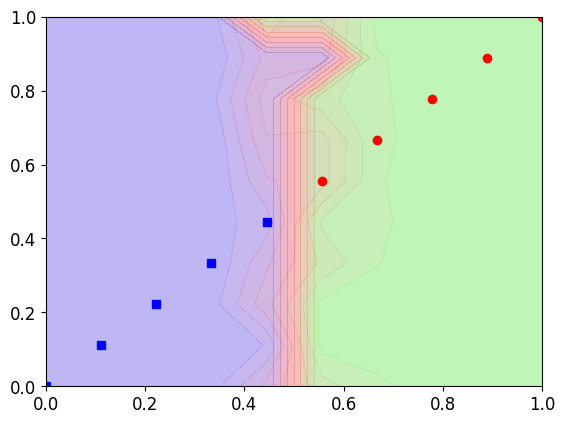

In [21]:
plt.plot(X[Y == -1], X[Y == -1], "bs", label="Phase -1")
plt.plot(X[Y == 1], X[Y == 1], "ro", label="Phase +1")
plot_predictions(clf_DMRG, [0.0, 1.0, 0.0, 1.0])